In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222691, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222690, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137         0.70111    17   
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139         0.70112    17   
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132         0.70088    17   
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126         0.70114    17   
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159         0.70095    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00003   0.701320  0.00010    0.701337  
2020-01-01 17:05:00    2     1   0.00016   0.701125  0.00053    0.701157  
2020-01-01 17:10:00    2     1   0.00001   0.701125  0.00039    0.701125  
2020-01-01 17:15:00    2     1   0.00024   0.701050  0.00042    0.701025  
2020-01-01 17:20:00    2     1  -0.00026   0.701185  0.00081    0.701098

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70134  0.70127  0.70137         0.70111    17   
2020-01-01 17:05:00  0.70127  0.70111  0.70086  0.70139         0.70112    17   
2020-01-01 17:10:00  0.70113  0.70112  0.70093  0.70132         0.70088    17   
2020-01-01 17:15:00  0.70112  0.70088  0.70084  0.70126         0.70114    17   
2020-01-01 17:20:00  0.70088  0.70114  0.70078  0.70159         0.70095    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00003   0.701320  0.00010    0.701337   
2020-01-01 17:05:00    2     1   0.00016   0.701125  0.00053    0.701157   
2020-01-01 17:10:00    2     1   0.00001   0.701125  0.00039    0.701125   
2020-01-01 17:15:00    2     1   0.00024   0.701050  0.00042    0.701025   
2020-01-01 17:20:00    2     1  -0.00026   0.701185  0.00081    0.701098   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.514599  
2020-01-01 17:05:00 -25.514734  
2020-01-01 17:10:00 -25.514734  
2020-01-01 17:15:00 -25.514536  
2020-01-01 17:20:00 -25.514738

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70127  0.70137         0.70111    17    2   
2020-01-01 17:05:00  0.70127  0.70086  0.70139         0.70112    17    2   
2020-01-01 17:10:00  0.70113  0.70093  0.70132         0.70088    17    2   
2020-01-01 17:15:00  0.70112  0.70084  0.70126         0.70114    17    2   
2020-01-01 17:20:00  0.70088  0.70078  0.70159         0.70095    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00003   0.701320  0.00010    0.701337 -25.514599  
2020-01-01 17:05:00     1   0.00016   0.701125  0.00053    0.701157 -25.514734  
2020-01-01 17:10:00     1   0.00001   0.701125  0.00039    0.701125 -25.514734  
2020-01-01 17:15:00     1   0.00024   0.701050  0.00042

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133614
133614
44538
44538
44538
44538


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133614, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133589, 24, 12)
(44513, 24, 12)
(44513, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133589, 1)
(44513, 1)
(44513, 1)


array([[0.60305166],
       [0.6032524 ],
       [0.60252976],
       ...,
       [0.7561133 ],
       [0.7561536 ],
       [0.7569566 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.60305166, 0.6032524 , 0.60252976, ..., 0.7561133 , 0.7561536 ,
       0.7569566 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [17]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 669.3663 - mae: 5.1341 - mse: 669.3663 - root_mean_squared_error: 25.8721 - mape: 8724.6016
Epoch 1: val_mse improved from inf to 0.26269, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 51s 112ms/step - loss: 669.3663 - mae: 5.1341 - mse: 669.3663 - root_mean_squared_error: 25.8721 - mape: 8724.6016 - val_loss: 0.2627 - val_mae: 0.4747 - val_mse: 0.2627 - val_root_mean_squared_error: 0.5125 - val_mape: 22380.8223
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0838 - mae: 0.2252 - mse: 0.0838 - root_mean_squared_error: 0.2895 - mape: 6644.1636
Epoch 2: val_mse improved from 0.26269 to 0.07123, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 110ms/step - loss: 0.0838 - mae: 0.2252 - mse: 0.0838 - root_mean_squared_error: 0.2895 - mape: 6644.1636 - val_loss: 0.0712 - val_mae: 0.2271 - val_mse: 0.0712 - val_root_mean_squared_error: 0.2669 - val_mape: 15779.8984
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0365 - mae: 0.1534 - mse: 0.0365 - root_mean_squared_error: 0.1912 - mape: 4950.4414
Epoch 3: val_mse improved from 0.07123 to 0.06116, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0365 - mae: 0.1534 - mse: 0.0365 - root_mean_squared_error: 0.1912 - mape: 4950.4414 - val_loss: 0.0612 - val_mae: 0.2118 - val_mse: 0.0612 - val_root_mean_squared_error: 0.2473 - val_mape: 15097.9482
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 4973.8862
Epoch 4: val_mse did not improve from 0.06116
347/347 [==============================] - 12s 33ms/step - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 4973.8862 - val_loss: 0.0614 - val_mae: 0.2121 - val_mse: 0.0614 - val_root_mean_squared_error: 0.2477 - val_mape: 15103.9570
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0362 - mae: 0.1527 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 5119.6812
Epoch 5: val_mse improved from 0.06116 to 0.06012, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 37s 107ms/step - loss: 0.0362 - mae: 0.1527 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 5119.6812 - val_loss: 0.0601 - val_mae: 0.2101 - val_mse: 0.0601 - val_root_mean_squared_error: 0.2452 - val_mape: 14989.7510
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0359 - mae: 0.1523 - mse: 0.0359 - root_mean_squared_error: 0.1896 - mape: 5102.4844
Epoch 6: val_mse did not improve from 0.06012
347/347 [==============================] - 12s 34ms/step - loss: 0.0359 - mae: 0.1523 - mse: 0.0359 - root_mean_squared_error: 0.1896 - mape: 5102.4844 - val_loss: 0.0610 - val_mae: 0.2115 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2470 - val_mape: 15043.1475
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1520 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5214.1870
Epoch 7: val_mse did not improve from 0.06012
347/347 [==============================] - 12s 34ms/step 

347/347 [==============================] - 37s 106ms/step - loss: 0.0356 - mae: 0.1516 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 5067.5225 - val_loss: 0.0596 - val_mae: 0.2092 - val_mse: 0.0596 - val_root_mean_squared_error: 0.2442 - val_mape: 14907.0127
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0354 - mae: 0.1511 - mse: 0.0354 - root_mean_squared_error: 0.1881 - mape: 5394.7749
Epoch 9: val_mse improved from 0.05965 to 0.05949, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 0.0354 - mae: 0.1511 - mse: 0.0354 - root_mean_squared_error: 0.1881 - mape: 5394.7749 - val_loss: 0.0595 - val_mae: 0.2089 - val_mse: 0.0595 - val_root_mean_squared_error: 0.2439 - val_mape: 14869.5879
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0351 - mae: 0.1507 - mse: 0.0351 - root_mean_squared_error: 0.1875 - mape: 4902.7588
Epoch 10: val_mse improved from 0.05949 to 0.05821, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 0.0351 - mae: 0.1506 - mse: 0.0351 - root_mean_squared_error: 0.1875 - mape: 4888.9482 - val_loss: 0.0582 - val_mae: 0.2068 - val_mse: 0.0582 - val_root_mean_squared_error: 0.2413 - val_mape: 14741.1543
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0348 - mae: 0.1499 - mse: 0.0348 - root_mean_squared_error: 0.1865 - mape: 5200.7427
Epoch 11: val_mse improved from 0.05821 to 0.05766, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0348 - mae: 0.1499 - mse: 0.0348 - root_mean_squared_error: 0.1865 - mape: 5200.7427 - val_loss: 0.0577 - val_mae: 0.2058 - val_mse: 0.0577 - val_root_mean_squared_error: 0.2401 - val_mape: 14652.1182
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0343 - mae: 0.1487 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 4983.1079
Epoch 12: val_mse improved from 0.05766 to 0.05640, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0343 - mae: 0.1487 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 4983.1079 - val_loss: 0.0564 - val_mae: 0.2036 - val_mse: 0.0564 - val_root_mean_squared_error: 0.2375 - val_mape: 14481.8701
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0333 - mae: 0.1465 - mse: 0.0333 - root_mean_squared_error: 0.1824 - mape: 4910.4399
Epoch 13: val_mse improved from 0.05640 to 0.05211, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0333 - mae: 0.1465 - mse: 0.0333 - root_mean_squared_error: 0.1824 - mape: 4910.4399 - val_loss: 0.0521 - val_mae: 0.1959 - val_mse: 0.0521 - val_root_mean_squared_error: 0.2283 - val_mape: 13978.3701
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0276 - mae: 0.1324 - mse: 0.0276 - root_mean_squared_error: 0.1661 - mape: 4845.7944
Epoch 14: val_mse improved from 0.05211 to 0.03226, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0276 - mae: 0.1324 - mse: 0.0276 - root_mean_squared_error: 0.1661 - mape: 4845.7944 - val_loss: 0.0323 - val_mae: 0.1500 - val_mse: 0.0323 - val_root_mean_squared_error: 0.1796 - val_mape: 12119.7568
Epoch 15/60
347/347 [==============================] - ETA: 0s - loss: 0.0127 - mae: 0.0851 - mse: 0.0127 - root_mean_squared_error: 0.1127 - mape: 3815.2866
Epoch 15: val_mse improved from 0.03226 to 0.01124, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0127 - mae: 0.0851 - mse: 0.0127 - root_mean_squared_error: 0.1127 - mape: 3815.2866 - val_loss: 0.0112 - val_mae: 0.0799 - val_mse: 0.0112 - val_root_mean_squared_error: 0.1060 - val_mape: 9448.3408
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0608 - mse: 0.0066 - root_mean_squared_error: 0.0814 - mape: 2666.0208
Epoch 16: val_mse improved from 0.01124 to 0.00726, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0066 - mae: 0.0608 - mse: 0.0066 - root_mean_squared_error: 0.0814 - mape: 2666.0208 - val_loss: 0.0073 - val_mae: 0.0620 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0852 - val_mape: 8393.0098
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0048 - mae: 0.0523 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 2681.6025
Epoch 17: val_mse improved from 0.00726 to 0.00438, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0048 - mae: 0.0523 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 2681.6025 - val_loss: 0.0044 - val_mae: 0.0448 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0662 - val_mape: 7431.7007
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0478 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 2441.1506
Epoch 18: val_mse improved from 0.00438 to 0.00377, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 105ms/step - loss: 0.0039 - mae: 0.0478 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 2441.1506 - val_loss: 0.0038 - val_mae: 0.0447 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mape: 6907.6924
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0032 - mae: 0.0435 - mse: 0.0032 - root_mean_squared_error: 0.0570 - mape: 2109.9995
Epoch 19: val_mse improved from 0.00377 to 0.00251, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 105ms/step - loss: 0.0032 - mae: 0.0435 - mse: 0.0032 - root_mean_squared_error: 0.0570 - mape: 2109.9995 - val_loss: 0.0025 - val_mae: 0.0328 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 6375.4795
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0405 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 2264.8015
Epoch 20: val_mse improved from 0.00251 to 0.00205, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0028 - mae: 0.0405 - mse: 0.0028 - root_mean_squared_error: 0.0528 - mape: 2264.8015 - val_loss: 0.0021 - val_mae: 0.0317 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0453 - val_mape: 5918.6016
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 1744.9648
Epoch 21: val_mse improved from 0.00205 to 0.00156, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 1744.9648 - val_loss: 0.0016 - val_mae: 0.0257 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 5567.5723
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1746.3259
Epoch 22: val_mse did not improve from 0.00156
347/347 [==============================] - 12s 34ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1746.3259 - val_loss: 0.0024 - val_mae: 0.0408 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0488 - val_mape: 5150.5771
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 1541.0825
Epoch 23: val_mse improved from 0.00156 to 0.00130, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 36s 104ms/step - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 1541.0825 - val_loss: 0.0013 - val_mae: 0.0263 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 4914.3682
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0291 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1533.7542
Epoch 24: val_mse improved from 0.00130 to 0.00123, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0014 - mae: 0.0291 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 1533.7542 - val_loss: 0.0012 - val_mae: 0.0274 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 4602.7173
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1405.5562
Epoch 25: val_mse improved from 0.00123 to 0.00105, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0013 - mae: 0.0278 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1405.5562 - val_loss: 0.0011 - val_mae: 0.0257 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 4362.3979
Epoch 26/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1479.7257
Epoch 26: val_mse improved from 0.00105 to 0.00062, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1479.7257 - val_loss: 6.2119e-04 - val_mae: 0.0152 - val_mse: 6.2119e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4257.9131
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 8.6196e-04 - mae: 0.0228 - mse: 8.6196e-04 - root_mean_squared_error: 0.0294 - mape: 1372.4556
Epoch 27: val_mse improved from 0.00062 to 0.00052, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 8.6196e-04 - mae: 0.0228 - mse: 8.6196e-04 - root_mean_squared_error: 0.0294 - mape: 1372.4556 - val_loss: 5.2136e-04 - val_mae: 0.0146 - val_mse: 5.2136e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 4043.8911
Epoch 28/60
346/347 [============================>.] - ETA: 0s - loss: 8.5663e-04 - mae: 0.0226 - mse: 8.5663e-04 - root_mean_squared_error: 0.0293 - mape: 1331.2957
Epoch 28: val_mse did not improve from 0.00052
347/347 [==============================] - 12s 35ms/step - loss: 8.5567e-04 - mae: 0.0226 - mse: 8.5567e-04 - root_mean_squared_error: 0.0293 - mape: 1327.5272 - val_loss: 5.5807e-04 - val_mae: 0.0163 - val_mse: 5.5807e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 3944.3711
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 7.1106e-04 - mae: 0.0208 - mse: 7.1106e-04 - root_mean_squared_error: 0.0267 - mape: 1420.6808
Epoch 29: val_mse did not improve from 0.00052
347/347

347/347 [==============================] - 38s 110ms/step - loss: 6.1343e-04 - mae: 0.0193 - mse: 6.1343e-04 - root_mean_squared_error: 0.0248 - mape: 1191.2494 - val_loss: 4.8012e-04 - val_mae: 0.0151 - val_mse: 4.8012e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 3629.9146
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 5.4622e-04 - mae: 0.0183 - mse: 5.4622e-04 - root_mean_squared_error: 0.0234 - mape: 1155.5300
Epoch 33: val_mse did not improve from 0.00048
347/347 [==============================] - 12s 35ms/step - loss: 5.4622e-04 - mae: 0.0183 - mse: 5.4622e-04 - root_mean_squared_error: 0.0234 - mape: 1155.5300 - val_loss: 7.4031e-04 - val_mae: 0.0222 - val_mse: 7.4031e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 3510.5369
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 5.1269e-04 - mae: 0.0177 - mse: 5.1269e-04 - root_mean_squared_error: 0.0226 - mape: 1069.0636
Epoch 34: val_mse did not improve from 0.00048
347/347

347/347 [==============================] - 37s 107ms/step - loss: 4.6631e-04 - mae: 0.0171 - mse: 4.6631e-04 - root_mean_squared_error: 0.0216 - mape: 1060.8381 - val_loss: 4.2191e-04 - val_mae: 0.0150 - val_mse: 4.2191e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3344.8259
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 4.4088e-04 - mae: 0.0167 - mse: 4.4088e-04 - root_mean_squared_error: 0.0210 - mape: 1056.5619
Epoch 36: val_mse did not improve from 0.00042
347/347 [==============================] - 12s 35ms/step - loss: 4.4088e-04 - mae: 0.0167 - mse: 4.4088e-04 - root_mean_squared_error: 0.0210 - mape: 1056.5619 - val_loss: 0.0013 - val_mae: 0.0329 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 3203.5293
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 4.2502e-04 - mae: 0.0163 - mse: 4.2502e-04 - root_mean_squared_error: 0.0206 - mape: 1025.5568
Epoch 37: val_mse did not improve from 0.00042
347/347 [======

347/347 [==============================] - 36s 105ms/step - loss: 3.7556e-04 - mae: 0.0154 - mse: 3.7556e-04 - root_mean_squared_error: 0.0194 - mape: 1016.0436 - val_loss: 3.0964e-04 - val_mae: 0.0124 - val_mse: 3.0964e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3132.3232
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 3.6793e-04 - mae: 0.0152 - mse: 3.6793e-04 - root_mean_squared_error: 0.0192 - mape: 1135.5778
Epoch 39: val_mse improved from 0.00031 to 0.00031, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 3.6793e-04 - mae: 0.0152 - mse: 3.6793e-04 - root_mean_squared_error: 0.0192 - mape: 1135.5778 - val_loss: 3.0807e-04 - val_mae: 0.0119 - val_mse: 3.0807e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3137.2788
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 3.0952e-04 - mae: 0.0140 - mse: 3.0952e-04 - root_mean_squared_error: 0.0176 - mape: 1005.2151
Epoch 40: val_mse did not improve from 0.00031
347/347 [==============================] - 12s 35ms/step - loss: 3.0952e-04 - mae: 0.0140 - mse: 3.0952e-04 - root_mean_squared_error: 0.0176 - mape: 1005.2151 - val_loss: 4.3855e-04 - val_mae: 0.0169 - val_mse: 4.3855e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3022.5593
Epoch 41/60
347/347 [==============================] - ETA: 0s - loss: 3.2576e-04 - mae: 0.0142 - mse: 3.2576e-04 - root_mean_squared_error: 0.0180 - mape: 948.4172
Epoch 41: val_mse improved from 0.00031 to 0.00027, sav

347/347 [==============================] - 37s 106ms/step - loss: 3.2576e-04 - mae: 0.0142 - mse: 3.2576e-04 - root_mean_squared_error: 0.0180 - mape: 948.4172 - val_loss: 2.7444e-04 - val_mae: 0.0120 - val_mse: 2.7444e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 2869.5571
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 2.8935e-04 - mae: 0.0135 - mse: 2.8935e-04 - root_mean_squared_error: 0.0170 - mape: 1095.6946
Epoch 42: val_mse improved from 0.00027 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 2.8935e-04 - mae: 0.0135 - mse: 2.8935e-04 - root_mean_squared_error: 0.0170 - mape: 1095.6946 - val_loss: 2.4104e-04 - val_mae: 0.0102 - val_mse: 2.4104e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 2847.9861
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 2.6817e-04 - mae: 0.0130 - mse: 2.6817e-04 - root_mean_squared_error: 0.0164 - mape: 885.3439
Epoch 43: val_mse did not improve from 0.00024
347/347 [==============================] - 12s 35ms/step - loss: 2.6817e-04 - mae: 0.0130 - mse: 2.6817e-04 - root_mean_squared_error: 0.0164 - mape: 885.3439 - val_loss: 8.6395e-04 - val_mae: 0.0266 - val_mse: 8.6395e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 2763.3547
Epoch 44/60
347/347 [==============================] - ETA: 0s - loss: 2.7109e-04 - mae: 0.0129 - mse: 2.7109e-04 - root_mean_squared_error: 0.0165 - mape: 907.7471
Epoch 44: val_mse did not improve from 0.00024
347/347 [=

347/347 [==============================] - 37s 108ms/step - loss: 1.8828e-04 - mae: 0.0110 - mse: 1.8828e-04 - root_mean_squared_error: 0.0137 - mape: 757.2837 - val_loss: 1.4943e-04 - val_mae: 0.0087 - val_mse: 1.4943e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 2222.7769
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 2.0685e-04 - mae: 0.0116 - mse: 2.0685e-04 - root_mean_squared_error: 0.0144 - mape: 681.7010
Epoch 54: val_mse did not improve from 0.00015
347/347 [==============================] - 12s 35ms/step - loss: 2.0685e-04 - mae: 0.0116 - mse: 2.0685e-04 - root_mean_squared_error: 0.0144 - mape: 681.7010 - val_loss: 4.9751e-04 - val_mae: 0.0200 - val_mse: 4.9751e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 2098.9038
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 1.9398e-04 - mae: 0.0111 - mse: 1.9398e-04 - root_mean_squared_error: 0.0139 - mape: 702.8775
Epoch 55: val_mse did not improve from 0.00015
347/347 [==

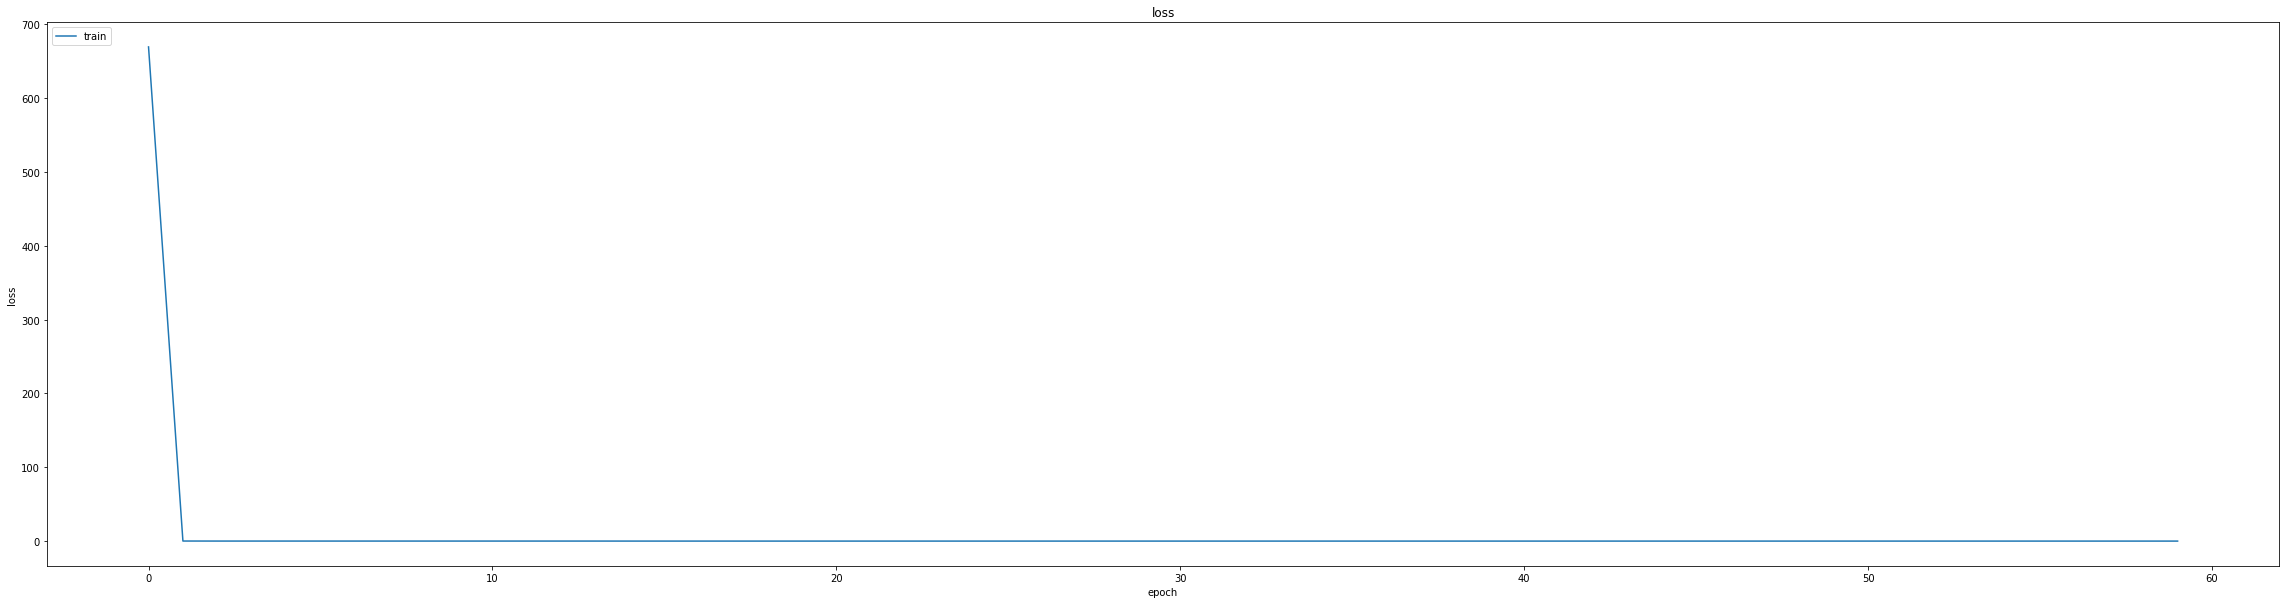

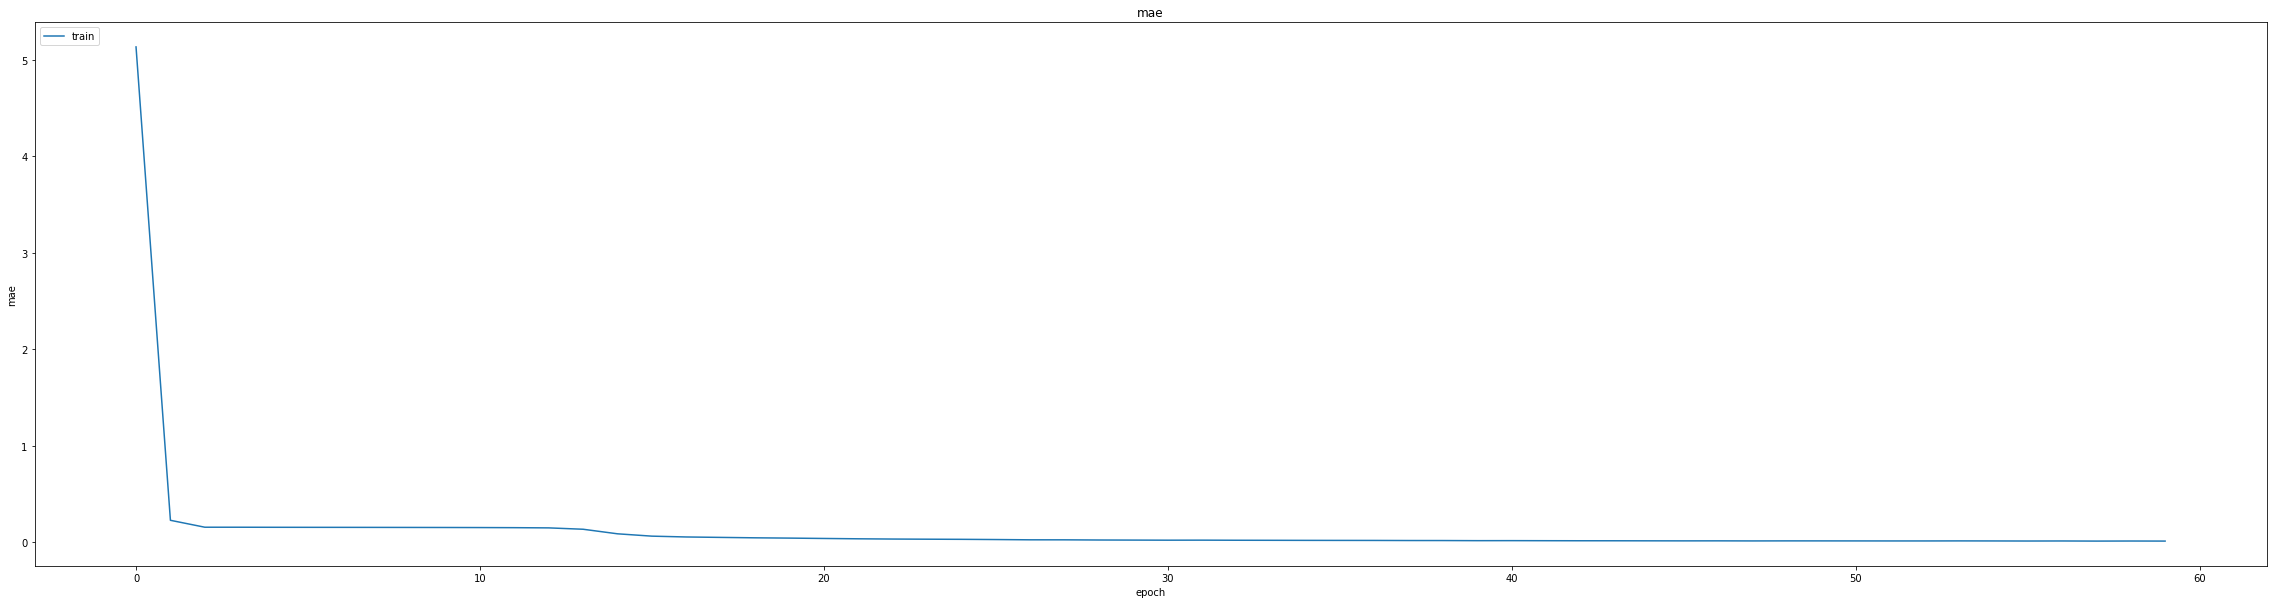

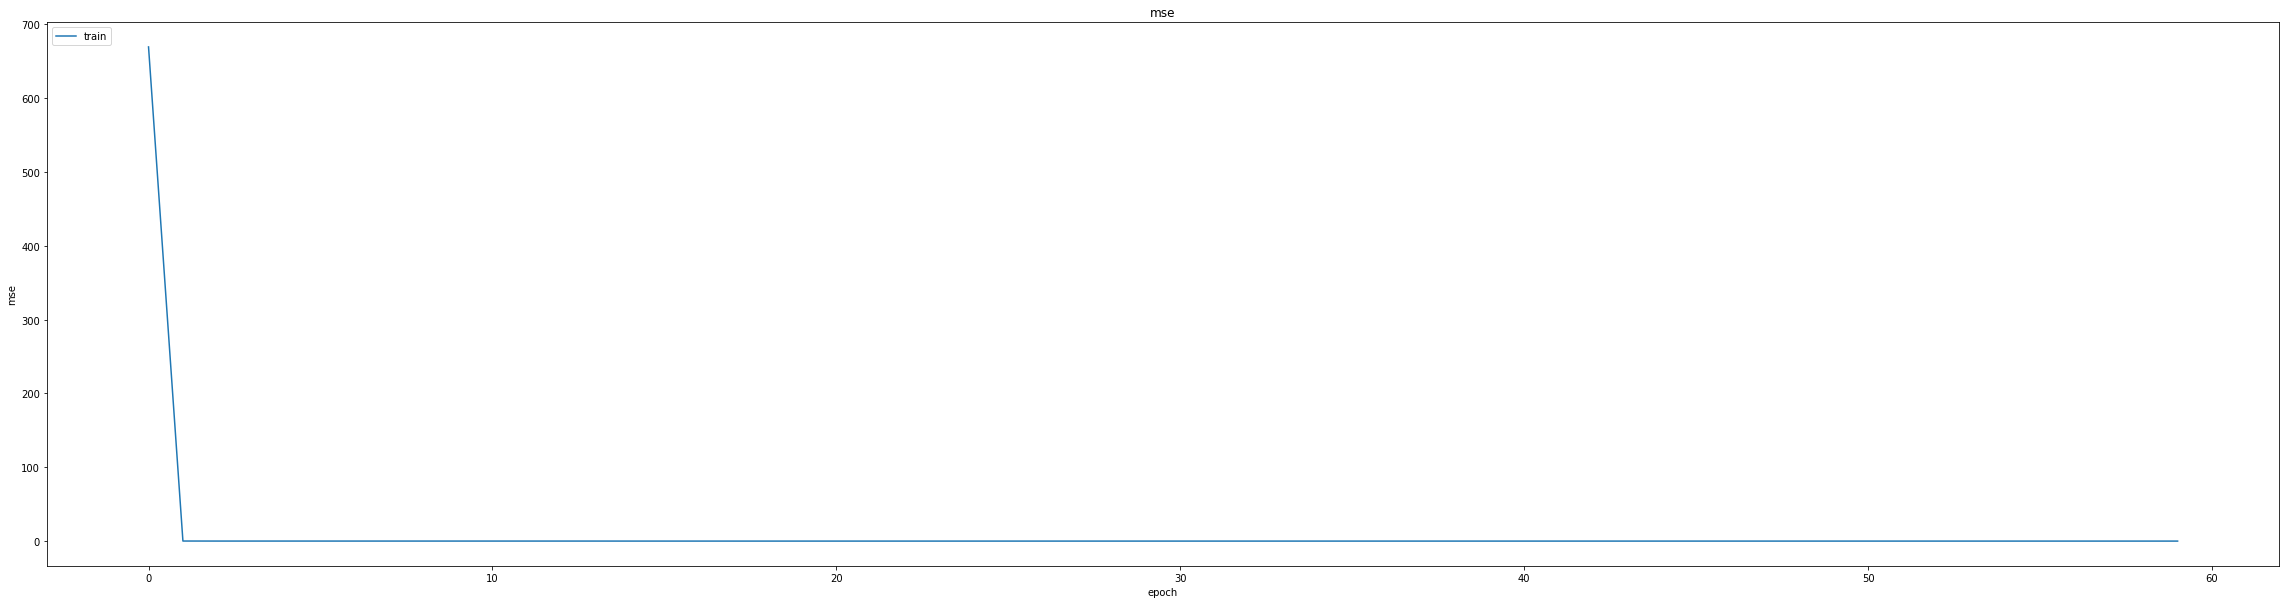

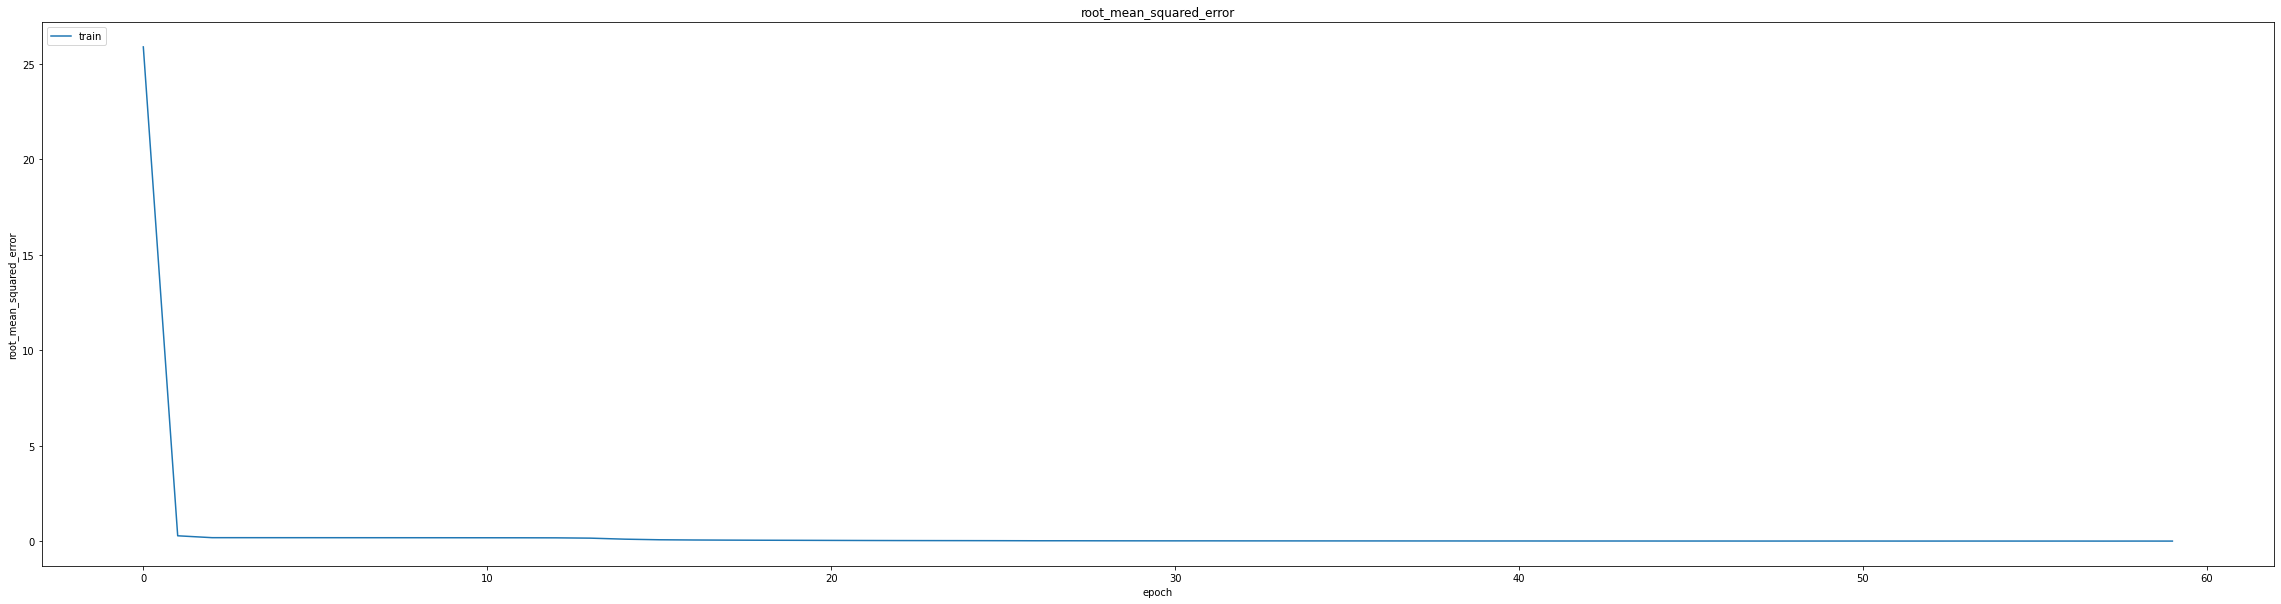

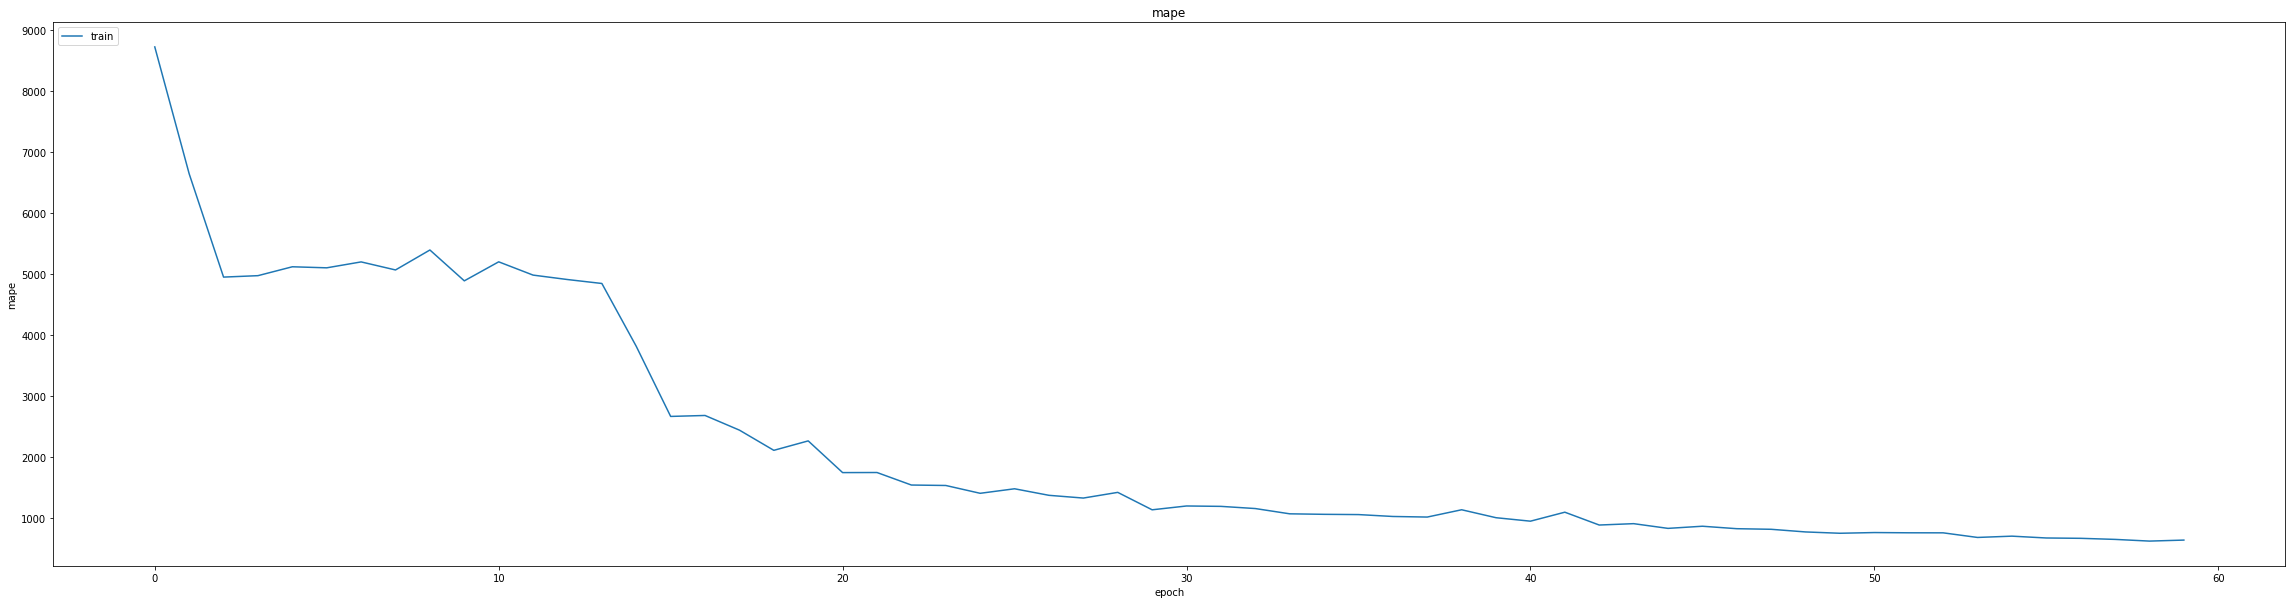

In [18]:
thesis.SummarizeHistory(history)

In [19]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008686719462275505
0.012223973870277405
1392/1392 [==============================] - 14s 9ms/step
0.9821058451482583


In [20]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [21]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/347 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0222 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 804.0223
Epoch 1: val_mse did not improve from 0.00015
347/347 [==============================] - 22s 43ms/step - loss: 0.0030 - mae: 0.0222 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 801.7452 - val_loss: 2.9178e-04 - val_mae: 0.0144 - val_mse: 2.9178e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2014.9283 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 9.4518e-05 - mae: 0.0076 - mse: 9.4518e-05 - root_mean_squared_error: 0.0097 - mape: 690.8053
Epoch 2: val_mse did not improve from 0.00015
347/347 [==============================] - 11s 33ms/step - loss: 9.4518e-05 - mae: 0.0076 - mse: 9.4518e-05 - root_mean_squared_error: 0.0097 - mape: 690.8053 - val_loss: 2.2351e-04 - val_mae: 0.0123 - val_mse: 2.2351e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 1891.5220 - lr: 0.0010
lr cha

347/347 [==============================] - 37s 106ms/step - loss: 1.3380e-04 - mae: 0.0091 - mse: 1.3380e-04 - root_mean_squared_error: 0.0116 - mape: 551.1959 - val_loss: 1.0364e-04 - val_mae: 0.0078 - val_mse: 1.0364e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1614.0624 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
346/347 [============================>.] - ETA: 0s - loss: 8.7773e-05 - mae: 0.0072 - mse: 8.7773e-05 - root_mean_squared_error: 0.0094 - mape: 520.5577
Epoch 5: val_mse did not improve from 0.00010
347/347 [==============================] - 12s 34ms/step - loss: 8.7892e-05 - mae: 0.0072 - mse: 8.7892e-05 - root_mean_squared_error: 0.0094 - mape: 519.0851 - val_loss: 1.2992e-04 - val_mae: 0.0092 - val_mse: 1.2992e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1570.4374 - lr: 8.1000e-04
Epoch 6/20
347/347 [==============================] - ETA: 0s - loss: 1.2571e-04 - mae: 0.0088 - mse: 1.2571e-04 - root_mean_squared_error: 0.0112 - mape: 

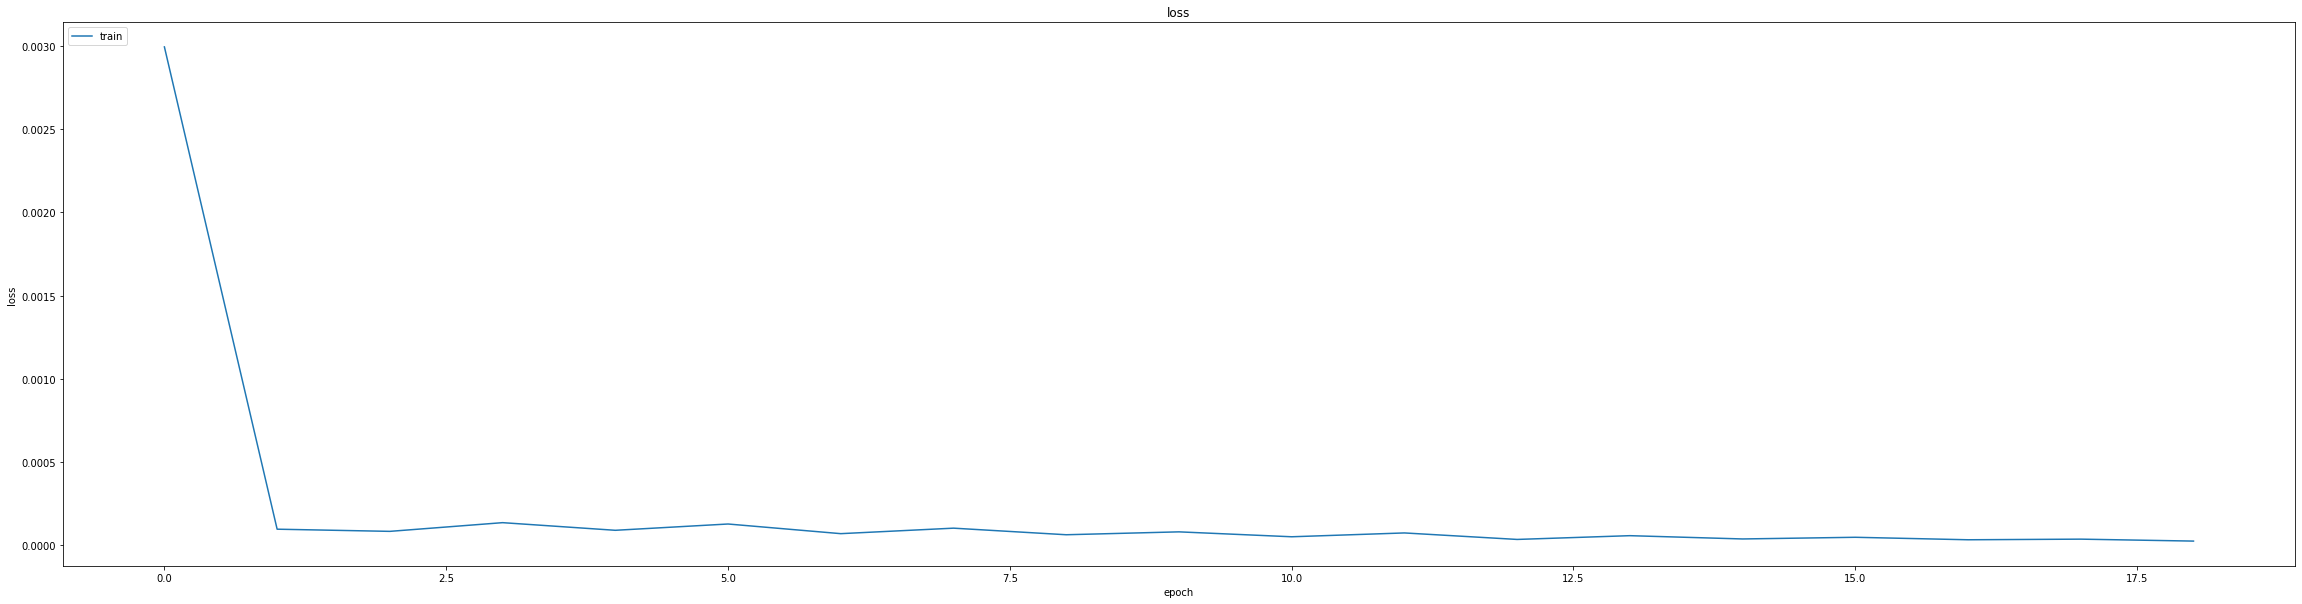

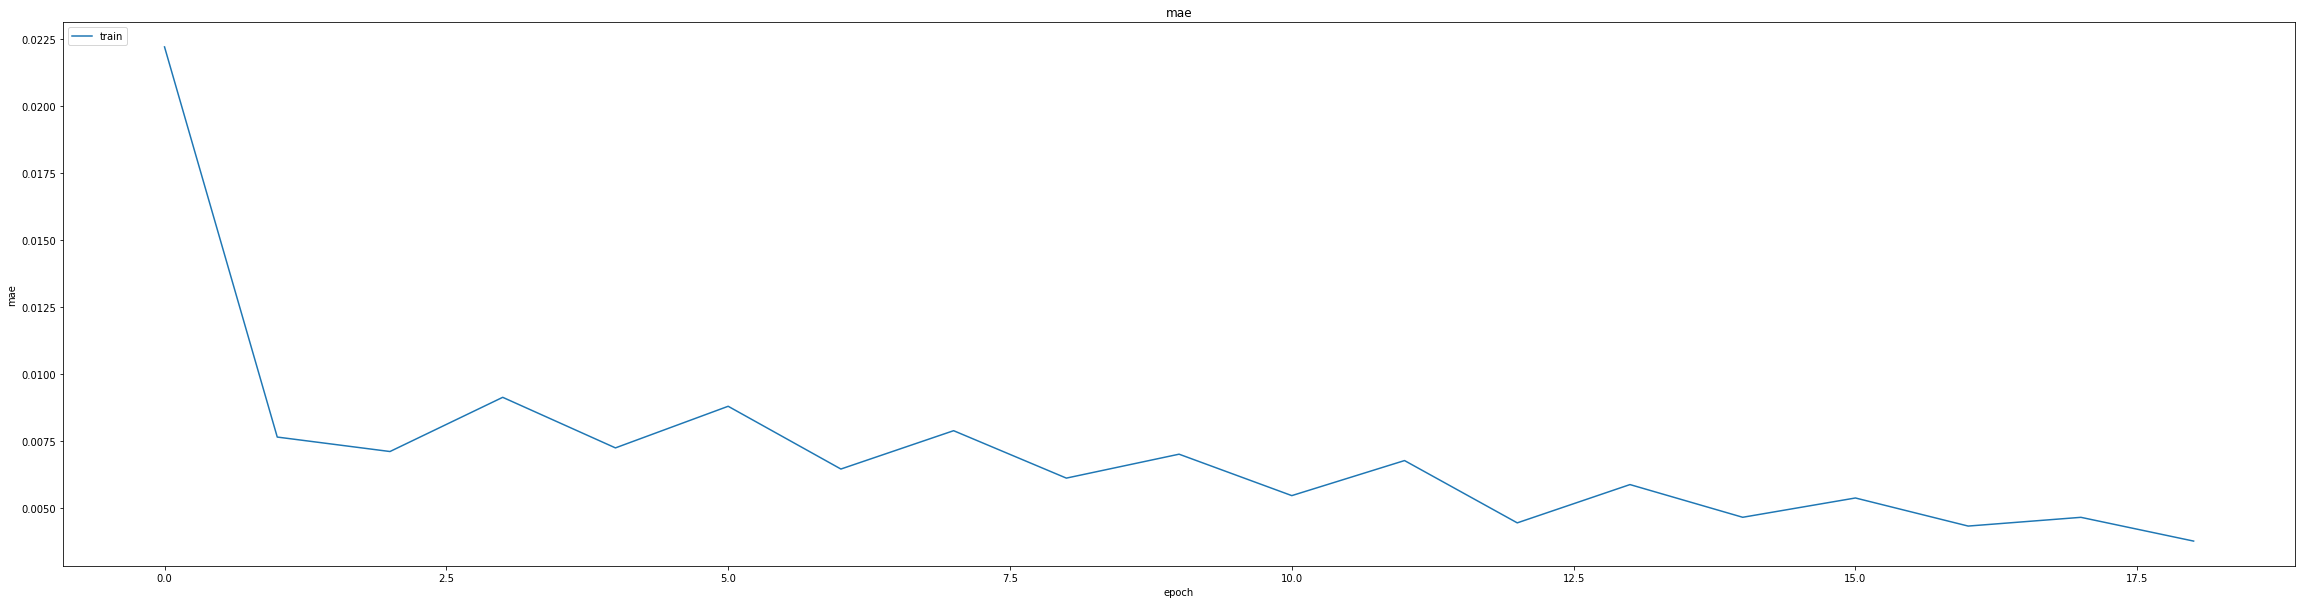

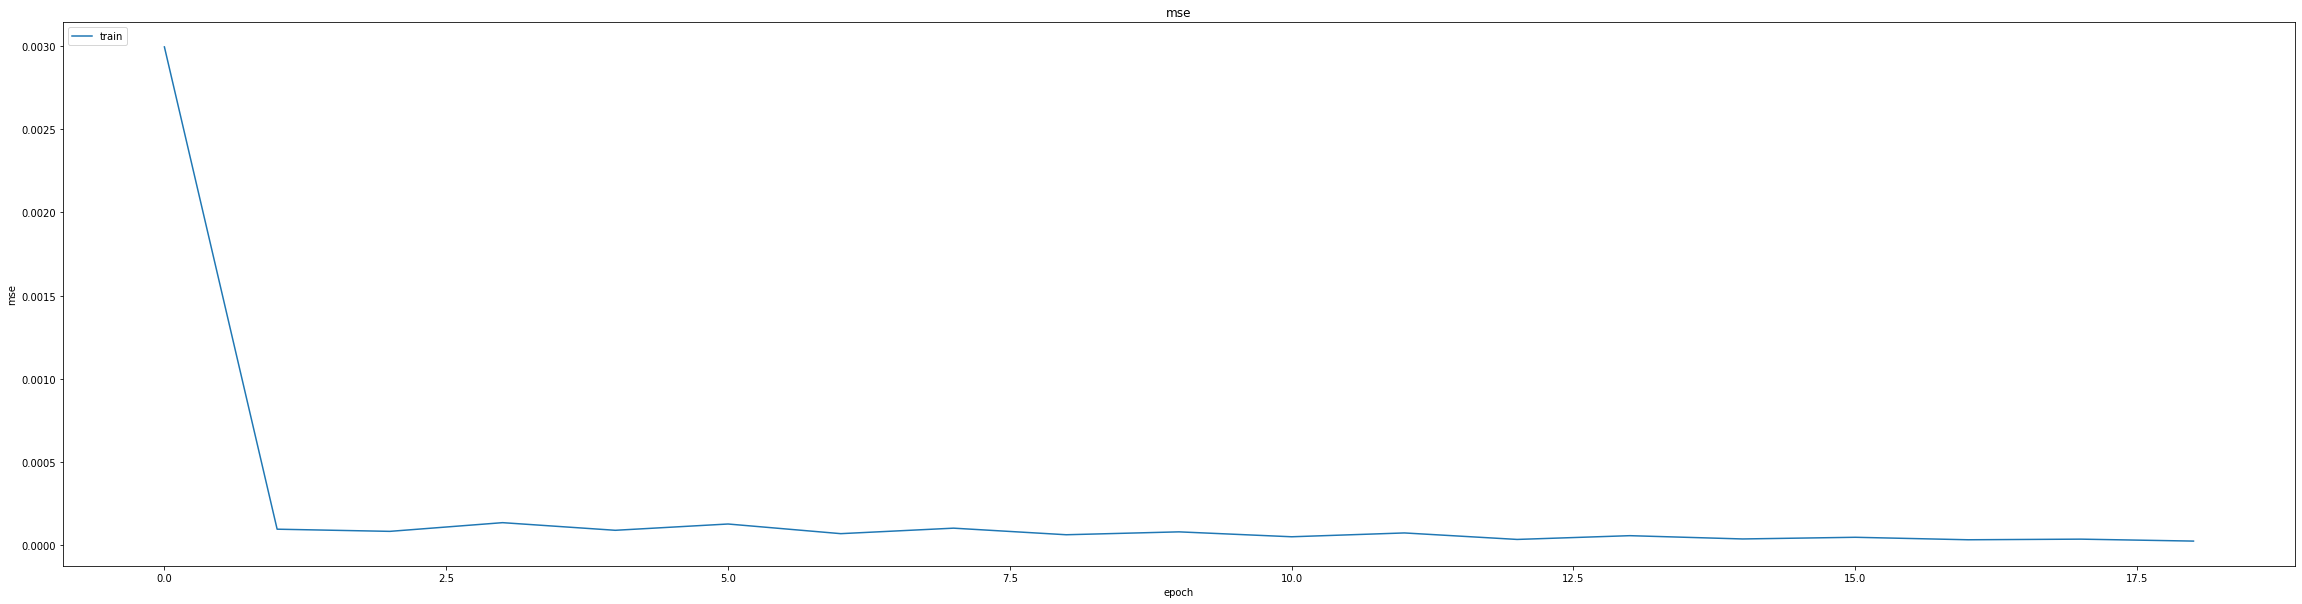

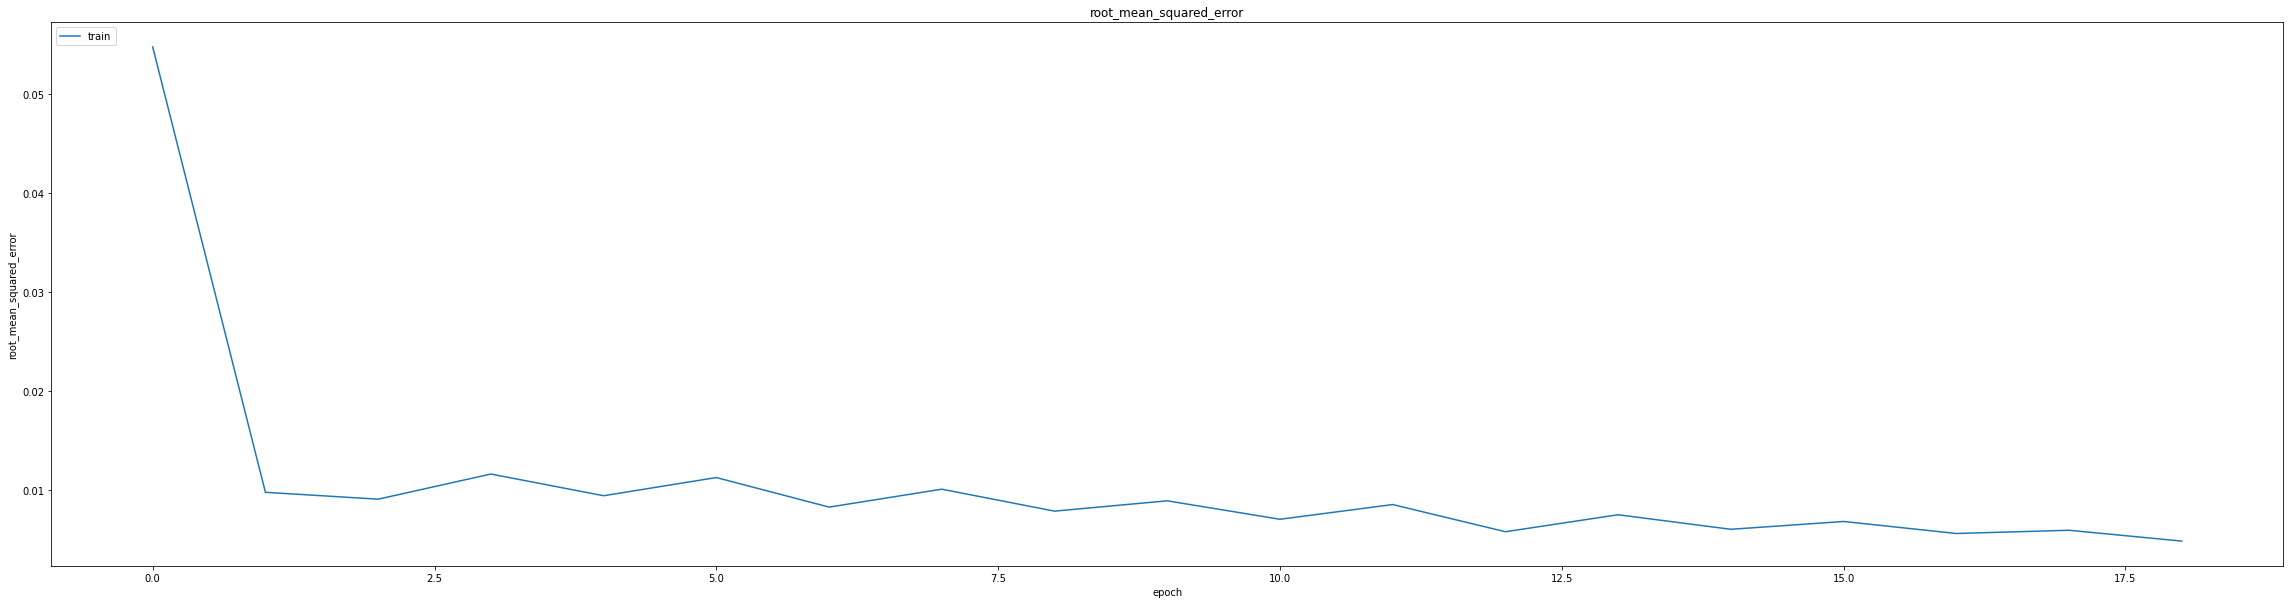

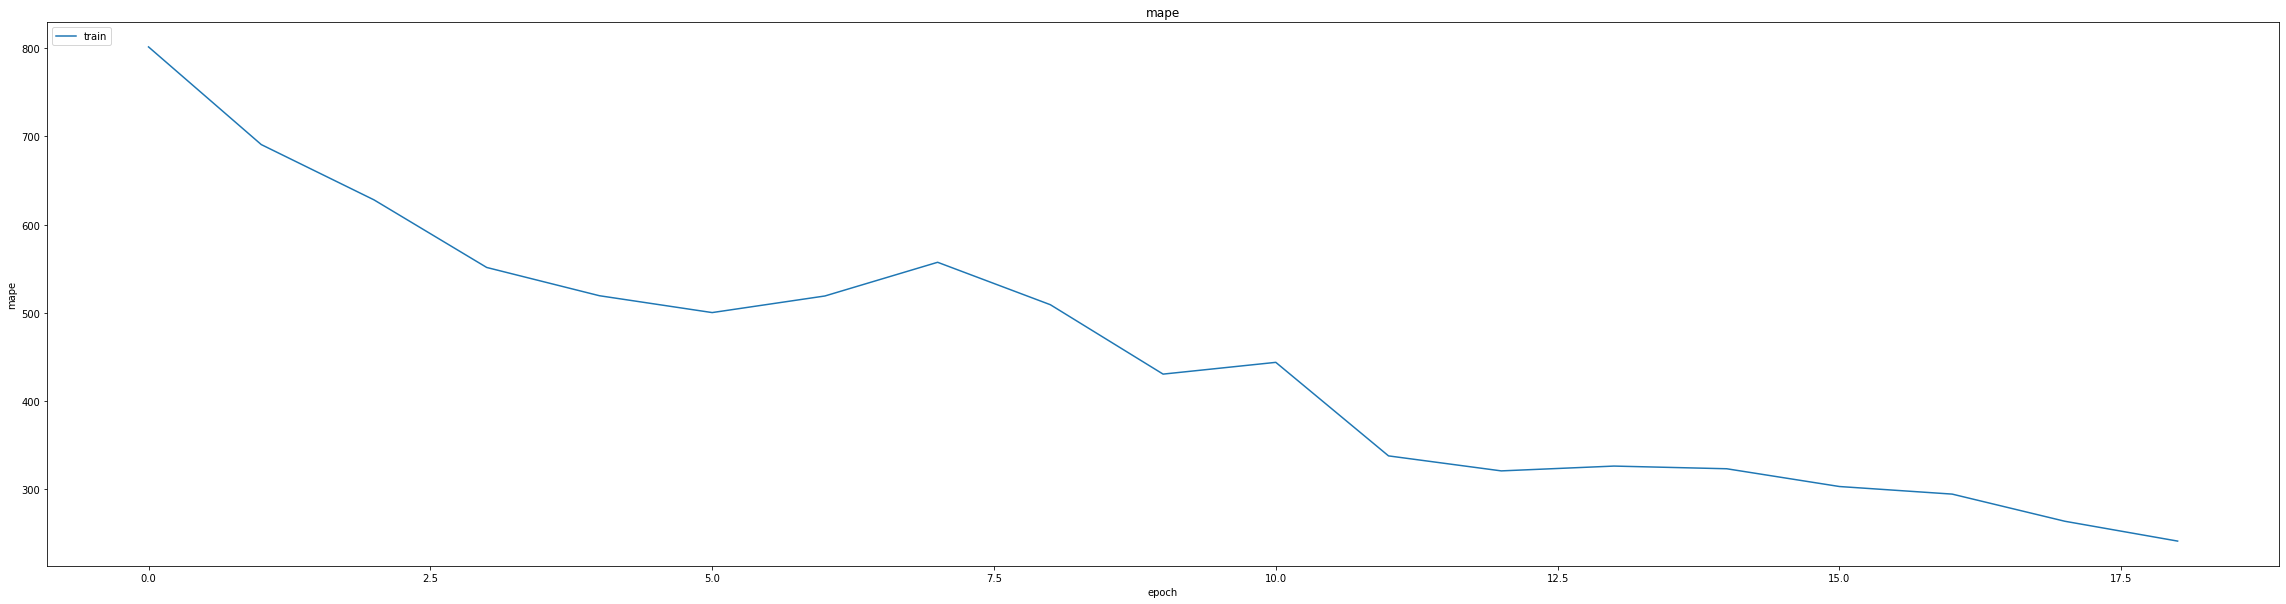

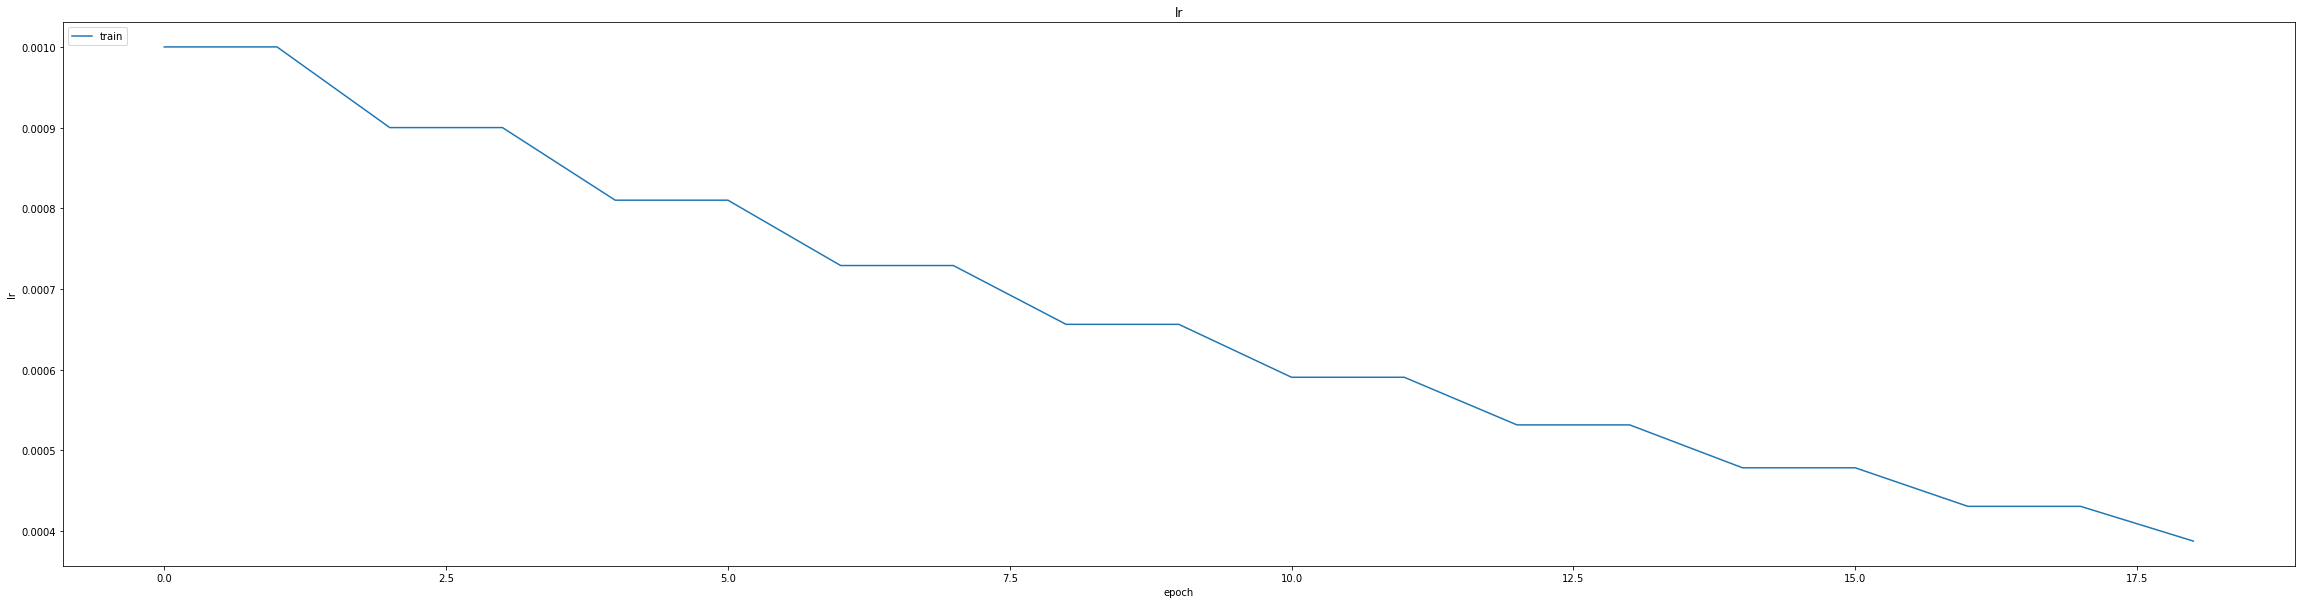

In [22]:
thesis.SummarizeHistory(history)

In [23]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007765930611640215
0.010180354118347168
1392/1392 [==============================] - 10s 6ms/step
0.9699235014714096


1392/1392 [==============================] - 8s 6ms/step


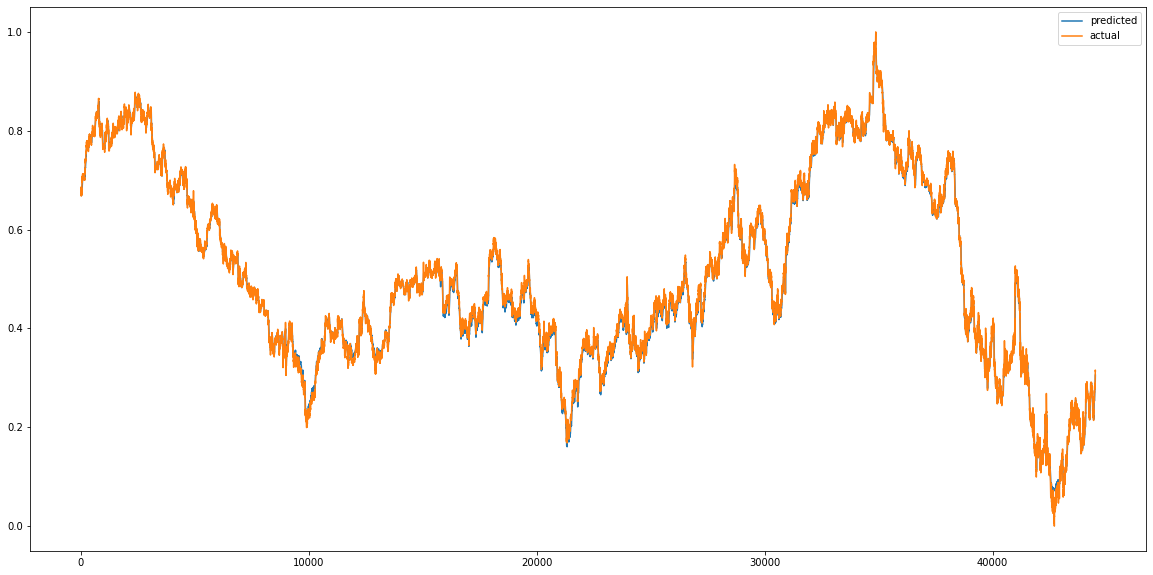

In [24]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


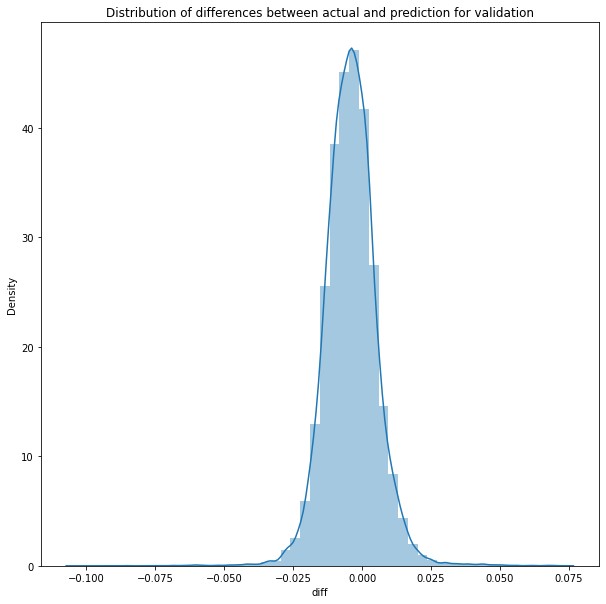

In [25]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 8s 6ms/step


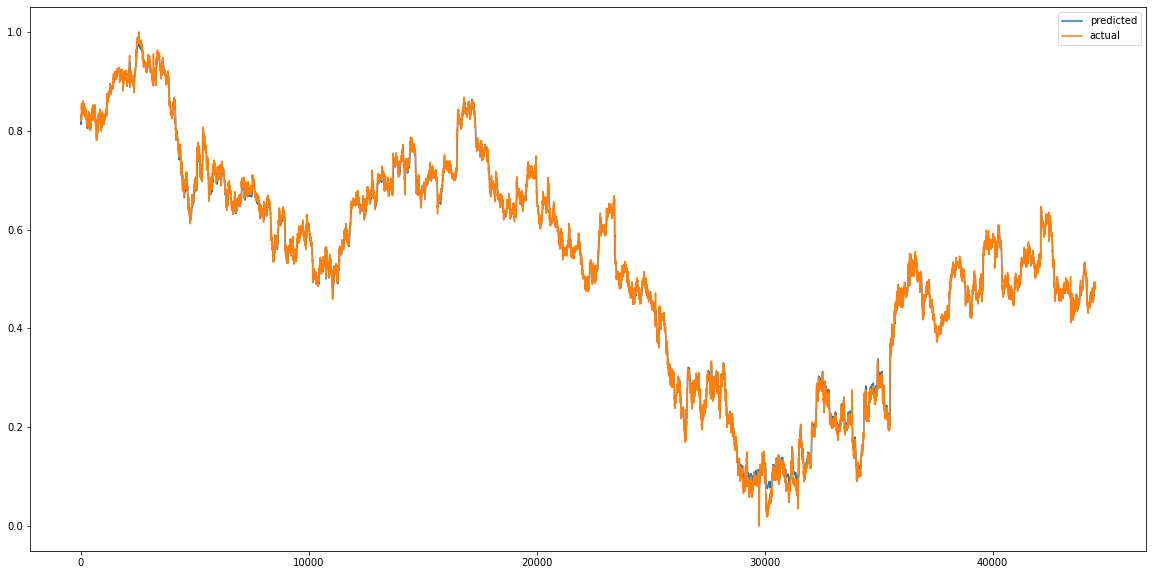

In [26]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


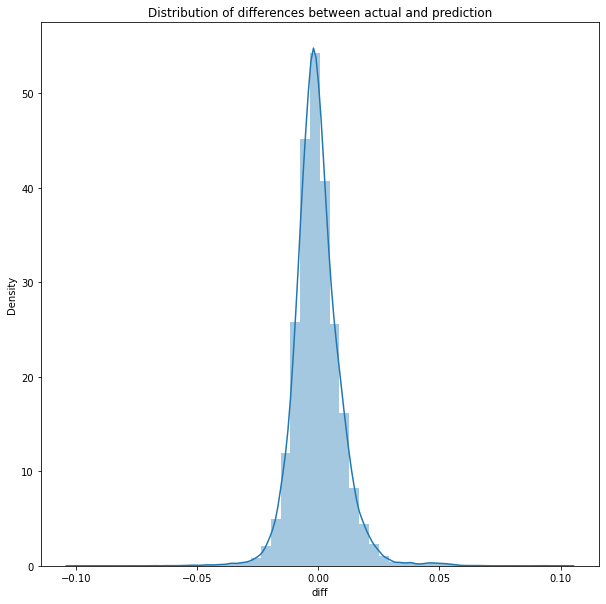

In [27]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.574081947872884e-05
RMSE :  0.009784723781422184
MAE :  0.007027864088443162
1392/1392 [==============================] - 8s 6ms/step
R2_Score  : 0.9980586452044713


count    44513.000000
mean        -0.000420
std          0.009776
min         -0.100598
25%         -0.005970
50%         -0.001143
75%          0.004454
max          0.101868
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [29]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [30]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 433.7452 - mae: 3.7851 - mse: 433.7452 - root_mean_squared_error: 20.8265 - mape: 9510.7881
Epoch 1: val_mse improved from inf to 0.17733, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 23s 56ms/step - loss: 431.2651 - mae: 3.7648 - mse: 431.2651 - root_mean_squared_error: 20.7669 - mape: 9456.7100 - val_loss: 0.1773 - val_mae: 0.3756 - val_mse: 0.1773 - val_root_mean_squared_error: 0.4211 - val_mape: 20029.8867
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 0.0497 - mae: 0.1687 - mse: 0.0497 - root_mean_squared_error: 0.2230 - mape: 5409.4019
Epoch 2: val_mse improved from 0.17733 to 0.07338, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0497 - mae: 0.1686 - mse: 0.0497 - root_mean_squared_error: 0.2229 - mape: 5394.1553 - val_loss: 0.0734 - val_mae: 0.2302 - val_mse: 0.0734 - val_root_mean_squared_error: 0.2709 - val_mape: 15859.2354
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1507 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 5304.8945
Epoch 3: val_mse improved from 0.07338 to 0.06223, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0362 - mae: 0.1507 - mse: 0.0362 - root_mean_squared_error: 0.1902 - mape: 5289.9365 - val_loss: 0.0622 - val_mae: 0.2134 - val_mse: 0.0622 - val_root_mean_squared_error: 0.2495 - val_mape: 15137.9062
Epoch 4/60
344/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1519 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 5251.0869
Epoch 4: val_mse improved from 0.06223 to 0.06106, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 48ms/step - loss: 0.0359 - mae: 0.1520 - mse: 0.0359 - root_mean_squared_error: 0.1894 - mape: 5206.3174 - val_loss: 0.0611 - val_mae: 0.2116 - val_mse: 0.0611 - val_root_mean_squared_error: 0.2471 - val_mape: 15053.2246
Epoch 5/60
344/347 [============================>.] - ETA: 0s - loss: 0.0359 - mae: 0.1522 - mse: 0.0359 - root_mean_squared_error: 0.1894 - mape: 5115.5815
Epoch 5: val_mse did not improve from 0.06106
347/347 [==============================] - 6s 18ms/step - loss: 0.0359 - mae: 0.1522 - mse: 0.0359 - root_mean_squared_error: 0.1894 - mape: 5071.8472 - val_loss: 0.0613 - val_mae: 0.2120 - val_mse: 0.0613 - val_root_mean_squared_error: 0.2476 - val_mape: 15071.0391
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0359 - mae: 0.1522 - mse: 0.0359 - root_mean_squared_error: 0.1894 - mape: 5008.0615
Epoch 6: val_mse did not improve from 0.06106
347/347 [==============================] - 6s 18ms/step - l

347/347 [==============================] - 21s 60ms/step - loss: 0.0358 - mae: 0.1521 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 5028.1631 - val_loss: 0.0609 - val_mae: 0.2113 - val_mse: 0.0609 - val_root_mean_squared_error: 0.2467 - val_mape: 15036.3721
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1521 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 4940.6162
Epoch 11: val_mse did not improve from 0.06086
347/347 [==============================] - 7s 21ms/step - loss: 0.0358 - mae: 0.1521 - mse: 0.0358 - root_mean_squared_error: 0.1893 - mape: 4926.6987 - val_loss: 0.0615 - val_mae: 0.2123 - val_mse: 0.0615 - val_root_mean_squared_error: 0.2480 - val_mape: 15081.2227
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1520 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5032.6606
Epoch 12: val_mse did not improve from 0.06086
347/347 [==============================] - 7s 21ms/step

347/347 [==============================] - 20s 58ms/step - loss: 0.0358 - mae: 0.1520 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5070.5171 - val_loss: 0.0606 - val_mae: 0.2109 - val_mse: 0.0606 - val_root_mean_squared_error: 0.2462 - val_mape: 15012.9609
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0358 - mae: 0.1520 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5267.0640
Epoch 14: val_mse did not improve from 0.06059
347/347 [==============================] - 7s 20ms/step - loss: 0.0358 - mae: 0.1520 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5267.0640 - val_loss: 0.0621 - val_mae: 0.2132 - val_mse: 0.0621 - val_root_mean_squared_error: 0.2491 - val_mape: 15117.6934
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1519 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 4958.9292
Epoch 15: val_mse did not improve from 0.06059
347/347 [==============================] - 7s 20ms/step

347/347 [==============================] - 19s 55ms/step - loss: 0.0353 - mae: 0.1510 - mse: 0.0353 - root_mean_squared_error: 0.1880 - mape: 5436.4355 - val_loss: 0.0586 - val_mae: 0.2073 - val_mse: 0.0586 - val_root_mean_squared_error: 0.2421 - val_mape: 14742.4307
Epoch 19/60
344/347 [============================>.] - ETA: 0s - loss: 0.0274 - mae: 0.1303 - mse: 0.0274 - root_mean_squared_error: 0.1654 - mape: 5305.5229
Epoch 19: val_mse improved from 0.05861 to 0.02716, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0273 - mae: 0.1300 - mse: 0.0273 - root_mean_squared_error: 0.1651 - mape: 5260.0811 - val_loss: 0.0272 - val_mae: 0.1305 - val_mse: 0.0272 - val_root_mean_squared_error: 0.1648 - val_mape: 12367.4951
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0661 - mse: 0.0090 - root_mean_squared_error: 0.0949 - mape: 3760.0273
Epoch 20: val_mse improved from 0.02716 to 0.01003, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0090 - mae: 0.0661 - mse: 0.0090 - root_mean_squared_error: 0.0949 - mape: 3760.0273 - val_loss: 0.0100 - val_mae: 0.0665 - val_mse: 0.0100 - val_root_mean_squared_error: 0.1002 - val_mape: 10075.4932
Epoch 21/60
345/347 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0439 - mse: 0.0042 - root_mean_squared_error: 0.0645 - mape: 3426.7136
Epoch 21: val_mse improved from 0.01003 to 0.00538, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0042 - mae: 0.0439 - mse: 0.0042 - root_mean_squared_error: 0.0644 - mape: 3407.1736 - val_loss: 0.0054 - val_mae: 0.0445 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0734 - val_mape: 8720.3779
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0375 - mse: 0.0029 - root_mean_squared_error: 0.0536 - mape: 2909.9392
Epoch 22: val_mse improved from 0.00538 to 0.00378, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0029 - mae: 0.0375 - mse: 0.0029 - root_mean_squared_error: 0.0536 - mape: 2909.9392 - val_loss: 0.0038 - val_mae: 0.0374 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0615 - val_mape: 7895.7939
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0342 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 2596.7073
Epoch 23: val_mse improved from 0.00378 to 0.00281, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0023 - mae: 0.0342 - mse: 0.0023 - root_mean_squared_error: 0.0478 - mape: 2581.8911 - val_loss: 0.0028 - val_mae: 0.0309 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 7294.3594
Epoch 24/60
346/347 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0313 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2342.5527
Epoch 24: val_mse did not improve from 0.00281
347/347 [==============================] - 6s 18ms/step - loss: 0.0019 - mae: 0.0313 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 2335.9333 - val_loss: 0.0029 - val_mae: 0.0395 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 6833.8491
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0289 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 2130.2842
Epoch 25: val_mse improved from 0.00281 to 0.00178, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 16s 47ms/step - loss: 0.0016 - mae: 0.0289 - mse: 0.0016 - root_mean_squared_error: 0.0397 - mape: 2124.2581 - val_loss: 0.0018 - val_mae: 0.0244 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0422 - val_mape: 6401.1152
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0273 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 2122.9534
Epoch 26: val_mse improved from 0.00178 to 0.00147, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0014 - mae: 0.0273 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 2110.8445 - val_loss: 0.0015 - val_mae: 0.0211 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 6083.9541
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0253 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2027.1482
Epoch 27: val_mse improved from 0.00147 to 0.00138, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0012 - mae: 0.0253 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 2027.1482 - val_loss: 0.0014 - val_mae: 0.0221 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 5807.6230
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0243 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 1893.3566
Epoch 28: val_mse improved from 0.00138 to 0.00108, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 51ms/step - loss: 0.0010 - mae: 0.0243 - mse: 0.0010 - root_mean_squared_error: 0.0324 - mape: 1893.3566 - val_loss: 0.0011 - val_mae: 0.0187 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 5480.7632
Epoch 29/60
344/347 [============================>.] - ETA: 0s - loss: 8.8257e-04 - mae: 0.0223 - mse: 8.8257e-04 - root_mean_squared_error: 0.0297 - mape: 1754.1624
Epoch 29: val_mse improved from 0.00108 to 0.00097, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 52ms/step - loss: 8.8179e-04 - mae: 0.0223 - mse: 8.8179e-04 - root_mean_squared_error: 0.0297 - mape: 1739.1115 - val_loss: 9.7212e-04 - val_mae: 0.0186 - val_mse: 9.7212e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 5221.2173
Epoch 30/60
346/347 [============================>.] - ETA: 0s - loss: 8.2857e-04 - mae: 0.0218 - mse: 8.2857e-04 - root_mean_squared_error: 0.0288 - mape: 1782.3199
Epoch 30: val_mse did not improve from 0.00097
347/347 [==============================] - 6s 18ms/step - loss: 8.2921e-04 - mae: 0.0218 - mse: 8.2921e-04 - root_mean_squared_error: 0.0288 - mape: 1777.2793 - val_loss: 0.0018 - val_mae: 0.0358 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 5033.9951
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 7.4313e-04 - mae: 0.0207 - mse: 7.4313e-04 - root_mean_squared_error: 0.0273 - mape: 1589.6990
Epoch 31: val_mse did not improve from 0.00097
347/347 [========

347/347 [==============================] - 16s 47ms/step - loss: 6.3602e-04 - mae: 0.0192 - mse: 6.3602e-04 - root_mean_squared_error: 0.0252 - mape: 1557.1012 - val_loss: 6.3529e-04 - val_mae: 0.0150 - val_mse: 6.3529e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 4555.0420
Epoch 33/60
345/347 [============================>.] - ETA: 0s - loss: 5.8138e-04 - mae: 0.0184 - mse: 5.8138e-04 - root_mean_squared_error: 0.0241 - mape: 1485.4640
Epoch 33: val_mse did not improve from 0.00064
347/347 [==============================] - 6s 18ms/step - loss: 5.8112e-04 - mae: 0.0184 - mse: 5.8112e-04 - root_mean_squared_error: 0.0241 - mape: 1476.9949 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 4271.1699
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 5.1940e-04 - mae: 0.0174 - mse: 5.1940e-04 - root_mean_squared_error: 0.0228 - mape: 1442.9543
Epoch 34: val_mse did not improve from 0.00064
347/347 [========

347/347 [==============================] - 17s 49ms/step - loss: 4.9320e-04 - mae: 0.0171 - mse: 4.9320e-04 - root_mean_squared_error: 0.0222 - mape: 1294.8265 - val_loss: 6.3127e-04 - val_mae: 0.0173 - val_mse: 6.3127e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 4037.2454
Epoch 36/60
345/347 [============================>.] - ETA: 0s - loss: 4.4868e-04 - mae: 0.0163 - mse: 4.4868e-04 - root_mean_squared_error: 0.0212 - mape: 1438.9022
Epoch 36: val_mse improved from 0.00063 to 0.00050, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 4.4780e-04 - mae: 0.0163 - mse: 4.4780e-04 - root_mean_squared_error: 0.0212 - mape: 1430.6884 - val_loss: 4.9828e-04 - val_mae: 0.0148 - val_mse: 4.9828e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 3877.5938
Epoch 37/60
345/347 [============================>.] - ETA: 0s - loss: 3.9897e-04 - mae: 0.0153 - mse: 3.9897e-04 - root_mean_squared_error: 0.0200 - mape: 1275.2684
Epoch 37: val_mse did not improve from 0.00050
347/347 [==============================] - 7s 19ms/step - loss: 3.9838e-04 - mae: 0.0153 - mse: 3.9838e-04 - root_mean_squared_error: 0.0200 - mape: 1267.9891 - val_loss: 6.1513e-04 - val_mae: 0.0191 - val_mse: 6.1513e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 3689.5591
Epoch 38/60
345/347 [============================>.] - ETA: 0s - loss: 3.8235e-04 - mae: 0.0151 - mse: 3.8235e-04 - root_mean_squared_error: 0.0196 - mape: 1305.8102
Epoch 38: val_mse improved from 0.00050 to 0.00044, savi

347/347 [==============================] - 17s 49ms/step - loss: 3.8184e-04 - mae: 0.0151 - mse: 3.8184e-04 - root_mean_squared_error: 0.0195 - mape: 1298.3575 - val_loss: 4.3655e-04 - val_mae: 0.0140 - val_mse: 4.3655e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3645.8081
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 3.6264e-04 - mae: 0.0147 - mse: 3.6264e-04 - root_mean_squared_error: 0.0190 - mape: 1155.2482
Epoch 39: val_mse improved from 0.00044 to 0.00037, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 3.6264e-04 - mae: 0.0147 - mse: 3.6264e-04 - root_mean_squared_error: 0.0190 - mape: 1155.2482 - val_loss: 3.7436e-04 - val_mae: 0.0127 - val_mse: 3.7436e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 3495.8840
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 3.1442e-04 - mae: 0.0136 - mse: 3.1442e-04 - root_mean_squared_error: 0.0177 - mape: 1101.0114
Epoch 40: val_mse did not improve from 0.00037
347/347 [==============================] - 6s 18ms/step - loss: 3.1442e-04 - mae: 0.0136 - mse: 3.1442e-04 - root_mean_squared_error: 0.0177 - mape: 1101.0114 - val_loss: 4.4143e-04 - val_mae: 0.0149 - val_mse: 4.4143e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 3435.1550
Epoch 41/60
345/347 [============================>.] - ETA: 0s - loss: 3.0391e-04 - mae: 0.0135 - mse: 3.0391e-04 - root_mean_squared_error: 0.0174 - mape: 1155.8708
Epoch 41: val_mse did not improve from 0.00037
347/347 [

347/347 [==============================] - 18s 52ms/step - loss: 1.9547e-04 - mae: 0.0109 - mse: 1.9547e-04 - root_mean_squared_error: 0.0140 - mape: 913.4189 - val_loss: 3.1816e-04 - val_mae: 0.0130 - val_mse: 3.1816e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 2802.1365
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 1.9789e-04 - mae: 0.0110 - mse: 1.9789e-04 - root_mean_squared_error: 0.0141 - mape: 947.9074
Epoch 49: val_mse improved from 0.00032 to 0.00027, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 1.9752e-04 - mae: 0.0110 - mse: 1.9752e-04 - root_mean_squared_error: 0.0141 - mape: 942.4963 - val_loss: 2.7308e-04 - val_mae: 0.0117 - val_mse: 2.7308e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 2734.1128
Epoch 50/60
345/347 [============================>.] - ETA: 0s - loss: 1.7263e-04 - mae: 0.0103 - mse: 1.7263e-04 - root_mean_squared_error: 0.0131 - mape: 920.8913
Epoch 50: val_mse did not improve from 0.00027
347/347 [==============================] - 6s 18ms/step - loss: 1.7226e-04 - mae: 0.0103 - mse: 1.7226e-04 - root_mean_squared_error: 0.0131 - mape: 915.6333 - val_loss: 3.7440e-04 - val_mae: 0.0152 - val_mse: 3.7440e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 2654.1760
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 1.7777e-04 - mae: 0.0103 - mse: 1.7777e-04 - root_mean_squared_error: 0.0133 - mape: 893.2274
Epoch 51: val_mse did not improve from 0.00027
347/347 [====

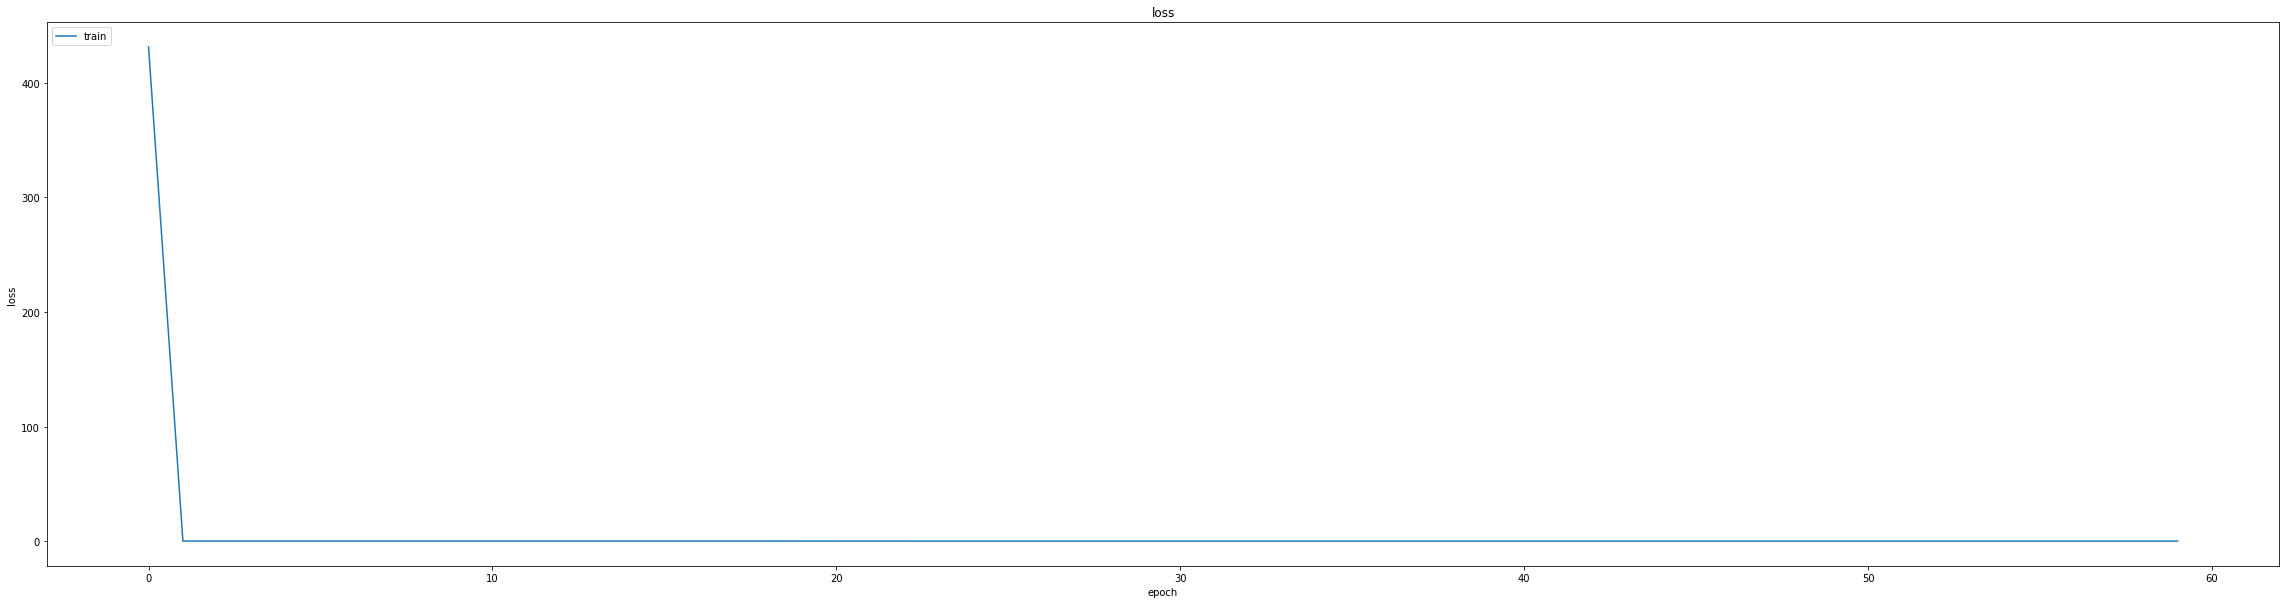

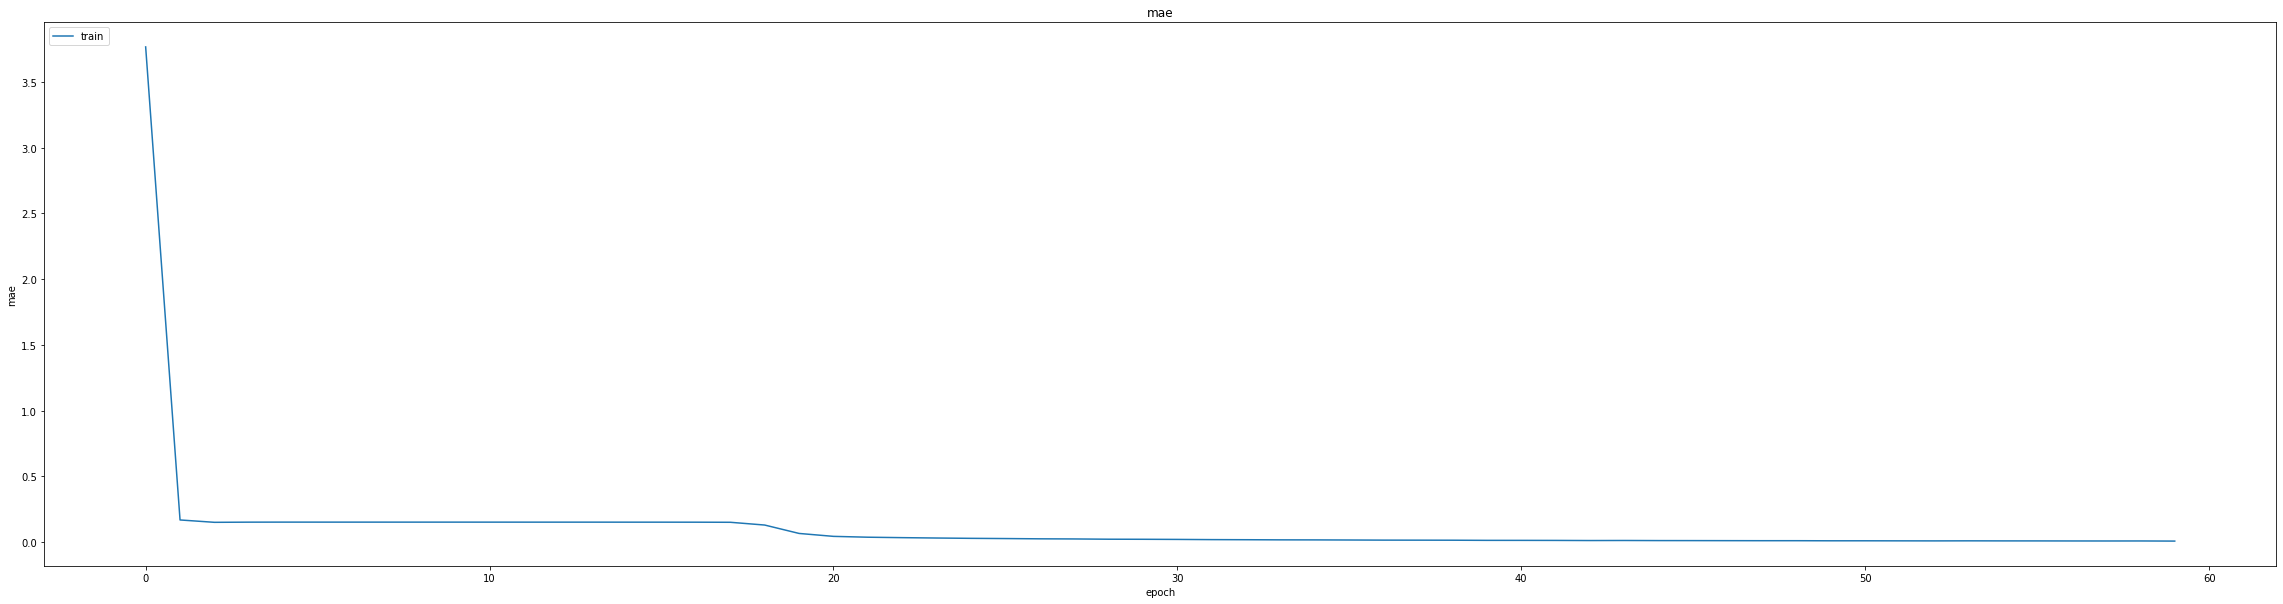

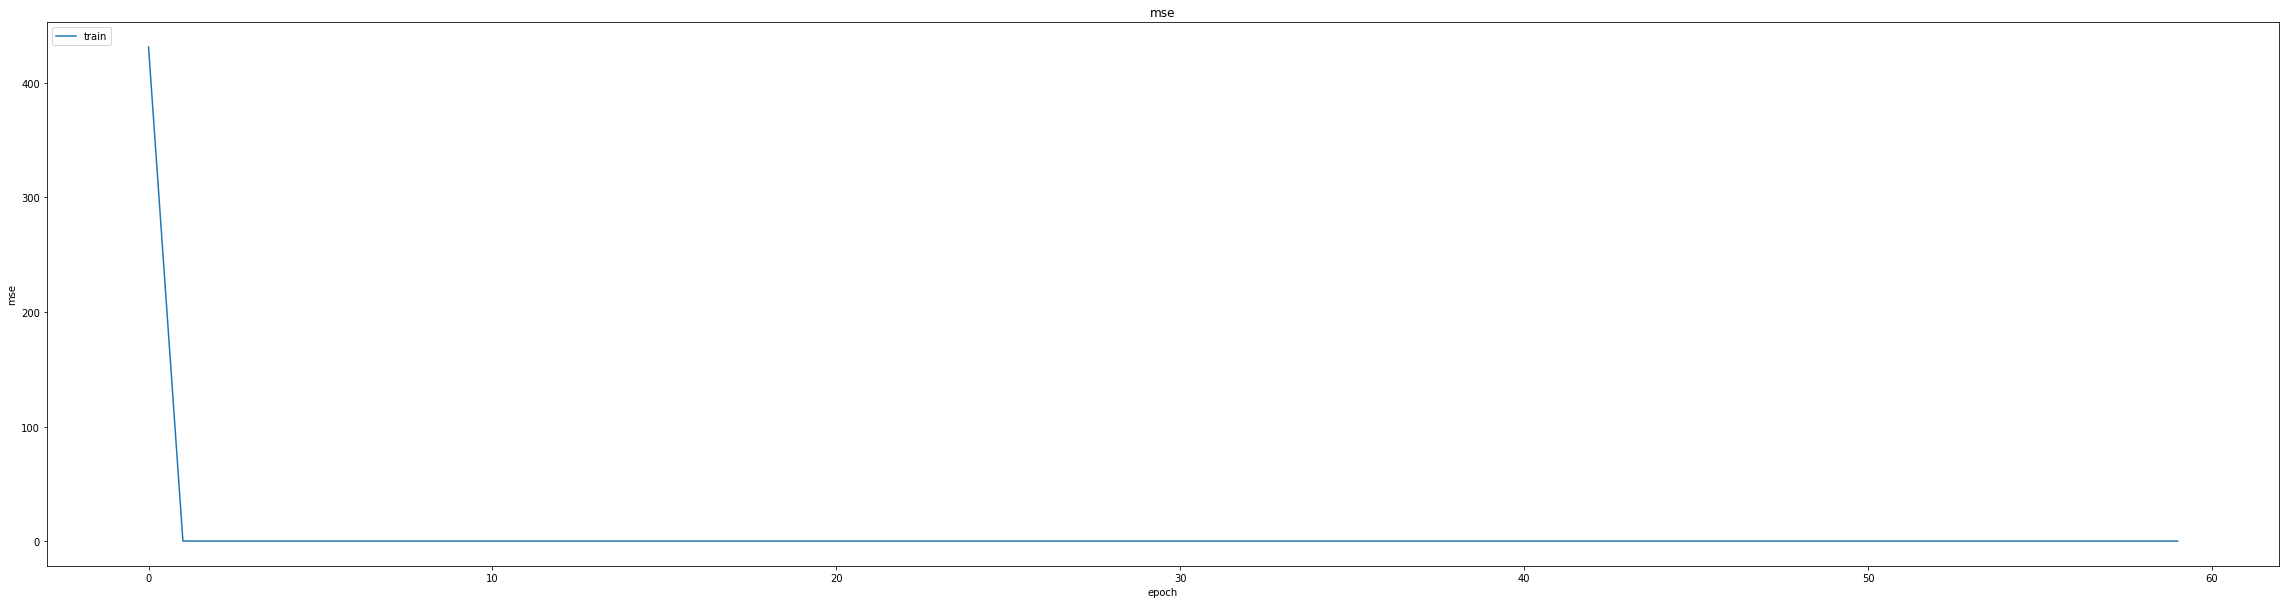

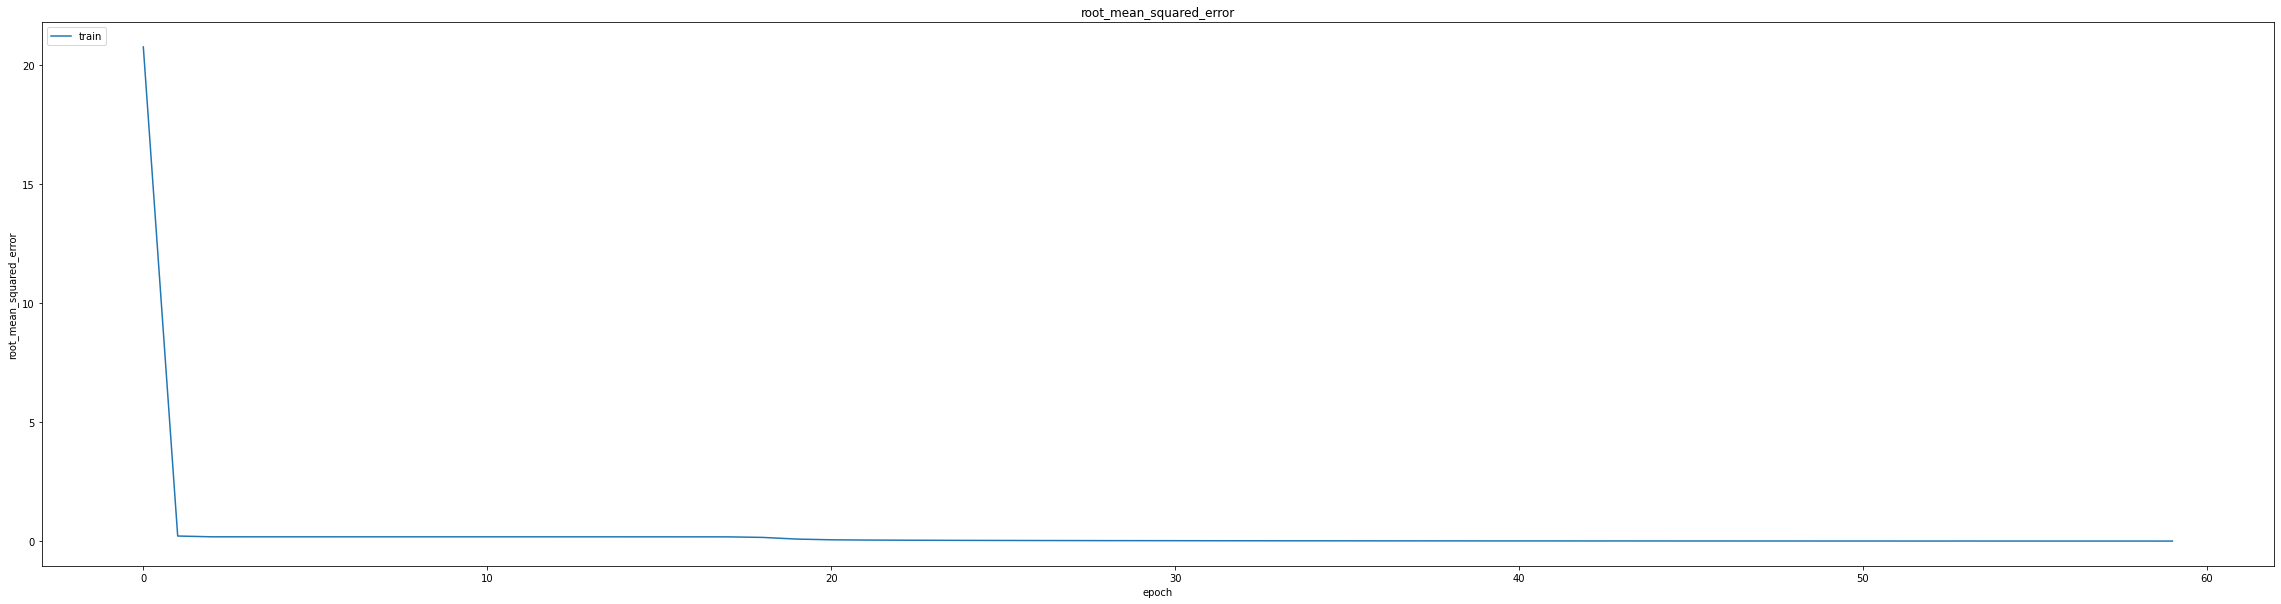

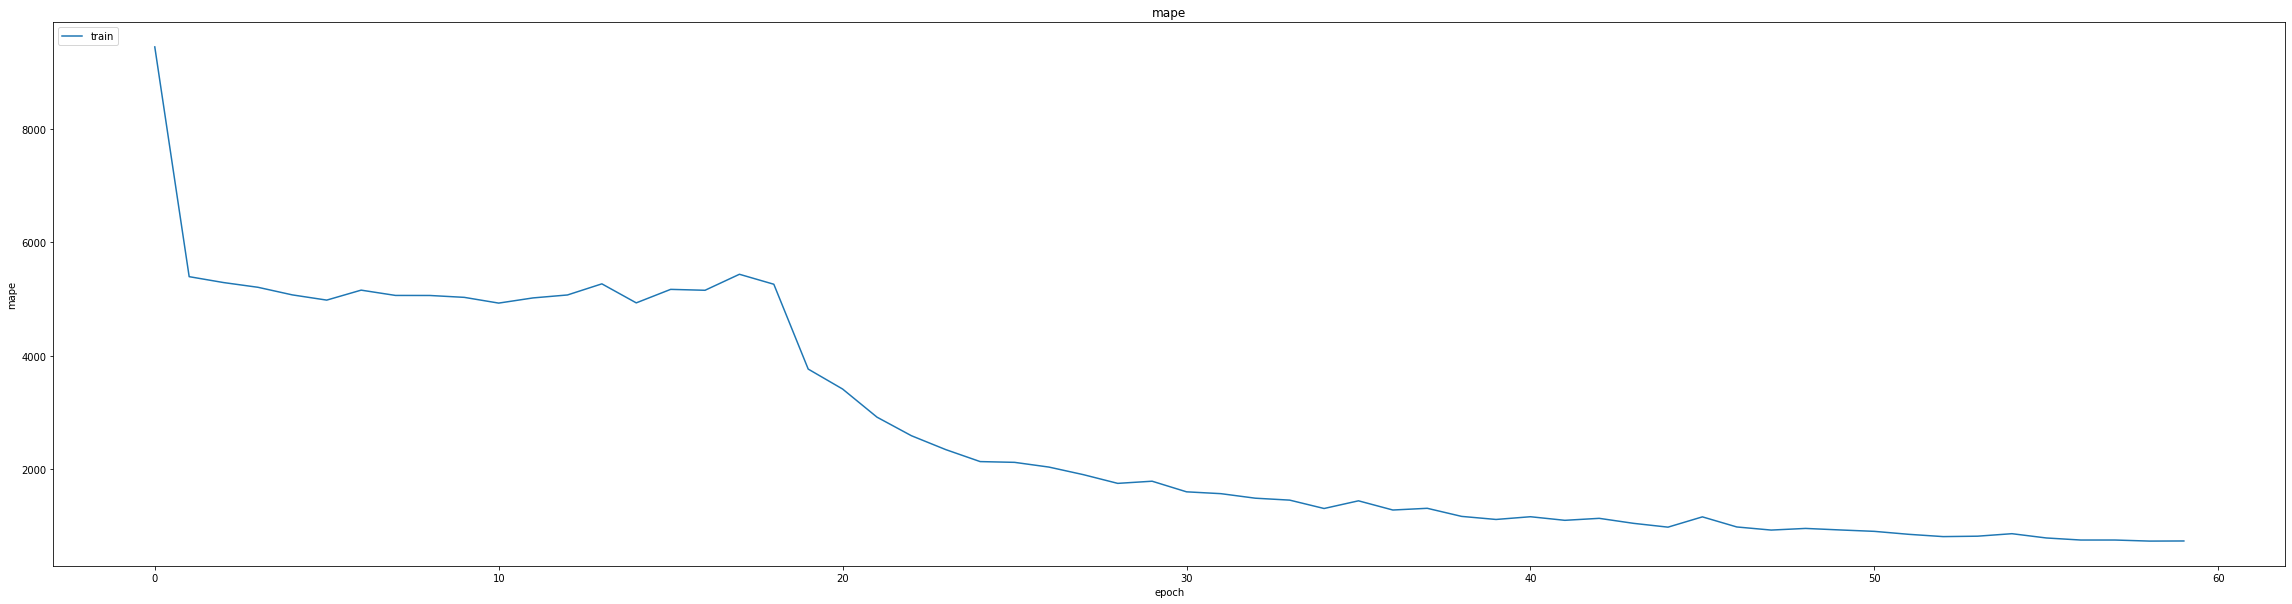

In [31]:
thesis.SummarizeHistory(history)

In [32]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01170720998197794
0.01652517542243004
1392/1392 [==============================] - 6s 4ms/step
0.972550655905642


In [33]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [34]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


346/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0244 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1257.9464
Epoch 1: val_mse did not improve from 0.00027
347/347 [==============================] - 13s 21ms/step - loss: 0.0025 - mae: 0.0243 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1254.3828 - val_loss: 8.0686e-04 - val_mae: 0.0238 - val_mse: 8.0686e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 3189.9521 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 1.8914e-04 - mae: 0.0107 - mse: 1.8914e-04 - root_mean_squared_error: 0.0138 - mape: 921.9178
Epoch 2: val_mse did not improve from 0.00027
347/347 [==============================] - 6s 17ms/step - loss: 1.8872e-04 - mae: 0.0107 - mse: 1.8872e-04 - root_mean_squared_error: 0.0137 - mape: 916.6541 - val_loss: 6.7482e-04 - val_mae: 0.0223 - val_mse: 6.7482e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2417.9619 - lr: 0.0010
lr changed to 0.

347/347 [==============================] - 17s 48ms/step - loss: 9.5464e-05 - mae: 0.0076 - mse: 9.5464e-05 - root_mean_squared_error: 0.0098 - mape: 630.8687 - val_loss: 2.6331e-04 - val_mae: 0.0125 - val_mse: 2.6331e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1786.6981 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
345/347 [============================>.] - ETA: 0s - loss: 9.8419e-05 - mae: 0.0078 - mse: 9.8419e-05 - root_mean_squared_error: 0.0099 - mape: 548.8997
Epoch 9: val_mse improved from 0.00026 to 0.00022, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 9.8385e-05 - mae: 0.0078 - mse: 9.8385e-05 - root_mean_squared_error: 0.0099 - mape: 545.7687 - val_loss: 2.1640e-04 - val_mae: 0.0109 - val_mse: 2.1640e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 1797.9019 - lr: 6.5610e-04
Epoch 10/20
347/347 [==============================] - ETA: 0s - loss: 9.7886e-05 - mae: 0.0078 - mse: 9.7886e-05 - root_mean_squared_error: 0.0099 - mape: 648.8026
Epoch 10: val_mse did not improve from 0.00022
347/347 [==============================] - 6s 18ms/step - loss: 9.7886e-05 - mae: 0.0078 - mse: 9.7886e-05 - root_mean_squared_error: 0.0099 - mape: 648.8026 - val_loss: 4.8033e-04 - val_mae: 0.0184 - val_mse: 4.8033e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 1653.0414 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
346/347 [============================>.] - ETA: 0s - loss: 6.9514e-05 - mae: 0.0064 - mse: 6.9514e-05 - root_mean_squared_error: 0.0083 - mape:

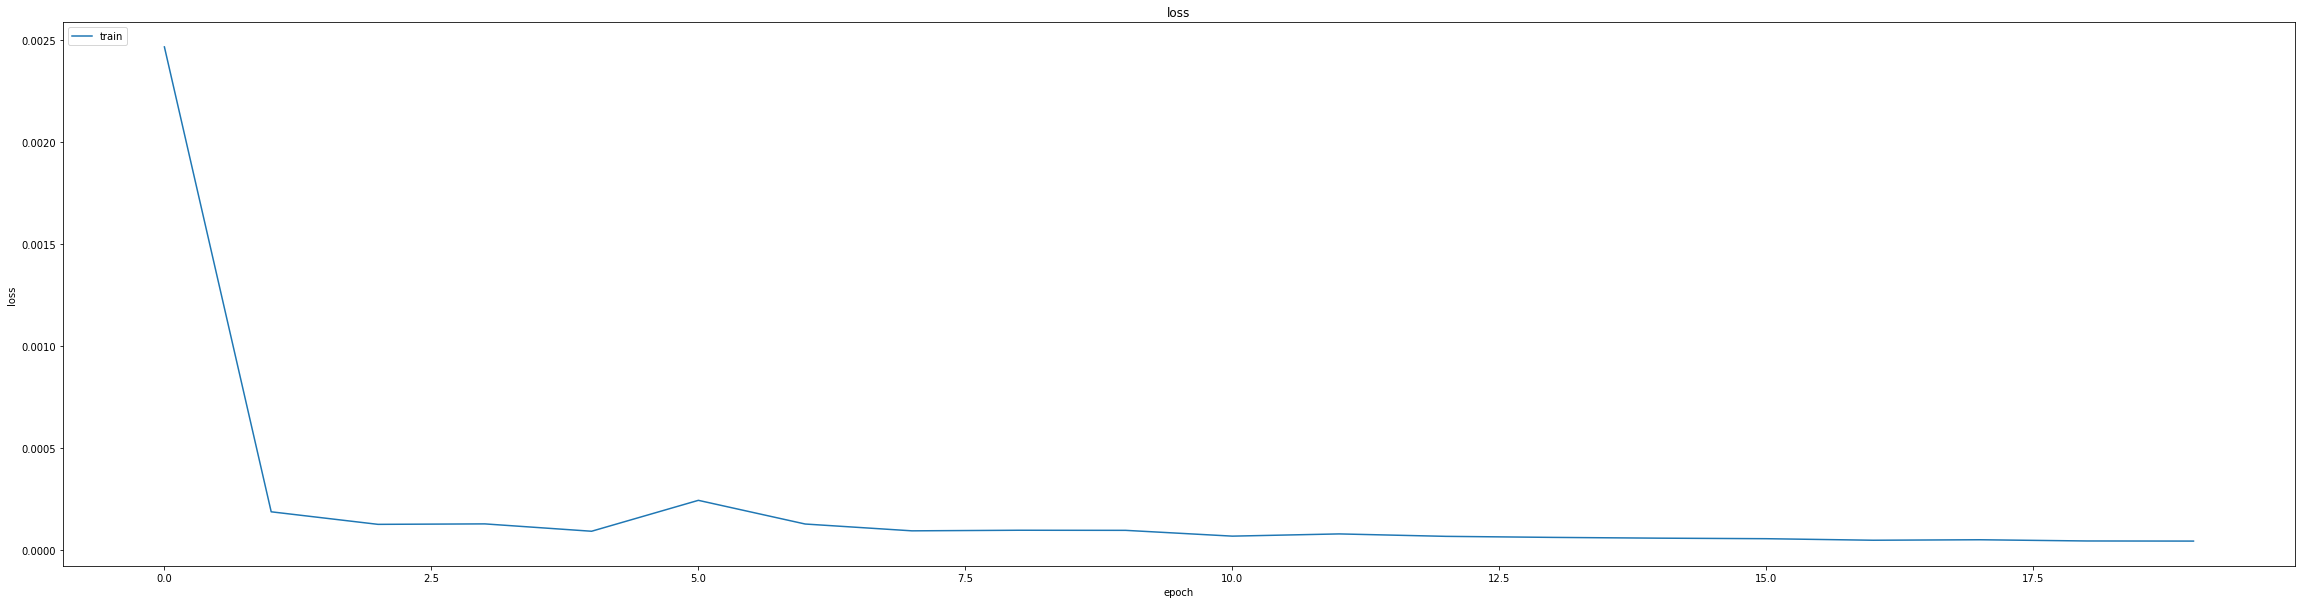

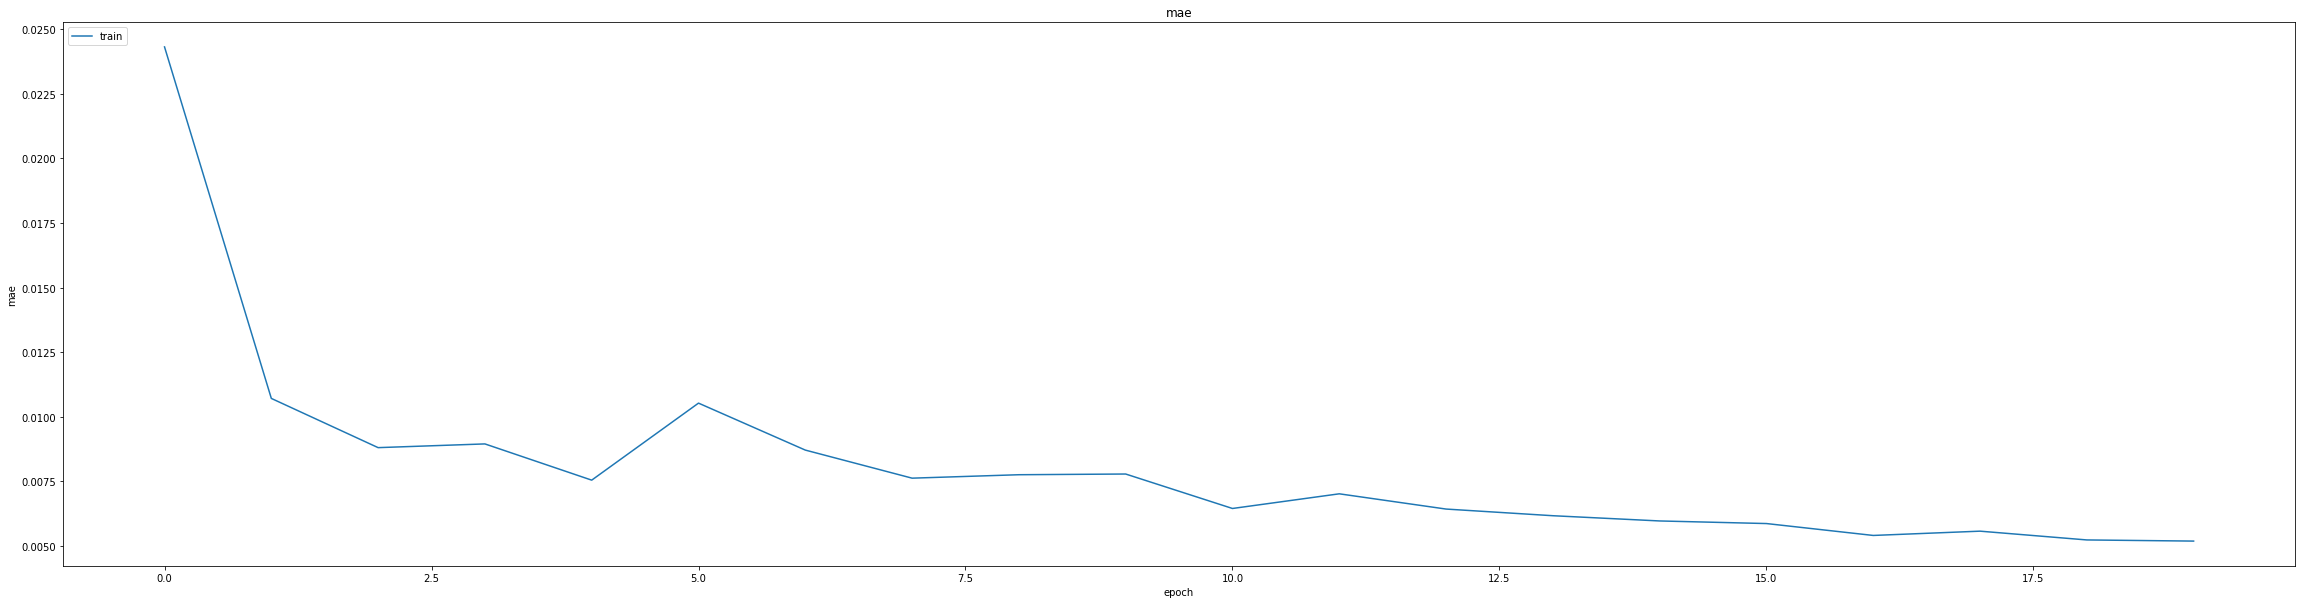

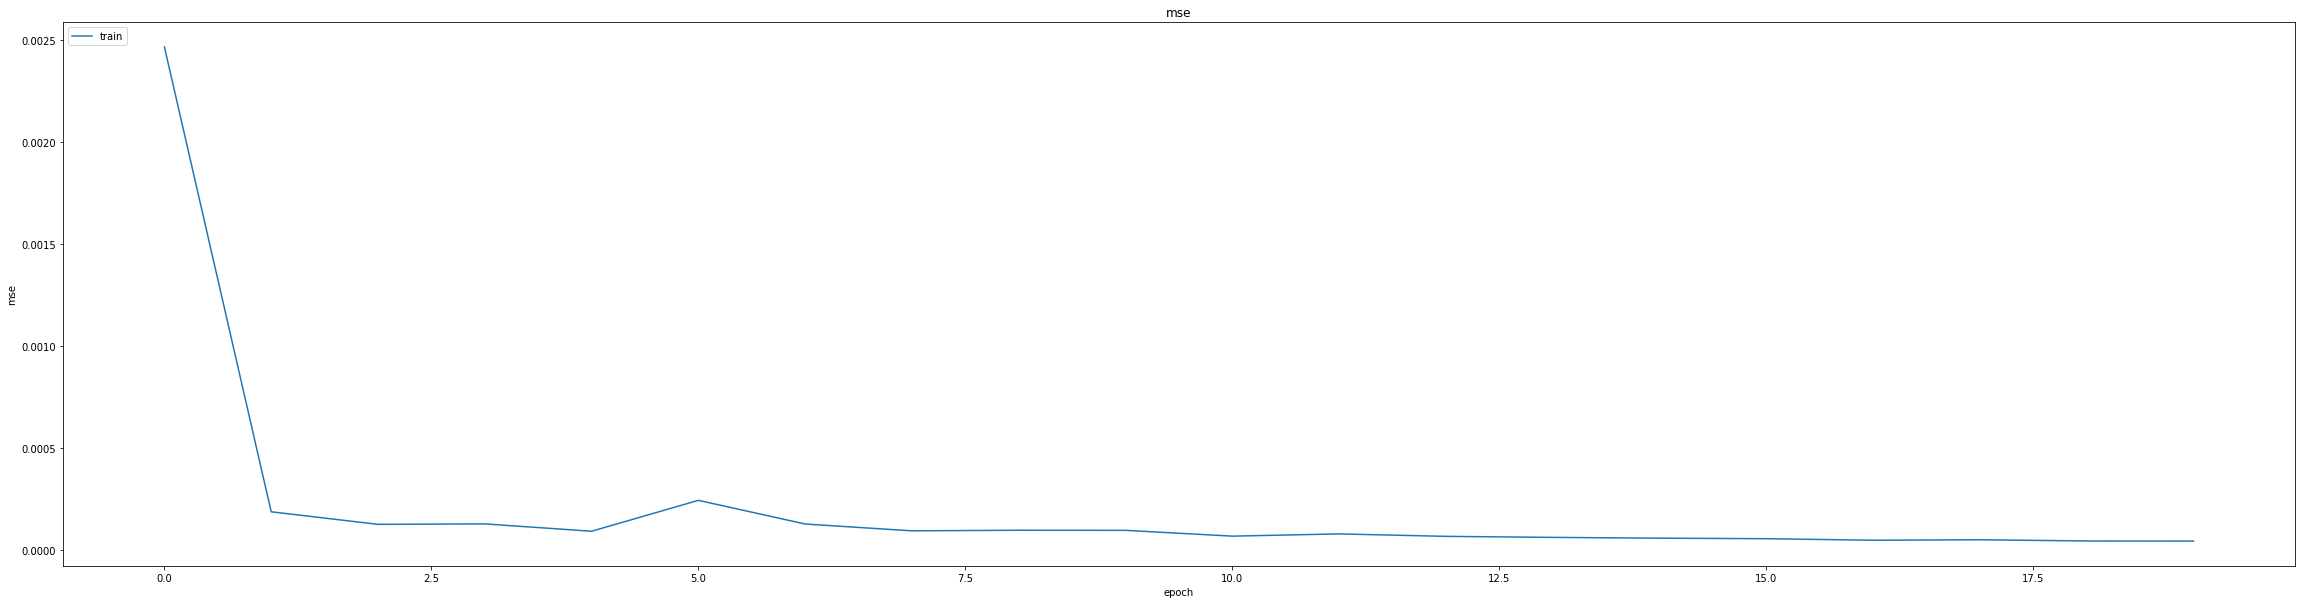

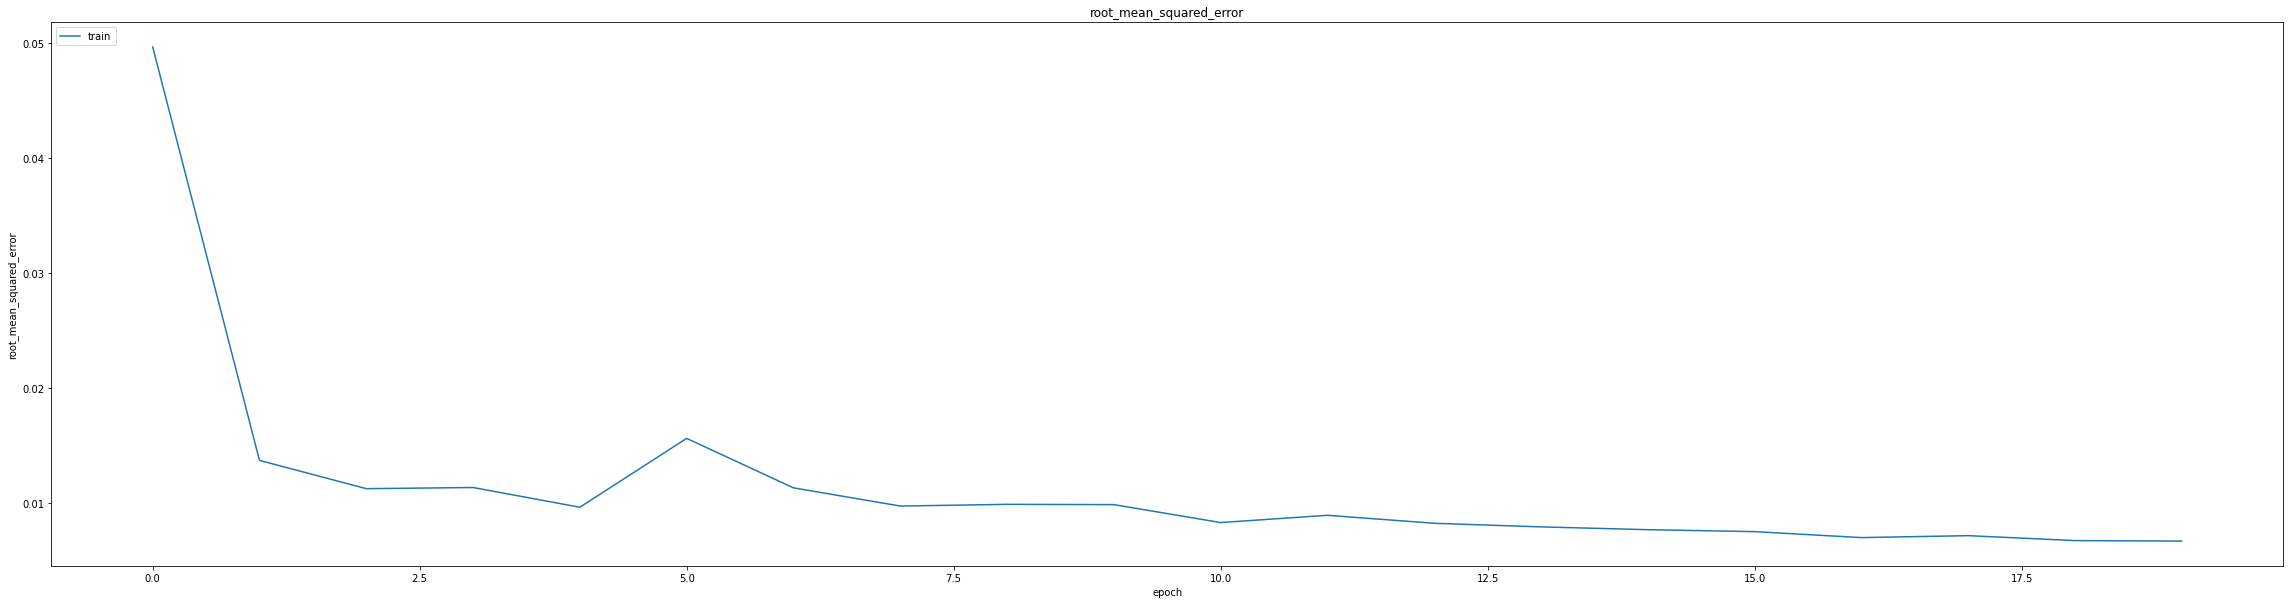

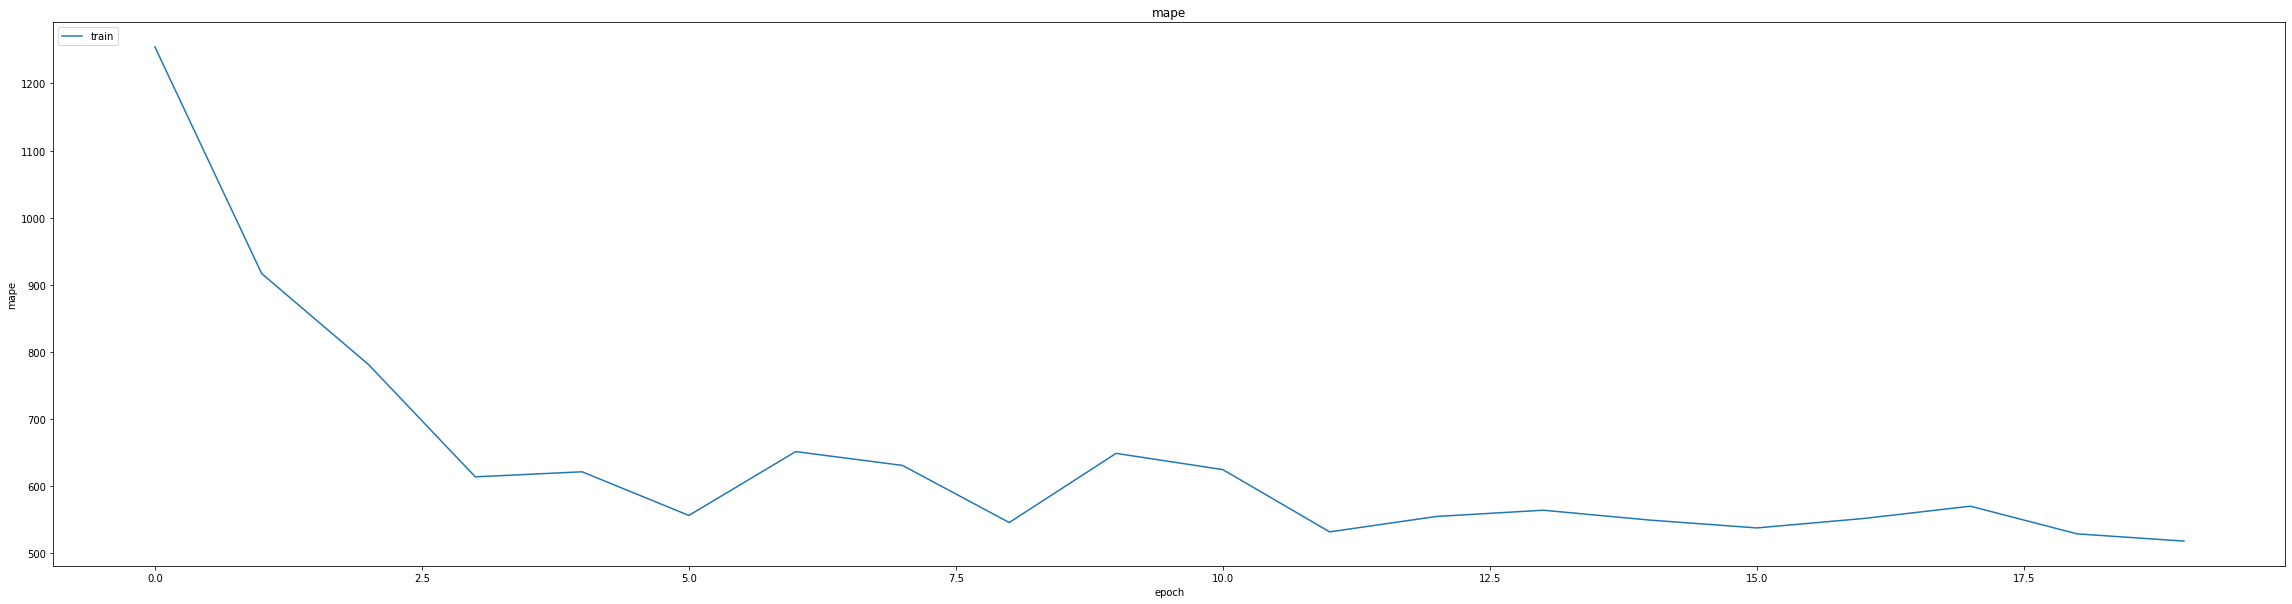

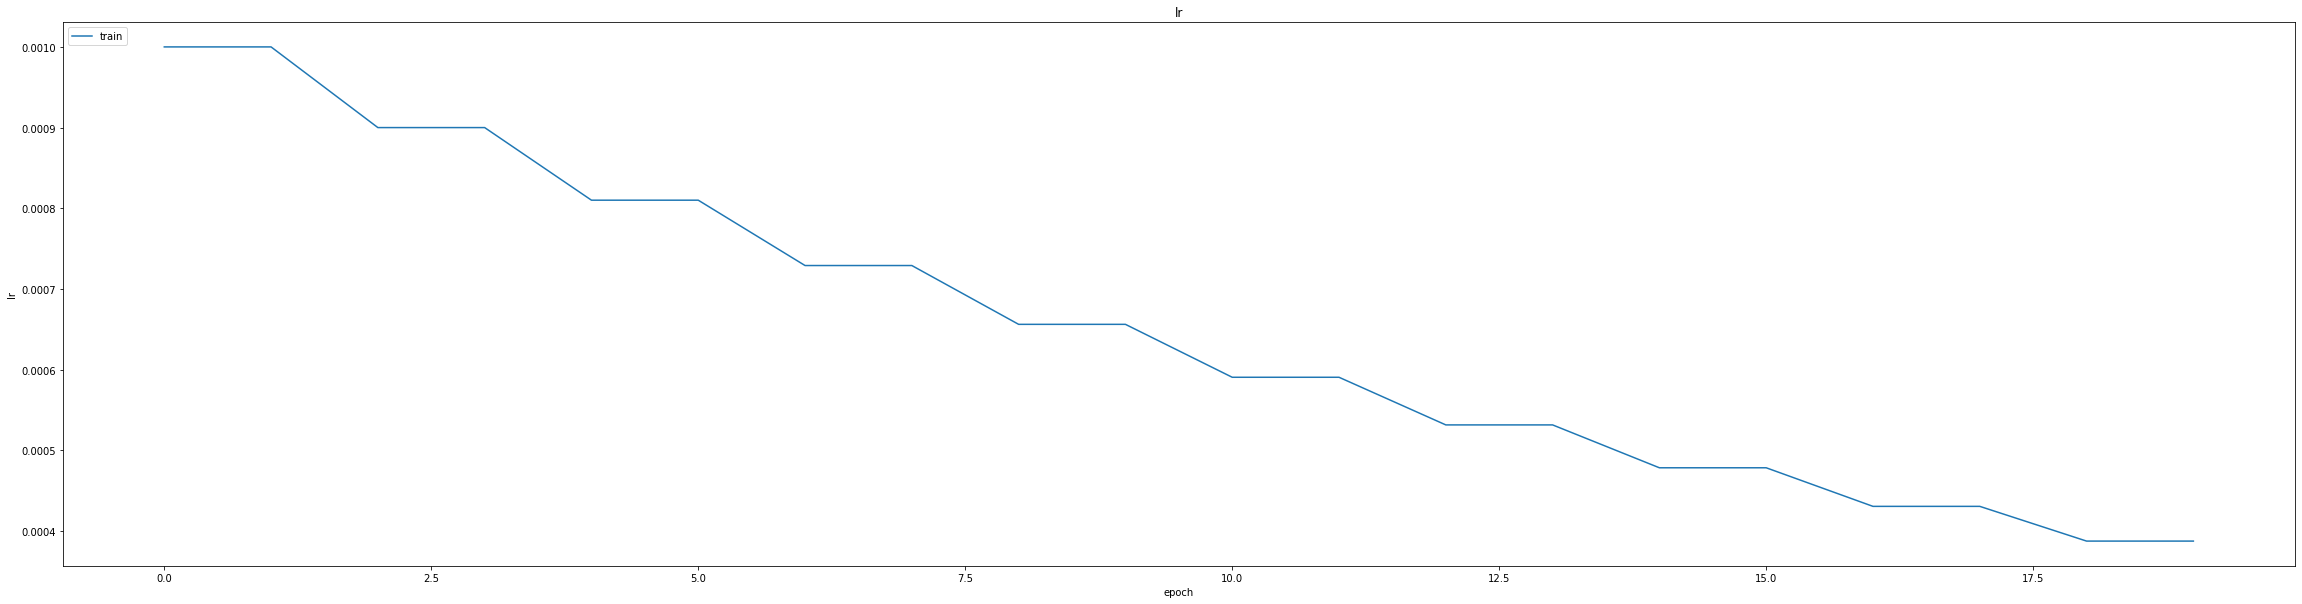

In [35]:
thesis.SummarizeHistory(history)

In [36]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010925528593361378
0.014710599556565285
1392/1392 [==============================] - 7s 4ms/step
0.9880478982207959


1392/1392 [==============================] - 6s 4ms/step


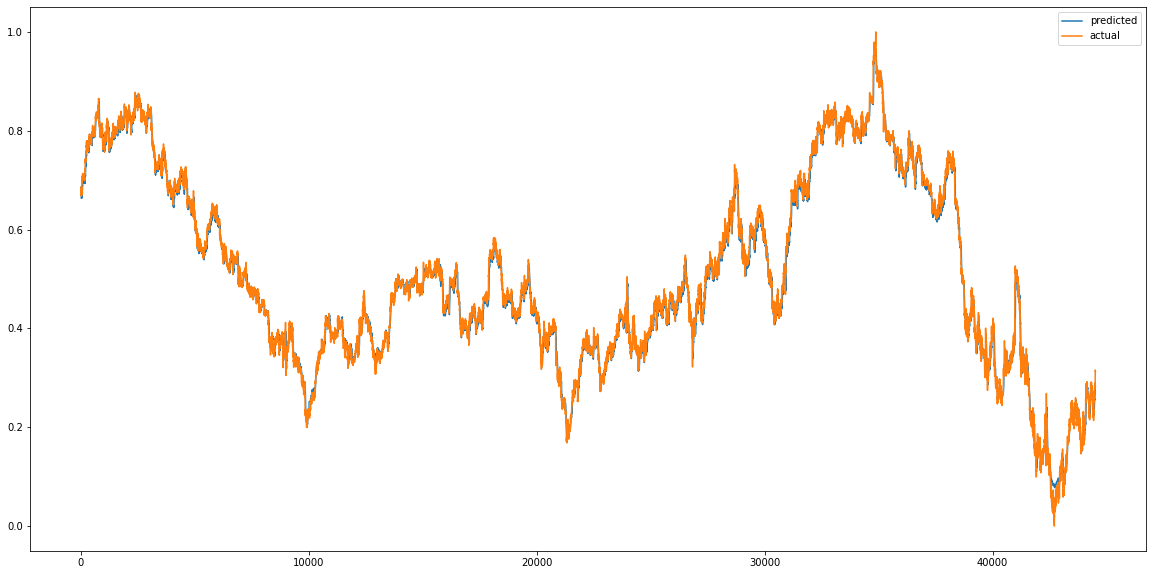

In [37]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


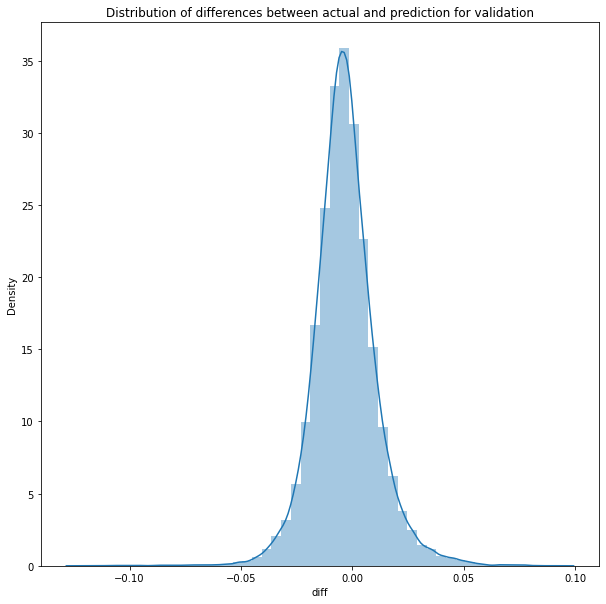

In [38]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 6s 4ms/step


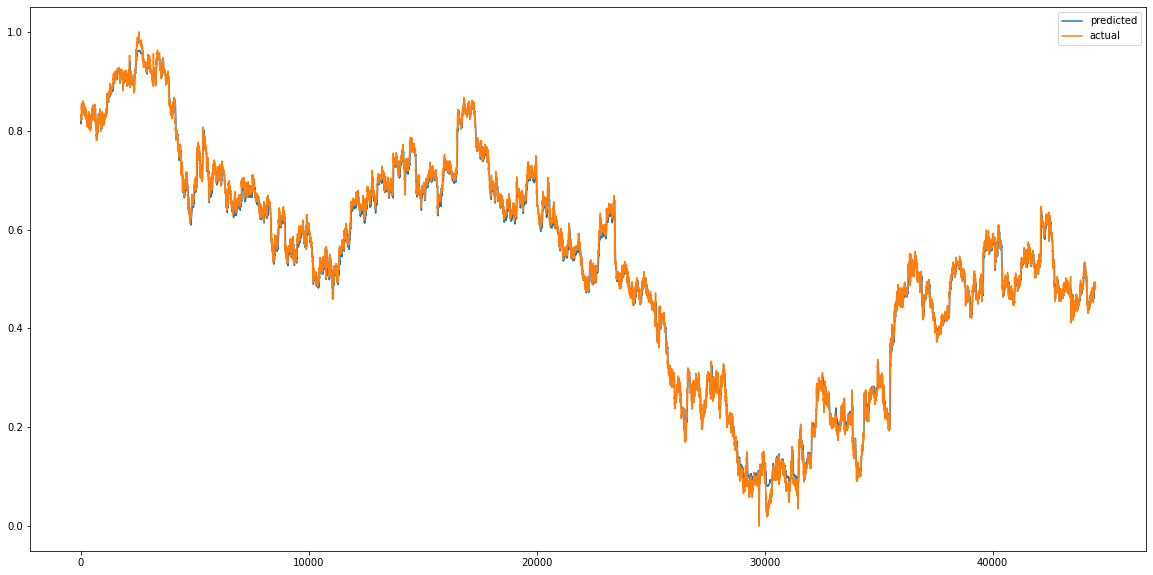

In [39]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


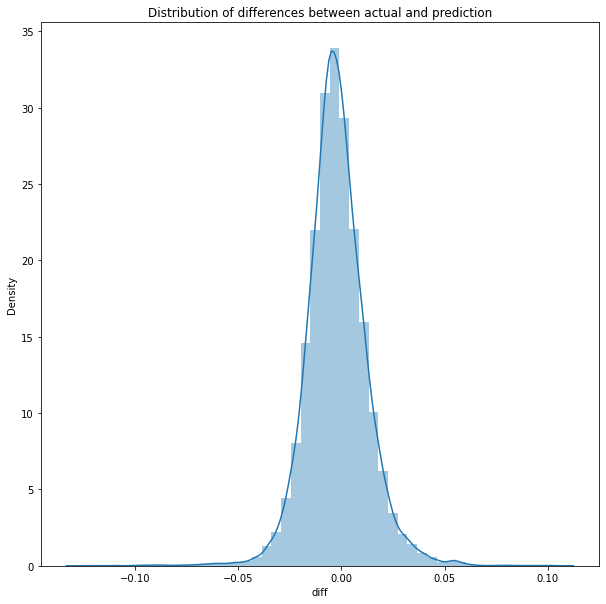

In [40]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00022234238664083946
RMSE :  0.014911149742418908
MAE :  0.011043922085323944
1392/1392 [==============================] - 6s 4ms/step
R2_Score  : 0.9954915211608384


count    44513.000000
mean        -0.002205
std          0.014747
min         -0.128029
25%         -0.010632
50%         -0.002819
75%          0.005859
max          0.107234
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [42]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [43]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 315.2045 - mae: 2.6195 - mse: 315.2045 - root_mean_squared_error: 17.7540 - mape: 5949.2842
Epoch 1: val_mse improved from inf to 0.06795, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 41s 89ms/step - loss: 315.2045 - mae: 2.6195 - mse: 315.2045 - root_mean_squared_error: 17.7540 - mape: 5949.2842 - val_loss: 0.0679 - val_mae: 0.2231 - val_mse: 0.0679 - val_root_mean_squared_error: 0.2607 - val_mape: 15885.9072
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0413 - mae: 0.1642 - mse: 0.0413 - root_mean_squared_error: 0.2032 - mape: 5128.2246
Epoch 2: val_mse improved from 0.06795 to 0.06671, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 88ms/step - loss: 0.0413 - mae: 0.1642 - mse: 0.0413 - root_mean_squared_error: 0.2032 - mape: 5099.1270 - val_loss: 0.0667 - val_mae: 0.2211 - val_mse: 0.0667 - val_root_mean_squared_error: 0.2583 - val_mape: 15715.7432
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0403 - mae: 0.1621 - mse: 0.0403 - root_mean_squared_error: 0.2006 - mape: 5276.7134
Epoch 3: val_mse improved from 0.06671 to 0.06498, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 86ms/step - loss: 0.0403 - mae: 0.1621 - mse: 0.0403 - root_mean_squared_error: 0.2006 - mape: 5276.7134 - val_loss: 0.0650 - val_mae: 0.2183 - val_mse: 0.0650 - val_root_mean_squared_error: 0.2549 - val_mape: 15447.5283
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0383 - mae: 0.1579 - mse: 0.0383 - root_mean_squared_error: 0.1958 - mape: 5130.7036
Epoch 4: val_mse improved from 0.06498 to 0.06107, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 87ms/step - loss: 0.0383 - mae: 0.1579 - mse: 0.0383 - root_mean_squared_error: 0.1958 - mape: 5130.7036 - val_loss: 0.0611 - val_mae: 0.2118 - val_mse: 0.0611 - val_root_mean_squared_error: 0.2471 - val_mape: 14896.9883
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 0.0346 - mae: 0.1499 - mse: 0.0346 - root_mean_squared_error: 0.1861 - mape: 4324.3623
Epoch 5: val_mse improved from 0.06107 to 0.04992, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 31s 90ms/step - loss: 0.0346 - mae: 0.1499 - mse: 0.0346 - root_mean_squared_error: 0.1861 - mape: 4312.1782 - val_loss: 0.0499 - val_mae: 0.1916 - val_mse: 0.0499 - val_root_mean_squared_error: 0.2234 - val_mape: 13079.7275
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0218 - mae: 0.1176 - mse: 0.0218 - root_mean_squared_error: 0.1478 - mape: 3567.7124
Epoch 6: val_mse improved from 0.04992 to 0.01518, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 87ms/step - loss: 0.0218 - mae: 0.1174 - mse: 0.0218 - root_mean_squared_error: 0.1476 - mape: 3547.3982 - val_loss: 0.0152 - val_mae: 0.0989 - val_mse: 0.0152 - val_root_mean_squared_error: 0.1232 - val_mape: 7045.2070
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0059 - mae: 0.0610 - mse: 0.0059 - root_mean_squared_error: 0.0770 - mape: 1555.8030
Epoch 7: val_mse improved from 0.01518 to 0.00205, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 86ms/step - loss: 0.0059 - mae: 0.0610 - mse: 0.0059 - root_mean_squared_error: 0.0770 - mape: 1551.4144 - val_loss: 0.0020 - val_mae: 0.0360 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 3712.5762
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0462 - mse: 0.0034 - root_mean_squared_error: 0.0584 - mape: 1334.9896
Epoch 8: val_mse improved from 0.00205 to 0.00133, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 87ms/step - loss: 0.0034 - mae: 0.0462 - mse: 0.0034 - root_mean_squared_error: 0.0584 - mape: 1334.9896 - val_loss: 0.0013 - val_mae: 0.0289 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 3789.6777
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0393 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1397.1558
Epoch 9: val_mse did not improve from 0.00133
347/347 [==============================] - 7s 20ms/step - loss: 0.0025 - mae: 0.0393 - mse: 0.0025 - root_mean_squared_error: 0.0497 - mape: 1393.2168 - val_loss: 0.0014 - val_mae: 0.0291 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 3594.4792
Epoch 10/60
345/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0350 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 1277.0481
Epoch 10: val_mse did not improve from 0.00133
347/347 [==============================] - 7s 21ms/step - l

347/347 [==============================] - 30s 86ms/step - loss: 0.0012 - mae: 0.0269 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 966.6628 - val_loss: 9.1284e-04 - val_mae: 0.0218 - val_mse: 9.1284e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2905.8999
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0250 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1264.4150
Epoch 14: val_mse improved from 0.00091 to 0.00091, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 31s 88ms/step - loss: 0.0010 - mae: 0.0250 - mse: 0.0010 - root_mean_squared_error: 0.0316 - mape: 1257.2072 - val_loss: 9.1089e-04 - val_mae: 0.0215 - val_mse: 9.1089e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2833.6785
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 8.5534e-04 - mae: 0.0231 - mse: 8.5534e-04 - root_mean_squared_error: 0.0292 - mape: 1048.5952
Epoch 15: val_mse did not improve from 0.00091
347/347 [==============================] - 7s 21ms/step - loss: 8.5502e-04 - mae: 0.0231 - mse: 8.5502e-04 - root_mean_squared_error: 0.0292 - mape: 1045.6310 - val_loss: 9.1502e-04 - val_mae: 0.0228 - val_mse: 9.1502e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2804.9666
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 7.3515e-04 - mae: 0.0214 - mse: 7.3515e-04 - root_mean_squared_error: 0.0271 - mape: 1166.5073
Epoch 16: val_mse improved from 0.00091 to 0.00076, saving model

347/347 [==============================] - 29s 85ms/step - loss: 7.3470e-04 - mae: 0.0214 - mse: 7.3470e-04 - root_mean_squared_error: 0.0271 - mape: 1163.2075 - val_loss: 7.6011e-04 - val_mae: 0.0197 - val_mse: 7.6011e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 2773.4993
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 6.3532e-04 - mae: 0.0199 - mse: 6.3532e-04 - root_mean_squared_error: 0.0252 - mape: 1096.8010
Epoch 17: val_mse improved from 0.00076 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 6.3517e-04 - mae: 0.0199 - mse: 6.3517e-04 - root_mean_squared_error: 0.0252 - mape: 1093.6989 - val_loss: 7.3368e-04 - val_mae: 0.0192 - val_mse: 7.3368e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2736.4001
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 5.5282e-04 - mae: 0.0186 - mse: 5.5282e-04 - root_mean_squared_error: 0.0235 - mape: 1132.9561
Epoch 18: val_mse did not improve from 0.00073
347/347 [==============================] - 7s 21ms/step - loss: 5.5252e-04 - mae: 0.0185 - mse: 5.5252e-04 - root_mean_squared_error: 0.0235 - mape: 1126.5011 - val_loss: 7.8453e-04 - val_mae: 0.0202 - val_mse: 7.8453e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 2695.0112
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 4.7600e-04 - mae: 0.0172 - mse: 4.7600e-04 - root_mean_squared_error: 0.0218 - mape: 1170.2894
Epoch 19: val_mse improved from 0.00073 to 0.00073, savi

347/347 [==============================] - 29s 84ms/step - loss: 4.7588e-04 - mae: 0.0172 - mse: 4.7588e-04 - root_mean_squared_error: 0.0218 - mape: 1166.9775 - val_loss: 7.3363e-04 - val_mae: 0.0191 - val_mse: 7.3363e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2646.5105
Epoch 20/60
345/347 [============================>.] - ETA: 0s - loss: 4.0817e-04 - mae: 0.0159 - mse: 4.0817e-04 - root_mean_squared_error: 0.0202 - mape: 894.6035
Epoch 20: val_mse improved from 0.00073 to 0.00061, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 4.0804e-04 - mae: 0.0159 - mse: 4.0804e-04 - root_mean_squared_error: 0.0202 - mape: 889.5024 - val_loss: 6.1099e-04 - val_mae: 0.0167 - val_mse: 6.1099e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 2573.4883
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 3.5585e-04 - mae: 0.0149 - mse: 3.5585e-04 - root_mean_squared_error: 0.0189 - mape: 937.3449
Epoch 21: val_mse did not improve from 0.00061
347/347 [==============================] - 7s 21ms/step - loss: 3.5585e-04 - mae: 0.0149 - mse: 3.5585e-04 - root_mean_squared_error: 0.0189 - mape: 937.3449 - val_loss: 6.6018e-04 - val_mae: 0.0176 - val_mse: 6.6018e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2530.2659
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 3.1836e-04 - mae: 0.0141 - mse: 3.1836e-04 - root_mean_squared_error: 0.0178 - mape: 964.9777
Epoch 22: val_mse did not improve from 0.00061
347/347 [====

347/347 [==============================] - 30s 87ms/step - loss: 2.5268e-04 - mae: 0.0125 - mse: 2.5268e-04 - root_mean_squared_error: 0.0159 - mape: 841.1140 - val_loss: 5.4781e-04 - val_mae: 0.0162 - val_mse: 5.4781e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 2358.0781
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 2.3300e-04 - mae: 0.0120 - mse: 2.3300e-04 - root_mean_squared_error: 0.0153 - mape: 966.5677
Epoch 25: val_mse improved from 0.00055 to 0.00052, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 2.3293e-04 - mae: 0.0120 - mse: 2.3293e-04 - root_mean_squared_error: 0.0153 - mape: 963.8311 - val_loss: 5.2248e-04 - val_mae: 0.0154 - val_mse: 5.2248e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 2313.4788
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 2.1663e-04 - mae: 0.0116 - mse: 2.1663e-04 - root_mean_squared_error: 0.0147 - mape: 904.4387
Epoch 26: val_mse did not improve from 0.00052
347/347 [==============================] - 7s 21ms/step - loss: 2.1671e-04 - mae: 0.0116 - mse: 2.1671e-04 - root_mean_squared_error: 0.0147 - mape: 899.2839 - val_loss: 5.3008e-04 - val_mae: 0.0167 - val_mse: 5.3008e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 2281.5901
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 1.8734e-04 - mae: 0.0107 - mse: 1.8734e-04 - root_mean_squared_error: 0.0137 - mape: 746.5026
Epoch 27: val_mse improved from 0.00052 to 0.00051, saving m

347/347 [==============================] - 29s 84ms/step - loss: 1.8732e-04 - mae: 0.0107 - mse: 1.8732e-04 - root_mean_squared_error: 0.0137 - mape: 744.3917 - val_loss: 5.0803e-04 - val_mae: 0.0155 - val_mse: 5.0803e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 2244.6641
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 1.8763e-04 - mae: 0.0108 - mse: 1.8763e-04 - root_mean_squared_error: 0.0137 - mape: 770.8516
Epoch 28: val_mse improved from 0.00051 to 0.00048, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.8763e-04 - mae: 0.0108 - mse: 1.8763e-04 - root_mean_squared_error: 0.0137 - mape: 770.8516 - val_loss: 4.8105e-04 - val_mae: 0.0154 - val_mse: 4.8105e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 2223.2671
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 1.7508e-04 - mae: 0.0104 - mse: 1.7508e-04 - root_mean_squared_error: 0.0132 - mape: 876.5276
Epoch 29: val_mse did not improve from 0.00048
347/347 [==============================] - 7s 20ms/step - loss: 1.7508e-04 - mae: 0.0104 - mse: 1.7508e-04 - root_mean_squared_error: 0.0132 - mape: 876.5276 - val_loss: 4.8519e-04 - val_mae: 0.0157 - val_mse: 4.8519e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2196.4211
Epoch 30/60
346/347 [============================>.] - ETA: 0s - loss: 1.7422e-04 - mae: 0.0104 - mse: 1.7422e-04 - root_mean_squared_error: 0.0132 - mape: 800.4265
Epoch 30: val_mse improved from 0.00048 to 0.00045, saving m

347/347 [==============================] - 29s 84ms/step - loss: 1.7410e-04 - mae: 0.0104 - mse: 1.7410e-04 - root_mean_squared_error: 0.0132 - mape: 798.1605 - val_loss: 4.5433e-04 - val_mae: 0.0143 - val_mse: 4.5433e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 2157.1538
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 1.4541e-04 - mae: 0.0095 - mse: 1.4541e-04 - root_mean_squared_error: 0.0121 - mape: 769.9796
Epoch 31: val_mse improved from 0.00045 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.4541e-04 - mae: 0.0095 - mse: 1.4541e-04 - root_mean_squared_error: 0.0121 - mape: 769.9796 - val_loss: 4.2636e-04 - val_mae: 0.0148 - val_mse: 4.2636e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2098.1562
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 1.4503e-04 - mae: 0.0095 - mse: 1.4503e-04 - root_mean_squared_error: 0.0120 - mape: 747.7183
Epoch 32: val_mse improved from 0.00043 to 0.00040, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 86ms/step - loss: 1.4503e-04 - mae: 0.0095 - mse: 1.4503e-04 - root_mean_squared_error: 0.0120 - mape: 747.7183 - val_loss: 3.9599e-04 - val_mae: 0.0149 - val_mse: 3.9599e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2056.9998
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 1.4620e-04 - mae: 0.0095 - mse: 1.4620e-04 - root_mean_squared_error: 0.0121 - mape: 681.8754
Epoch 33: val_mse did not improve from 0.00040
347/347 [==============================] - 8s 22ms/step - loss: 1.4620e-04 - mae: 0.0095 - mse: 1.4620e-04 - root_mean_squared_error: 0.0121 - mape: 681.8754 - val_loss: 4.1434e-04 - val_mae: 0.0150 - val_mse: 4.1434e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 2043.6897
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 1.4609e-04 - mae: 0.0095 - mse: 1.4609e-04 - root_mean_squared_error: 0.0121 - mape: 707.0276
Epoch 34: val_mse improved from 0.00040 to 0.00037, saving m

347/347 [==============================] - 29s 83ms/step - loss: 1.4601e-04 - mae: 0.0095 - mse: 1.4601e-04 - root_mean_squared_error: 0.0121 - mape: 705.0262 - val_loss: 3.7385e-04 - val_mae: 0.0150 - val_mse: 3.7385e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 2020.1664
Epoch 35/60
346/347 [============================>.] - ETA: 0s - loss: 1.2358e-04 - mae: 0.0087 - mse: 1.2358e-04 - root_mean_squared_error: 0.0111 - mape: 622.7632
Epoch 35: val_mse improved from 0.00037 to 0.00037, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 1.2360e-04 - mae: 0.0087 - mse: 1.2360e-04 - root_mean_squared_error: 0.0111 - mape: 621.0026 - val_loss: 3.6707e-04 - val_mae: 0.0128 - val_mse: 3.6707e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 1988.7909
Epoch 36/60
345/347 [============================>.] - ETA: 0s - loss: 1.2607e-04 - mae: 0.0089 - mse: 1.2607e-04 - root_mean_squared_error: 0.0112 - mape: 683.7551
Epoch 36: val_mse improved from 0.00037 to 0.00035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.2596e-04 - mae: 0.0089 - mse: 1.2596e-04 - root_mean_squared_error: 0.0112 - mape: 679.8536 - val_loss: 3.4824e-04 - val_mae: 0.0126 - val_mse: 3.4824e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 1974.4622
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 1.2006e-04 - mae: 0.0086 - mse: 1.2006e-04 - root_mean_squared_error: 0.0110 - mape: 637.0320
Epoch 37: val_mse improved from 0.00035 to 0.00031, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.1995e-04 - mae: 0.0086 - mse: 1.1995e-04 - root_mean_squared_error: 0.0110 - mape: 635.2282 - val_loss: 3.1404e-04 - val_mae: 0.0121 - val_mse: 3.1404e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1940.4882
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 1.2091e-04 - mae: 0.0087 - mse: 1.2091e-04 - root_mean_squared_error: 0.0110 - mape: 593.7650
Epoch 38: val_mse did not improve from 0.00031
347/347 [==============================] - 7s 21ms/step - loss: 1.2091e-04 - mae: 0.0087 - mse: 1.2091e-04 - root_mean_squared_error: 0.0110 - mape: 593.7650 - val_loss: 3.2720e-04 - val_mae: 0.0139 - val_mse: 3.2720e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 1931.7990
Epoch 39/60
346/347 [============================>.] - ETA: 0s - loss: 1.1955e-04 - mae: 0.0086 - mse: 1.1955e-04 - root_mean_squared_error: 0.0109 - mape: 640.6894
Epoch 39: val_mse did not improve from 0.00031
347/347 [====

347/347 [==============================] - 29s 83ms/step - loss: 1.0932e-04 - mae: 0.0082 - mse: 1.0932e-04 - root_mean_squared_error: 0.0105 - mape: 612.3611 - val_loss: 3.0568e-04 - val_mae: 0.0135 - val_mse: 3.0568e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 1852.7533
Epoch 41/60
347/347 [==============================] - ETA: 0s - loss: 1.1448e-04 - mae: 0.0084 - mse: 1.1448e-04 - root_mean_squared_error: 0.0107 - mape: 616.2066
Epoch 41: val_mse improved from 0.00031 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 30s 88ms/step - loss: 1.1448e-04 - mae: 0.0084 - mse: 1.1448e-04 - root_mean_squared_error: 0.0107 - mape: 616.2066 - val_loss: 2.6028e-04 - val_mae: 0.0110 - val_mse: 2.6028e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1848.9617
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 1.1493e-04 - mae: 0.0085 - mse: 1.1493e-04 - root_mean_squared_error: 0.0107 - mape: 579.0924
Epoch 42: val_mse did not improve from 0.00026
347/347 [==============================] - 7s 20ms/step - loss: 1.1469e-04 - mae: 0.0085 - mse: 1.1469e-04 - root_mean_squared_error: 0.0107 - mape: 575.7872 - val_loss: 3.6532e-04 - val_mae: 0.0162 - val_mse: 3.6532e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1793.3120
Epoch 43/60
346/347 [============================>.] - ETA: 0s - loss: 1.1439e-04 - mae: 0.0085 - mse: 1.1439e-04 - root_mean_squared_error: 0.0107 - mape: 626.1738
Epoch 43: val_mse improved from 0.00026 to 0.00024, saving m

347/347 [==============================] - 29s 83ms/step - loss: 1.1429e-04 - mae: 0.0085 - mse: 1.1429e-04 - root_mean_squared_error: 0.0107 - mape: 624.4008 - val_loss: 2.4338e-04 - val_mae: 0.0118 - val_mse: 2.4338e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 1744.1499
Epoch 44/60
345/347 [============================>.] - ETA: 0s - loss: 1.1439e-04 - mae: 0.0084 - mse: 1.1439e-04 - root_mean_squared_error: 0.0107 - mape: 573.3521
Epoch 44: val_mse improved from 0.00024 to 0.00021, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.1411e-04 - mae: 0.0084 - mse: 1.1411e-04 - root_mean_squared_error: 0.0107 - mape: 570.0797 - val_loss: 2.1222e-04 - val_mae: 0.0108 - val_mse: 2.1222e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 1731.1279
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 1.0803e-04 - mae: 0.0082 - mse: 1.0803e-04 - root_mean_squared_error: 0.0104 - mape: 542.7610
Epoch 45: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 1.0795e-04 - mae: 0.0082 - mse: 1.0795e-04 - root_mean_squared_error: 0.0104 - mape: 539.6656 - val_loss: 1.8863e-04 - val_mae: 0.0100 - val_mse: 1.8863e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1689.4536
Epoch 46/60
345/347 [============================>.] - ETA: 0s - loss: 1.2643e-04 - mae: 0.0088 - mse: 1.2643e-04 - root_mean_squared_error: 0.0112 - mape: 557.2026
Epoch 46: val_mse did not improve from 0.00019
347/347 [==============================] - 7s 21ms/step - loss: 1.2667e-04 - mae: 0.0089 - mse: 1.2667e-04 - root_mean_squared_error: 0.0113 - mape: 554.0272 - val_loss: 5.2689e-04 - val_mae: 0.0203 - val_mse: 5.2689e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 1623.2073
Epoch 47/60
345/347 [============================>.] - ETA: 0s - loss: 1.1100e-04 - mae: 0.0084 - mse: 1.1100e-04 - root_mean_squared_error: 0.0105 - mape: 524.9446
Epoch 47: val_mse did not improve from 0.00019
347/347 [====

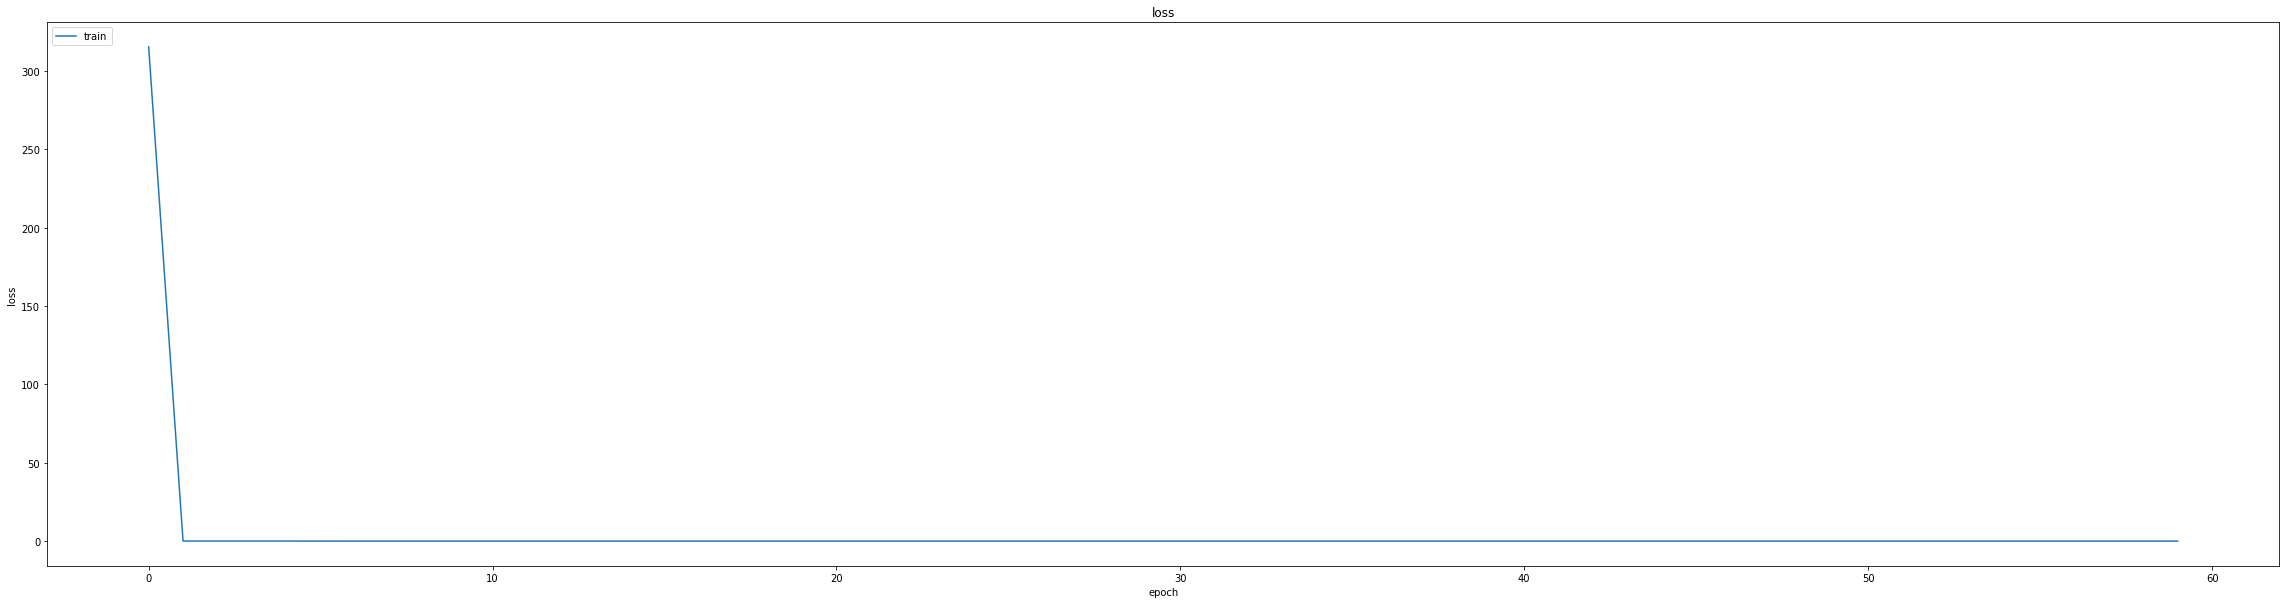

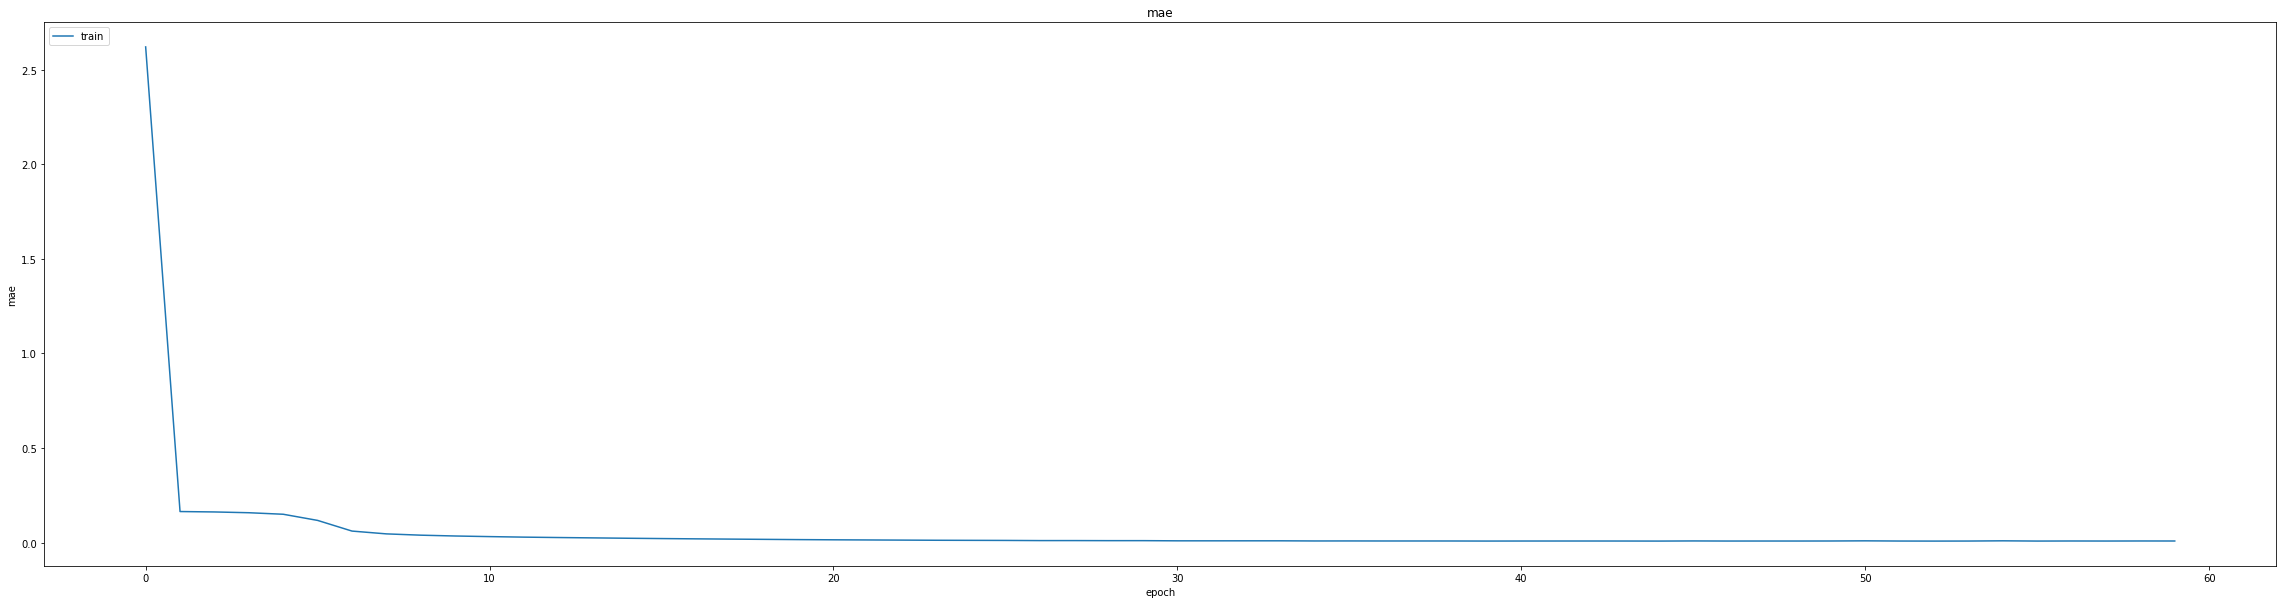

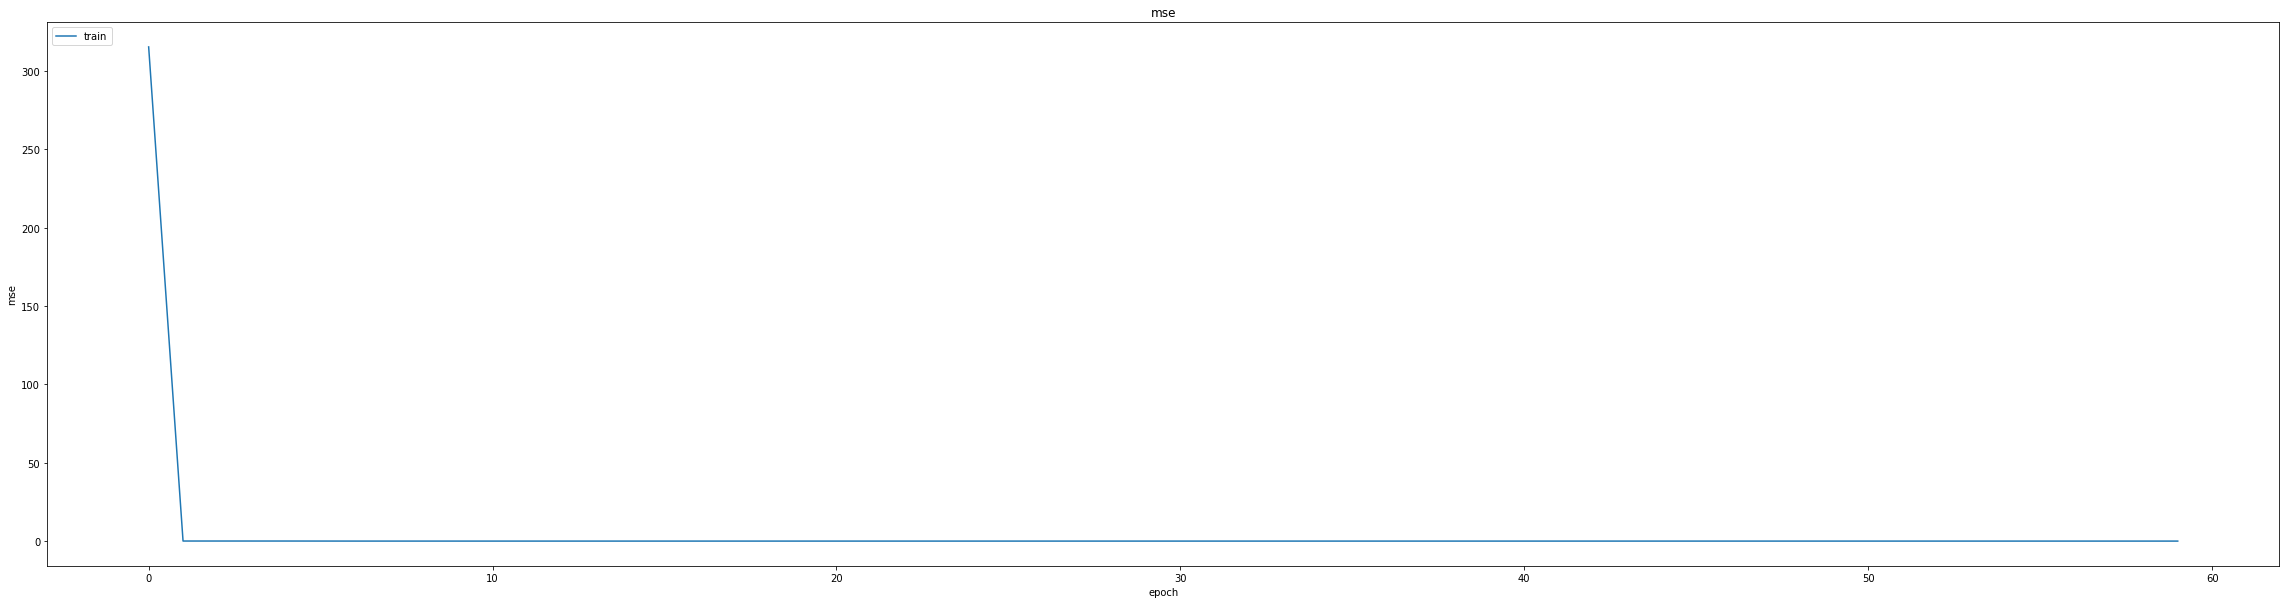

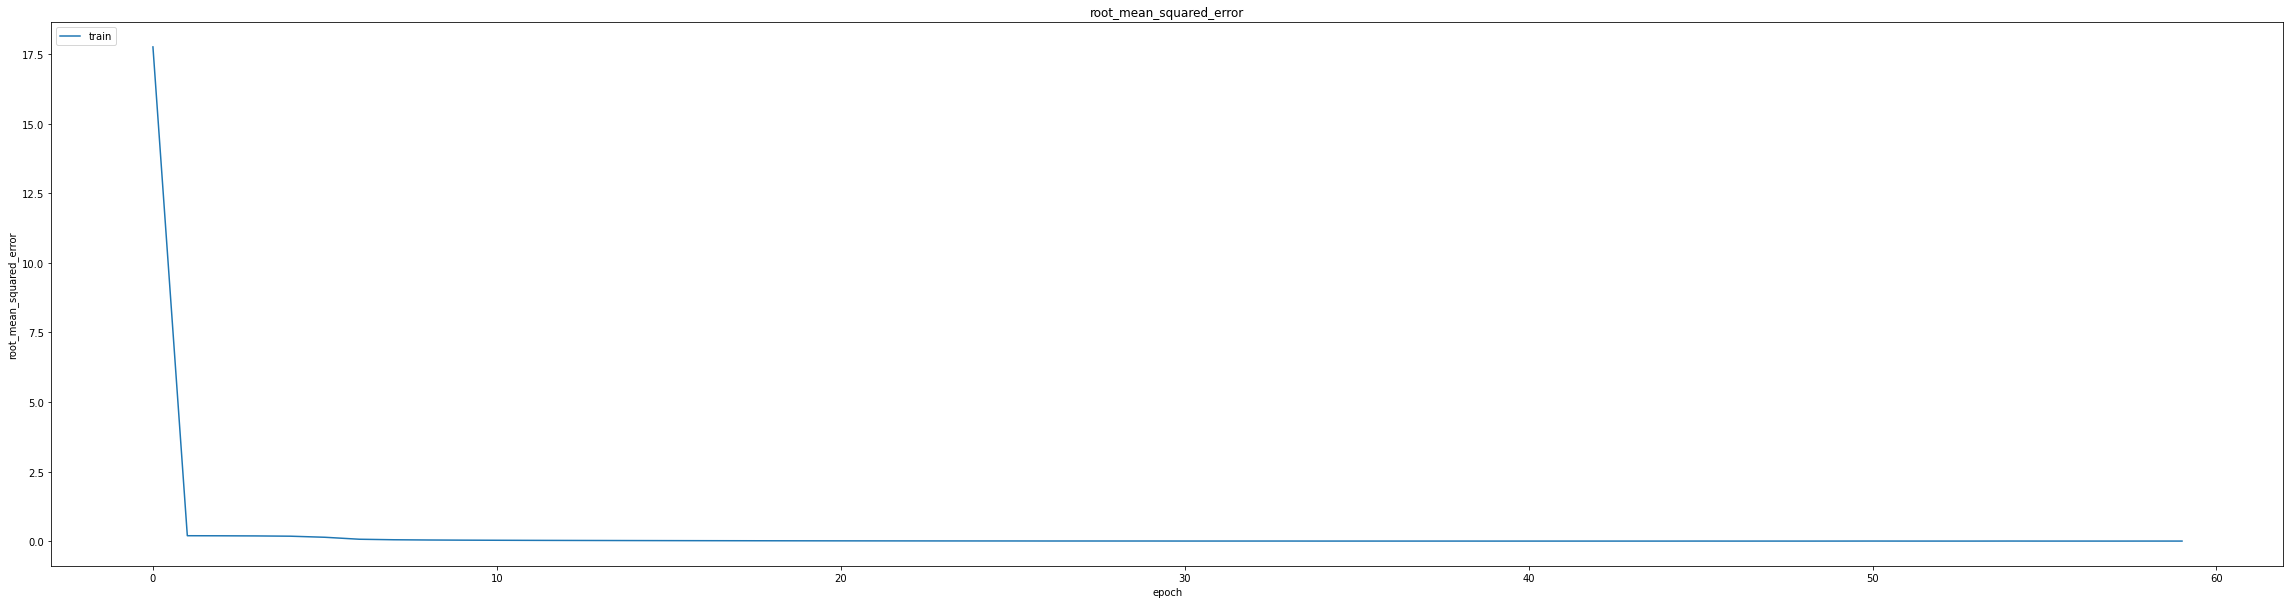

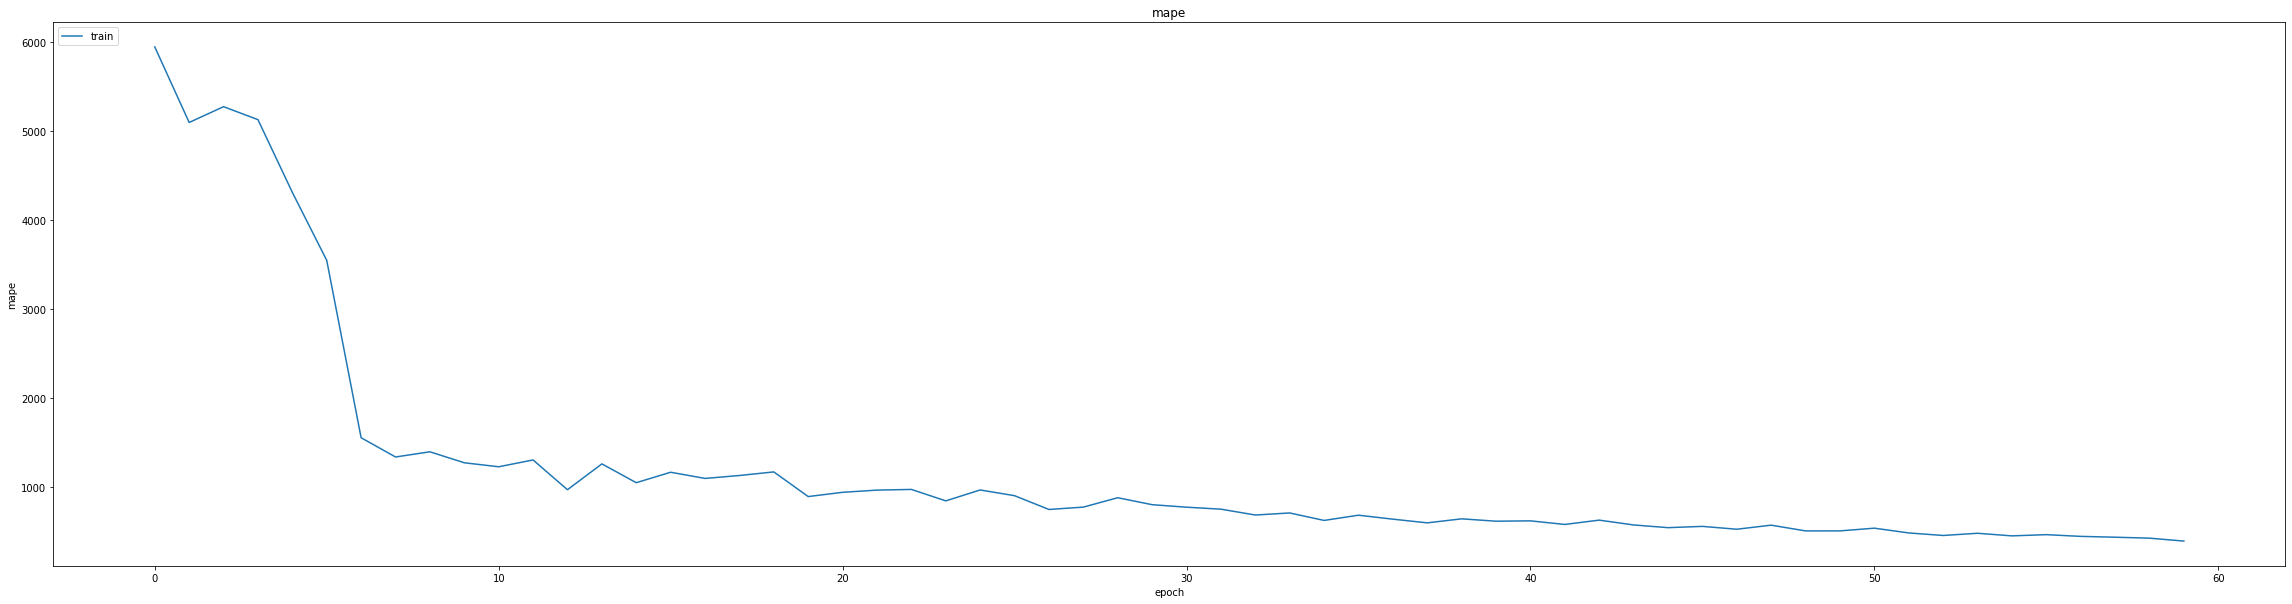

In [44]:
thesis.SummarizeHistory(history)

In [45]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.010018973611295223
0.013734213076531887
1392/1392 [==============================] - 8s 5ms/step
0.957953289802724


In [46]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [47]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0210 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 681.2641


Epoch 1: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 36s 89ms/step - loss: 0.0029 - mae: 0.0210 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 681.2641 - val_loss: 1.8855e-04 - val_mae: 0.0111 - val_mse: 1.8855e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1709.8705 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 6.4908e-05 - mae: 0.0063 - mse: 6.4908e-05 - root_mean_squared_error: 0.0081 - mape: 565.7678
Epoch 2: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 6.4854e-05 - mae: 0.0063 - mse: 6.4854e-05 - root_mean_squared_error: 0.0081 - mape: 562.5380 - val_loss: 1.8680e-04 - val_mae: 0.0111 - val_mse: 1.8680e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1623.1711 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
346/347 [============================>.] - ETA: 0s - loss: 5.4083e-05 - mae: 0.0058 - mse: 5.4083e-05 - root_mean_squared_error: 0.0074 - mape: 546.4209
Epoch 3: val_mse did not improve from 0.00019
347/347 [==============================] - 7s 20ms/step - loss: 5.4082e-05 - mae: 0.0058 - mse: 5.4082e-05 - root_mean_squared_error: 0.0074 - mape: 544.8735 - val_loss: 2.6943e-04 - val_mae: 0.0138 - val_mse: 2.6943e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 1566.3351 - lr: 9.0000e-04
Epoch 4/20
347/347 [==============================] - ETA: 0s - loss: 6.1435e-05 - mae: 0.0061 - mse: 6.1435e-05 - root_mean_squared_error: 0.0078 - mape: 494.51

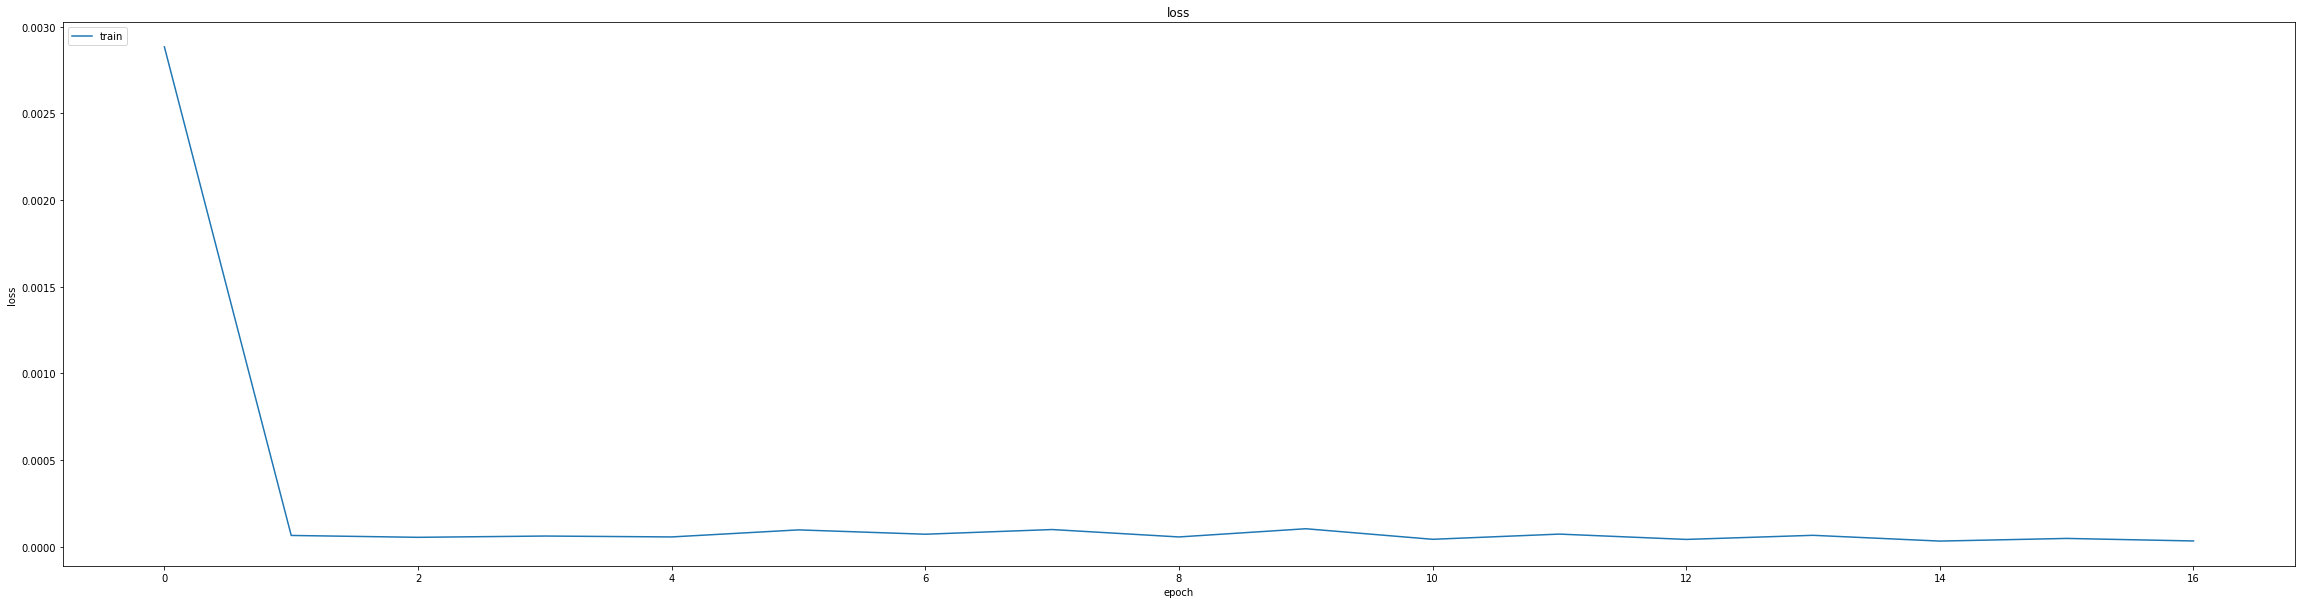

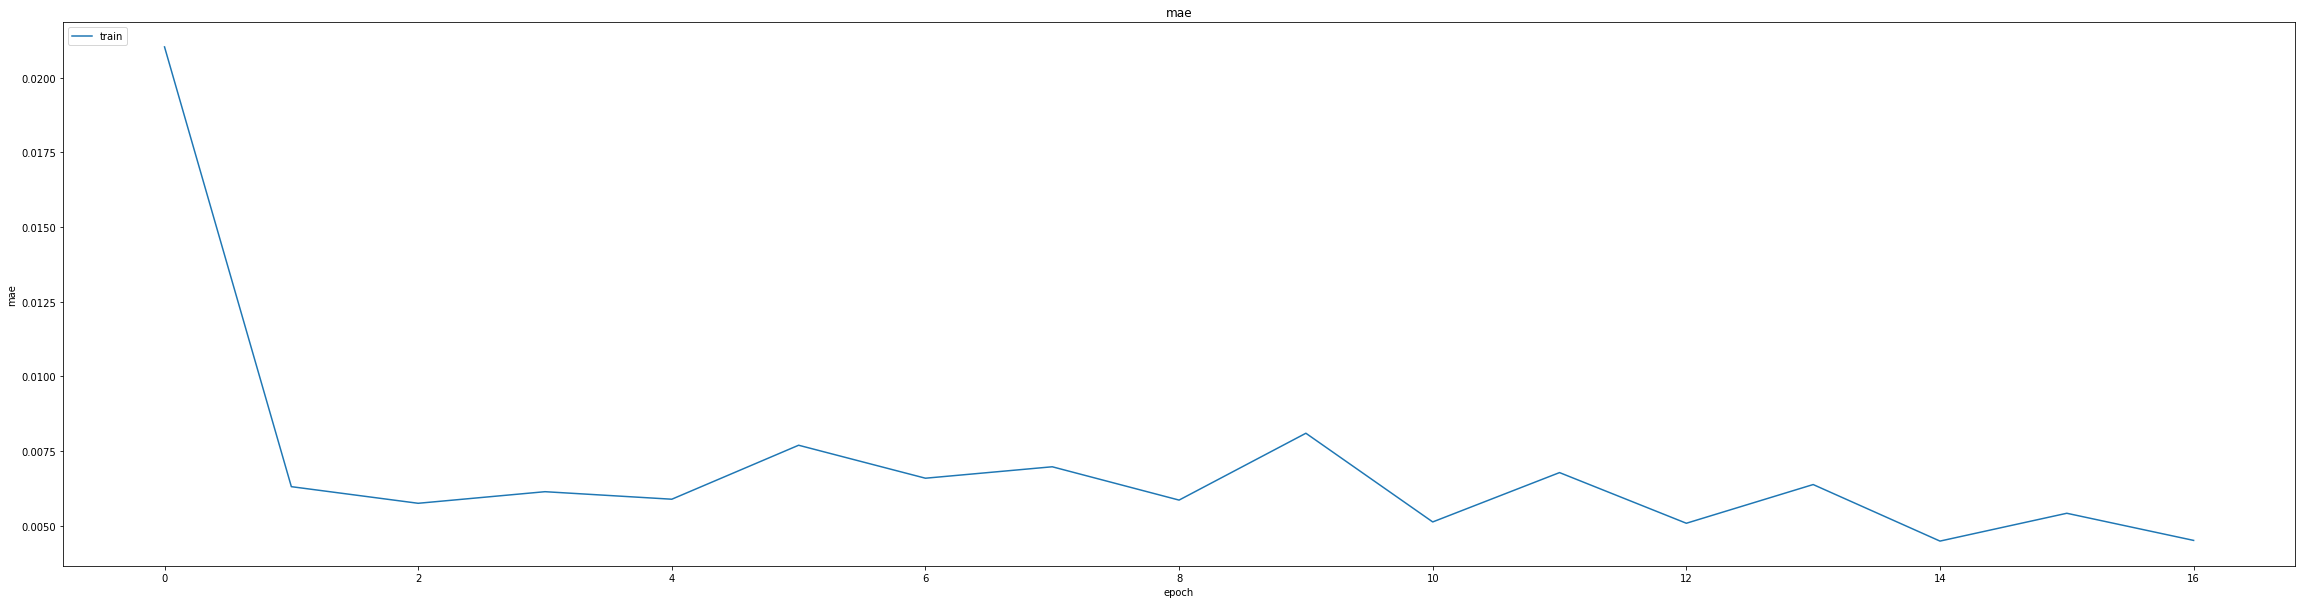

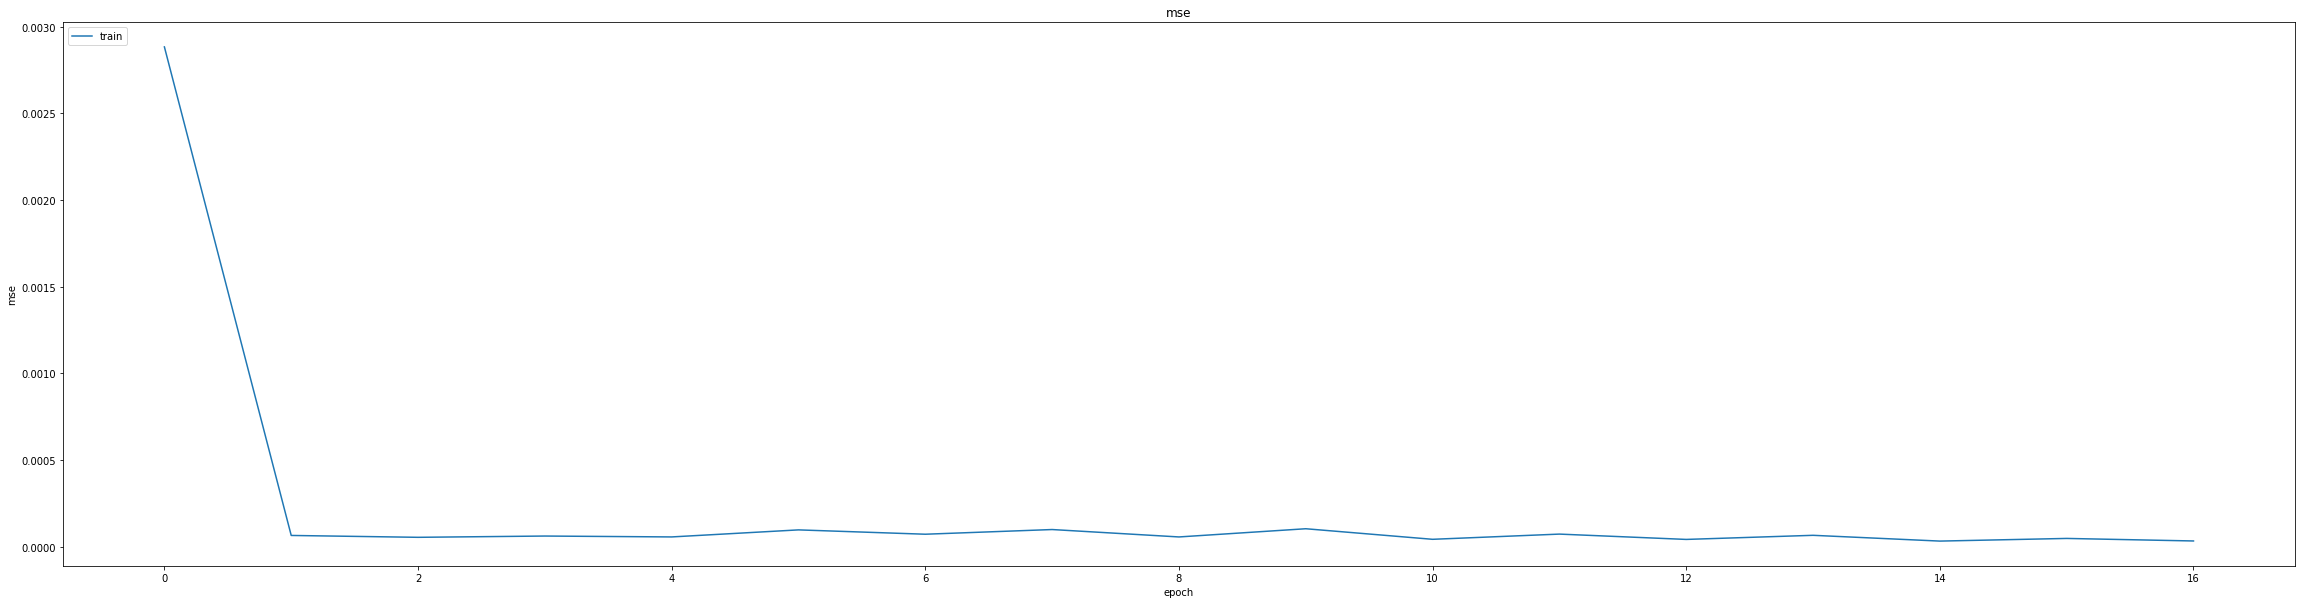

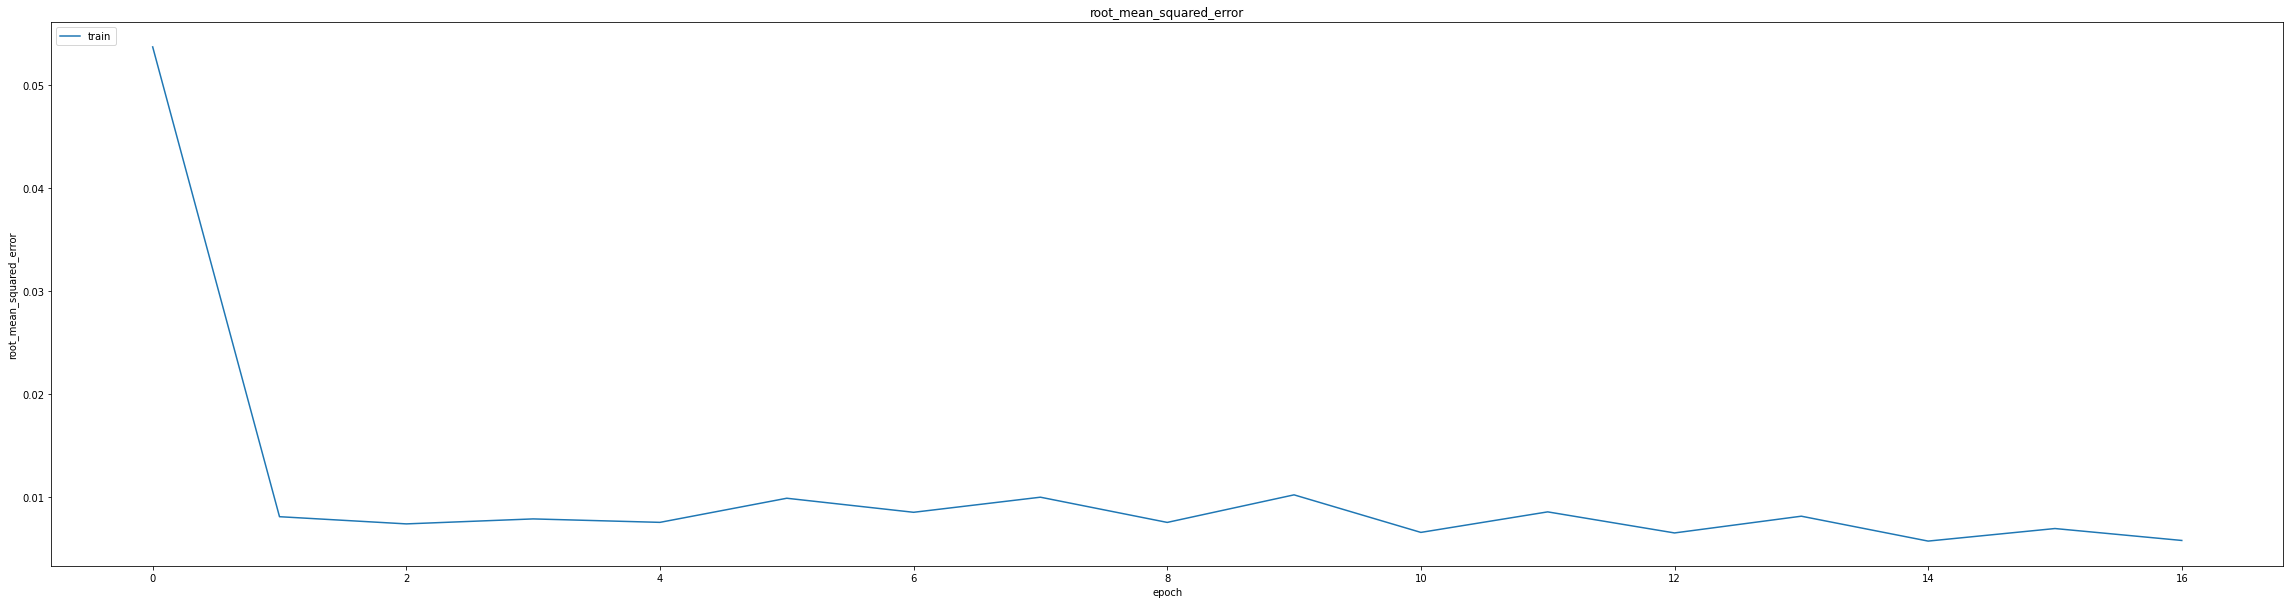

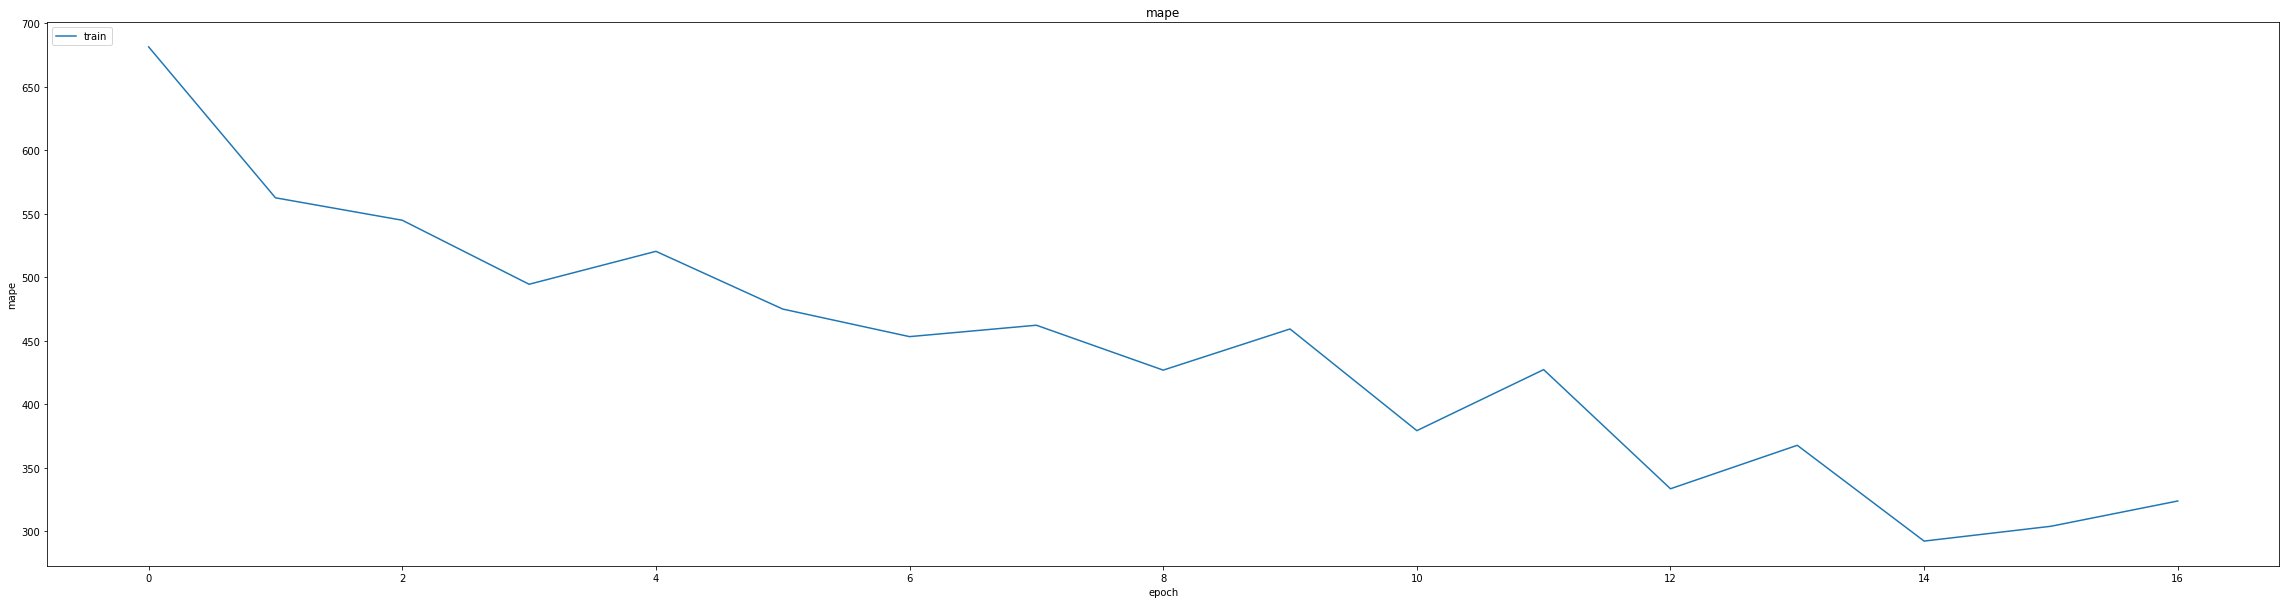

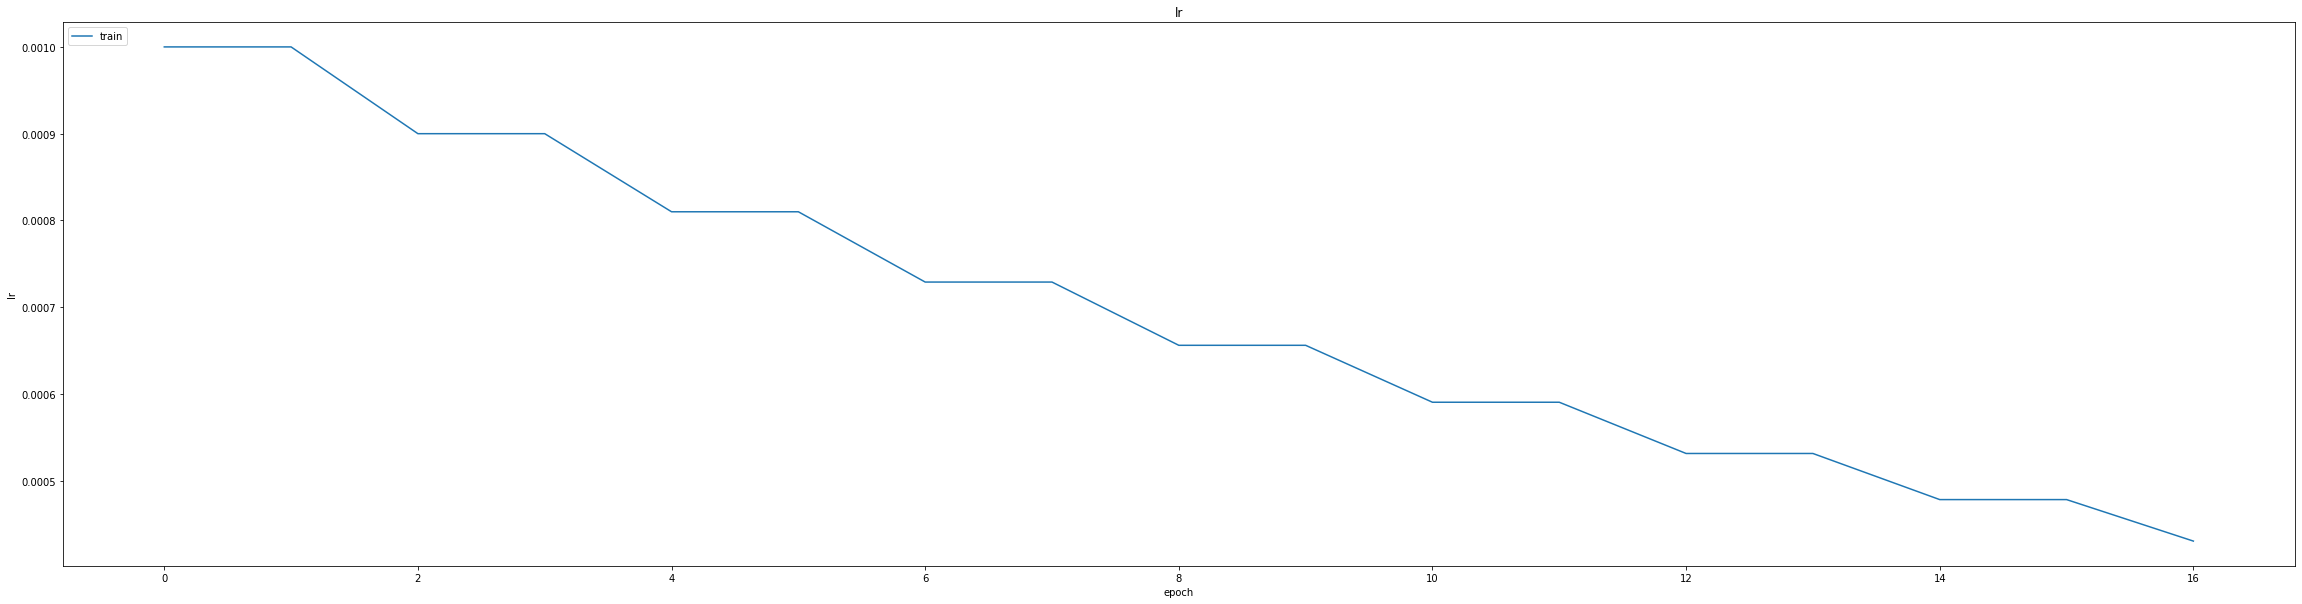

In [48]:
thesis.SummarizeHistory(history)

In [49]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011074184440076351
0.013667590916156769
1392/1392 [==============================] - 8s 5ms/step
0.9791845940971425


1392/1392 [==============================] - 7s 5ms/step


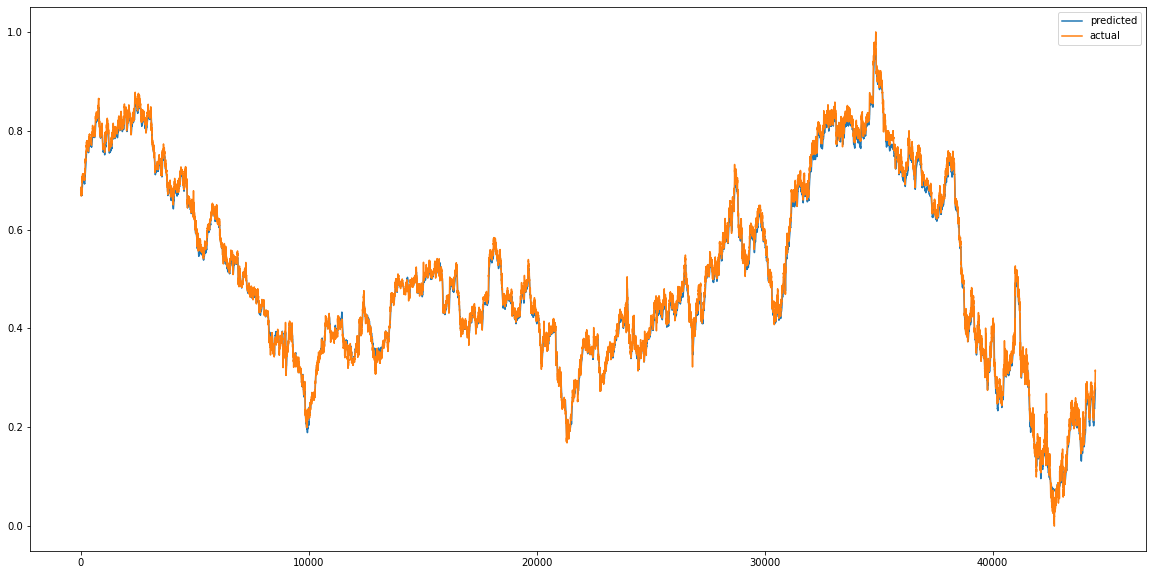

In [50]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


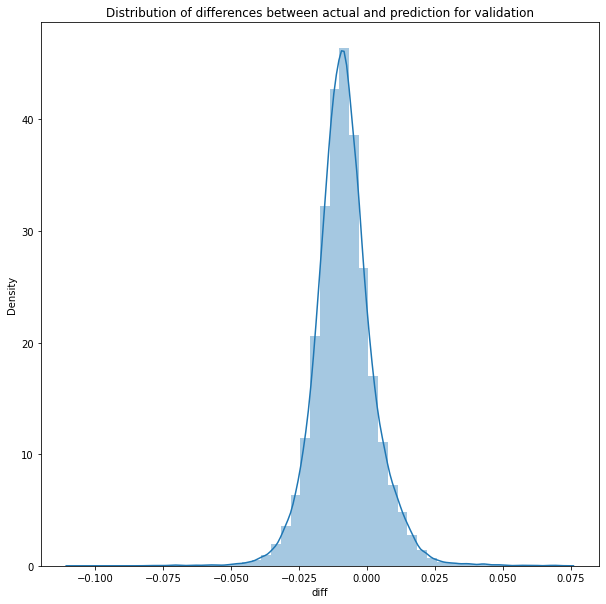

In [51]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 12s 9ms/step


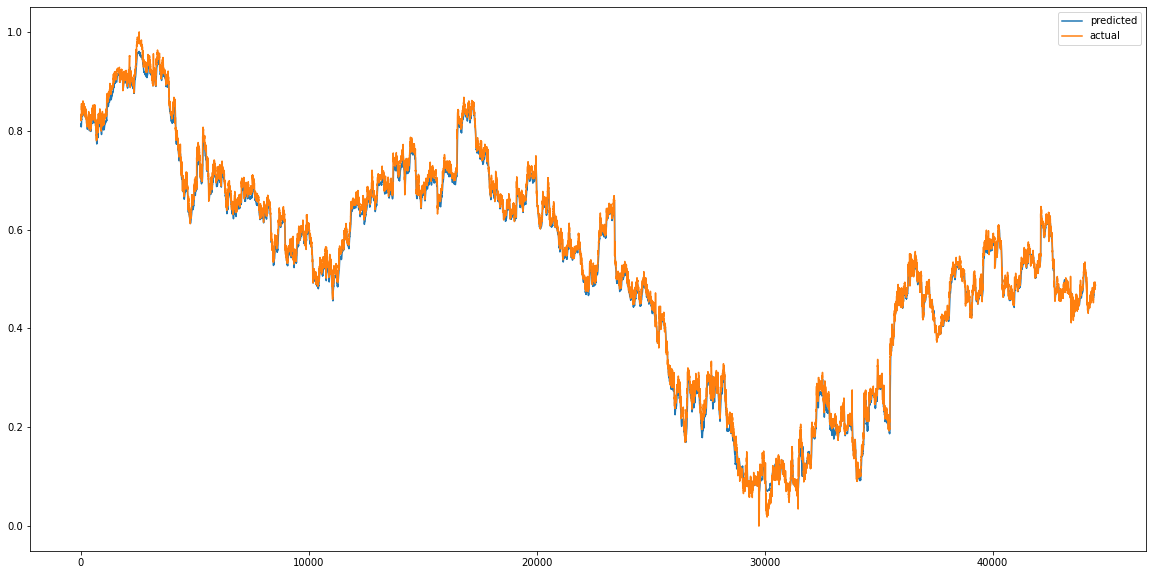

In [52]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


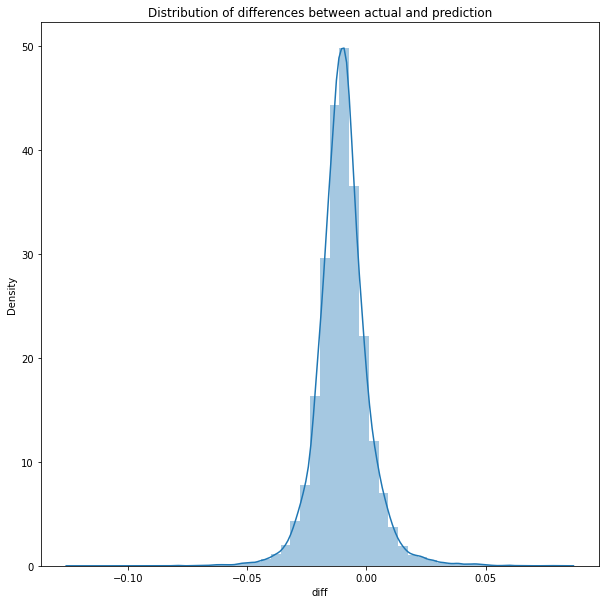

In [53]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00021252088742459996
RMSE :  0.01457809615226213
MAE :  0.01195316590937672
1392/1392 [==============================] - 8s 6ms/step
R2_Score  : 0.9956906735693047


count    44513.000000
mean        -0.009823
std          0.010772
min         -0.121952
25%         -0.015634
50%         -0.010096
75%         -0.004536
max          0.082943
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [55]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [56]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 296.2610 - mae: 2.5418 - mse: 296.2610 - root_mean_squared_error: 17.2122 - mape: 8759.1611
Epoch 1: val_mse improved from inf to 0.06989, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 18s 40ms/step - loss: 295.4205 - mae: 2.5350 - mse: 295.4205 - root_mean_squared_error: 17.1878 - mape: 8734.4248 - val_loss: 0.0699 - val_mae: 0.2250 - val_mse: 0.0699 - val_root_mean_squared_error: 0.2644 - val_mape: 15658.3008
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0328 - mae: 0.1376 - mse: 0.0328 - root_mean_squared_error: 0.1811 - mape: 5229.6304
Epoch 2: val_mse improved from 0.06989 to 0.04967, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0327 - mae: 0.1374 - mse: 0.0327 - root_mean_squared_error: 0.1809 - mape: 5199.8779 - val_loss: 0.0497 - val_mae: 0.1856 - val_mse: 0.0497 - val_root_mean_squared_error: 0.2229 - val_mape: 14200.8008
Epoch 3/60
344/347 [============================>.] - ETA: 0s - loss: 0.0168 - mae: 0.0900 - mse: 0.0168 - root_mean_squared_error: 0.1297 - mape: 4873.9092
Epoch 3: val_mse improved from 0.04967 to 0.01217, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0167 - mae: 0.0898 - mse: 0.0167 - root_mean_squared_error: 0.1294 - mape: 4832.1270 - val_loss: 0.0122 - val_mae: 0.0835 - val_mse: 0.0122 - val_root_mean_squared_error: 0.1103 - val_mape: 10657.8730
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0429 - mse: 0.0043 - root_mean_squared_error: 0.0653 - mape: 3086.4504
Epoch 4: val_mse improved from 0.01217 to 0.00677, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0043 - mae: 0.0429 - mse: 0.0043 - root_mean_squared_error: 0.0653 - mape: 3086.4504 - val_loss: 0.0068 - val_mae: 0.0634 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0823 - val_mape: 8937.9033
Epoch 5/60
344/347 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0353 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 2732.0024
Epoch 5: val_mse improved from 0.00677 to 0.00524, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0028 - mae: 0.0353 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 2708.6042 - val_loss: 0.0052 - val_mae: 0.0594 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0724 - val_mape: 7747.2817
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0314 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2458.3196
Epoch 6: val_mse improved from 0.00524 to 0.00482, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0021 - mae: 0.0314 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2458.3196 - val_loss: 0.0048 - val_mae: 0.0601 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0694 - val_mape: 7163.2231
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0295 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 2393.3279
Epoch 7: val_mse improved from 0.00482 to 0.00435, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 0.0018 - mae: 0.0295 - mse: 0.0018 - root_mean_squared_error: 0.0424 - mape: 2386.5581 - val_loss: 0.0044 - val_mae: 0.0574 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0660 - val_mape: 7094.5806
Epoch 8/60
346/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0283 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 2412.2388
Epoch 8: val_mse improved from 0.00435 to 0.00430, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0016 - mae: 0.0283 - mse: 0.0016 - root_mean_squared_error: 0.0404 - mape: 2405.4146 - val_loss: 0.0043 - val_mae: 0.0578 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0656 - val_mape: 6764.9370
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 2305.1201
Epoch 9: val_mse improved from 0.00430 to 0.00376, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0015 - mae: 0.0273 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 2298.5996 - val_loss: 0.0038 - val_mae: 0.0537 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0613 - val_mape: 6741.3789
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 2228.0361
Epoch 10: val_mse improved from 0.00376 to 0.00370, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 0.0014 - mae: 0.0264 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 2221.7322 - val_loss: 0.0037 - val_mae: 0.0541 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0608 - val_mape: 6518.5220
Epoch 11/60
345/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0256 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2007.3658
Epoch 11: val_mse did not improve from 0.00370
347/347 [==============================] - 6s 17ms/step - loss: 0.0013 - mae: 0.0256 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 1995.9255 - val_loss: 0.0038 - val_mae: 0.0563 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mape: 6293.6450
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0247 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 2198.6213
Epoch 12: val_mse did not improve from 0.00370
347/347 [==============================] - 6s 17ms/step -

347/347 [==============================] - 14s 40ms/step - loss: 0.0011 - mae: 0.0240 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 2039.5502 - val_loss: 0.0033 - val_mae: 0.0529 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0576 - val_mape: 5783.3911
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0233 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1894.4019
Epoch 14: val_mse did not improve from 0.00332
347/347 [==============================] - 6s 17ms/step - loss: 0.0010 - mae: 0.0233 - mse: 0.0010 - root_mean_squared_error: 0.0319 - mape: 1889.0394 - val_loss: 0.0035 - val_mae: 0.0554 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 5599.5894
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 9.5167e-04 - mae: 0.0227 - mse: 9.5167e-04 - root_mean_squared_error: 0.0308 - mape: 1873.2054
Epoch 15: val_mse improved from 0.00332 to 0.00291, saving model to /content/drive/MyDrive/model

347/347 [==============================] - 15s 44ms/step - loss: 9.5208e-04 - mae: 0.0226 - mse: 9.5208e-04 - root_mean_squared_error: 0.0309 - mape: 1862.5396 - val_loss: 0.0029 - val_mae: 0.0499 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0539 - val_mape: 5410.1177
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 8.8842e-04 - mae: 0.0220 - mse: 8.8842e-04 - root_mean_squared_error: 0.0298 - mape: 1772.5287
Epoch 16: val_mse did not improve from 0.00291
347/347 [==============================] - 6s 17ms/step - loss: 8.8842e-04 - mae: 0.0220 - mse: 8.8842e-04 - root_mean_squared_error: 0.0298 - mape: 1772.5287 - val_loss: 0.0034 - val_mae: 0.0555 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mape: 5256.7168
Epoch 17/60
344/347 [============================>.] - ETA: 0s - loss: 8.3251e-04 - mae: 0.0214 - mse: 8.3251e-04 - root_mean_squared_error: 0.0289 - mape: 1837.8573
Epoch 17: val_mse improved from 0.00291 to 0.00283, saving model to /con

347/347 [==============================] - 14s 40ms/step - loss: 8.3156e-04 - mae: 0.0214 - mse: 8.3156e-04 - root_mean_squared_error: 0.0288 - mape: 1822.0803 - val_loss: 0.0028 - val_mae: 0.0498 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mape: 5096.3721
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 7.7968e-04 - mae: 0.0208 - mse: 7.7968e-04 - root_mean_squared_error: 0.0279 - mape: 1877.3295
Epoch 18: val_mse did not improve from 0.00283
347/347 [==============================] - 6s 17ms/step - loss: 7.7949e-04 - mae: 0.0208 - mse: 7.7949e-04 - root_mean_squared_error: 0.0279 - mape: 1872.0146 - val_loss: 0.0028 - val_mae: 0.0504 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0533 - val_mape: 4960.2539
Epoch 19/60
344/347 [============================>.] - ETA: 0s - loss: 7.2584e-04 - mae: 0.0201 - mse: 7.2584e-04 - root_mean_squared_error: 0.0269 - mape: 1704.8628
Epoch 19: val_mse improved from 0.00283 to 0.00276, saving model to /con

347/347 [==============================] - 14s 41ms/step - loss: 7.2610e-04 - mae: 0.0201 - mse: 7.2610e-04 - root_mean_squared_error: 0.0269 - mape: 1690.2383 - val_loss: 0.0028 - val_mae: 0.0498 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 4799.4004
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 6.6923e-04 - mae: 0.0193 - mse: 6.6923e-04 - root_mean_squared_error: 0.0259 - mape: 1694.7587
Epoch 20: val_mse improved from 0.00276 to 0.00265, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 6.6898e-04 - mae: 0.0193 - mse: 6.6898e-04 - root_mean_squared_error: 0.0259 - mape: 1689.9597 - val_loss: 0.0026 - val_mae: 0.0489 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0515 - val_mape: 4671.9868
Epoch 21/60
344/347 [============================>.] - ETA: 0s - loss: 6.2144e-04 - mae: 0.0187 - mse: 6.2144e-04 - root_mean_squared_error: 0.0249 - mape: 1575.9993
Epoch 21: val_mse did not improve from 0.00265
347/347 [==============================] - 6s 17ms/step - loss: 6.2175e-04 - mae: 0.0187 - mse: 6.2175e-04 - root_mean_squared_error: 0.0249 - mape: 1562.4800 - val_loss: 0.0027 - val_mae: 0.0497 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 4521.3413
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 5.6458e-04 - mae: 0.0179 - mse: 5.6458e-04 - root_mean_squared_error: 0.0238 - mape: 1533.9786
Epoch 22: val_mse improved from 0.00265 to 0.00256, saving model to /con

347/347 [==============================] - 14s 41ms/step - loss: 5.6469e-04 - mae: 0.0179 - mse: 5.6469e-04 - root_mean_squared_error: 0.0238 - mape: 1529.6360 - val_loss: 0.0026 - val_mae: 0.0487 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 4386.9937
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 5.0994e-04 - mae: 0.0170 - mse: 5.0994e-04 - root_mean_squared_error: 0.0226 - mape: 1591.5612
Epoch 23: val_mse improved from 0.00256 to 0.00253, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 5.0980e-04 - mae: 0.0170 - mse: 5.0980e-04 - root_mean_squared_error: 0.0226 - mape: 1582.4785 - val_loss: 0.0025 - val_mae: 0.0485 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 4227.4404
Epoch 24/60
344/347 [============================>.] - ETA: 0s - loss: 4.6321e-04 - mae: 0.0163 - mse: 4.6321e-04 - root_mean_squared_error: 0.0215 - mape: 1455.0256
Epoch 24: val_mse did not improve from 0.00253
347/347 [==============================] - 6s 17ms/step - loss: 4.6319e-04 - mae: 0.0163 - mse: 4.6319e-04 - root_mean_squared_error: 0.0215 - mape: 1442.5372 - val_loss: 0.0027 - val_mae: 0.0506 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 4067.8281
Epoch 25/60
344/347 [============================>.] - ETA: 0s - loss: 4.1558e-04 - mae: 0.0155 - mse: 4.1558e-04 - root_mean_squared_error: 0.0204 - mape: 1362.6239
Epoch 25: val_mse improved from 0.00253 to 0.00215, saving model to /con

347/347 [==============================] - 14s 41ms/step - loss: 4.1612e-04 - mae: 0.0155 - mse: 4.1612e-04 - root_mean_squared_error: 0.0204 - mape: 1350.9503 - val_loss: 0.0021 - val_mae: 0.0446 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 3946.9551
Epoch 26/60
344/347 [============================>.] - ETA: 0s - loss: 3.7009e-04 - mae: 0.0146 - mse: 3.7009e-04 - root_mean_squared_error: 0.0192 - mape: 1290.4719
Epoch 26: val_mse did not improve from 0.00215
347/347 [==============================] - 6s 18ms/step - loss: 3.6982e-04 - mae: 0.0146 - mse: 3.6982e-04 - root_mean_squared_error: 0.0192 - mape: 1279.3953 - val_loss: 0.0023 - val_mae: 0.0460 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0476 - val_mape: 3810.0417
Epoch 27/60
345/347 [============================>.] - ETA: 0s - loss: 3.2781e-04 - mae: 0.0138 - mse: 3.2781e-04 - root_mean_squared_error: 0.0181 - mape: 1241.1959
Epoch 27: val_mse did not improve from 0.00215
347/347 [================

347/347 [==============================] - 14s 39ms/step - loss: 2.2378e-04 - mae: 0.0116 - mse: 2.2378e-04 - root_mean_squared_error: 0.0150 - mape: 1118.7220 - val_loss: 0.0021 - val_mae: 0.0448 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 3082.3408
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 1.9438e-04 - mae: 0.0108 - mse: 1.9438e-04 - root_mean_squared_error: 0.0139 - mape: 1107.9370
Epoch 31: val_mse improved from 0.00210 to 0.00200, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 42ms/step - loss: 1.9423e-04 - mae: 0.0108 - mse: 1.9423e-04 - root_mean_squared_error: 0.0139 - mape: 1098.4243 - val_loss: 0.0020 - val_mae: 0.0436 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0448 - val_mape: 2964.2930
Epoch 32/60
344/347 [============================>.] - ETA: 0s - loss: 1.7326e-04 - mae: 0.0102 - mse: 1.7326e-04 - root_mean_squared_error: 0.0132 - mape: 977.2282
Epoch 32: val_mse improved from 0.00200 to 0.00193, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 1.7333e-04 - mae: 0.0102 - mse: 1.7333e-04 - root_mean_squared_error: 0.0132 - mape: 968.8459 - val_loss: 0.0019 - val_mae: 0.0431 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0439 - val_mape: 2758.9617
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 1.4969e-04 - mae: 0.0095 - mse: 1.4969e-04 - root_mean_squared_error: 0.0122 - mape: 904.1558
Epoch 33: val_mse improved from 0.00193 to 0.00189, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 1.4969e-04 - mae: 0.0095 - mse: 1.4969e-04 - root_mean_squared_error: 0.0122 - mape: 904.1558 - val_loss: 0.0019 - val_mae: 0.0427 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 2637.3975
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 1.3400e-04 - mae: 0.0090 - mse: 1.3400e-04 - root_mean_squared_error: 0.0116 - mape: 998.3832 
Epoch 34: val_mse improved from 0.00189 to 0.00180, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 1.3395e-04 - mae: 0.0090 - mse: 1.3395e-04 - root_mean_squared_error: 0.0116 - mape: 995.5548 - val_loss: 0.0018 - val_mae: 0.0414 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 2523.9602
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 1.1970e-04 - mae: 0.0085 - mse: 1.1970e-04 - root_mean_squared_error: 0.0109 - mape: 883.9368
Epoch 35: val_mse improved from 0.00180 to 0.00177, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 1.1970e-04 - mae: 0.0085 - mse: 1.1970e-04 - root_mean_squared_error: 0.0109 - mape: 883.9368 - val_loss: 0.0018 - val_mae: 0.0413 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 2432.7803
Epoch 36/60
345/347 [============================>.] - ETA: 0s - loss: 1.1004e-04 - mae: 0.0081 - mse: 1.1004e-04 - root_mean_squared_error: 0.0105 - mape: 874.5381
Epoch 36: val_mse did not improve from 0.00177
347/347 [==============================] - 6s 18ms/step - loss: 1.1004e-04 - mae: 0.0081 - mse: 1.1004e-04 - root_mean_squared_error: 0.0105 - mape: 869.5471 - val_loss: 0.0019 - val_mae: 0.0423 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0431 - val_mape: 2414.5154
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 1.0312e-04 - mae: 0.0079 - mse: 1.0312e-04 - root_mean_squared_error: 0.0102 - mape: 852.2885
Epoch 37: val_mse did not improve from 0.00177
347/347 [====================

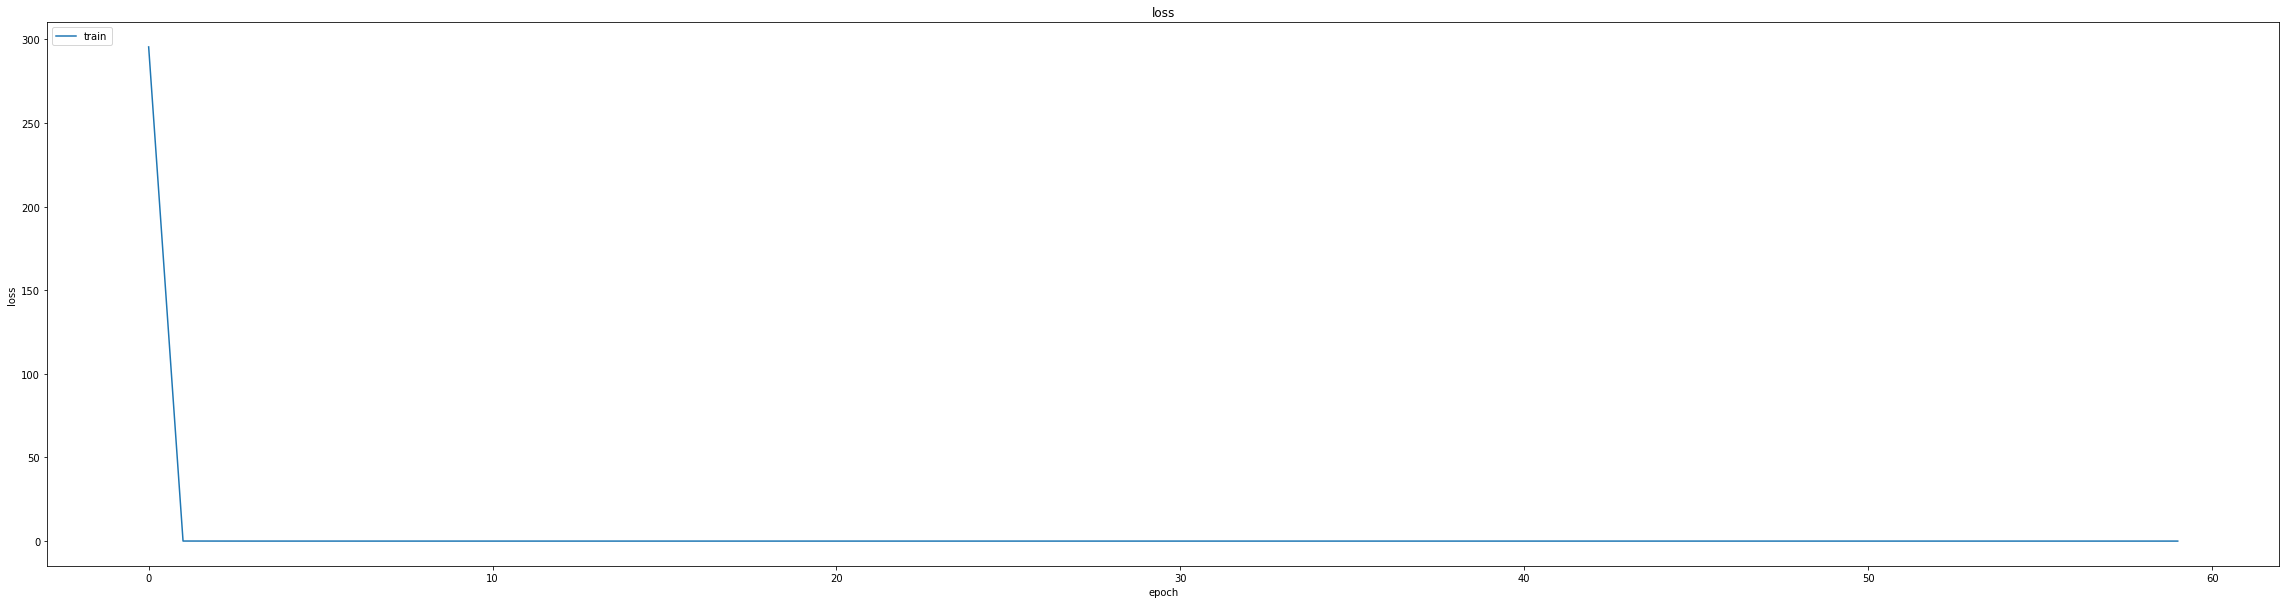

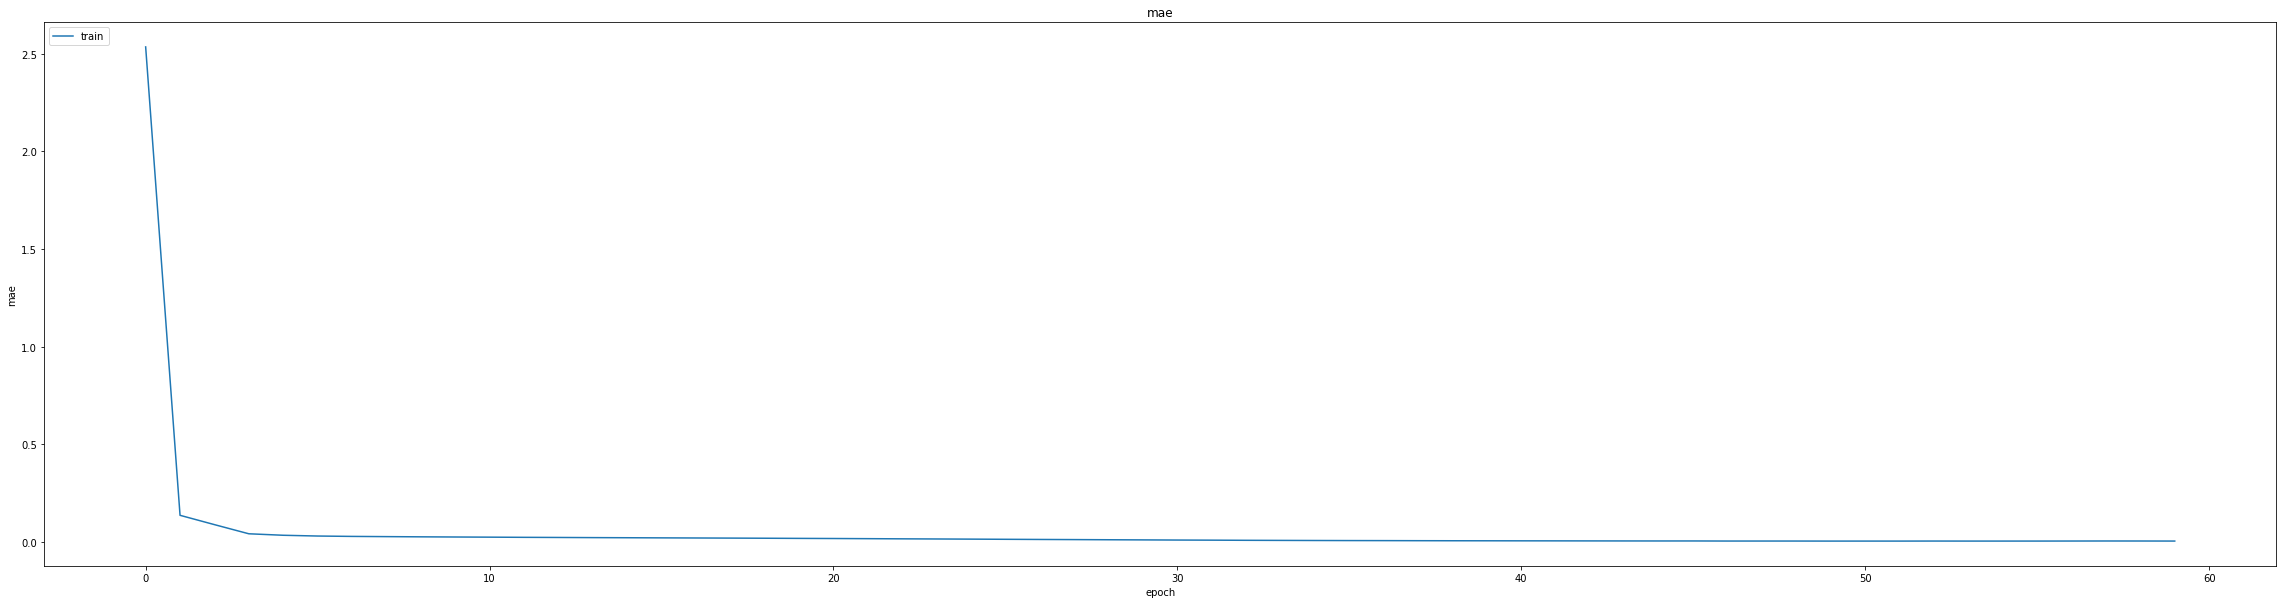

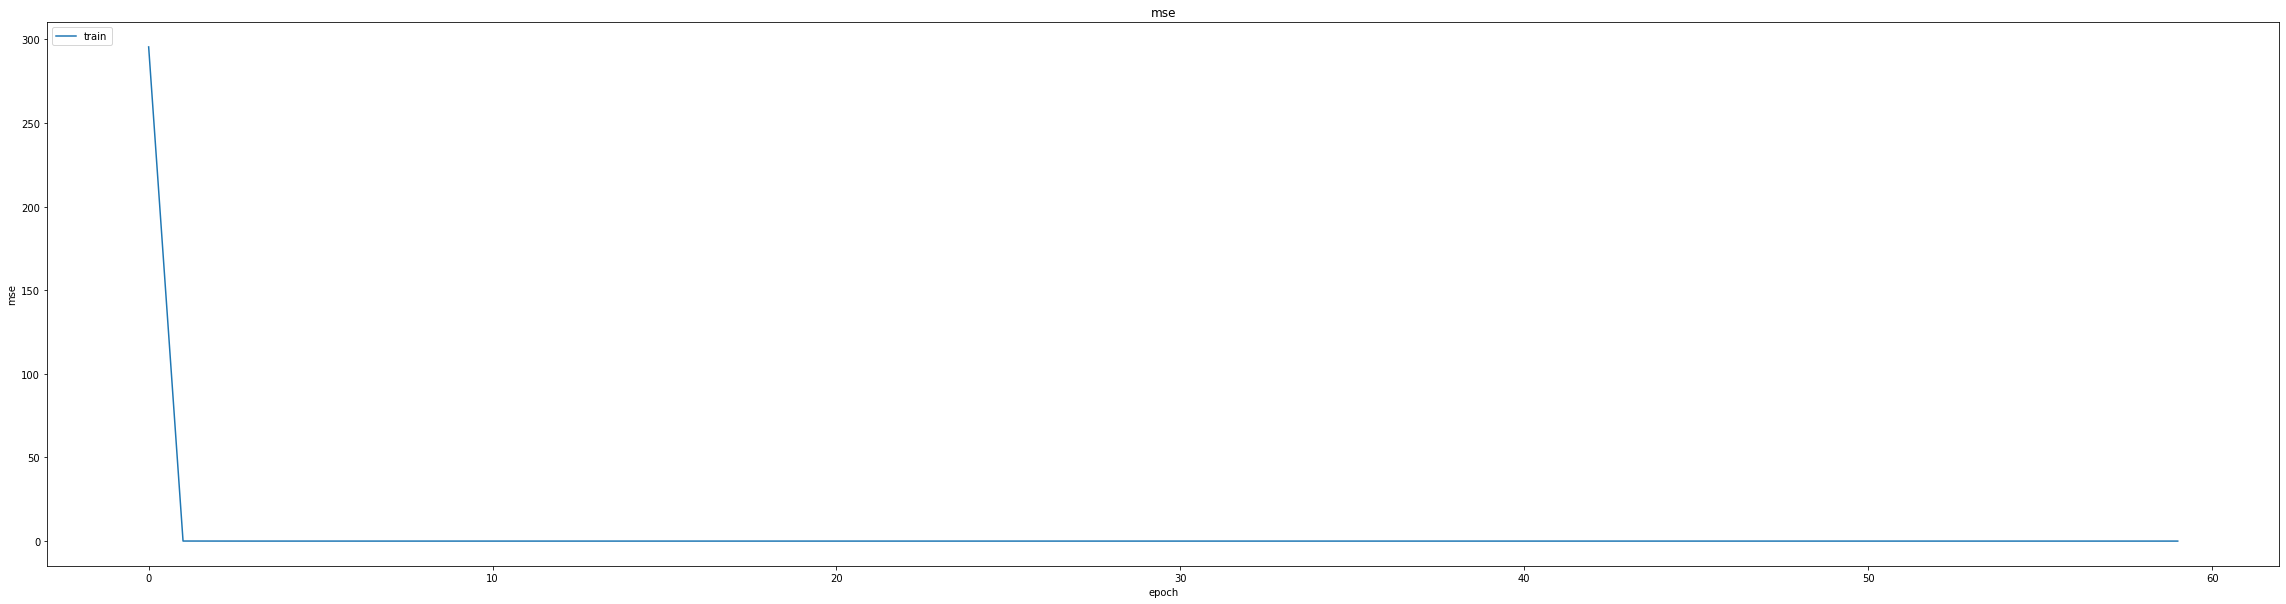

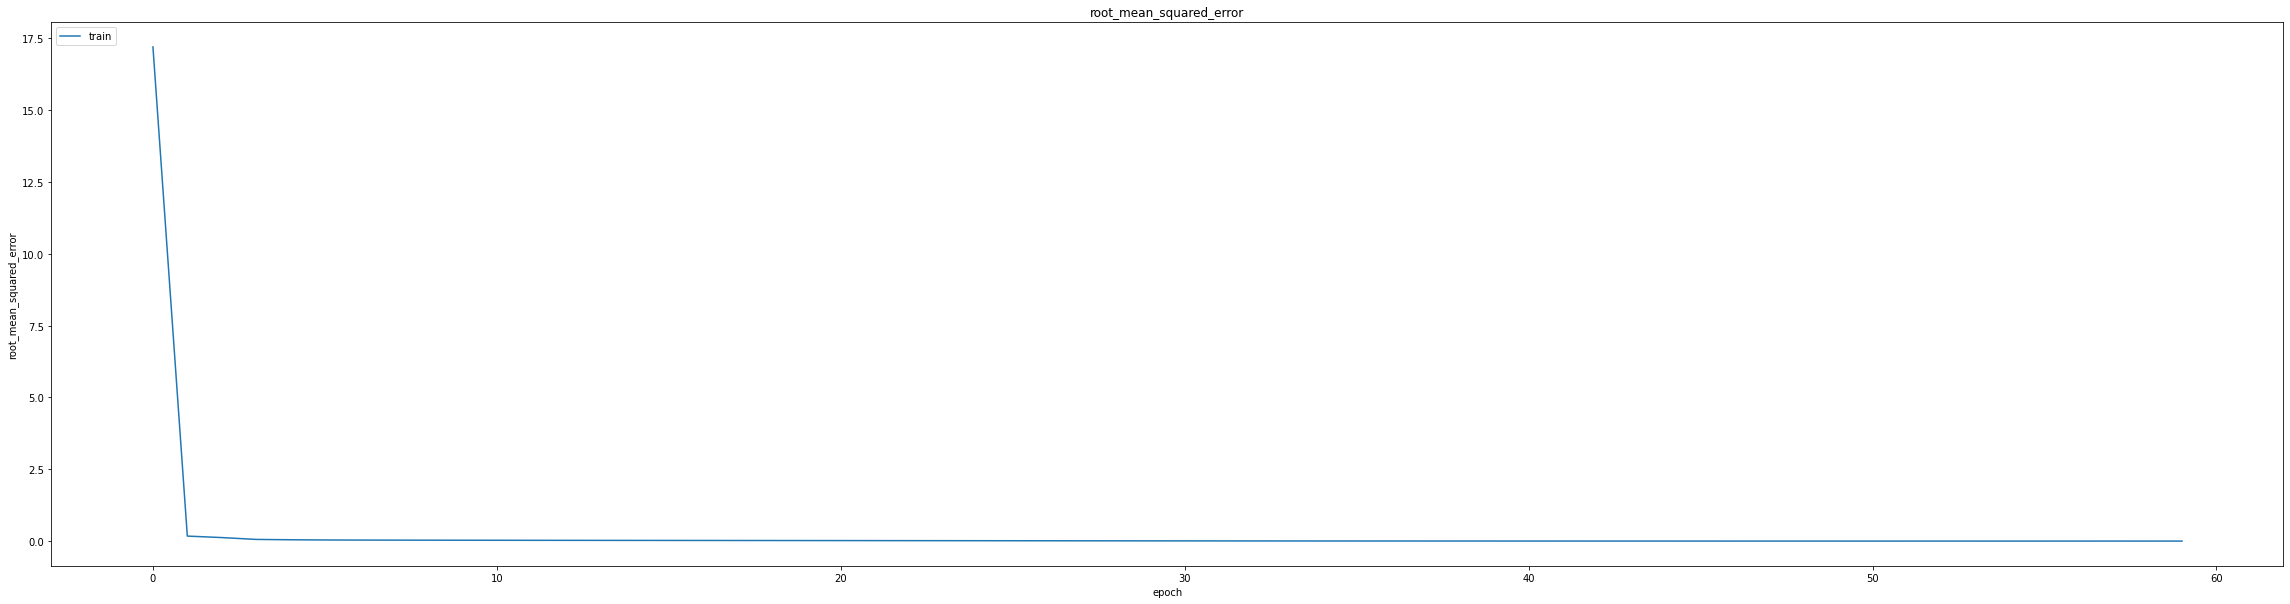

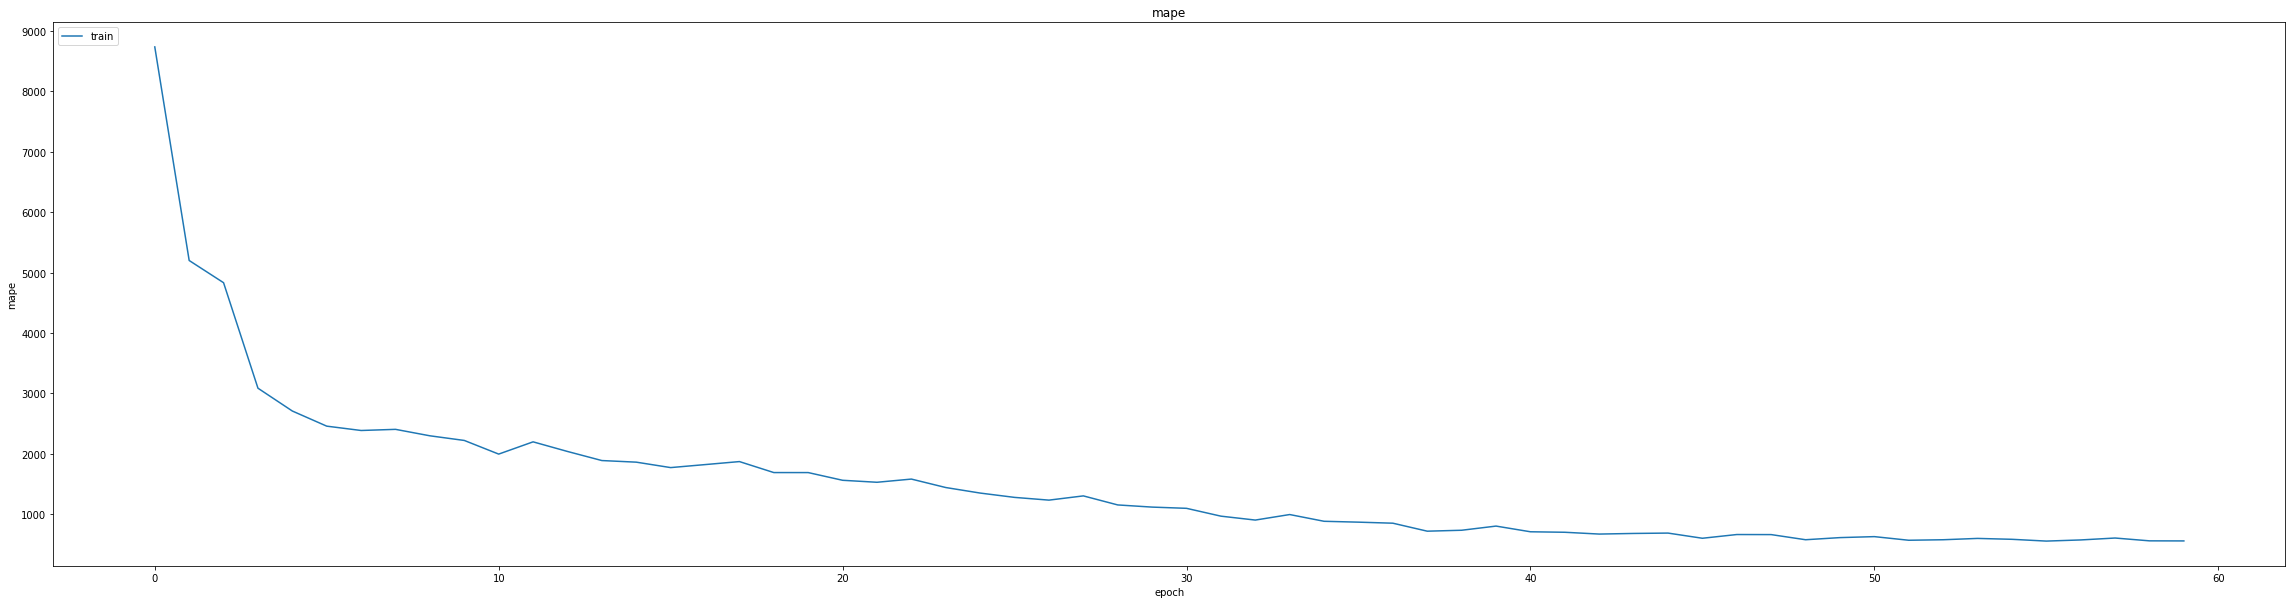

In [57]:
thesis.SummarizeHistory(history)

In [58]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.041287537664175034
0.04210330918431282
1392/1392 [==============================] - 5s 3ms/step
0.9037389006126229


In [59]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [60]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 6.4647e-04 - mae: 0.0131 - mse: 6.4647e-04 - root_mean_squared_error: 0.0254 - mape: 826.7123
Epoch 1: val_mse did not improve from 0.00177
347/347 [==============================] - 9s 19ms/step - loss: 6.4647e-04 - mae: 0.0131 - mse: 6.4647e-04 - root_mean_squared_error: 0.0254 - mape: 826.7123 - val_loss: 0.0021 - val_mae: 0.0446 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 2149.9111 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 7.8745e-05 - mae: 0.0069 - mse: 7.8745e-05 - root_mean_squared_error: 0.0089 - mape: 713.9082
Epoch 2: val_mse did not improve from 0.00177
347/347 [==============================] - 6s 16ms/step - loss: 7.8610e-05 - mae: 0.0069 - mse: 7.8610e-05 - root_mean_squared_error: 0.0089 - mape: 707.7802 - val_loss: 0.0018 - val_mae: 0.0420 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0430 - val_mape: 1970.9226 - lr: 0.0010
lr chang

347/347 [==============================] - 15s 44ms/step - loss: 5.8956e-05 - mae: 0.0059 - mse: 5.8956e-05 - root_mean_squared_error: 0.0077 - mape: 626.0081 - val_loss: 0.0016 - val_mae: 0.0394 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 1801.0934 - lr: 8.1000e-04
Epoch 6/20
345/347 [============================>.] - ETA: 0s - loss: 5.2412e-05 - mae: 0.0057 - mse: 5.2412e-05 - root_mean_squared_error: 0.0072 - mape: 631.4179
Epoch 6: val_mse improved from 0.00164 to 0.00146, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 5.2515e-05 - mae: 0.0057 - mse: 5.2515e-05 - root_mean_squared_error: 0.0072 - mape: 627.8154 - val_loss: 0.0015 - val_mae: 0.0373 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 1760.3898 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
345/347 [============================>.] - ETA: 0s - loss: 3.9073e-05 - mae: 0.0049 - mse: 3.9073e-05 - root_mean_squared_error: 0.0063 - mape: 588.1614
Epoch 7: val_mse did not improve from 0.00146
347/347 [==============================] - 6s 17ms/step - loss: 3.8978e-05 - mae: 0.0049 - mse: 3.8978e-05 - root_mean_squared_error: 0.0062 - mape: 584.8019 - val_loss: 0.0019 - val_mae: 0.0424 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 1693.1451 - lr: 7.2900e-04
Epoch 8/20
344/347 [============================>.] - ETA: 0s - loss: 4.8985e-05 - mae: 0.0055 - mse: 4.8985e-05 - root_mean_squared_error: 0.0070 - mape: 565.8597
Epoch 8: 

347/347 [==============================] - 14s 40ms/step - loss: 3.1709e-05 - mae: 0.0044 - mse: 3.1709e-05 - root_mean_squared_error: 0.0056 - mape: 527.7017 - val_loss: 0.0013 - val_mae: 0.0349 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 1599.4948 - lr: 6.5610e-04
Epoch 10/20
347/347 [==============================] - ETA: 0s - loss: 3.9522e-05 - mae: 0.0049 - mse: 3.9522e-05 - root_mean_squared_error: 0.0063 - mape: 545.1230
Epoch 10: val_mse improved from 0.00129 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 3.9522e-05 - mae: 0.0049 - mse: 3.9522e-05 - root_mean_squared_error: 0.0063 - mape: 545.1230 - val_loss: 0.0012 - val_mae: 0.0337 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 1546.8639 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/347 [==============================] - ETA: 0s - loss: 2.8679e-05 - mae: 0.0041 - mse: 2.8679e-05 - root_mean_squared_error: 0.0054 - mape: 542.5403
Epoch 11: val_mse did not improve from 0.00119
347/347 [==============================] - 6s 17ms/step - loss: 2.8679e-05 - mae: 0.0041 - mse: 2.8679e-05 - root_mean_squared_error: 0.0054 - mape: 542.5403 - val_loss: 0.0019 - val_mae: 0.0427 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0439 - val_mape: 1468.8625 - lr: 5.9049e-04
Epoch 12/20
347/347 [==============================] - ETA: 0s - loss: 3.6755e-05 - mae: 0.0048 - mse: 3.6755e-05 - root_mean_squared_error: 0.0061 - mape: 488.1458
Epoch 

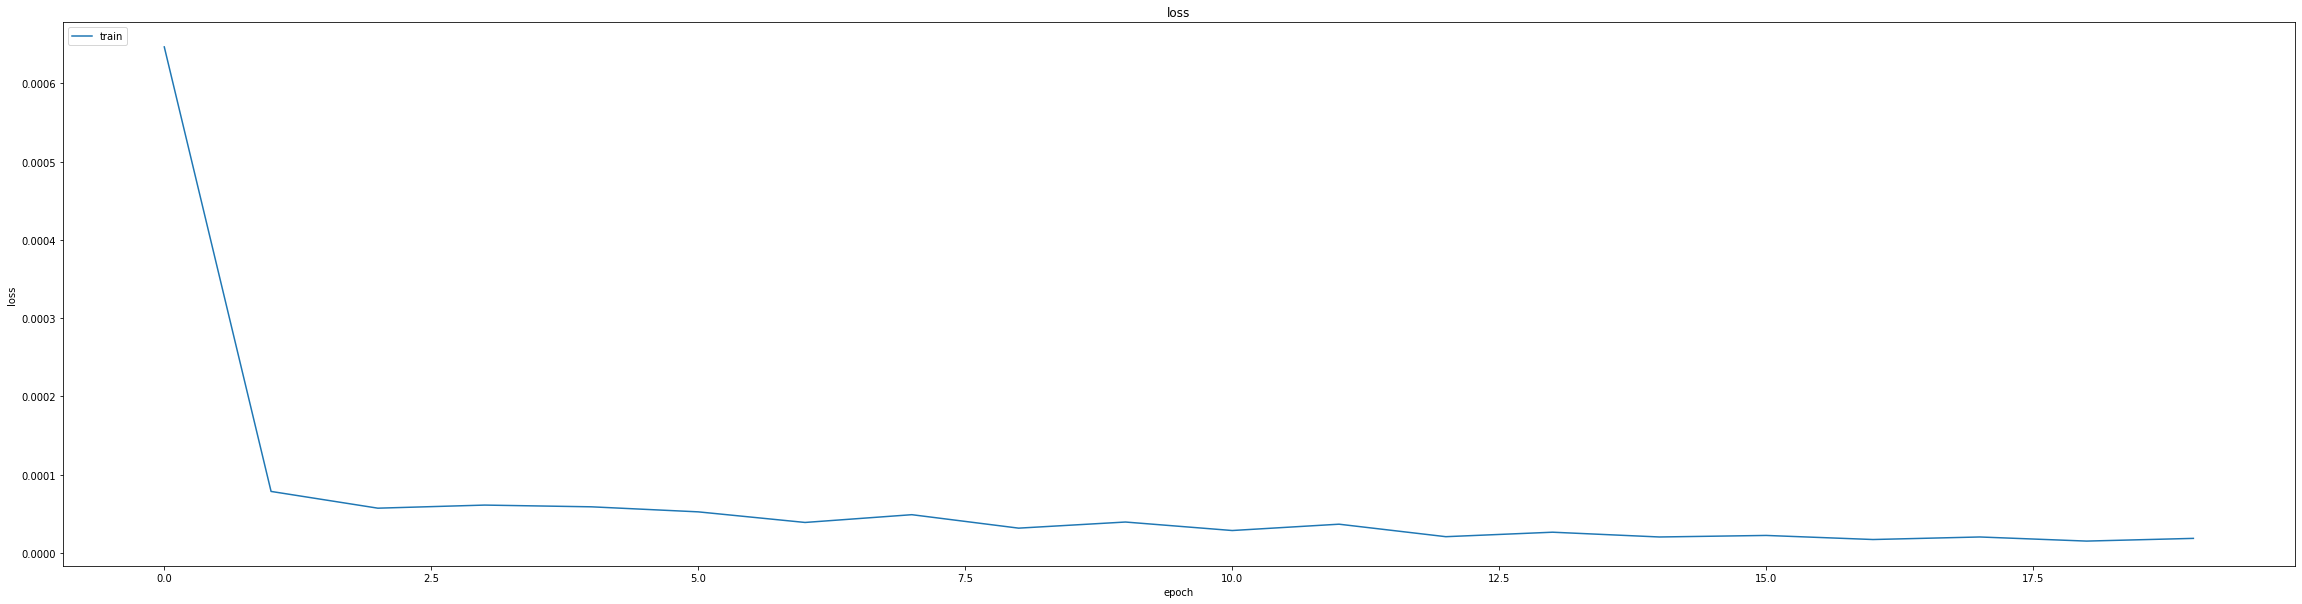

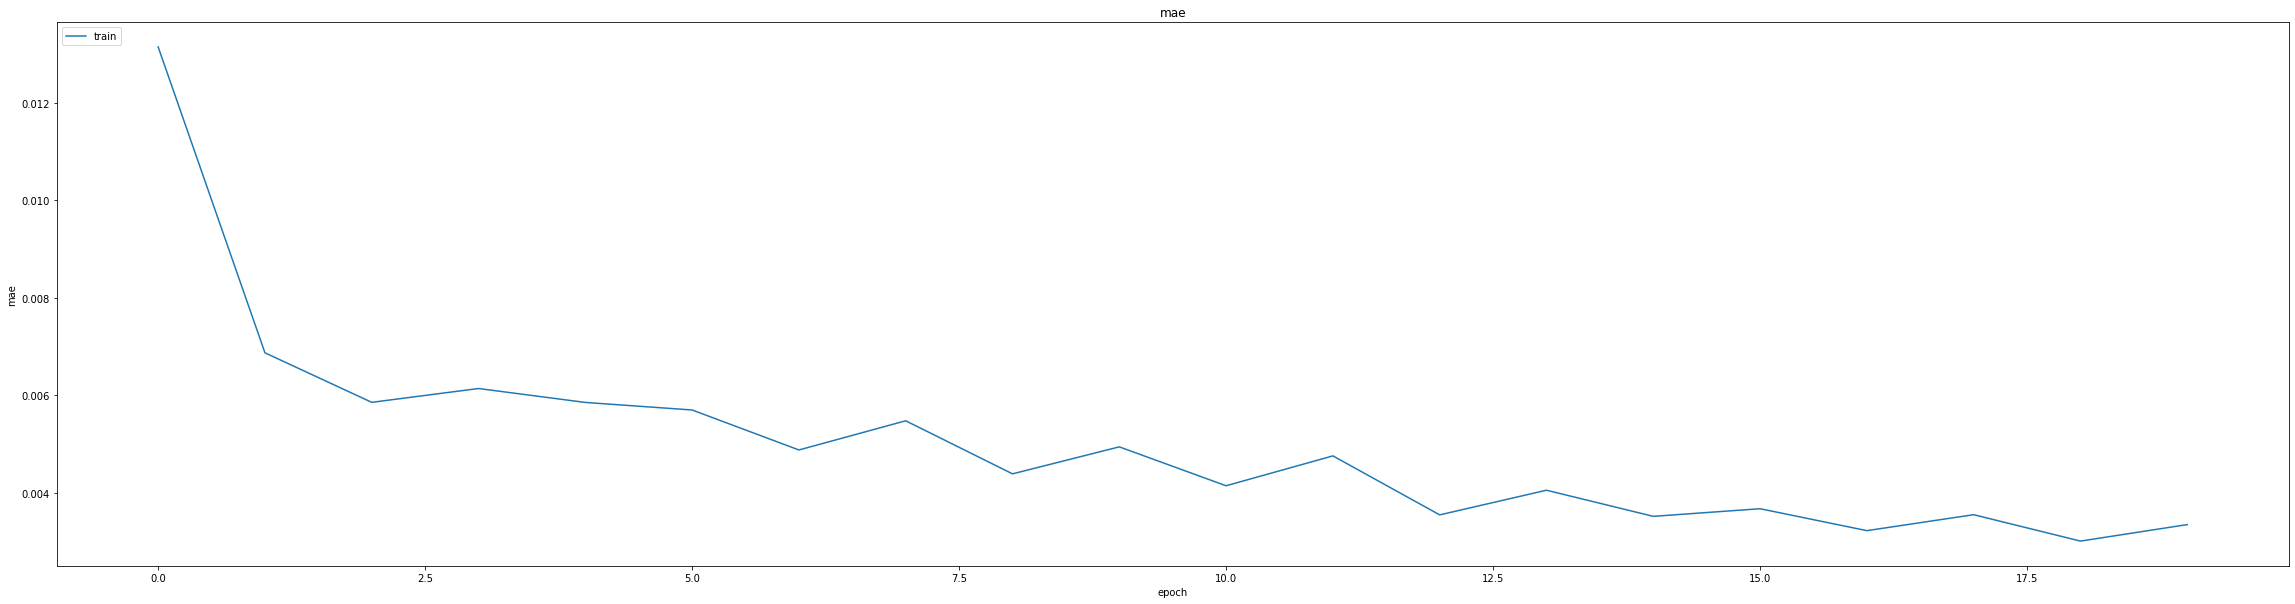

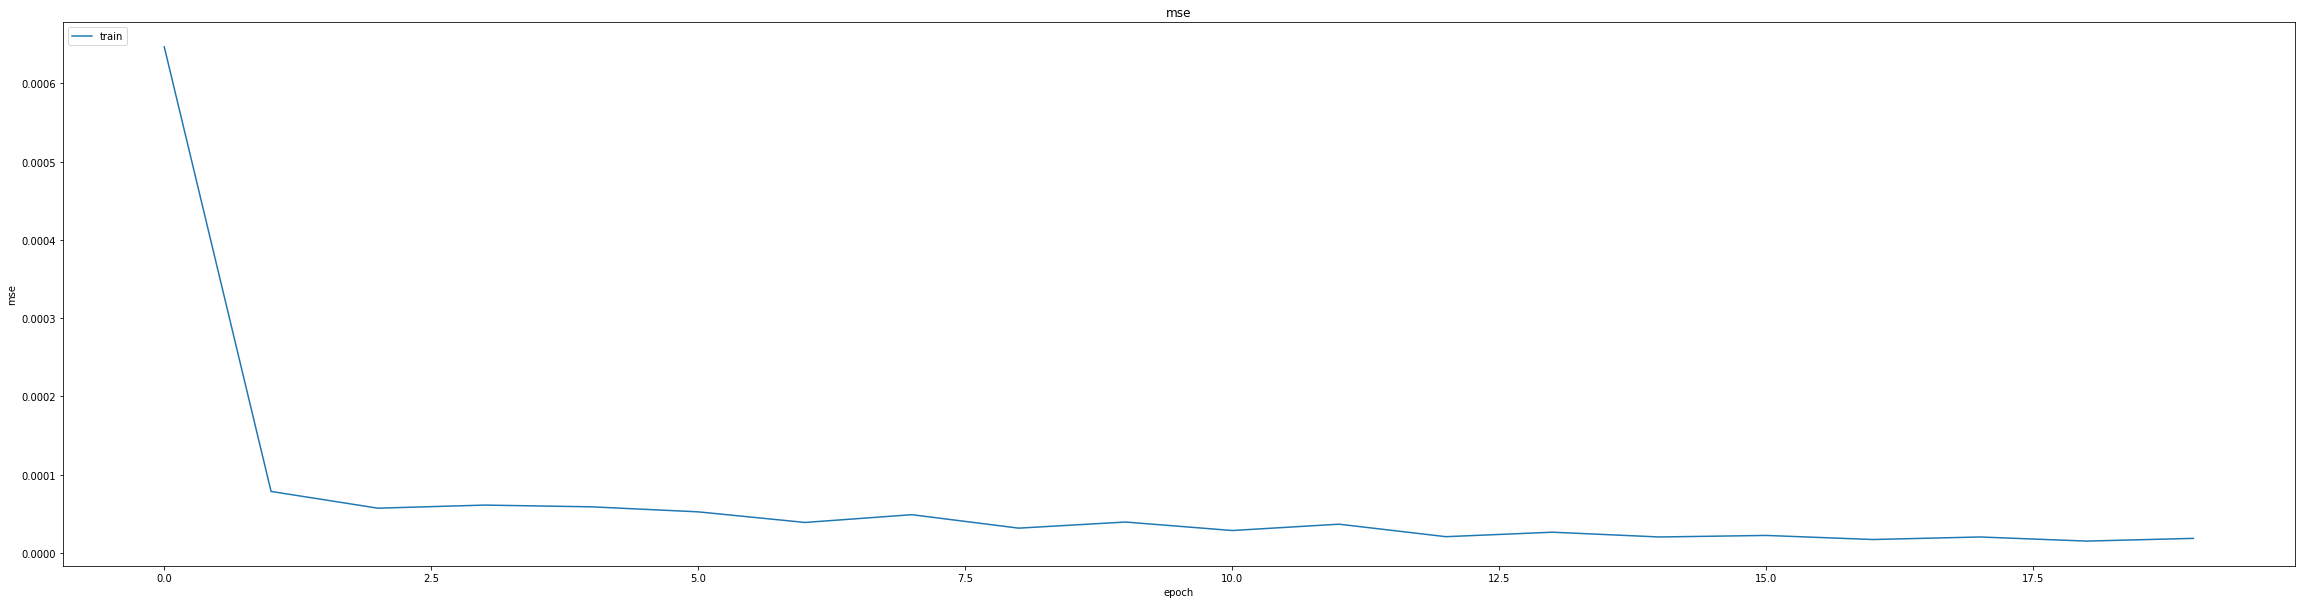

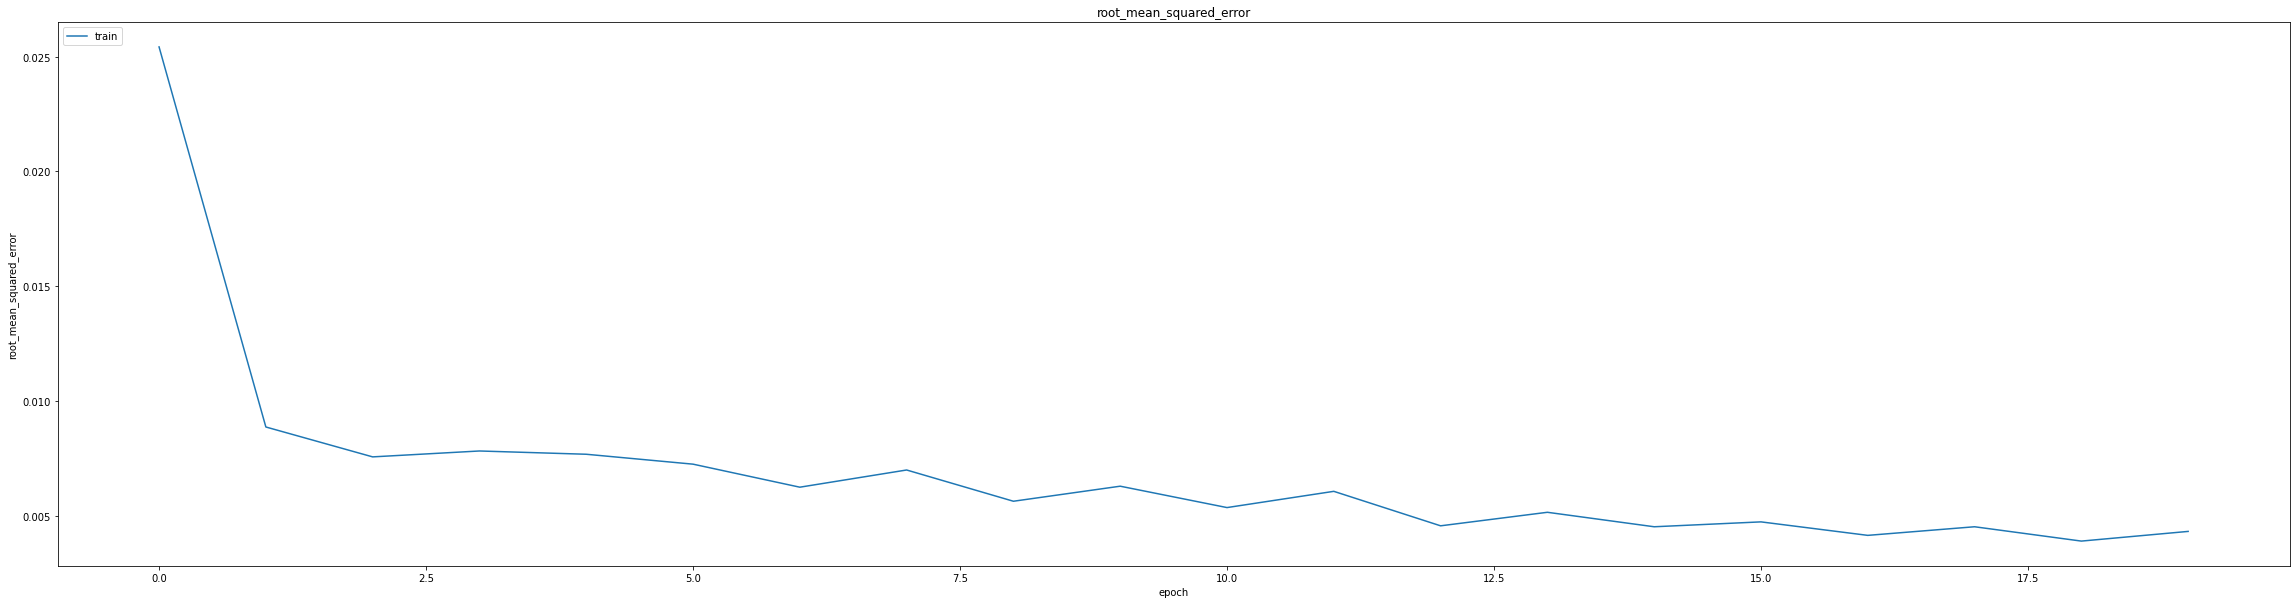

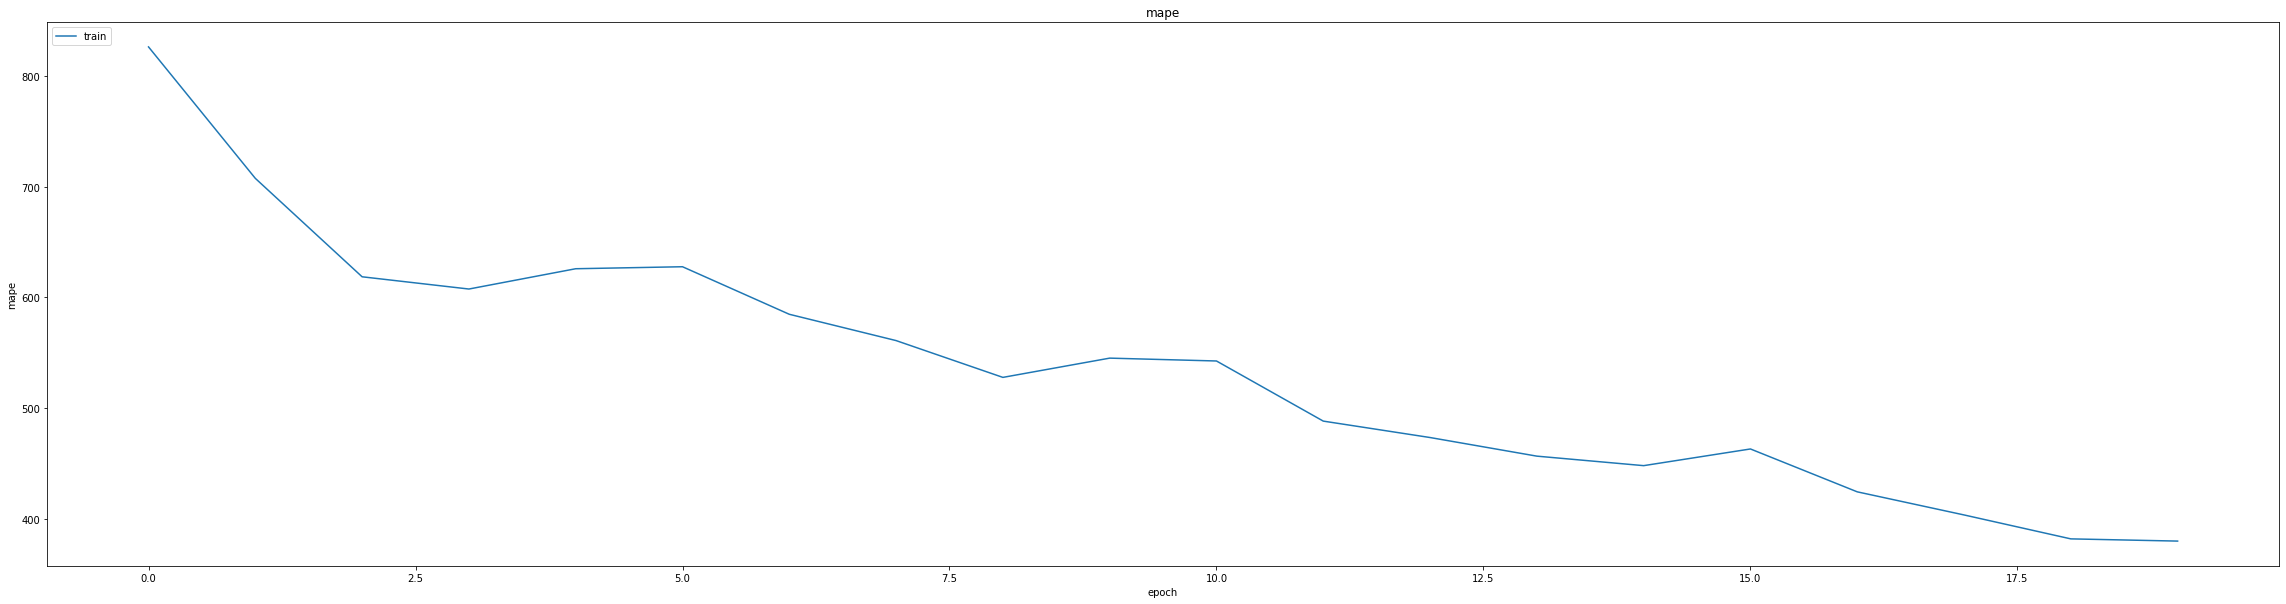

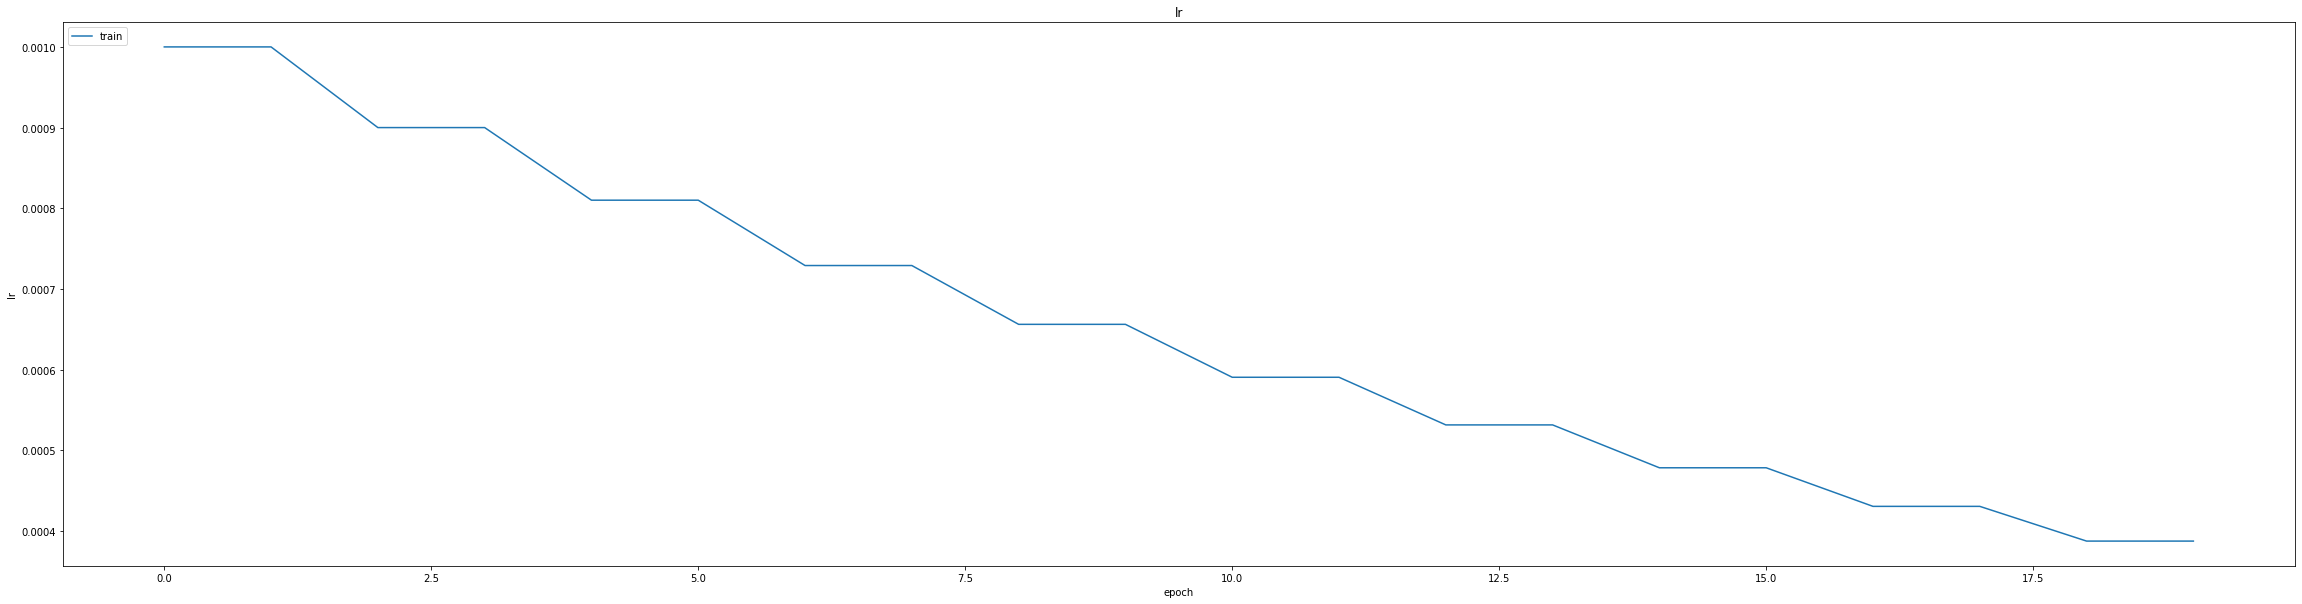

In [61]:
thesis.SummarizeHistory(history)

In [62]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.033690113574266434
0.034531477838754654
1392/1392 [==============================] - 5s 3ms/step
0.9471274081088314


1392/1392 [==============================] - 5s 3ms/step


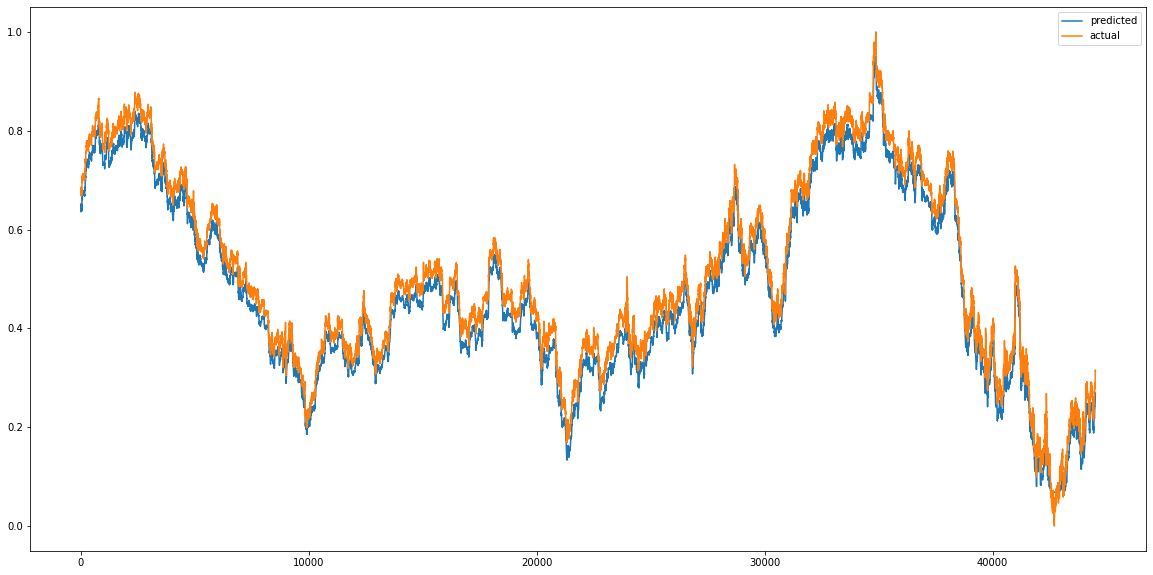

In [63]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


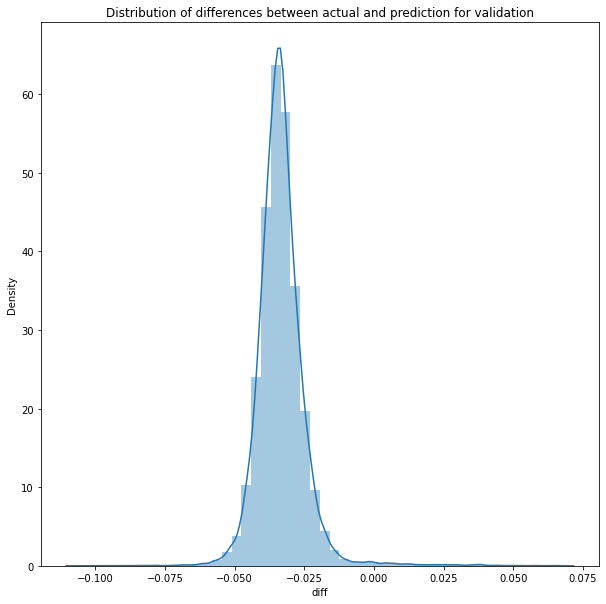

In [64]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 3ms/step


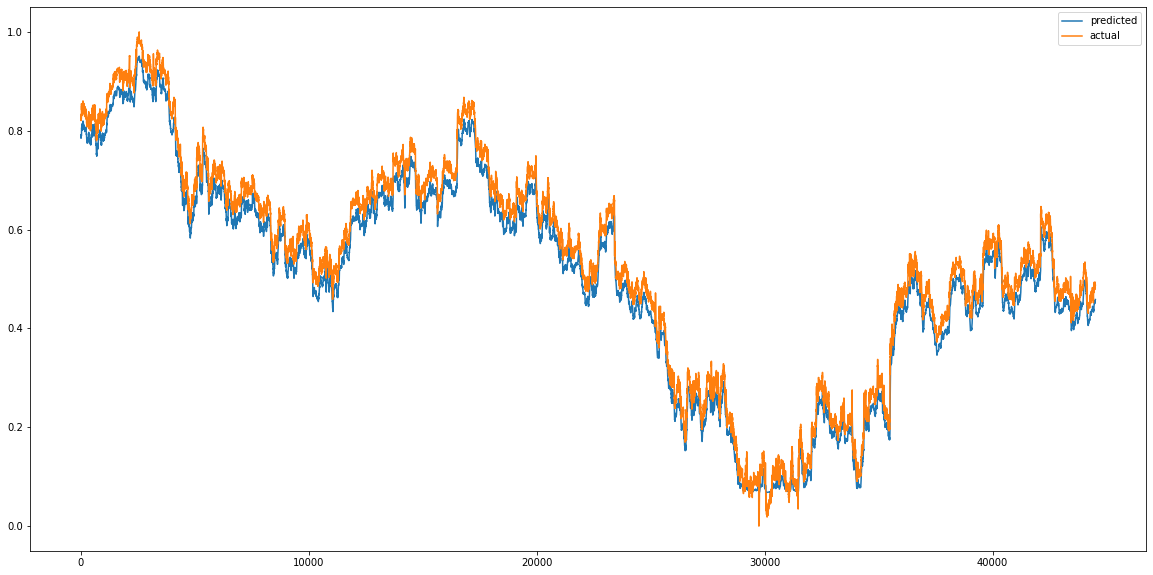

In [65]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


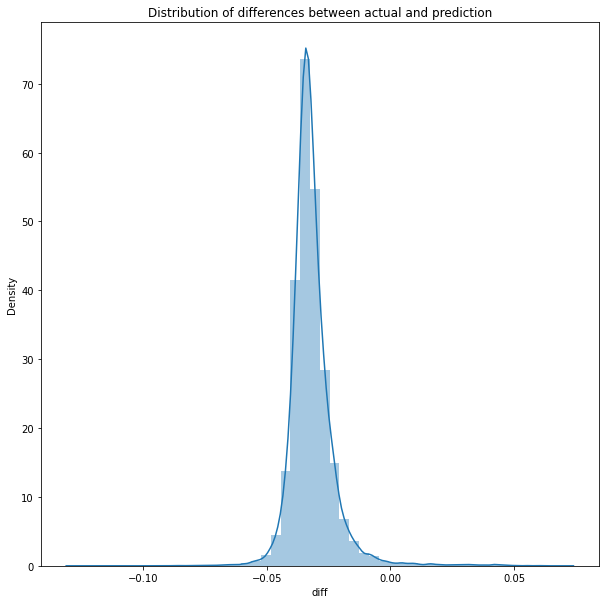

In [66]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0010983372821213604
RMSE :  0.033141172008867764
MAE :  0.03226248679807185
1392/1392 [==============================] - 5s 3ms/step
R2_Score  : 0.9777288061462908


count    44513.000000
mean        -0.031843
std          0.009183
min         -0.127824
25%         -0.036456
50%         -0.033054
75%         -0.028762
max          0.070809
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [68]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [69]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 212.1574 - mae: 2.2625 - mse: 212.1574 - root_mean_squared_error: 14.5656 - mape: 564.5018
Epoch 1: val_mse improved from inf to 0.27248, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 16s 38ms/step - loss: 211.5568 - mae: 2.2580 - mse: 211.5568 - root_mean_squared_error: 14.5450 - mape: 563.1713 - val_loss: 0.2725 - val_mae: 0.4855 - val_mse: 0.2725 - val_root_mean_squared_error: 0.5220 - val_mape: 662.1854
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 0.2117 - mae: 0.3334 - mse: 0.2117 - root_mean_squared_error: 0.4601 - mape: 262.7709
Epoch 2: val_mse improved from 0.27248 to 0.00066, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 0.2099 - mae: 0.3308 - mse: 0.2099 - root_mean_squared_error: 0.4582 - mape: 260.5623 - val_loss: 6.6180e-04 - val_mae: 0.0206 - val_mse: 6.6180e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2517.6082
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 694.1729
Epoch 3: val_mse improved from 0.00066 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 690.2268 - val_loss: 6.0855e-04 - val_mae: 0.0199 - val_mse: 6.0855e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 2316.9597
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 7.6909e-04 - mae: 0.0217 - mse: 7.6909e-04 - root_mean_squared_error: 0.0277 - mape: 723.6313
Epoch 4: val_mse did not improve from 0.00061
347/347 [==============================] - 6s 16ms/step - loss: 7.6828e-04 - mae: 0.0217 - mse: 7.6828e-04 - root_mean_squared_error: 0.0277 - mape: 719.5121 - val_loss: 6.6303e-04 - val_mae: 0.0215 - val_mse: 6.6303e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2352.7034
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 5.6383e-04 - mae: 0.0186 - mse: 5.6383e-04 - root_mean_squared_error: 0.0237 - mape: 808.6688
Epoch 5: val_mse improved from 0.00061 to 0.00048, saving model to /con

347/347 [==============================] - 13s 36ms/step - loss: 5.6357e-04 - mae: 0.0186 - mse: 5.6357e-04 - root_mean_squared_error: 0.0237 - mape: 804.0612 - val_loss: 4.8257e-04 - val_mae: 0.0178 - val_mse: 4.8257e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 2322.2305
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 4.7063e-04 - mae: 0.0170 - mse: 4.7063e-04 - root_mean_squared_error: 0.0217 - mape: 872.2426
Epoch 6: val_mse improved from 0.00048 to 0.00041, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 36ms/step - loss: 4.7025e-04 - mae: 0.0170 - mse: 4.7025e-04 - root_mean_squared_error: 0.0217 - mape: 864.7657 - val_loss: 4.1441e-04 - val_mae: 0.0160 - val_mse: 4.1441e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 2263.4031
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 4.0501e-04 - mae: 0.0158 - mse: 4.0501e-04 - root_mean_squared_error: 0.0201 - mape: 702.9192
Epoch 7: val_mse improved from 0.00041 to 0.00040, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 4.0493e-04 - mae: 0.0158 - mse: 4.0493e-04 - root_mean_squared_error: 0.0201 - mape: 700.9316 - val_loss: 4.0230e-04 - val_mae: 0.0158 - val_mse: 4.0230e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2193.3411
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 3.5487e-04 - mae: 0.0148 - mse: 3.5487e-04 - root_mean_squared_error: 0.0188 - mape: 746.8840
Epoch 8: val_mse improved from 0.00040 to 0.00032, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 3.5500e-04 - mae: 0.0148 - mse: 3.5500e-04 - root_mean_squared_error: 0.0188 - mape: 742.6280 - val_loss: 3.2399e-04 - val_mae: 0.0137 - val_mse: 3.2399e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2153.8857
Epoch 9/60
345/347 [============================>.] - ETA: 0s - loss: 3.1335e-04 - mae: 0.0139 - mse: 3.1335e-04 - root_mean_squared_error: 0.0177 - mape: 737.6068
Epoch 9: val_mse did not improve from 0.00032
347/347 [==============================] - 5s 15ms/step - loss: 3.1335e-04 - mae: 0.0139 - mse: 3.1335e-04 - root_mean_squared_error: 0.0177 - mape: 733.4036 - val_loss: 4.0496e-04 - val_mae: 0.0157 - val_mse: 4.0496e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2076.8936
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 2.8274e-04 - mae: 0.0132 - mse: 2.8274e-04 - root_mean_squared_error: 0.0168 - mape: 735.9031
Epoch 10: val_mse did not improve from 0.00032
347/347 [======

347/347 [==============================] - 12s 36ms/step - loss: 2.0534e-04 - mae: 0.0113 - mse: 2.0534e-04 - root_mean_squared_error: 0.0143 - mape: 652.5026 - val_loss: 2.8464e-04 - val_mae: 0.0130 - val_mse: 2.8464e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 1912.9010
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 1.8714e-04 - mae: 0.0107 - mse: 1.8714e-04 - root_mean_squared_error: 0.0137 - mape: 608.2941
Epoch 14: val_mse did not improve from 0.00028
347/347 [==============================] - 5s 15ms/step - loss: 1.8710e-04 - mae: 0.0107 - mse: 1.8710e-04 - root_mean_squared_error: 0.0137 - mape: 606.5735 - val_loss: 3.4372e-04 - val_mae: 0.0146 - val_mse: 3.4372e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 1849.7966
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 1.6979e-04 - mae: 0.0102 - mse: 1.6979e-04 - root_mean_squared_error: 0.0130 - mape: 666.4047
Epoch 15: val_mse did not improve from 0.00028
347/347 [====

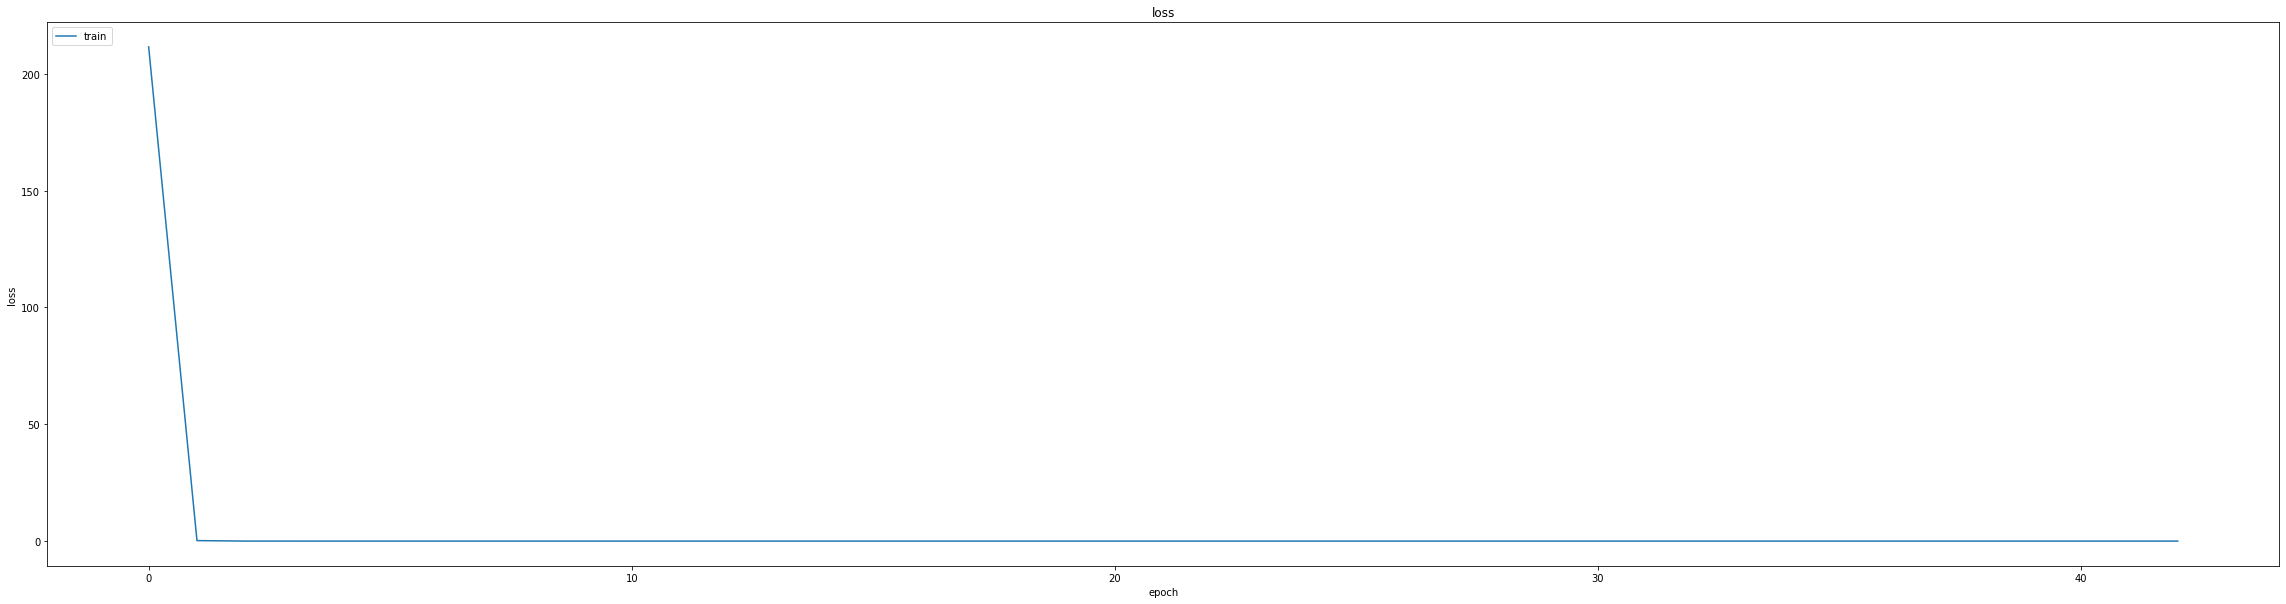

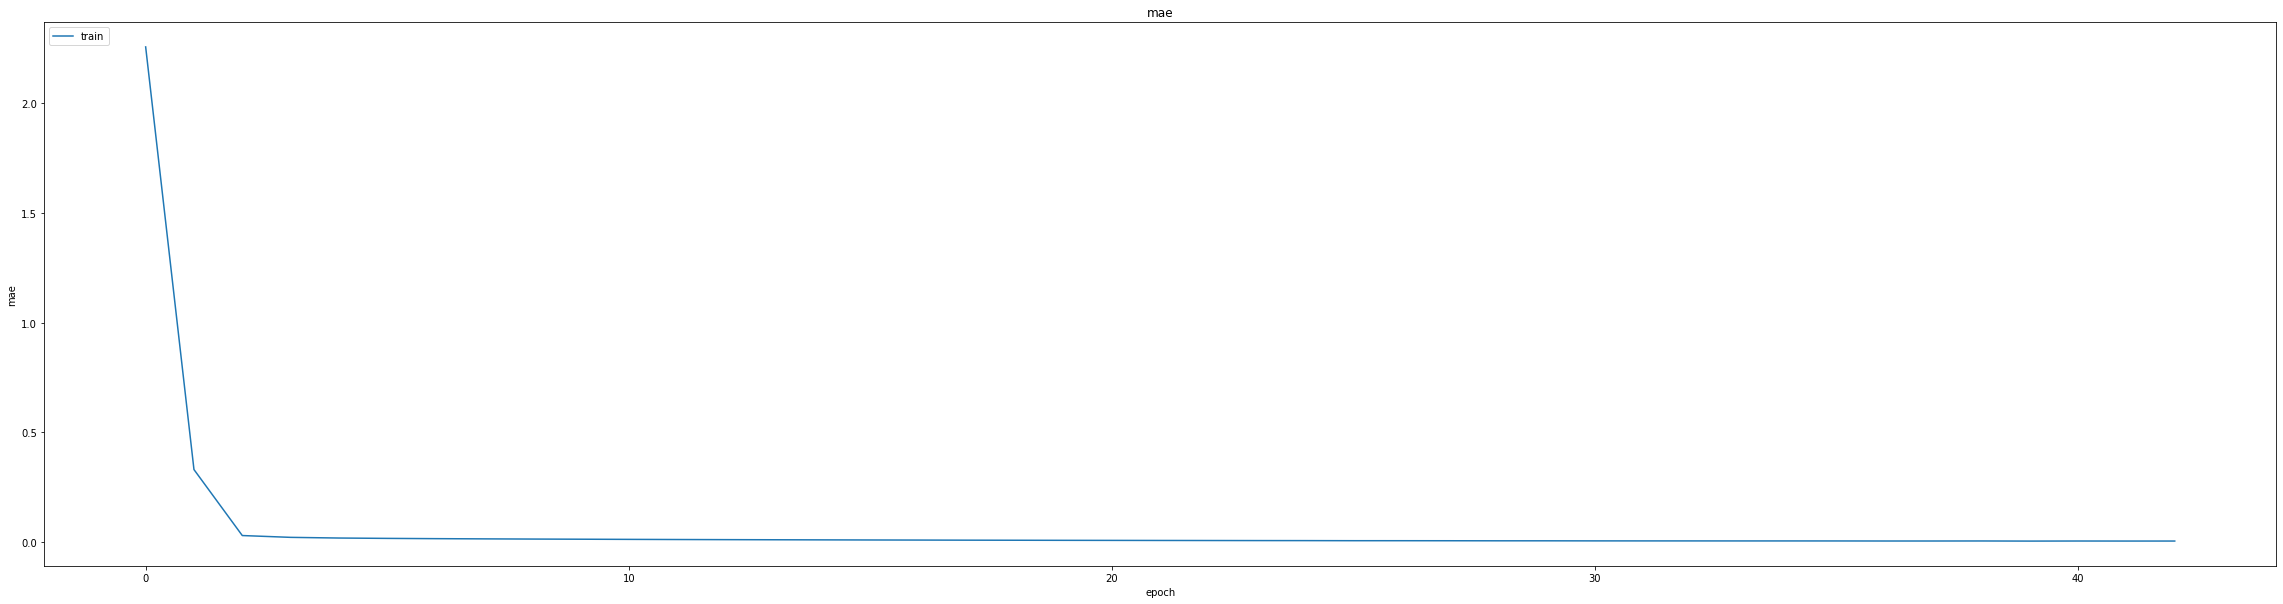

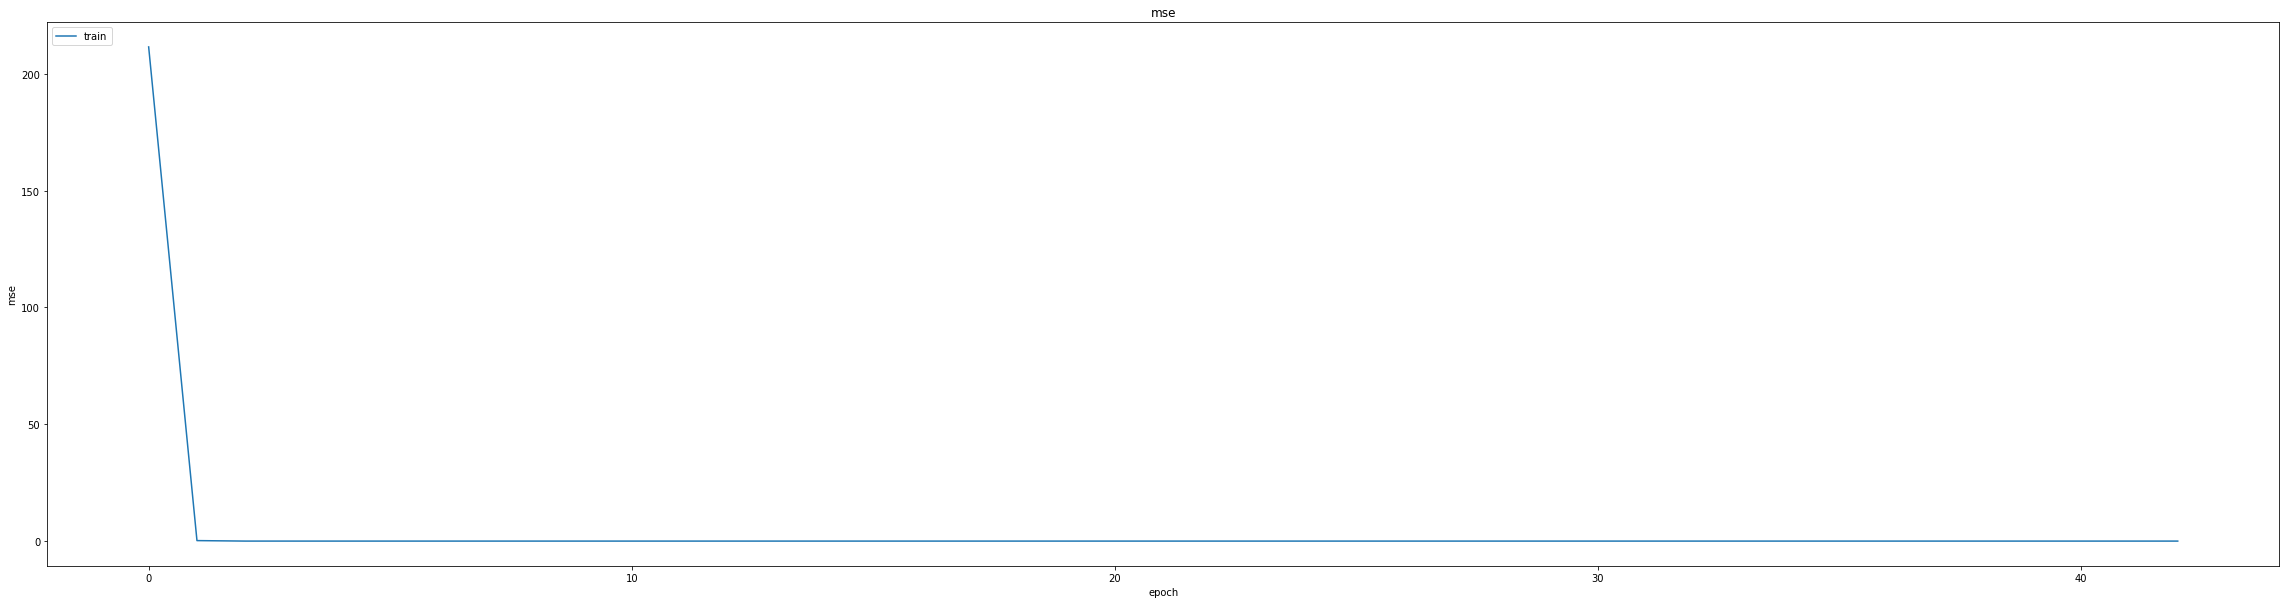

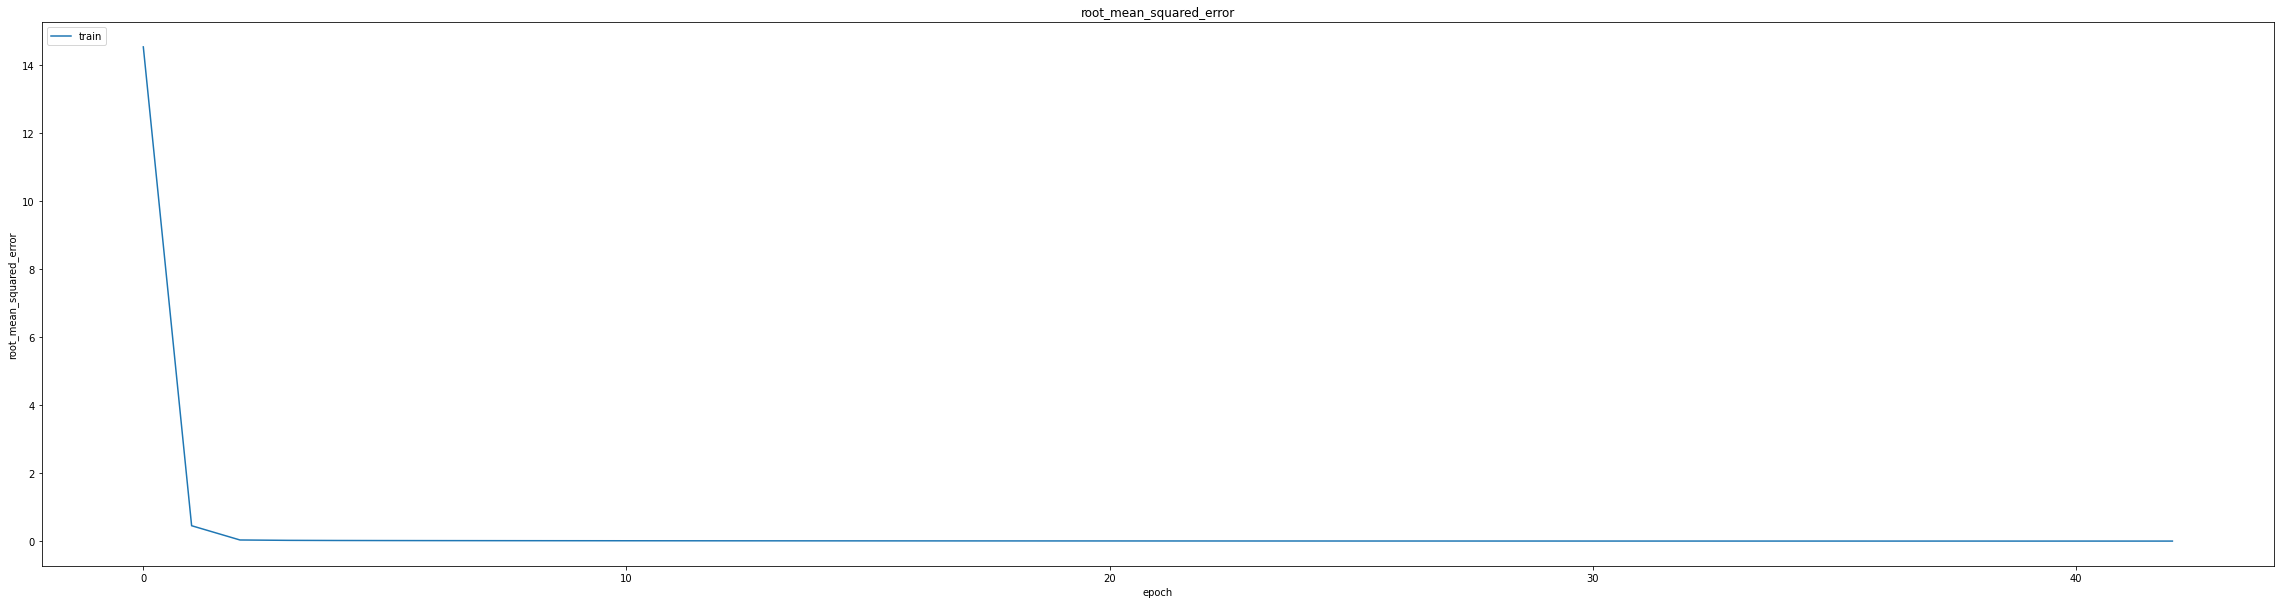

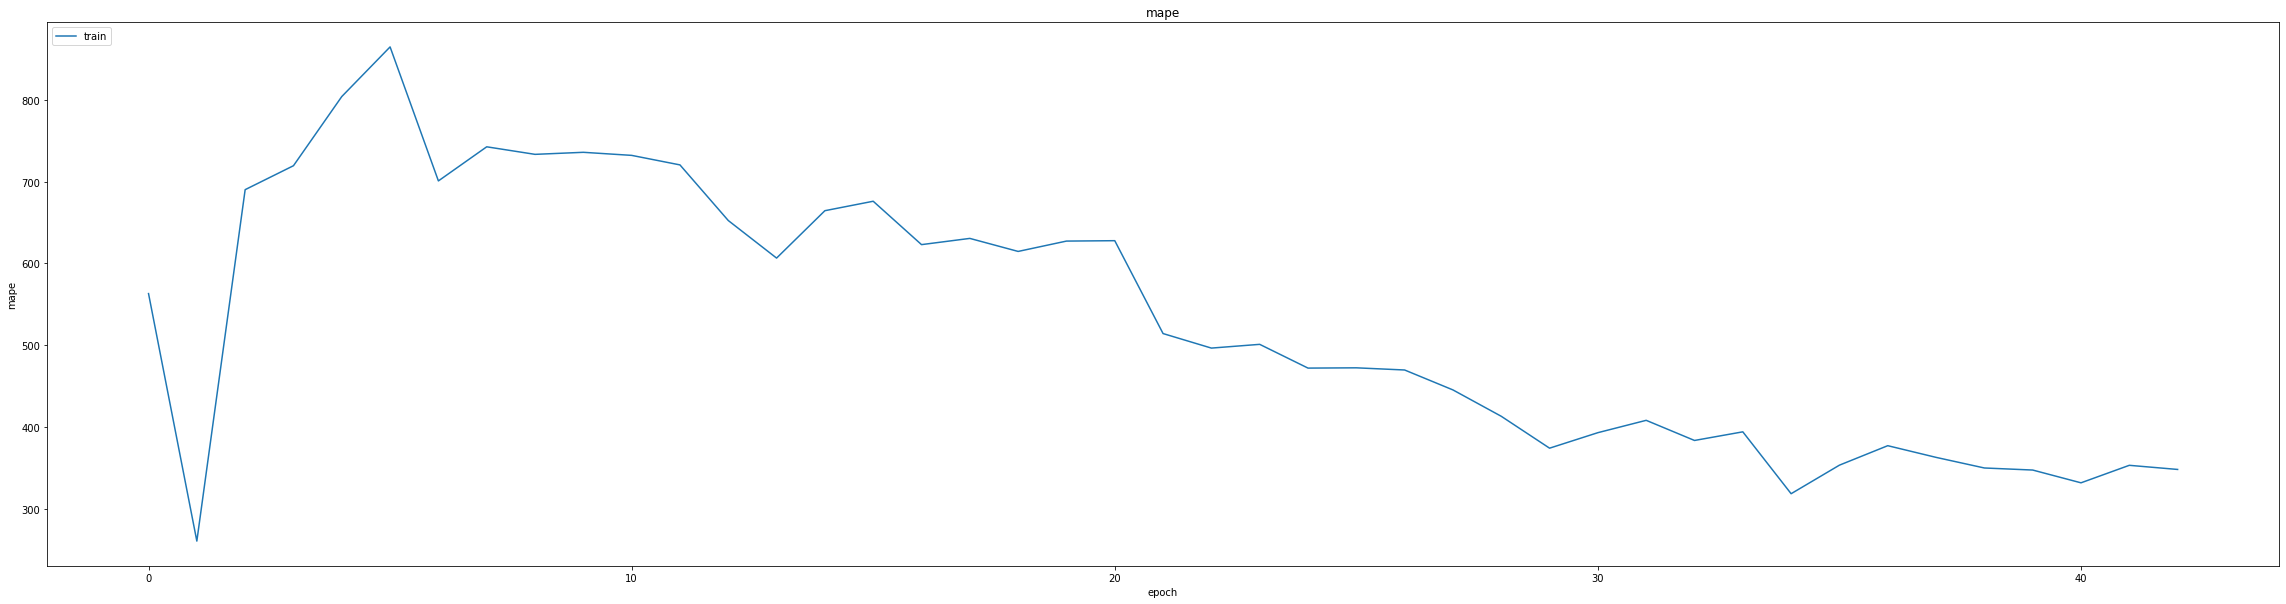

In [70]:
thesis.SummarizeHistory(history)

In [71]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012957186438143253
0.01687123253941536
1392/1392 [==============================] - 8s 5ms/step
0.9715708035143078


In [72]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [73]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0273 - mse: 0.0041 - root_mean_squared_error: 0.0637 - mape: 683.6556
Epoch 1: val_mse improved from 0.00028 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 16s 38ms/step - loss: 0.0040 - mae: 0.0272 - mse: 0.0040 - root_mean_squared_error: 0.0636 - mape: 679.7557 - val_loss: 1.8708e-04 - val_mae: 0.0101 - val_mse: 1.8708e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1794.2255 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 1.4280e-04 - mae: 0.0094 - mse: 1.4280e-04 - root_mean_squared_error: 0.0119 - mape: 640.2621
Epoch 2: val_mse did not improve from 0.00019
347/347 [==============================] - 6s 17ms/step - loss: 1.4267e-04 - mae: 0.0094 - mse: 1.4267e-04 - root_mean_squared_error: 0.0119 - mape: 636.6090 - val_loss: 2.3409e-04 - val_mae: 0.0121 - val_mse: 2.3409e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 1461.9015 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/347 [==============================] - ETA: 0s - loss: 9.8546e-05 - mae: 0.0078 - mse: 9.8546e-05 - root_mean_squared_error: 0.0099 - mape: 496.9636
Epoch 3: 

347/347 [==============================] - 12s 35ms/step - loss: 5.7216e-05 - mae: 0.0060 - mse: 5.7216e-05 - root_mean_squared_error: 0.0076 - mape: 355.8148 - val_loss: 1.6949e-04 - val_mae: 0.0100 - val_mse: 1.6949e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 900.2241 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
347/347 [==============================] - ETA: 0s - loss: 4.7118e-05 - mae: 0.0054 - mse: 4.7118e-05 - root_mean_squared_error: 0.0069 - mape: 400.8702
Epoch 9: val_mse did not improve from 0.00017
347/347 [==============================] - 5s 15ms/step - loss: 4.7118e-05 - mae: 0.0054 - mse: 4.7118e-05 - root_mean_squared_error: 0.0069 - mape: 400.8702 - val_loss: 2.8098e-04 - val_mae: 0.0140 - val_mse: 2.8098e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 848.7507 - lr: 6.5610e-04
Epoch 10/20
346/347 [============================>.] - ETA: 0s - loss: 6.2204e-05 - mae: 0.0063 - mse: 6.2204e-05 - root_mean_squared_error: 0.0079 - mape: 377

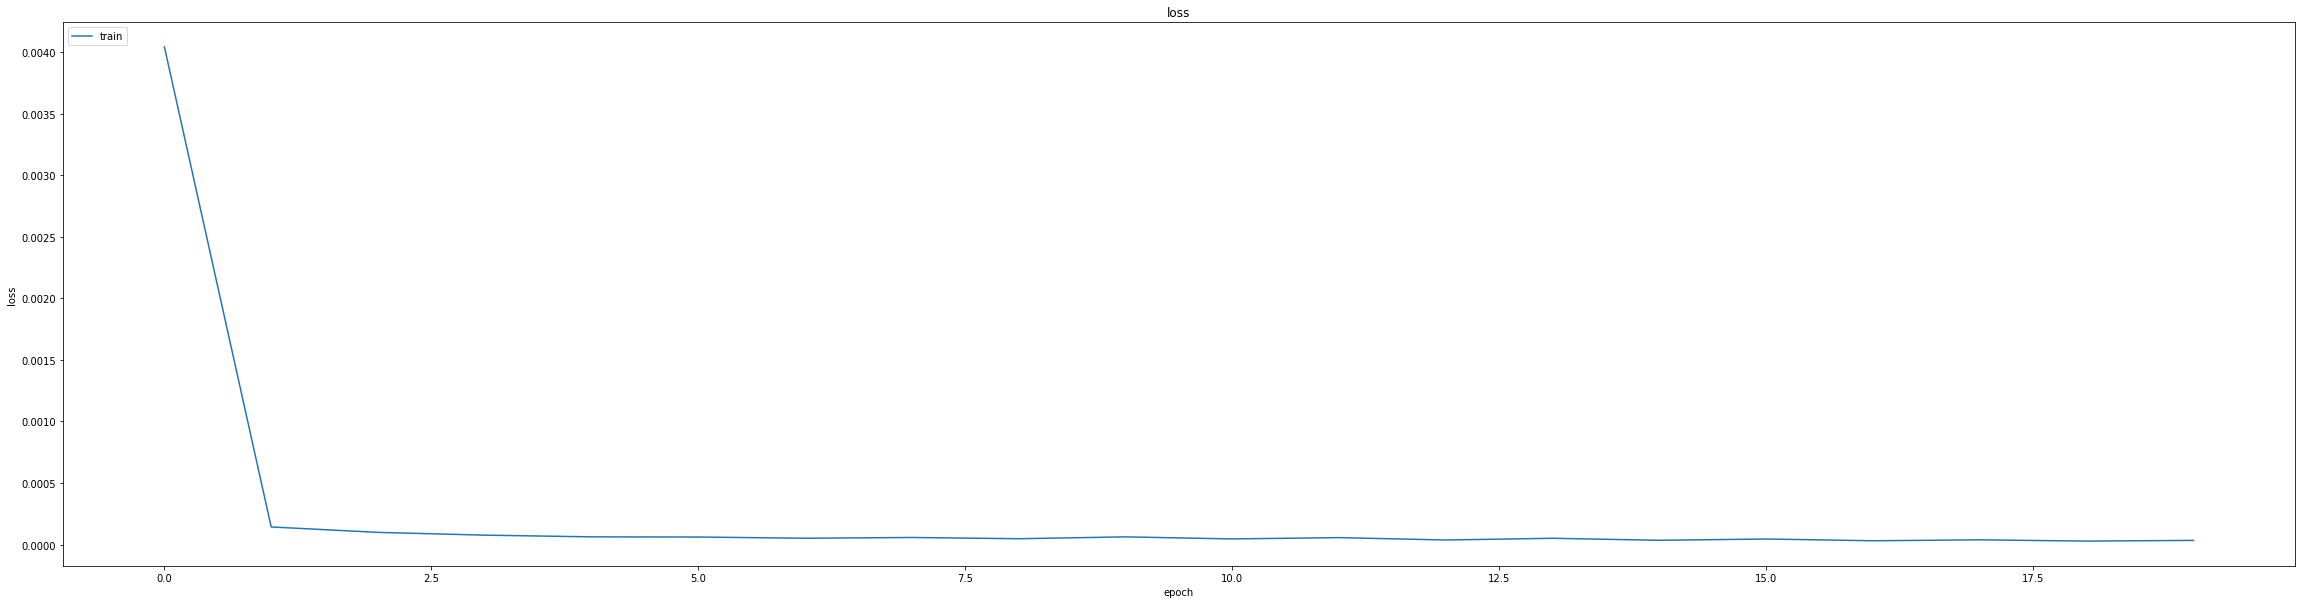

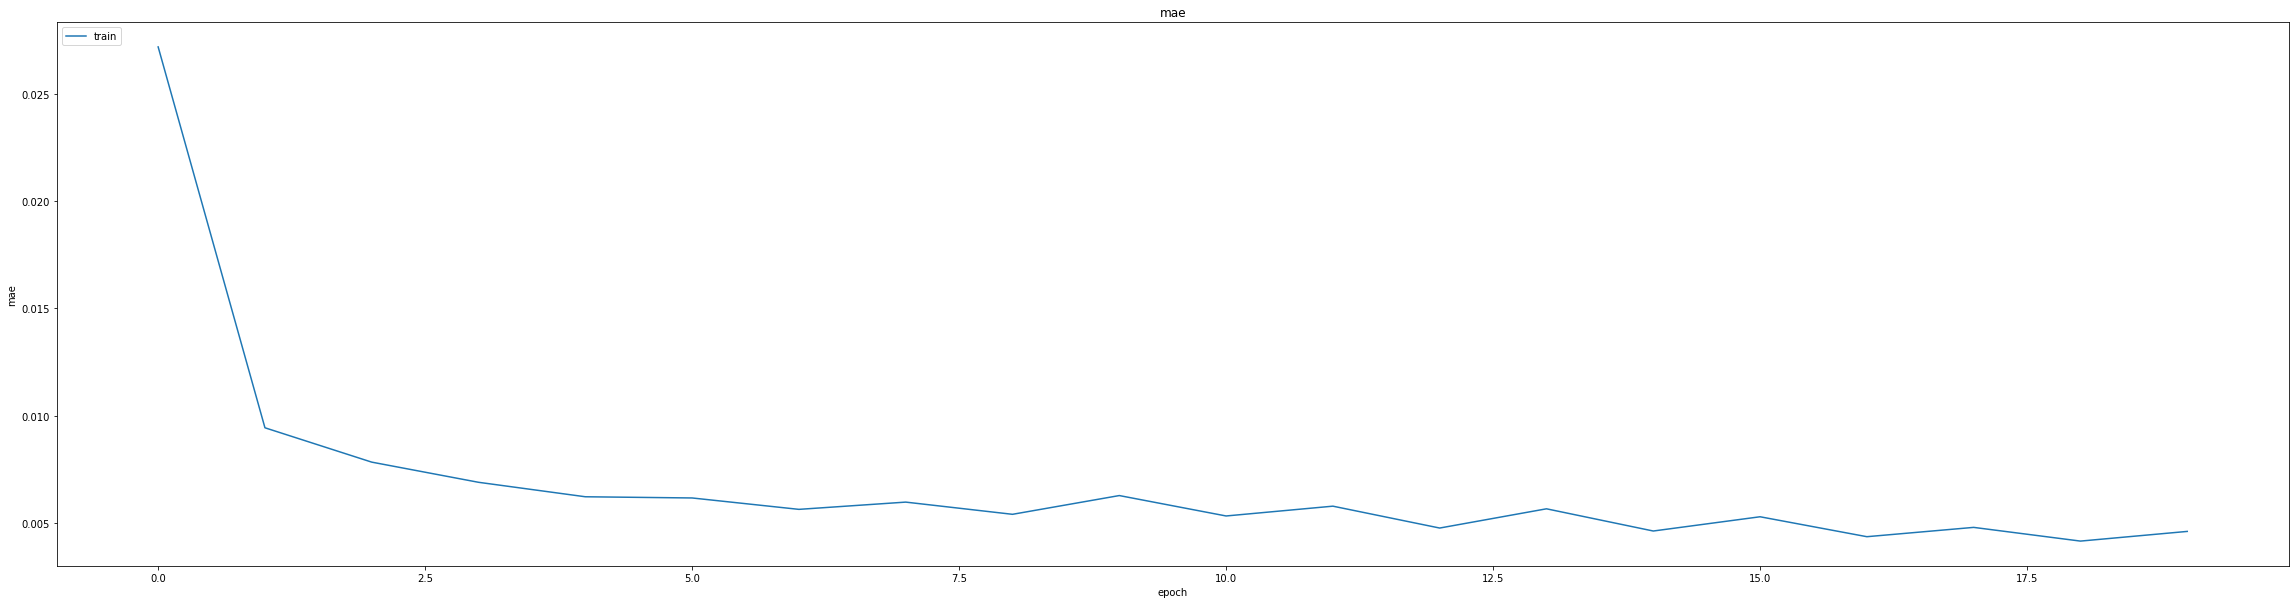

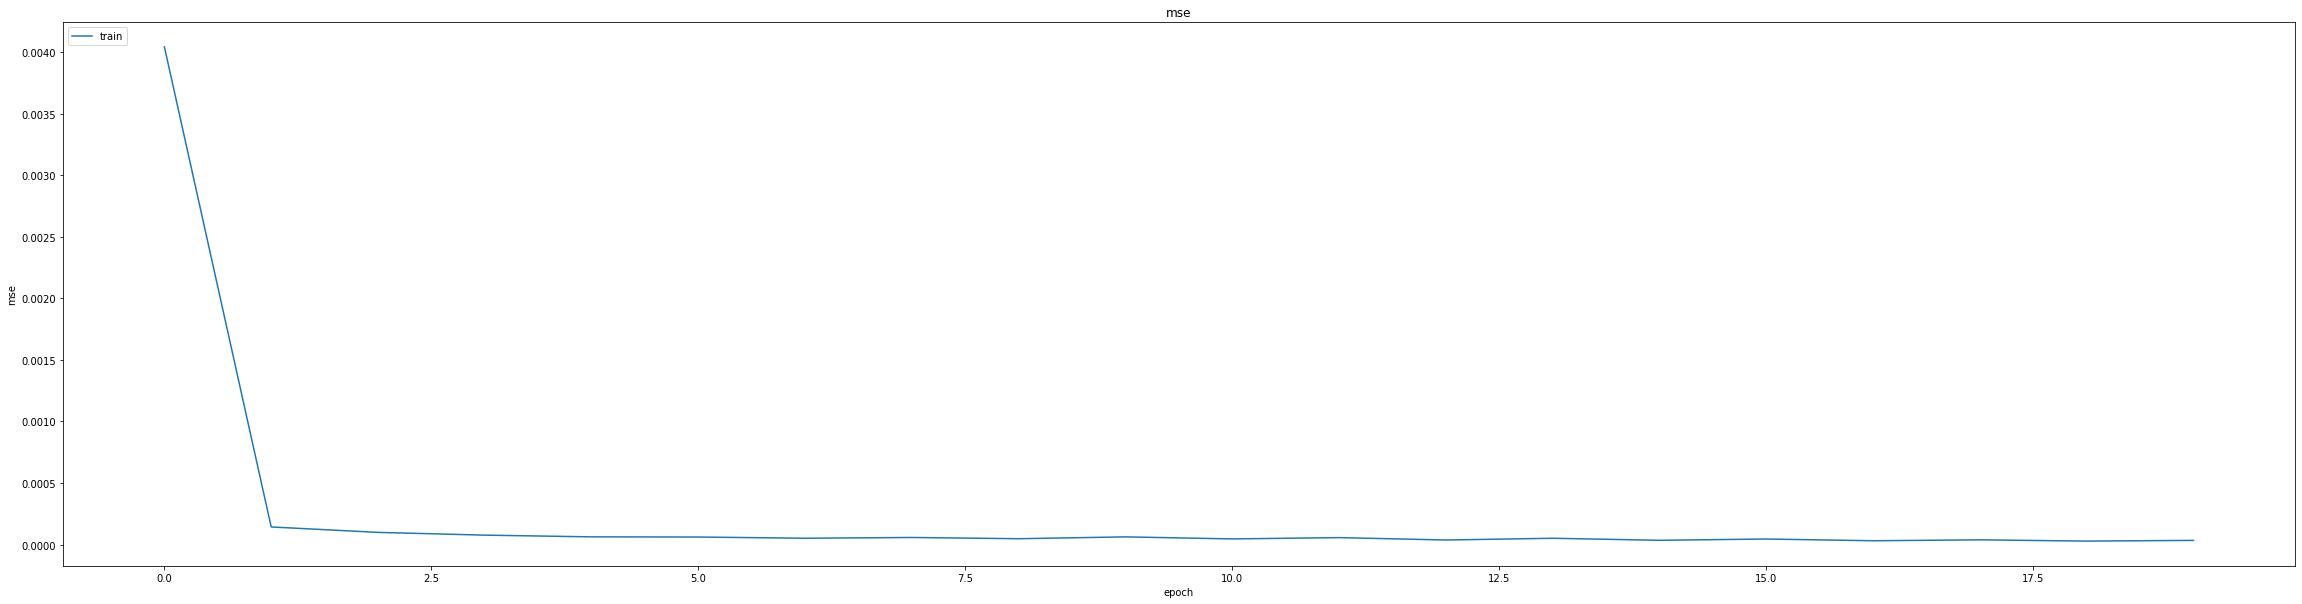

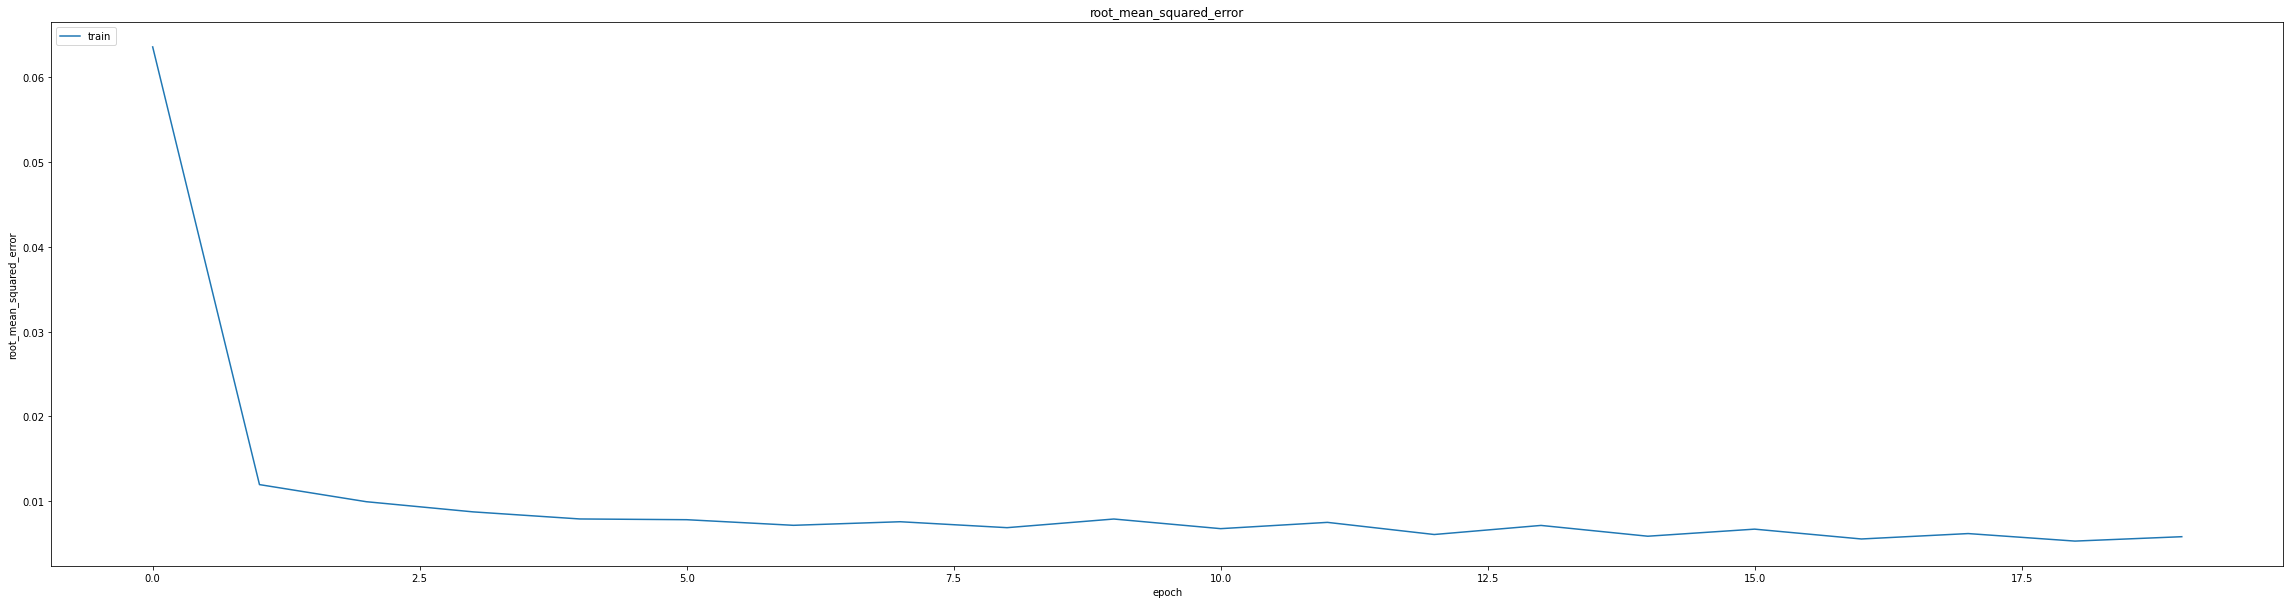

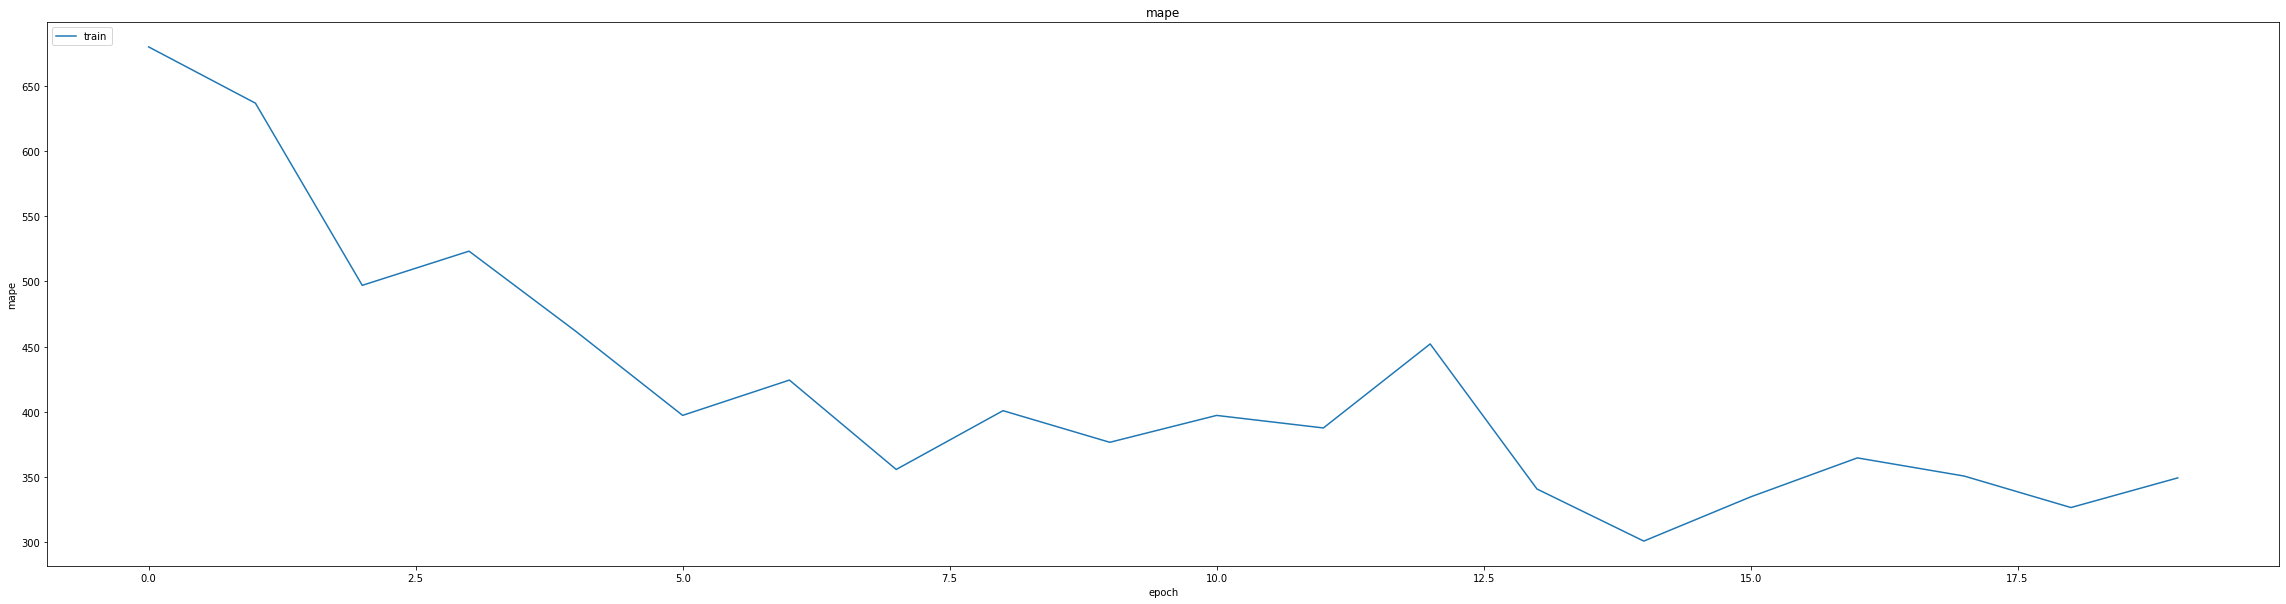

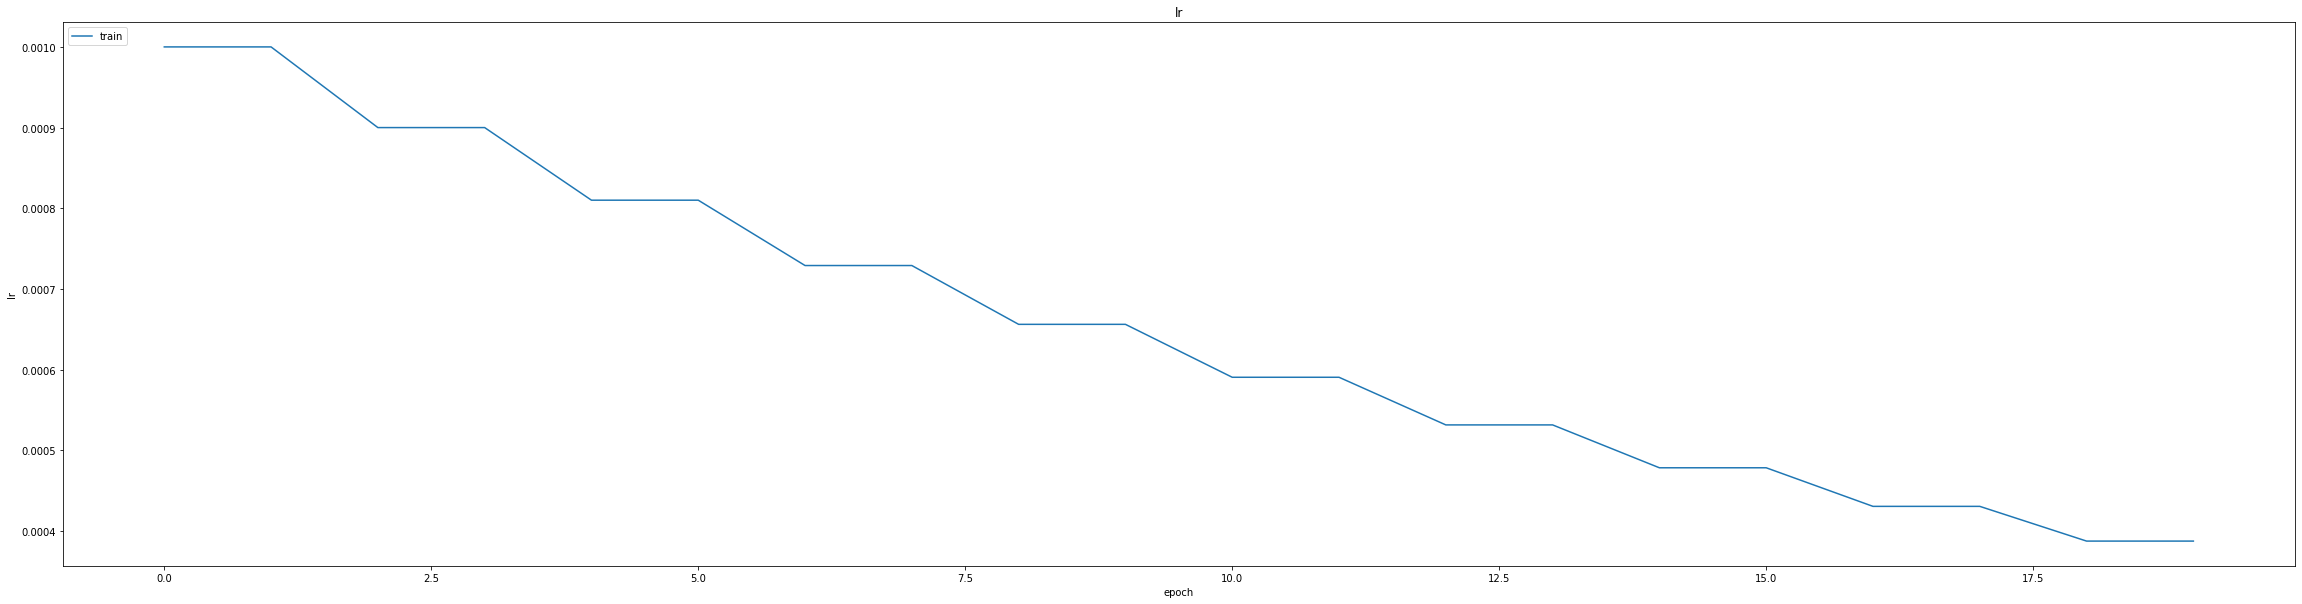

In [74]:
thesis.SummarizeHistory(history)

In [75]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00997862033545971
0.013018853031098843
1392/1392 [==============================] - 5s 3ms/step
0.9868566726168121


1392/1392 [==============================] - 4s 3ms/step


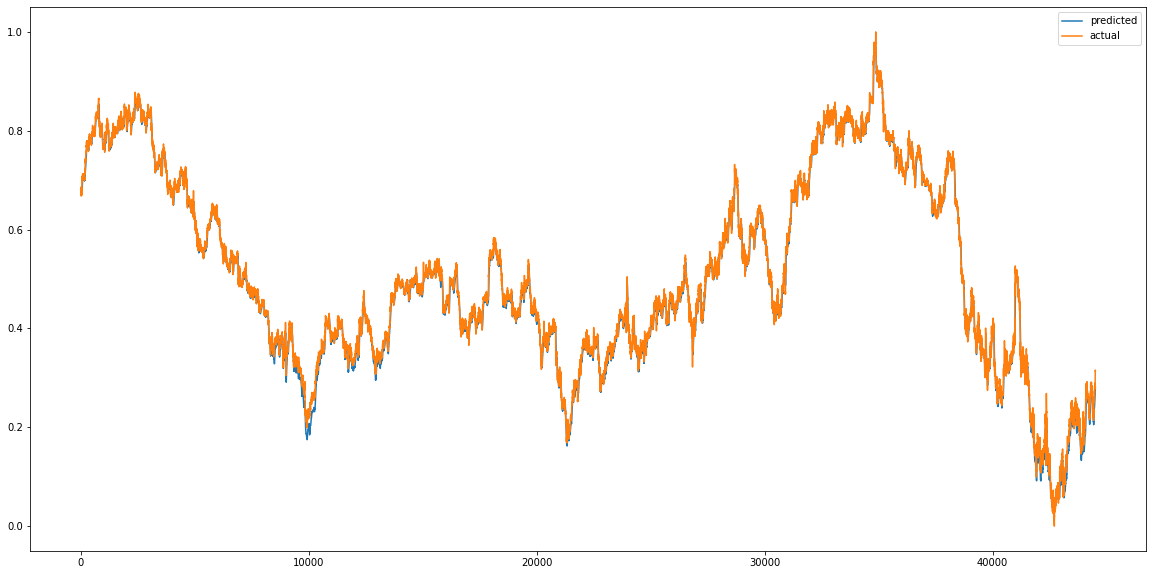

In [76]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


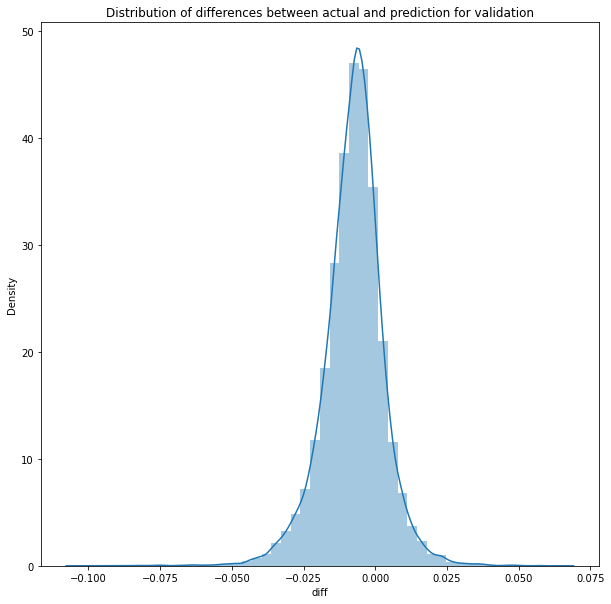

In [77]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 4s 3ms/step


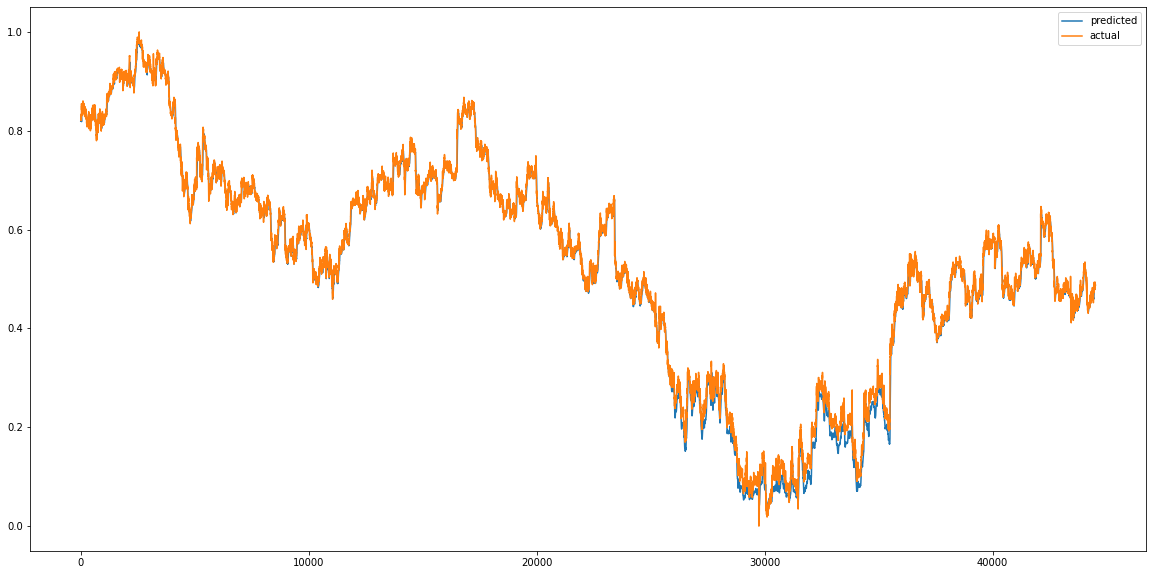

In [78]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


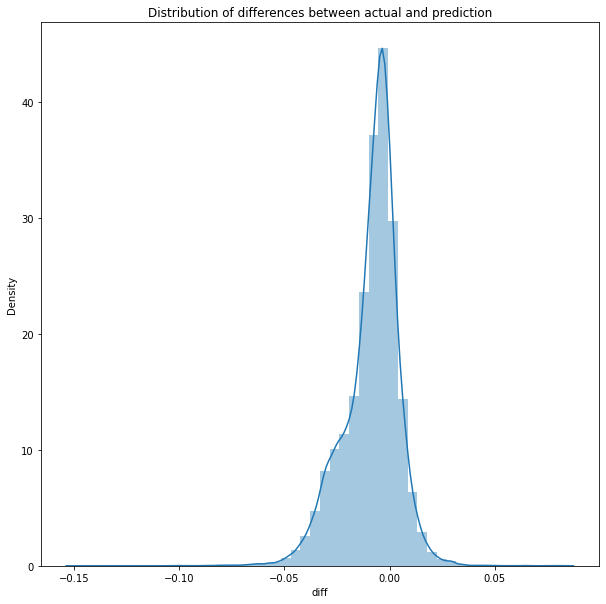

In [79]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002452211516603965
RMSE :  0.015659538679680077
MAE :  0.0113019000293545
1392/1392 [==============================] - 5s 3ms/step
R2_Score  : 0.9950276040929331


count    44513.000000
mean        -0.008511
std          0.013145
min         -0.149075
25%         -0.014799
50%         -0.006154
75%         -0.000491
max          0.082736
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [81]:
model= thesis.BiLSTM_Model(x_train)


In [82]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 571.7157 - mae: 7.7759 - mse: 571.7157 - root_mean_squared_error: 23.9106 - mape: 32718.9297
Epoch 1: val_mse improved from inf to 1.75494, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 51s 119ms/step - loss: 570.0978 - mae: 7.7572 - mse: 570.0978 - root_mean_squared_error: 23.8767 - mape: 32626.8008 - val_loss: 1.7549 - val_mae: 1.3103 - val_mse: 1.7549 - val_root_mean_squared_error: 1.3247 - val_mape: 41532.1758
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 0.6089 - mae: 0.7256 - mse: 0.6089 - root_mean_squared_error: 0.7803 - mape: 9456.4443
Epoch 2: val_mse improved from 1.75494 to 0.37298, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 42s 120ms/step - loss: 0.6078 - mae: 0.7247 - mse: 0.6078 - root_mean_squared_error: 0.7796 - mape: 9429.8594 - val_loss: 0.3730 - val_mae: 0.5792 - val_mse: 0.3730 - val_root_mean_squared_error: 0.6107 - val_mape: 24827.9434
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.1266 - mae: 0.2938 - mse: 0.1266 - root_mean_squared_error: 0.3558 - mape: 6666.8418
Epoch 3: val_mse improved from 0.37298 to 0.15171, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.1265 - mae: 0.2936 - mse: 0.1265 - root_mean_squared_error: 0.3556 - mape: 6648.0581 - val_loss: 0.1517 - val_mae: 0.3401 - val_mse: 0.1517 - val_root_mean_squared_error: 0.3895 - val_mape: 19303.6621
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0538 - mae: 0.1749 - mse: 0.0538 - root_mean_squared_error: 0.2319 - mape: 6082.4019
Epoch 4: val_mse improved from 0.15171 to 0.09216, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0537 - mae: 0.1748 - mse: 0.0537 - root_mean_squared_error: 0.2318 - mape: 6047.8394 - val_loss: 0.0922 - val_mae: 0.2574 - val_mse: 0.0922 - val_root_mean_squared_error: 0.3036 - val_mape: 16926.3477
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0396 - mae: 0.1531 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 6053.1538
Epoch 5: val_mse improved from 0.09216 to 0.07195, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0396 - mae: 0.1531 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 6053.1538 - val_loss: 0.0719 - val_mae: 0.2281 - val_mse: 0.0719 - val_root_mean_squared_error: 0.2682 - val_mape: 15829.8848
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0369 - mae: 0.1513 - mse: 0.0369 - root_mean_squared_error: 0.1920 - mape: 5321.8120
Epoch 6: val_mse improved from 0.07195 to 0.06455, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0369 - mae: 0.1513 - mse: 0.0369 - root_mean_squared_error: 0.1920 - mape: 5291.5786 - val_loss: 0.0646 - val_mae: 0.2170 - val_mse: 0.0646 - val_root_mean_squared_error: 0.2541 - val_mape: 15349.3877
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1524 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 5029.6992
Epoch 7: val_mse improved from 0.06455 to 0.06193, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 42s 120ms/step - loss: 0.0364 - mae: 0.1524 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 5029.6992 - val_loss: 0.0619 - val_mae: 0.2130 - val_mse: 0.0619 - val_root_mean_squared_error: 0.2488 - val_mape: 15161.9912
Epoch 8/60
346/347 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1531 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 5276.4624
Epoch 8: val_mse improved from 0.06193 to 0.06117, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0364 - mae: 0.1531 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 5261.5874 - val_loss: 0.0612 - val_mae: 0.2118 - val_mse: 0.0612 - val_root_mean_squared_error: 0.2473 - val_mape: 15103.9990
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0363 - mae: 0.1532 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 5170.0947
Epoch 9: val_mse improved from 0.06117 to 0.06096, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0363 - mae: 0.1532 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 5170.0947 - val_loss: 0.0610 - val_mae: 0.2115 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2469 - val_mape: 15085.8418
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0363 - mae: 0.1531 - mse: 0.0363 - root_mean_squared_error: 0.1905 - mape: 4934.9146
Epoch 10: val_mse improved from 0.06096 to 0.06088, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0363 - mae: 0.1531 - mse: 0.0363 - root_mean_squared_error: 0.1905 - mape: 4921.0449 - val_loss: 0.0609 - val_mae: 0.2113 - val_mse: 0.0609 - val_root_mean_squared_error: 0.2467 - val_mape: 15076.8730
Epoch 11/60
346/347 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1531 - mse: 0.0362 - root_mean_squared_error: 0.1904 - mape: 5160.3975
Epoch 11: val_mse did not improve from 0.06088
347/347 [==============================] - 8s 22ms/step - loss: 0.0362 - mae: 0.1531 - mse: 0.0362 - root_mean_squared_error: 0.1904 - mape: 5145.8540 - val_loss: 0.0610 - val_mae: 0.2114 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2469 - val_mape: 15077.9863
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.0360 - mae: 0.1522 - mse: 0.0360 - root_mean_squared_error: 0.1896 - mape: 5225.7153
Epoch 12: val_mse improved from 0.06088 to 0.06044, saving model to /content/drive/MyDrive/modelweigh

347/347 [==============================] - 41s 119ms/step - loss: 0.0360 - mae: 0.1522 - mse: 0.0360 - root_mean_squared_error: 0.1896 - mape: 5210.9746 - val_loss: 0.0604 - val_mae: 0.2105 - val_mse: 0.0604 - val_root_mean_squared_error: 0.2458 - val_mape: 14972.6533
Epoch 13/60
346/347 [============================>.] - ETA: 0s - loss: 0.0352 - mae: 0.1506 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 4862.6177
Epoch 13: val_mse improved from 0.06044 to 0.05923, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0352 - mae: 0.1505 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 4848.8926 - val_loss: 0.0592 - val_mae: 0.2084 - val_mse: 0.0592 - val_root_mean_squared_error: 0.2434 - val_mape: 14871.9336
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0343 - mae: 0.1483 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 5051.7817
Epoch 14: val_mse improved from 0.05923 to 0.05799, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 0.0343 - mae: 0.1483 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 5023.0679 - val_loss: 0.0580 - val_mae: 0.2059 - val_mse: 0.0580 - val_root_mean_squared_error: 0.2408 - val_mape: 14691.0156
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0315 - mae: 0.1417 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 5038.7446
Epoch 15: val_mse improved from 0.05799 to 0.05170, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0315 - mae: 0.1417 - mse: 0.0315 - root_mean_squared_error: 0.1775 - mape: 5024.5337 - val_loss: 0.0517 - val_mae: 0.1946 - val_mse: 0.0517 - val_root_mean_squared_error: 0.2274 - val_mape: 14065.8252
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 0.0290 - mae: 0.1360 - mse: 0.0290 - root_mean_squared_error: 0.1703 - mape: 4616.3491
Epoch 16: val_mse improved from 0.05170 to 0.04710, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0290 - mae: 0.1360 - mse: 0.0290 - root_mean_squared_error: 0.1702 - mape: 4590.0996 - val_loss: 0.0471 - val_mae: 0.1847 - val_mse: 0.0471 - val_root_mean_squared_error: 0.2170 - val_mape: 13775.3438
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 0.0247 - mae: 0.1240 - mse: 0.0247 - root_mean_squared_error: 0.1571 - mape: 4450.2407
Epoch 17: val_mse improved from 0.04710 to 0.03722, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 0.0247 - mae: 0.1239 - mse: 0.0247 - root_mean_squared_error: 0.1570 - mape: 4437.6821 - val_loss: 0.0372 - val_mae: 0.1609 - val_mse: 0.0372 - val_root_mean_squared_error: 0.1929 - val_mape: 13105.8838
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 0.0174 - mae: 0.1003 - mse: 0.0174 - root_mean_squared_error: 0.1319 - mape: 4320.8188
Epoch 18: val_mse improved from 0.03722 to 0.02384, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0174 - mae: 0.1002 - mse: 0.0174 - root_mean_squared_error: 0.1319 - mape: 4296.2349 - val_loss: 0.0238 - val_mae: 0.1199 - val_mse: 0.0238 - val_root_mean_squared_error: 0.1544 - val_mape: 12022.2939
Epoch 19/60
345/347 [============================>.] - ETA: 0s - loss: 0.0101 - mae: 0.0721 - mse: 0.0101 - root_mean_squared_error: 0.1007 - mape: 3903.7224
Epoch 19: val_mse improved from 0.02384 to 0.01261, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0101 - mae: 0.0721 - mse: 0.0101 - root_mean_squared_error: 0.1007 - mape: 3881.5015 - val_loss: 0.0126 - val_mae: 0.0771 - val_mse: 0.0126 - val_root_mean_squared_error: 0.1123 - val_mape: 10557.3623
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 0.0064 - mae: 0.0572 - mse: 0.0064 - root_mean_squared_error: 0.0798 - mape: 3352.2805
Epoch 20: val_mse improved from 0.01261 to 0.00797, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0064 - mae: 0.0572 - mse: 0.0064 - root_mean_squared_error: 0.0798 - mape: 3352.2805 - val_loss: 0.0080 - val_mae: 0.0596 - val_mse: 0.0080 - val_root_mean_squared_error: 0.0893 - val_mape: 9463.2705
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0047 - mae: 0.0500 - mse: 0.0047 - root_mean_squared_error: 0.0688 - mape: 3013.9128
Epoch 21: val_mse improved from 0.00797 to 0.00588, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 117ms/step - loss: 0.0047 - mae: 0.0500 - mse: 0.0047 - root_mean_squared_error: 0.0688 - mape: 3013.9128 - val_loss: 0.0059 - val_mae: 0.0518 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0767 - val_mape: 8732.9092
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0451 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 3026.7444
Epoch 22: val_mse improved from 0.00588 to 0.00490, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 0.0038 - mae: 0.0451 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 3026.7444 - val_loss: 0.0049 - val_mae: 0.0493 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0700 - val_mape: 8194.0918
Epoch 23/60
346/347 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0419 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 2716.8738
Epoch 23: val_mse improved from 0.00490 to 0.00428, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0033 - mae: 0.0419 - mse: 0.0033 - root_mean_squared_error: 0.0573 - mape: 2709.1897 - val_loss: 0.0043 - val_mae: 0.0471 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0654 - val_mape: 7772.5449
Epoch 24/60
346/347 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 2569.1680
Epoch 24: val_mse improved from 0.00428 to 0.00352, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - root_mean_squared_error: 0.0540 - mape: 2561.9004 - val_loss: 0.0035 - val_mae: 0.0421 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0594 - val_mape: 7417.0352
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0379 - mse: 0.0026 - root_mean_squared_error: 0.0512 - mape: 2634.9456
Epoch 25: val_mse improved from 0.00352 to 0.00294, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 0.0026 - mae: 0.0379 - mse: 0.0026 - root_mean_squared_error: 0.0512 - mape: 2627.4951 - val_loss: 0.0029 - val_mae: 0.0374 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 7109.0439
Epoch 26/60
347/347 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0360 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 2328.9688
Epoch 26: val_mse improved from 0.00294 to 0.00247, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 0.0023 - mae: 0.0360 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 2328.9688 - val_loss: 0.0025 - val_mae: 0.0324 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 6811.2021
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2275.6523
Epoch 27: val_mse did not improve from 0.00247
347/347 [==============================] - 8s 22ms/step - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 2269.2175 - val_loss: 0.0025 - val_mae: 0.0351 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 6524.8701
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0324 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 2296.2800
Epoch 28: val_mse improved from 0.00247 to 0.00245, saving model to /content/drive/MyDrive/modelweights

347/347 [==============================] - 40s 116ms/step - loss: 0.0019 - mae: 0.0324 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 2283.1812 - val_loss: 0.0024 - val_mae: 0.0373 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0495 - val_mape: 6263.1108
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0305 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 2155.2266
Epoch 29: val_mse improved from 0.00245 to 0.00196, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0016 - mae: 0.0305 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 2142.9404 - val_loss: 0.0020 - val_mae: 0.0303 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0443 - val_mape: 6007.9341
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0381 - mape: 1941.4847
Epoch 30: val_mse improved from 0.00196 to 0.00170, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0381 - mape: 1941.4847 - val_loss: 0.0017 - val_mae: 0.0282 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mape: 5776.0728
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0269 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2134.6980
Epoch 31: val_mse improved from 0.00170 to 0.00164, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0013 - mae: 0.0269 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2134.6980 - val_loss: 0.0016 - val_mae: 0.0290 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 5575.2441
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 2167.5002
Epoch 32: val_mse improved from 0.00164 to 0.00137, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 42s 120ms/step - loss: 0.0011 - mae: 0.0248 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 2167.5002 - val_loss: 0.0014 - val_mae: 0.0265 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 5394.2881
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 9.8029e-04 - mae: 0.0235 - mse: 9.8029e-04 - root_mean_squared_error: 0.0313 - mape: 1837.3287
Epoch 33: val_mse improved from 0.00137 to 0.00112, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 9.8029e-04 - mae: 0.0235 - mse: 9.8029e-04 - root_mean_squared_error: 0.0313 - mape: 1837.3287 - val_loss: 0.0011 - val_mae: 0.0235 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 5215.9351
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 8.8166e-04 - mae: 0.0223 - mse: 8.8166e-04 - root_mean_squared_error: 0.0297 - mape: 1729.6487
Epoch 34: val_mse did not improve from 0.00112
347/347 [==============================] - 8s 23ms/step - loss: 8.8166e-04 - mae: 0.0223 - mse: 8.8166e-04 - root_mean_squared_error: 0.0297 - mape: 1729.6487 - val_loss: 0.0018 - val_mae: 0.0357 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0422 - val_mape: 5067.9878
Epoch 35/60
347/347 [==============================] - ETA: 0s - loss: 7.9851e-04 - mae: 0.0213 - mse: 7.9851e-04 - root_mean_squared_error: 0.0283 - mape: 1650.1777
Epoch 35: val_mse improved from 0.00112 to 0.00093, saving model to /co

347/347 [==============================] - 40s 115ms/step - loss: 7.9851e-04 - mae: 0.0213 - mse: 7.9851e-04 - root_mean_squared_error: 0.0283 - mape: 1650.1777 - val_loss: 9.2673e-04 - val_mae: 0.0213 - val_mse: 9.2673e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 4903.7461
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 7.0302e-04 - mae: 0.0199 - mse: 7.0302e-04 - root_mean_squared_error: 0.0265 - mape: 1594.2999
Epoch 36: val_mse improved from 0.00093 to 0.00087, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 7.0302e-04 - mae: 0.0199 - mse: 7.0302e-04 - root_mean_squared_error: 0.0265 - mape: 1594.2999 - val_loss: 8.7103e-04 - val_mae: 0.0210 - val_mse: 8.7103e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 4758.3076
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 6.5941e-04 - mae: 0.0194 - mse: 6.5941e-04 - root_mean_squared_error: 0.0257 - mape: 1555.1211
Epoch 37: val_mse improved from 0.00087 to 0.00072, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 119ms/step - loss: 6.5941e-04 - mae: 0.0194 - mse: 6.5941e-04 - root_mean_squared_error: 0.0257 - mape: 1555.1211 - val_loss: 7.2106e-04 - val_mae: 0.0185 - val_mse: 7.2106e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4607.9668
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 5.8343e-04 - mae: 0.0182 - mse: 5.8343e-04 - root_mean_squared_error: 0.0242 - mape: 1570.5953
Epoch 38: val_mse improved from 0.00072 to 0.00055, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 42s 120ms/step - loss: 5.8343e-04 - mae: 0.0182 - mse: 5.8343e-04 - root_mean_squared_error: 0.0242 - mape: 1570.5953 - val_loss: 5.4571e-04 - val_mae: 0.0145 - val_mse: 5.4571e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 4466.5342
Epoch 39/60
345/347 [============================>.] - ETA: 0s - loss: 5.7274e-04 - mae: 0.0182 - mse: 5.7274e-04 - root_mean_squared_error: 0.0239 - mape: 1483.0675
Epoch 39: val_mse did not improve from 0.00055
347/347 [==============================] - 8s 23ms/step - loss: 5.7222e-04 - mae: 0.0182 - mse: 5.7222e-04 - root_mean_squared_error: 0.0239 - mape: 1474.6038 - val_loss: 9.0183e-04 - val_mae: 0.0234 - val_mse: 9.0183e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 4329.9238
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 4.9283e-04 - mae: 0.0168 - mse: 4.9283e-04 - root_mean_squared_error: 0.0222 - mape: 1450.3148
Epoch 40: val_mse did not improve from 0.00055
347/347 

347/347 [==============================] - 41s 118ms/step - loss: 4.4742e-04 - mae: 0.0160 - mse: 4.4742e-04 - root_mean_squared_error: 0.0212 - mape: 1440.8136 - val_loss: 5.2153e-04 - val_mae: 0.0161 - val_mse: 5.2153e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 4070.3765
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 3.9435e-04 - mae: 0.0150 - mse: 3.9435e-04 - root_mean_squared_error: 0.0199 - mape: 1372.3352
Epoch 42: val_mse improved from 0.00052 to 0.00049, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 3.9406e-04 - mae: 0.0150 - mse: 3.9406e-04 - root_mean_squared_error: 0.0199 - mape: 1364.5040 - val_loss: 4.8833e-04 - val_mae: 0.0149 - val_mse: 4.8833e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 3966.7805
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 3.8387e-04 - mae: 0.0149 - mse: 3.8387e-04 - root_mean_squared_error: 0.0196 - mape: 1334.2782
Epoch 43: val_mse improved from 0.00049 to 0.00042, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 117ms/step - loss: 3.8387e-04 - mae: 0.0149 - mse: 3.8387e-04 - root_mean_squared_error: 0.0196 - mape: 1334.2782 - val_loss: 4.1986e-04 - val_mae: 0.0138 - val_mse: 4.1986e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3847.2410
Epoch 44/60
346/347 [============================>.] - ETA: 0s - loss: 3.3681e-04 - mae: 0.0140 - mse: 3.3681e-04 - root_mean_squared_error: 0.0184 - mape: 1252.5917
Epoch 44: val_mse did not improve from 0.00042
347/347 [==============================] - 8s 23ms/step - loss: 3.3689e-04 - mae: 0.0140 - mse: 3.3689e-04 - root_mean_squared_error: 0.0184 - mape: 1249.0461 - val_loss: 4.9258e-04 - val_mae: 0.0164 - val_mse: 4.9258e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 3759.1262
Epoch 45/60
346/347 [============================>.] - ETA: 0s - loss: 3.2339e-04 - mae: 0.0137 - mse: 3.2339e-04 - root_mean_squared_error: 0.0180 - mape: 1278.1400
Epoch 45: val_mse improved from 0.00042 to 0.00039, sav

347/347 [==============================] - 41s 118ms/step - loss: 3.2325e-04 - mae: 0.0137 - mse: 3.2325e-04 - root_mean_squared_error: 0.0180 - mape: 1274.5221 - val_loss: 3.9287e-04 - val_mae: 0.0140 - val_mse: 3.9287e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3649.3379
Epoch 46/60
347/347 [==============================] - ETA: 0s - loss: 2.8199e-04 - mae: 0.0128 - mse: 2.8199e-04 - root_mean_squared_error: 0.0168 - mape: 1177.2610
Epoch 46: val_mse improved from 0.00039 to 0.00035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 2.8199e-04 - mae: 0.0128 - mse: 2.8199e-04 - root_mean_squared_error: 0.0168 - mape: 1177.2610 - val_loss: 3.5045e-04 - val_mae: 0.0127 - val_mse: 3.5045e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3550.0137
Epoch 47/60
345/347 [============================>.] - ETA: 0s - loss: 2.6698e-04 - mae: 0.0125 - mse: 2.6698e-04 - root_mean_squared_error: 0.0163 - mape: 1168.2529
Epoch 47: val_mse did not improve from 0.00035
347/347 [==============================] - 8s 23ms/step - loss: 2.6680e-04 - mae: 0.0125 - mse: 2.6680e-04 - root_mean_squared_error: 0.0163 - mape: 1161.5880 - val_loss: 4.8363e-04 - val_mae: 0.0168 - val_mse: 4.8363e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 3502.6028
Epoch 48/60
345/347 [============================>.] - ETA: 0s - loss: 2.5482e-04 - mae: 0.0123 - mse: 2.5482e-04 - root_mean_squared_error: 0.0160 - mape: 1187.3278
Epoch 48: val_mse improved from 0.00035 to 0.00034, sav

347/347 [==============================] - 50s 143ms/step - loss: 2.5484e-04 - mae: 0.0123 - mse: 2.5484e-04 - root_mean_squared_error: 0.0160 - mape: 1180.5513 - val_loss: 3.4346e-04 - val_mae: 0.0127 - val_mse: 3.4346e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 3414.7249
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 2.1600e-04 - mae: 0.0112 - mse: 2.1600e-04 - root_mean_squared_error: 0.0147 - mape: 1165.2045
Epoch 49: val_mse improved from 0.00034 to 0.00027, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 47s 137ms/step - loss: 2.1600e-04 - mae: 0.0112 - mse: 2.1600e-04 - root_mean_squared_error: 0.0147 - mape: 1165.2045 - val_loss: 2.7193e-04 - val_mae: 0.0104 - val_mse: 2.7193e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3307.9602
Epoch 50/60
347/347 [==============================] - ETA: 0s - loss: 2.0745e-04 - mae: 0.0111 - mse: 2.0745e-04 - root_mean_squared_error: 0.0144 - mape: 1090.0056
Epoch 50: val_mse did not improve from 0.00027
347/347 [==============================] - 9s 27ms/step - loss: 2.0745e-04 - mae: 0.0111 - mse: 2.0745e-04 - root_mean_squared_error: 0.0144 - mape: 1090.0056 - val_loss: 2.7222e-04 - val_mae: 0.0110 - val_mse: 2.7222e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 3232.8293
Epoch 51/60
347/347 [==============================] - ETA: 0s - loss: 1.9633e-04 - mae: 0.0108 - mse: 1.9633e-04 - root_mean_squared_error: 0.0140 - mape: 1042.5393
Epoch 51: val_mse improved from 0.00027 to 0.00026, sav

347/347 [==============================] - 43s 125ms/step - loss: 1.9633e-04 - mae: 0.0108 - mse: 1.9633e-04 - root_mean_squared_error: 0.0140 - mape: 1042.5393 - val_loss: 2.5800e-04 - val_mae: 0.0108 - val_mse: 2.5800e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 3131.3142
Epoch 52/60
345/347 [============================>.] - ETA: 0s - loss: 1.7368e-04 - mae: 0.0101 - mse: 1.7368e-04 - root_mean_squared_error: 0.0132 - mape: 1062.4998
Epoch 52: val_mse did not improve from 0.00026
347/347 [==============================] - 8s 22ms/step - loss: 1.7356e-04 - mae: 0.0101 - mse: 1.7356e-04 - root_mean_squared_error: 0.0132 - mape: 1056.4337 - val_loss: 3.1469e-04 - val_mae: 0.0134 - val_mse: 3.1469e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 3009.8884
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 1.7470e-04 - mae: 0.0102 - mse: 1.7470e-04 - root_mean_squared_error: 0.0132 - mape: 995.2149 
Epoch 53: val_mse improved from 0.00026 to 0.00020, sav

347/347 [==============================] - 40s 116ms/step - loss: 1.7470e-04 - mae: 0.0102 - mse: 1.7470e-04 - root_mean_squared_error: 0.0132 - mape: 995.2149 - val_loss: 2.0323e-04 - val_mae: 0.0094 - val_mse: 2.0323e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 2967.1523
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.4012e-04 - mae: 0.0091 - mse: 1.4012e-04 - root_mean_squared_error: 0.0118 - mape: 986.8966
Epoch 54: val_mse did not improve from 0.00020
347/347 [==============================] - 8s 23ms/step - loss: 1.4012e-04 - mae: 0.0091 - mse: 1.4012e-04 - root_mean_squared_error: 0.0118 - mape: 986.8966 - val_loss: 2.0403e-04 - val_mae: 0.0095 - val_mse: 2.0403e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 2894.8049
Epoch 55/60
345/347 [============================>.] - ETA: 0s - loss: 1.5979e-04 - mae: 0.0098 - mse: 1.5979e-04 - root_mean_squared_error: 0.0126 - mape: 996.2955 
Epoch 55: val_mse did not improve from 0.00020
347/347 [==

347/347 [==============================] - 40s 117ms/step - loss: 1.2884e-04 - mae: 0.0088 - mse: 1.2884e-04 - root_mean_squared_error: 0.0114 - mape: 917.5812 - val_loss: 1.8739e-04 - val_mae: 0.0094 - val_mse: 1.8739e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2763.2261
Epoch 57/60
347/347 [==============================] - ETA: 0s - loss: 1.3711e-04 - mae: 0.0091 - mse: 1.3711e-04 - root_mean_squared_error: 0.0117 - mape: 909.7849
Epoch 57: val_mse improved from 0.00019 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 41s 118ms/step - loss: 1.3711e-04 - mae: 0.0091 - mse: 1.3711e-04 - root_mean_squared_error: 0.0117 - mape: 909.7849 - val_loss: 1.7980e-04 - val_mae: 0.0092 - val_mse: 1.7980e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 2706.8906
Epoch 58/60
347/347 [==============================] - ETA: 0s - loss: 1.1909e-04 - mae: 0.0085 - mse: 1.1909e-04 - root_mean_squared_error: 0.0109 - mape: 931.2922
Epoch 58: val_mse did not improve from 0.00018
347/347 [==============================] - 8s 23ms/step - loss: 1.1909e-04 - mae: 0.0085 - mse: 1.1909e-04 - root_mean_squared_error: 0.0109 - mape: 931.2922 - val_loss: 2.4104e-04 - val_mae: 0.0122 - val_mse: 2.4104e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 2662.8435
Epoch 59/60
347/347 [==============================] - ETA: 0s - loss: 1.1084e-04 - mae: 0.0082 - mse: 1.1084e-04 - root_mean_squared_error: 0.0105 - mape: 915.3947
Epoch 59: val_mse did not improve from 0.00018
347/347 [===

347/347 [==============================] - 41s 119ms/step - loss: 1.0564e-04 - mae: 0.0080 - mse: 1.0564e-04 - root_mean_squared_error: 0.0103 - mape: 853.4557 - val_loss: 1.7471e-04 - val_mae: 0.0096 - val_mse: 1.7471e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 2575.4980


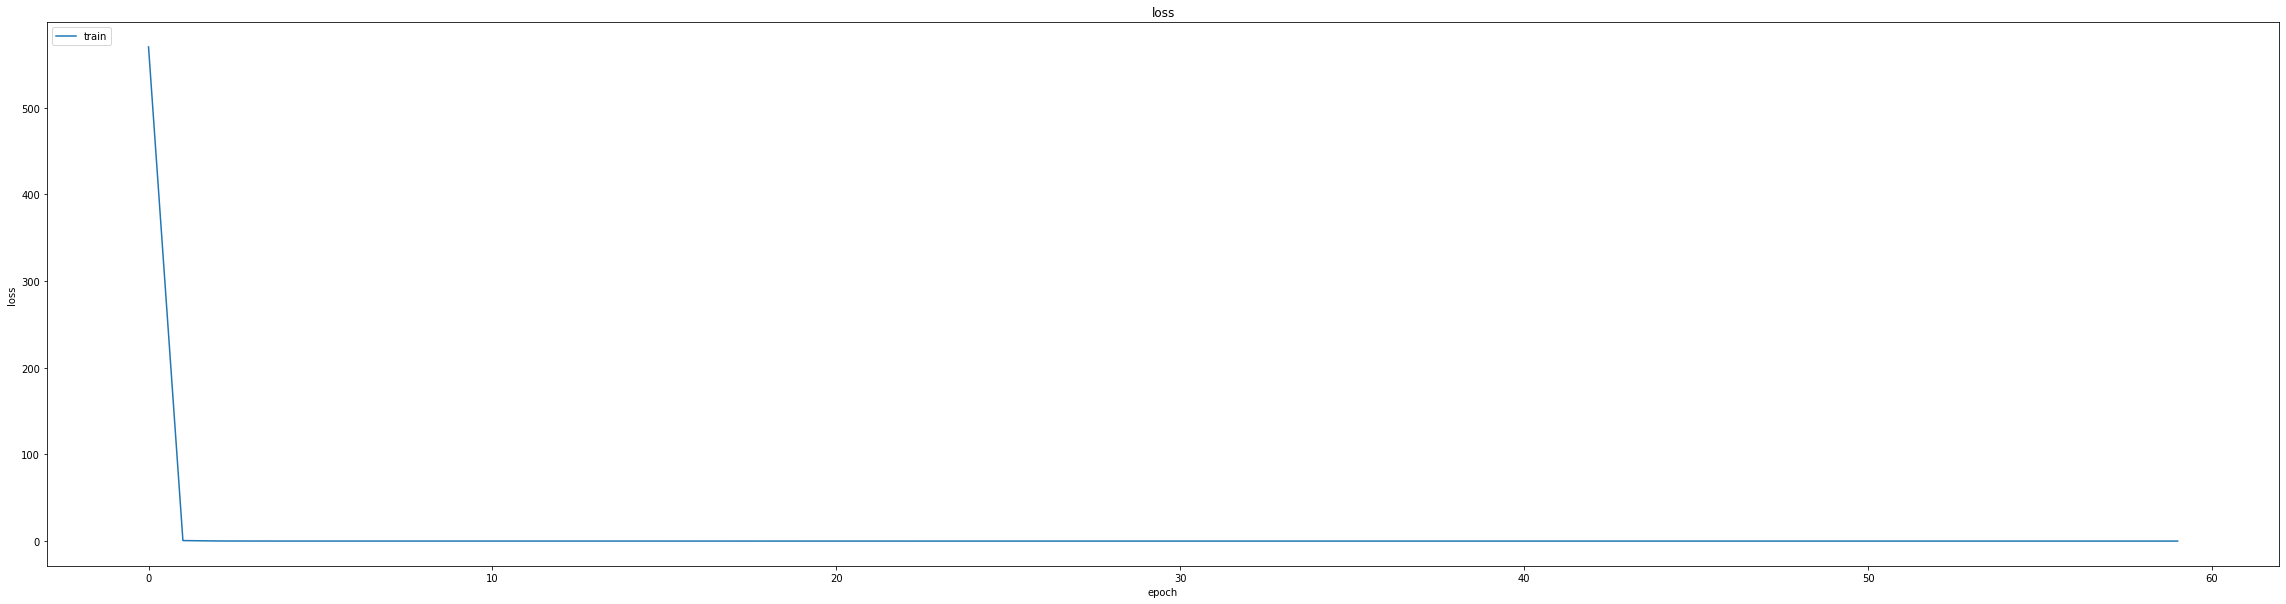

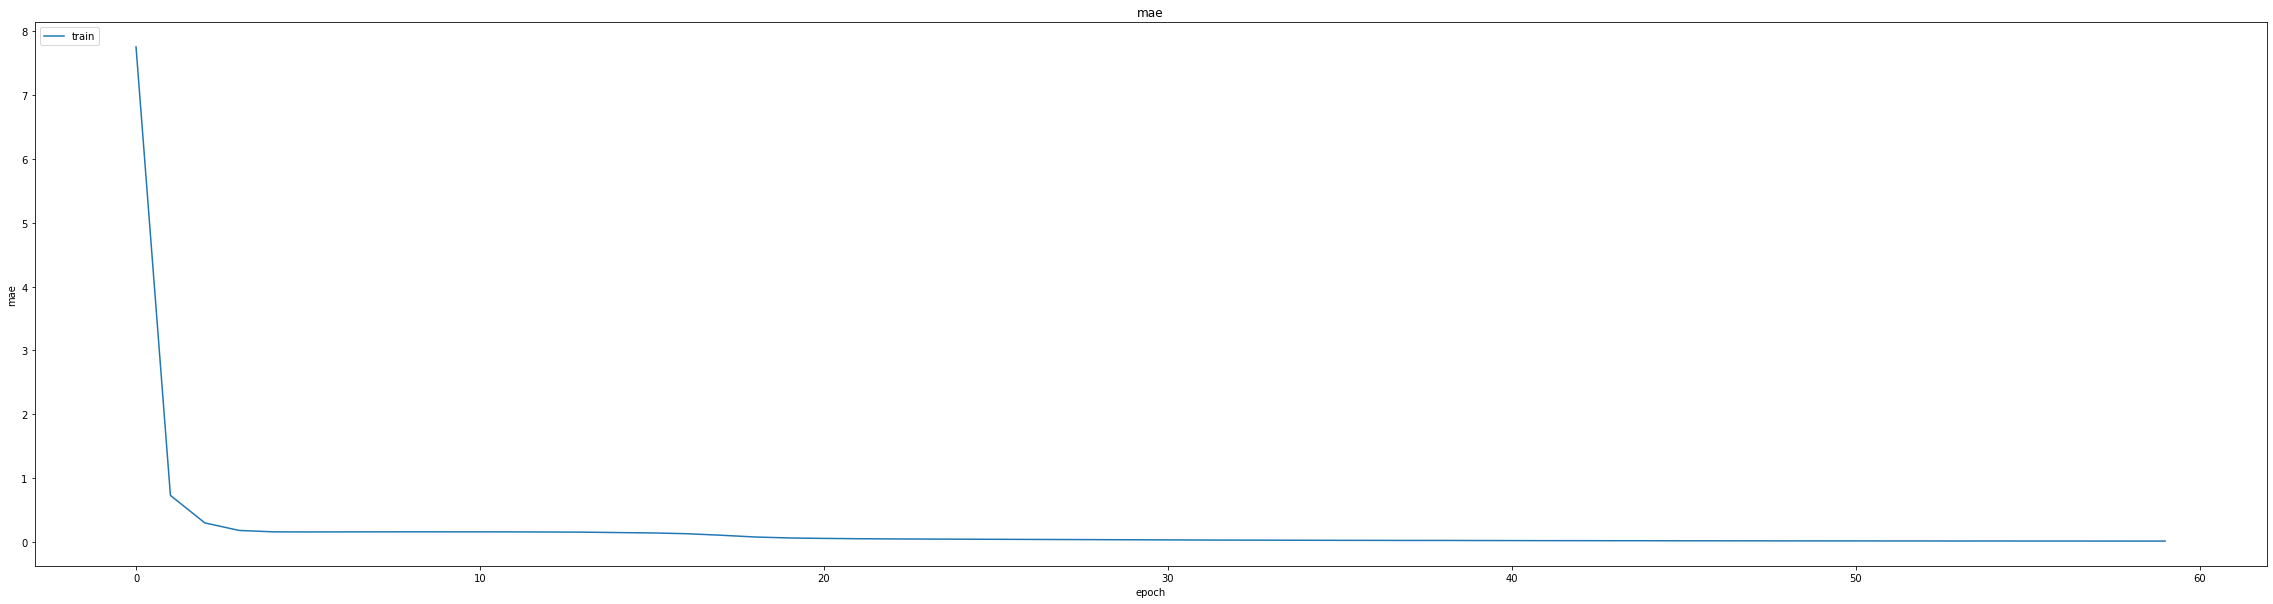

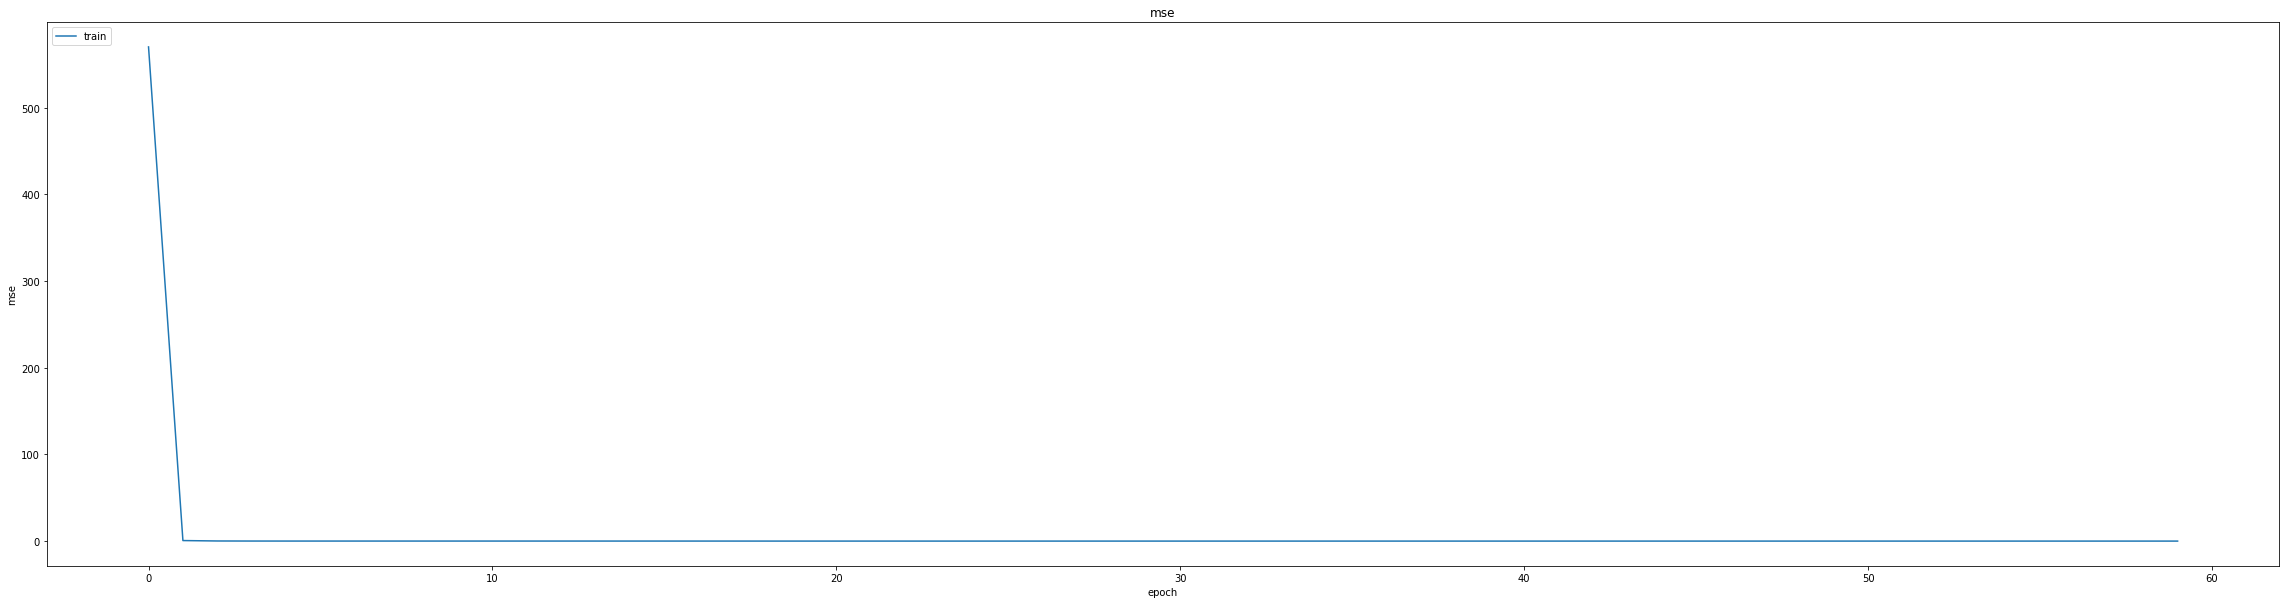

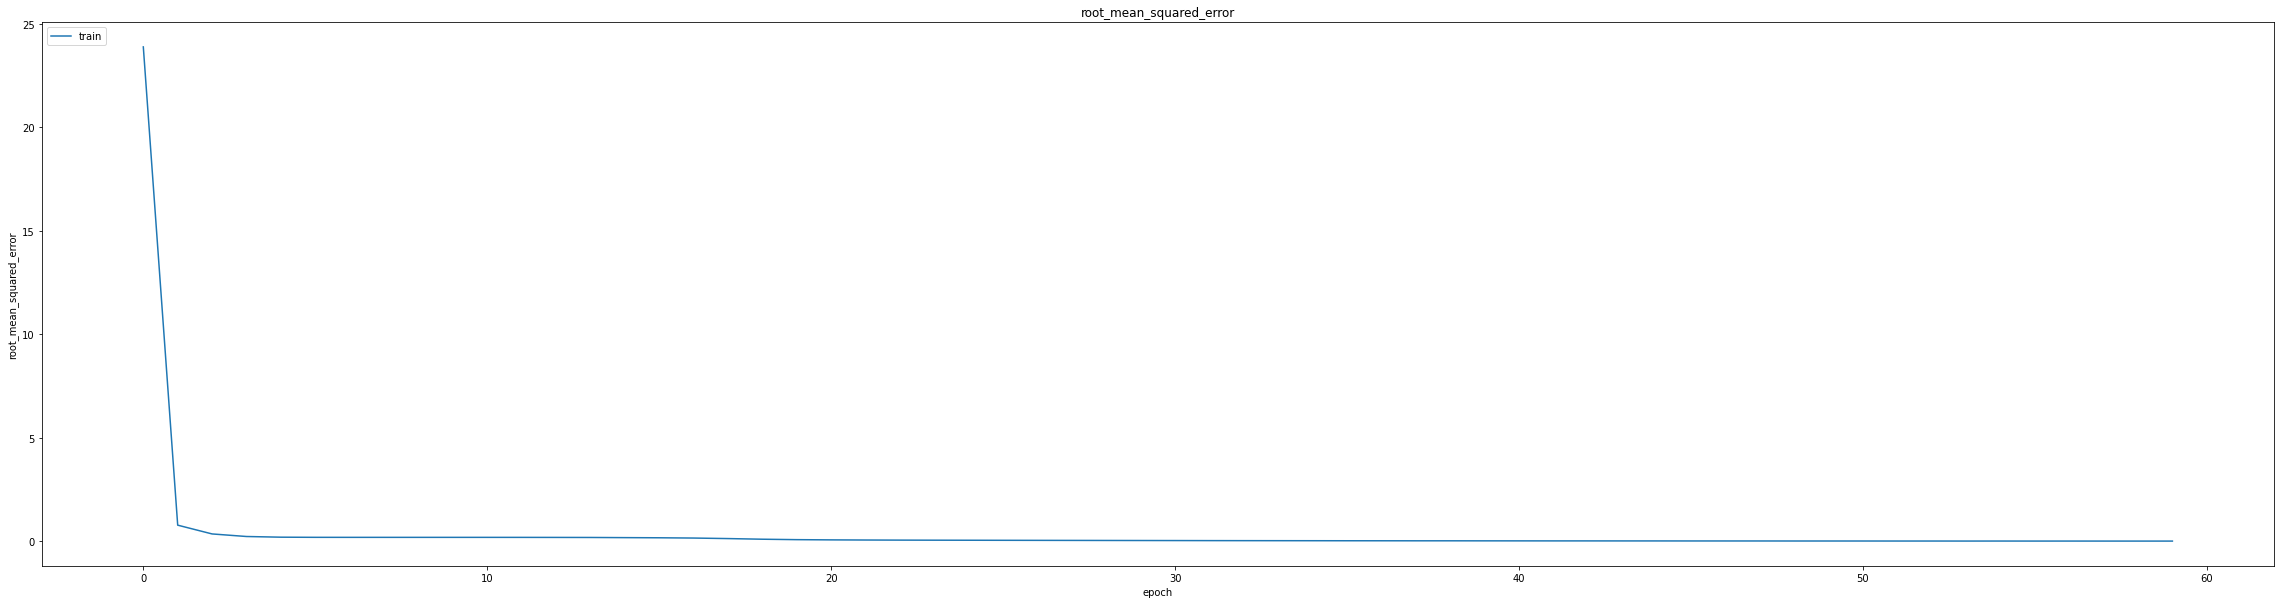

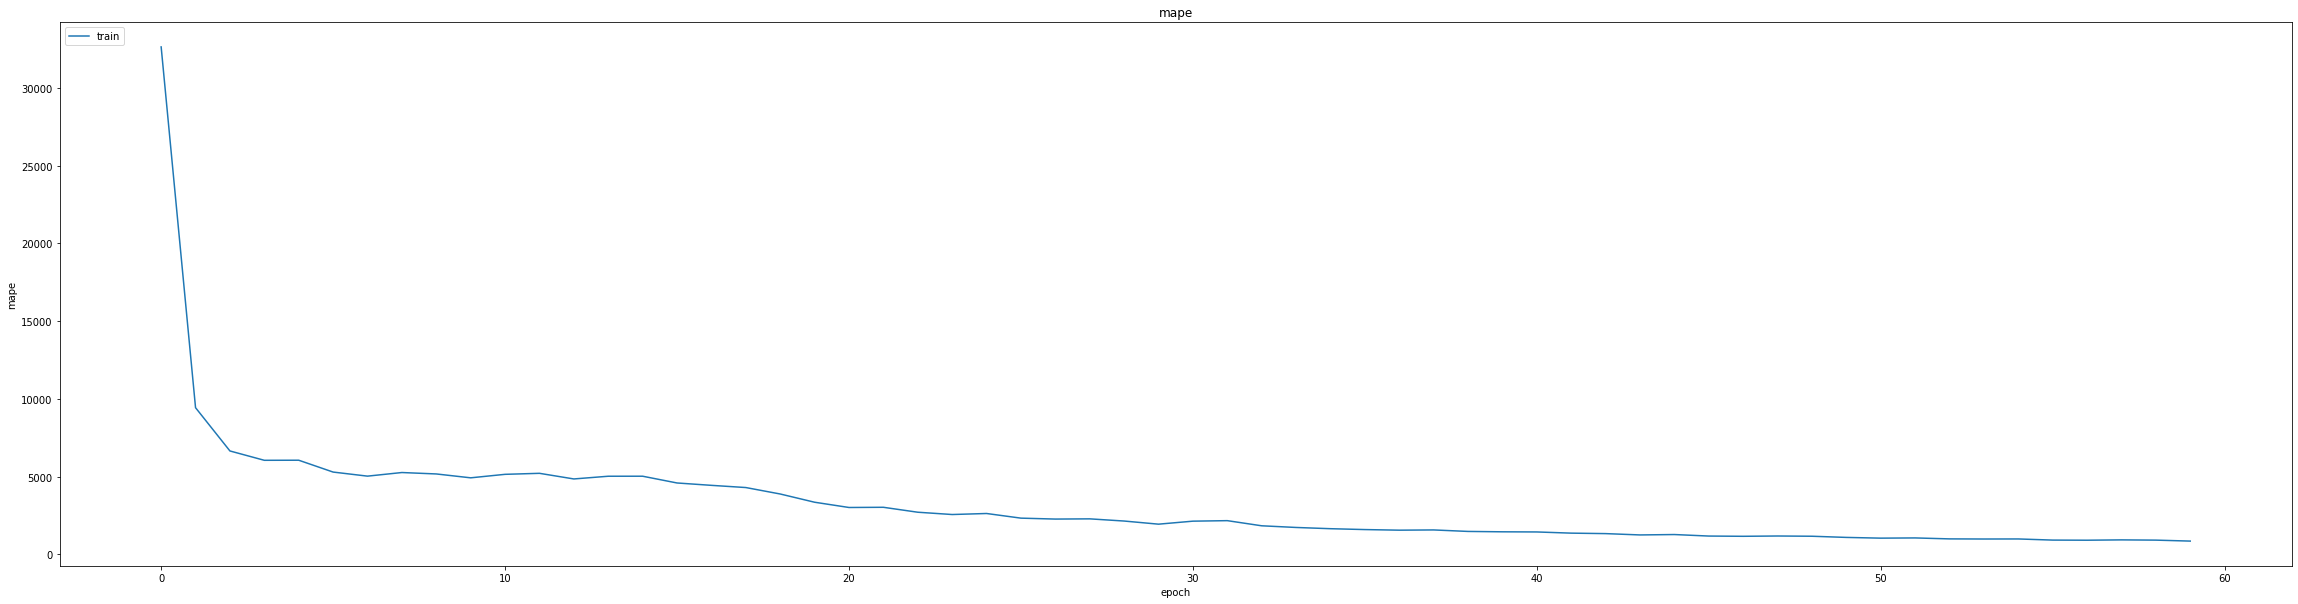

In [83]:
thesis.SummarizeHistory(history)

In [84]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009234542958438396
0.013217688538134098
1392/1392 [==============================] - 11s 7ms/step
0.9952402153878391


In [85]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [86]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


345/347 [============================>.] - ETA: 0s - loss: 9.3156e-04 - mae: 0.0141 - mse: 9.3156e-04 - root_mean_squared_error: 0.0305 - mape: 1020.2496
Epoch 1: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 50s 118ms/step - loss: 9.2678e-04 - mae: 0.0141 - mse: 9.2678e-04 - root_mean_squared_error: 0.0304 - mape: 1014.4326 - val_loss: 1.6355e-04 - val_mae: 0.0086 - val_mse: 1.6355e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 2840.5195 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 7.0859e-05 - mae: 0.0063 - mse: 7.0859e-05 - root_mean_squared_error: 0.0084 - mape: 959.1680
Epoch 2: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 7.0859e-05 - mae: 0.0063 - mse: 7.0859e-05 - root_mean_squared_error: 0.0084 - mape: 959.1680 - val_loss: 1.5418e-04 - val_mae: 0.0086 - val_mse: 1.5418e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 2652.3669 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
346/347 [============================>.] - ETA: 0s - loss: 6.1977e-05 - mae: 0.0059 - mse: 6.1977e-05 - root_mean_squared_error: 0.0079 - mape: 869.1172
Epoch 3: val_mse did not improve from 0.00015
347/347 [==============================] - 8s 23ms/step - loss: 6.1943e-05 - mae: 0.0059 - mse: 6.1943e-05 - root_mean_squared_error: 0.0079 - mape: 866.6546 - val_loss: 1.9644e-04 - val_mae: 0.0108 - val_mse: 1.9644e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 2548.6204 - lr: 9.0000e-04
Epoch 4/20
346/347 [============================>.] - ETA: 0s - loss: 7.1857e-05 - mae: 0.0065 - mse: 7.1857e-05 - root_mean_squared_error: 0.0085 - mape: 848.3

347/347 [==============================] - 40s 116ms/step - loss: 5.6374e-05 - mae: 0.0059 - mse: 5.6374e-05 - root_mean_squared_error: 0.0075 - mape: 575.6735 - val_loss: 1.4069e-04 - val_mae: 0.0086 - val_mse: 1.4069e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 1649.9785 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
347/347 [==============================] - ETA: 0s - loss: 4.3917e-05 - mae: 0.0052 - mse: 4.3917e-05 - root_mean_squared_error: 0.0066 - mape: 500.8995
Epoch 9: val_mse did not improve from 0.00014
347/347 [==============================] - 8s 23ms/step - loss: 4.3917e-05 - mae: 0.0052 - mse: 4.3917e-05 - root_mean_squared_error: 0.0066 - mape: 500.8995 - val_loss: 2.2815e-04 - val_mae: 0.0127 - val_mse: 2.2815e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 1480.1049 - lr: 6.5610e-04
Epoch 10/20
345/347 [============================>.] - ETA: 0s - loss: 4.3066e-05 - mae: 0.0051 - mse: 4.3066e-05 - root_mean_squared_error: 0.0066 - mape: 

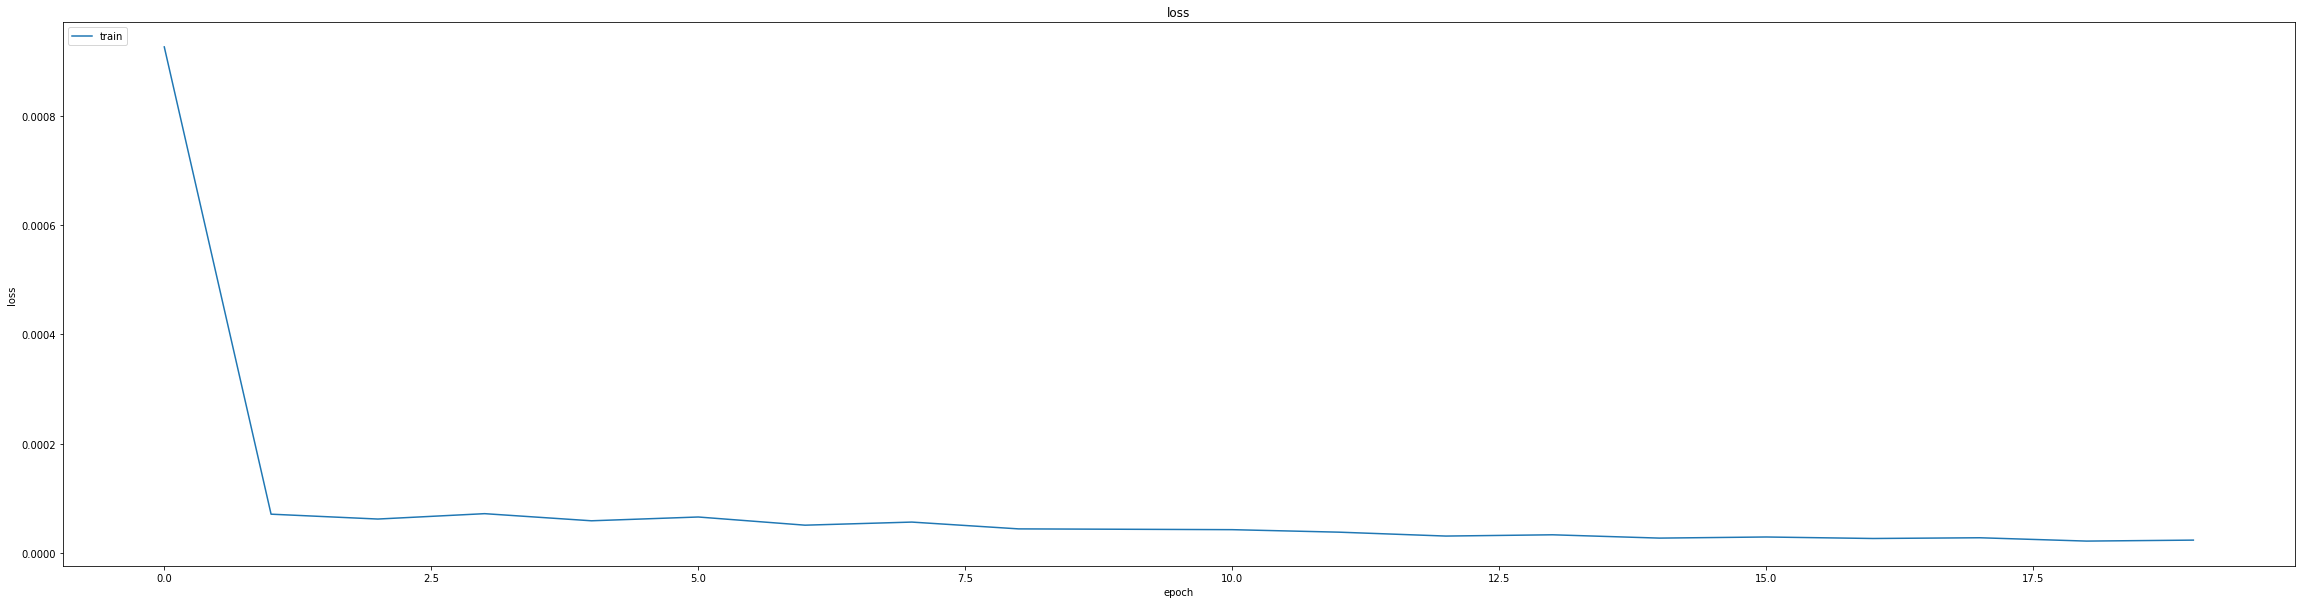

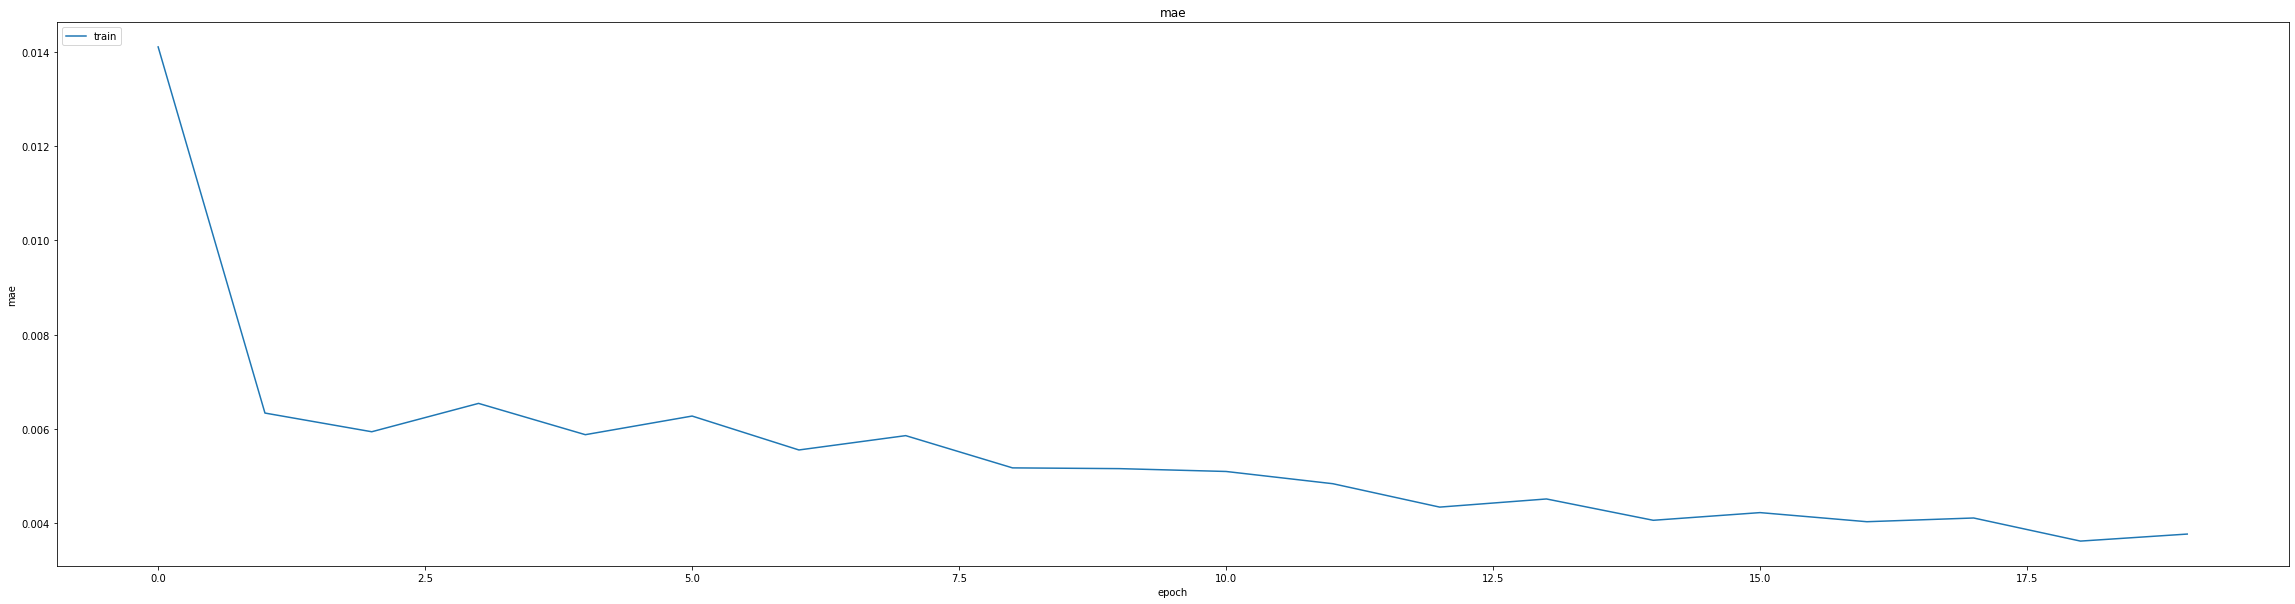

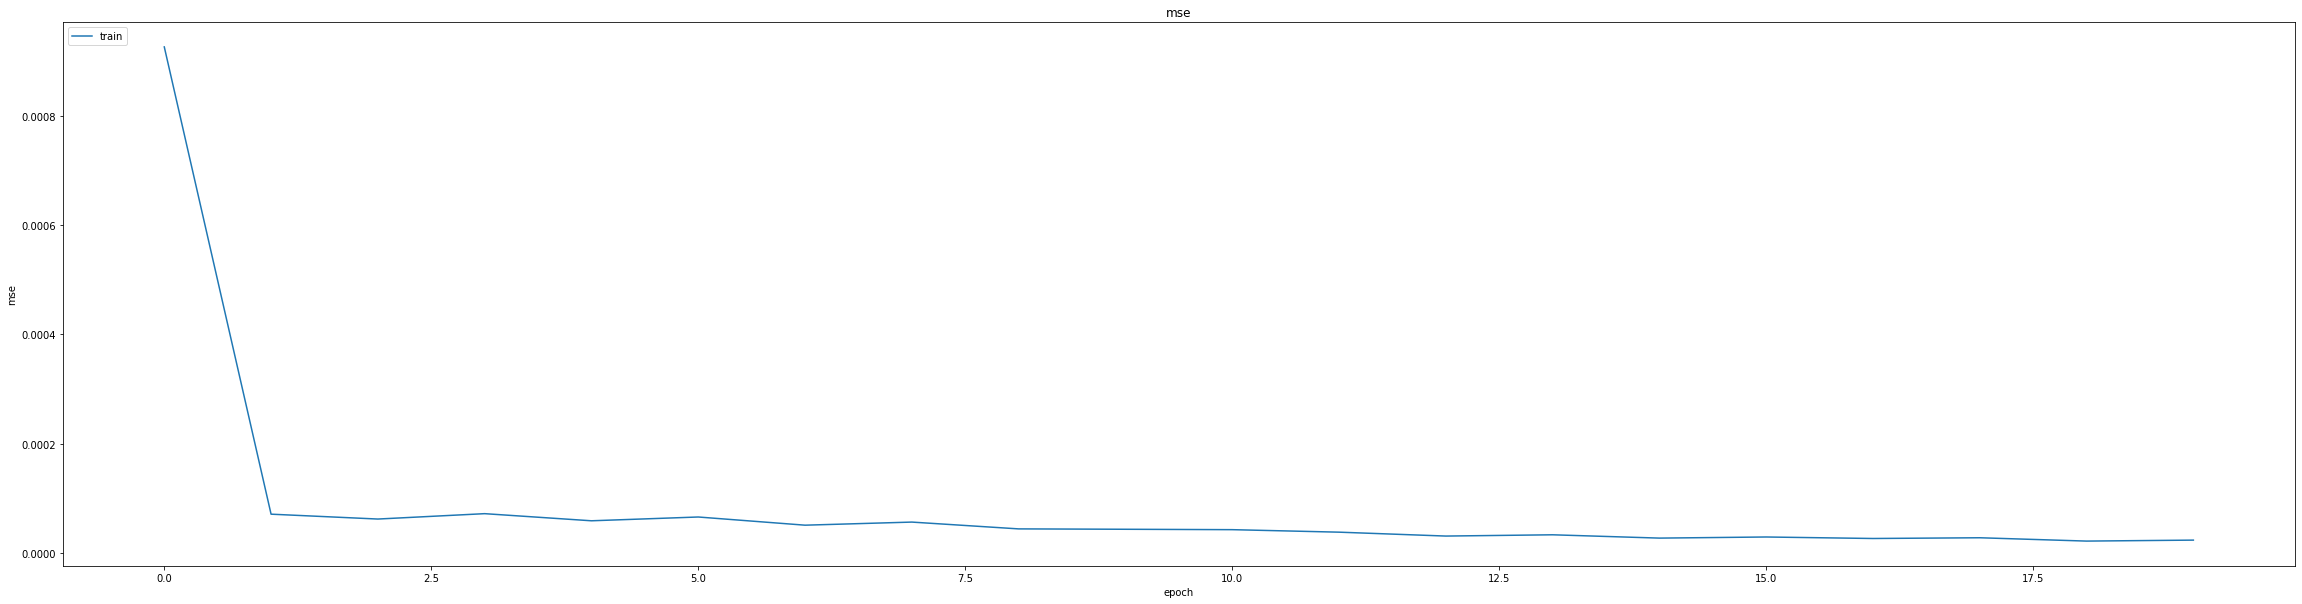

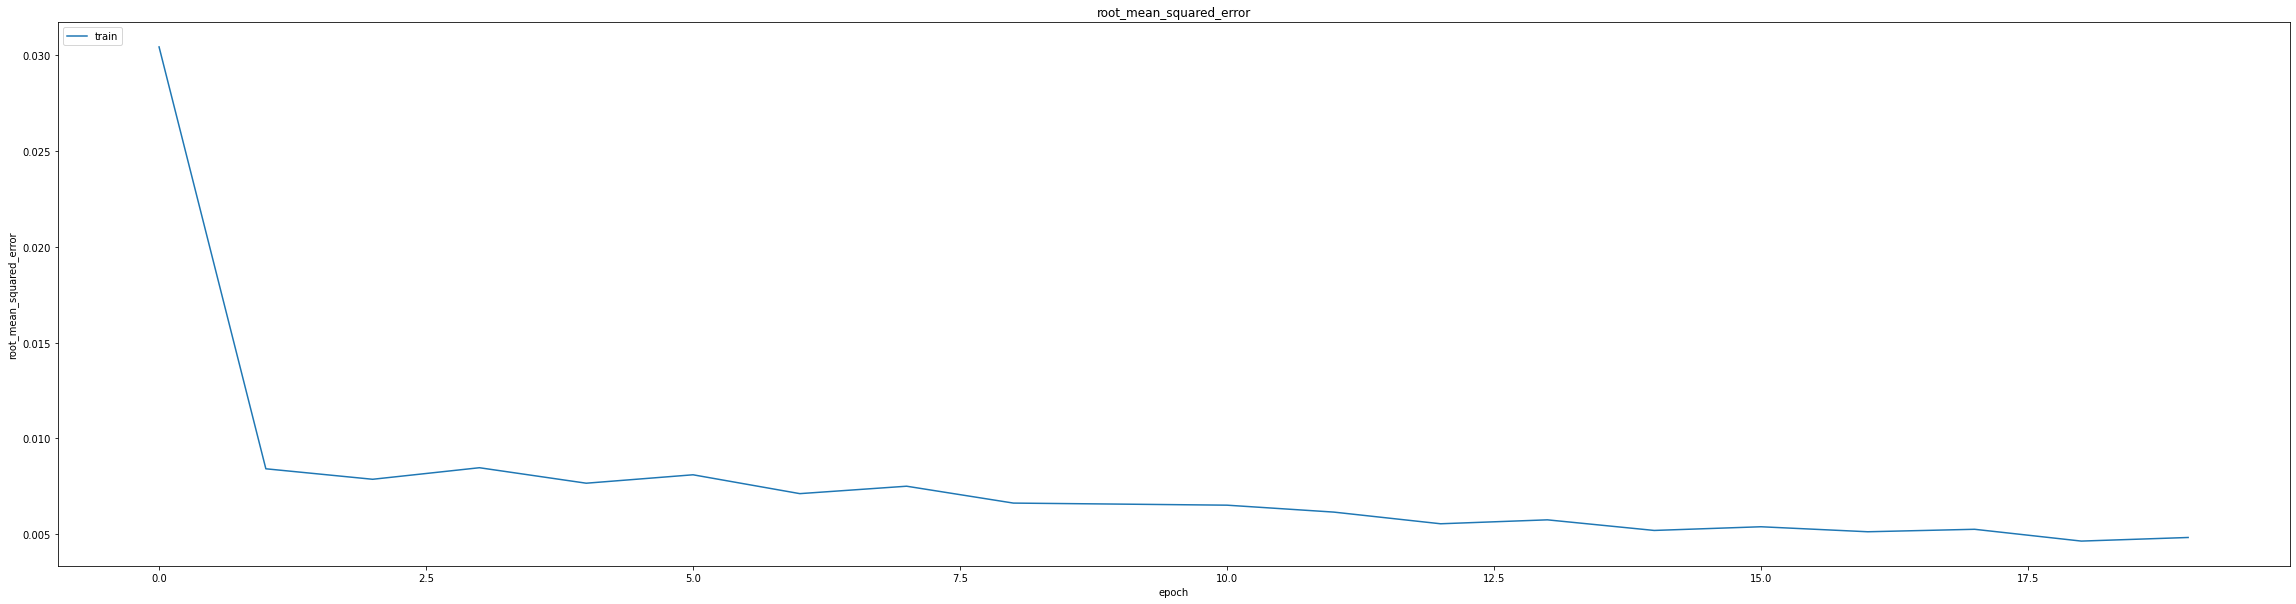

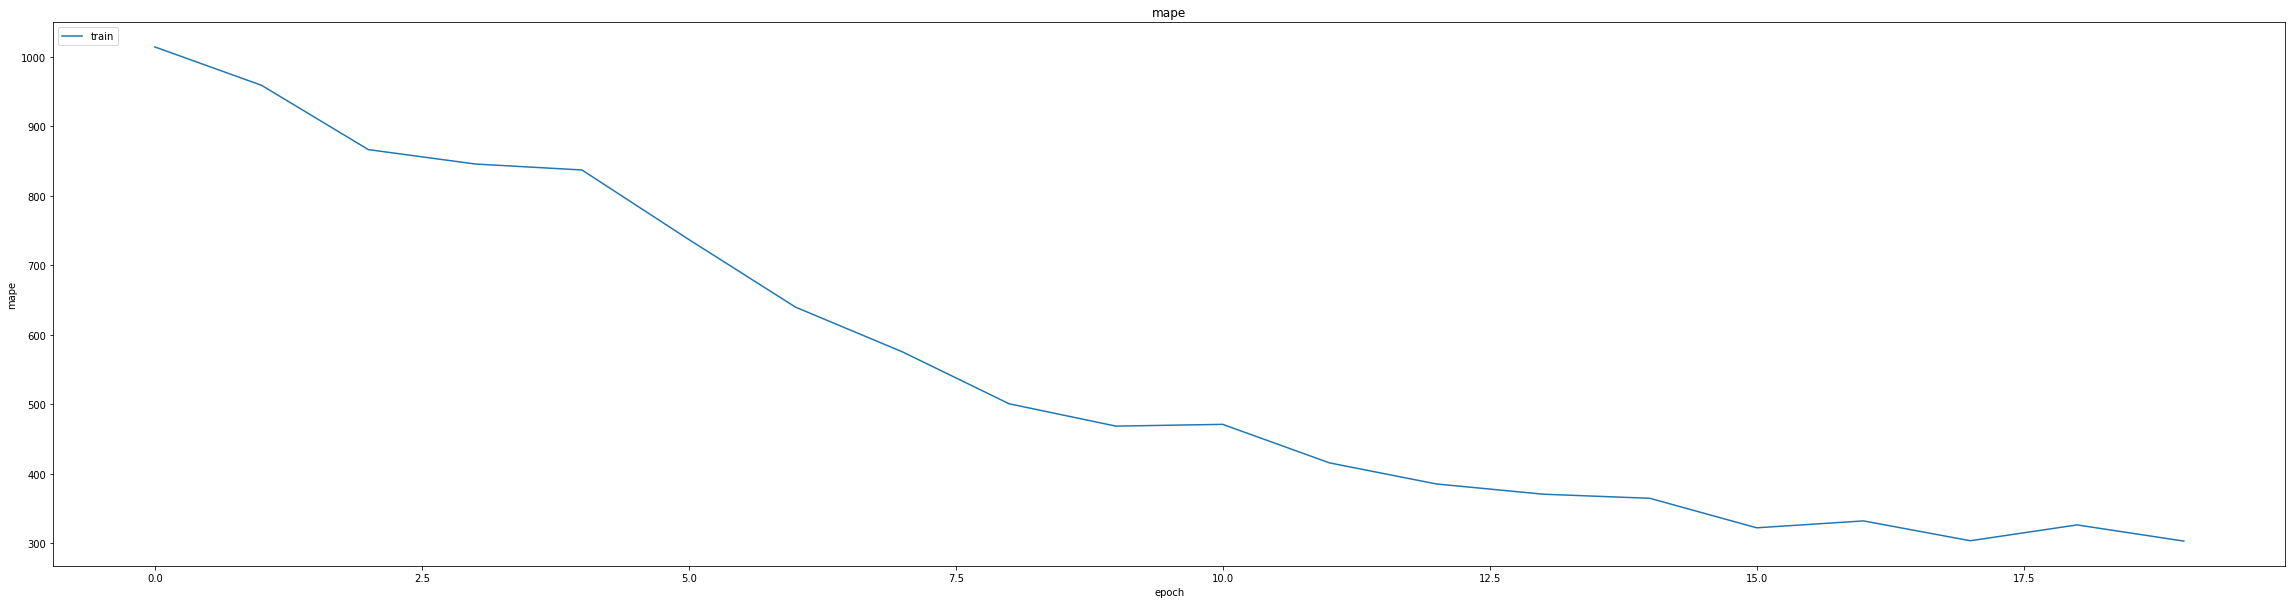

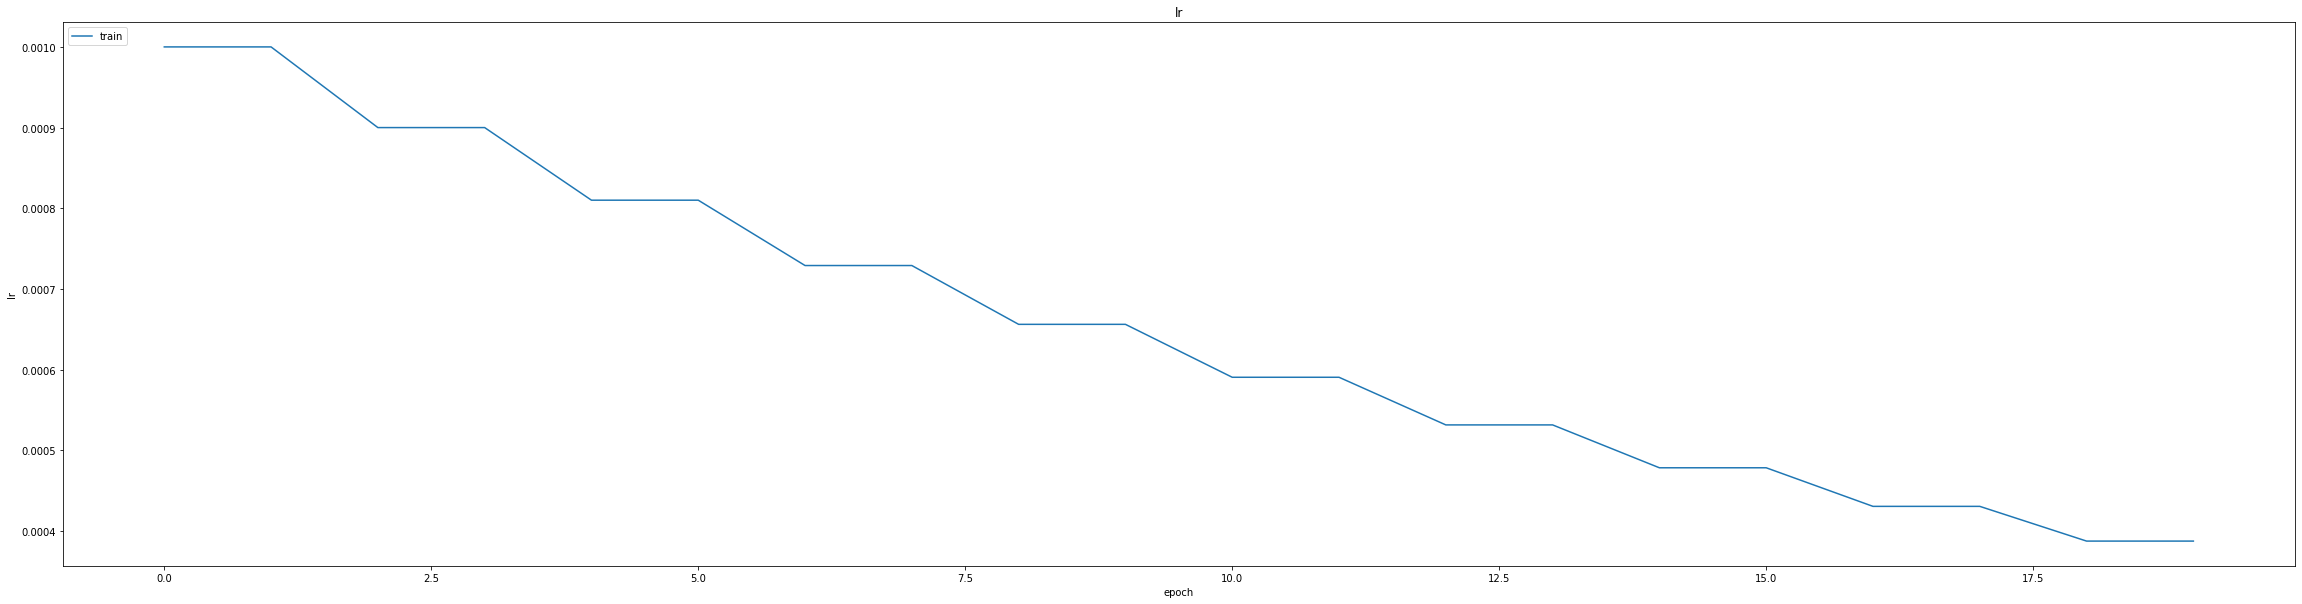

In [87]:
thesis.SummarizeHistory(history)

In [88]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00859703030437231
0.011861289851367474
1392/1392 [==============================] - 10s 6ms/step
0.9782379943801506


1392/1392 [==============================] - 9s 6ms/step


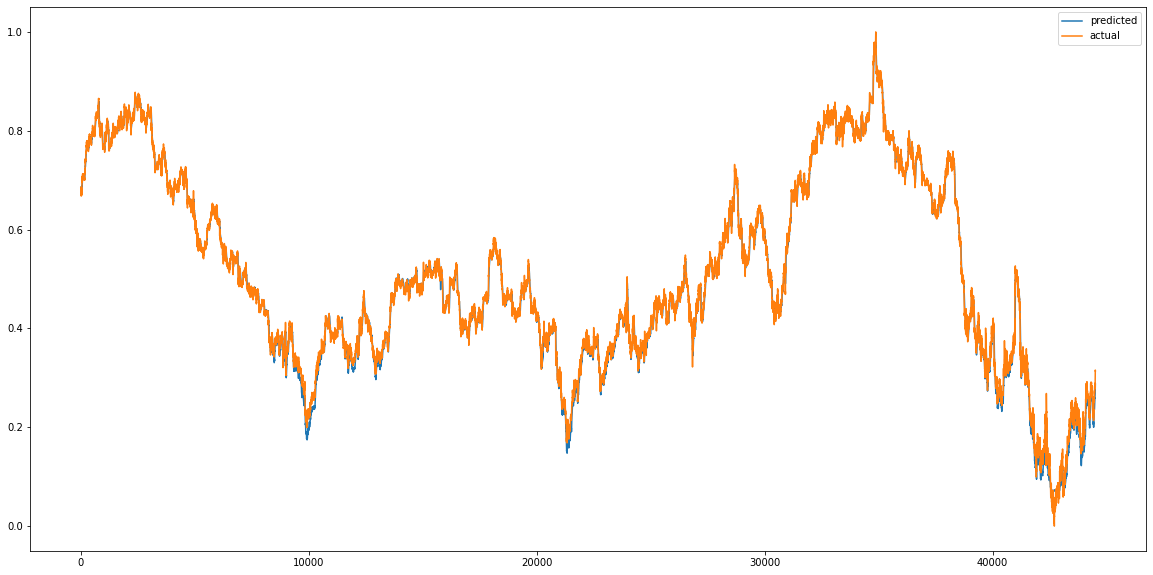

In [89]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


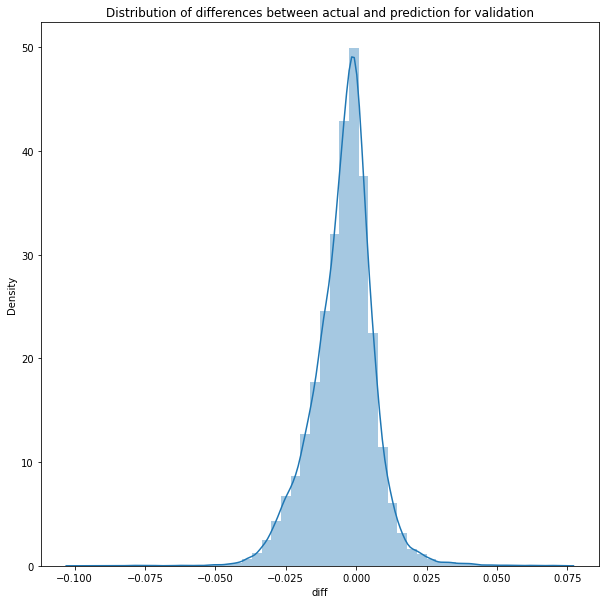

In [90]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 9s 6ms/step


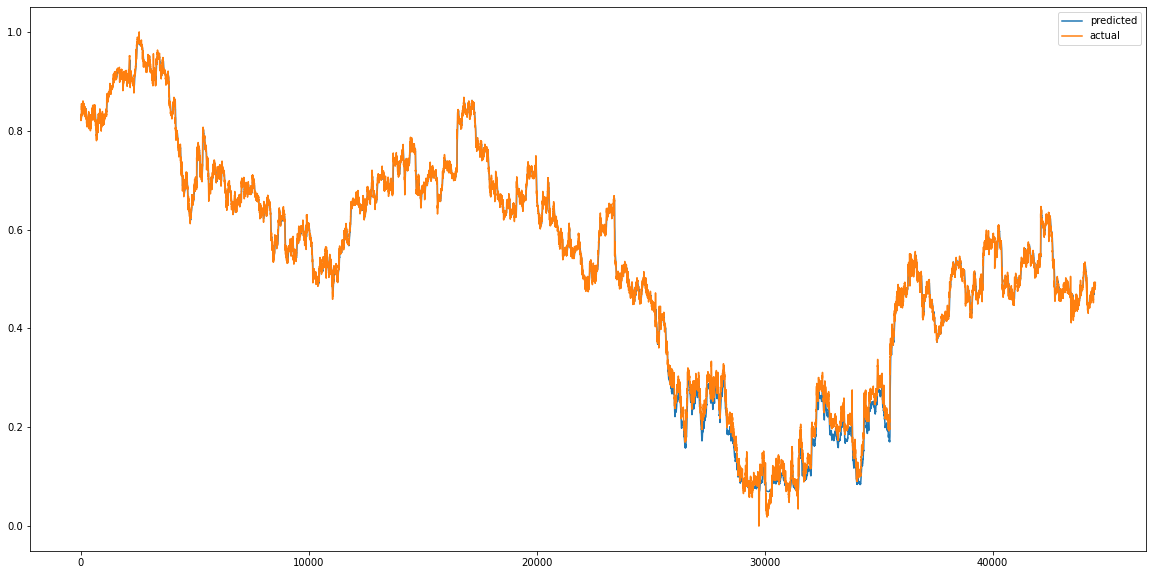

In [91]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


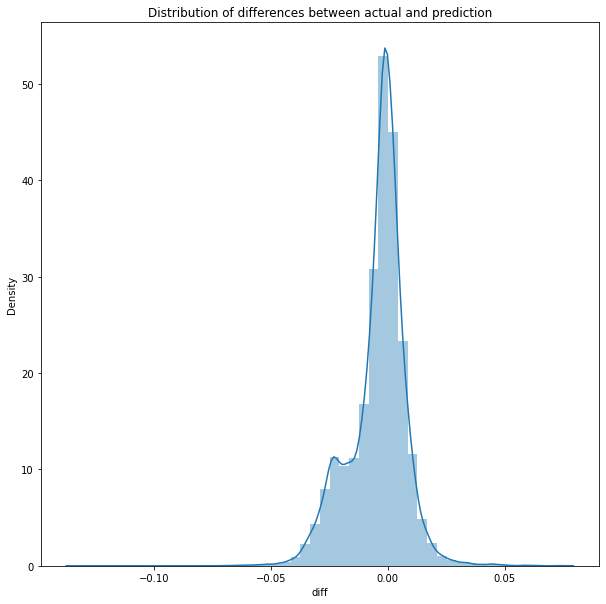

In [92]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0001641839735468414
RMSE :  0.012813429421776256
MAE :  0.00892805454996144
1392/1392 [==============================] - 10s 7ms/step
R2_Score  : 0.9966708103582861


count    44513.000000
mean        -0.004303
std          0.012069
min         -0.133334
25%         -0.009543
50%         -0.002113
75%          0.002638
max          0.075131
Name: diff, dtype: float64

**LSTM_MODEL**

In [94]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [95]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 520.5544 - mae: 8.1588 - mse: 520.5544 - root_mean_squared_error: 22.8157 - mape: 26057.9668
Epoch 1: val_mse improved from inf to 2.30678, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 22s 53ms/step - loss: 520.5544 - mae: 8.1588 - mse: 520.5544 - root_mean_squared_error: 22.8157 - mape: 26057.9668 - val_loss: 2.3068 - val_mae: 1.5067 - val_mse: 2.3068 - val_root_mean_squared_error: 1.5188 - val_mape: 45738.7188
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.9758 - mae: 0.9294 - mse: 0.9758 - root_mean_squared_error: 0.9878 - mape: 15967.2676
Epoch 2: val_mse improved from 2.30678 to 0.53548, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.9726 - mae: 0.9276 - mse: 0.9726 - root_mean_squared_error: 0.9862 - mape: 15876.6514 - val_loss: 0.5355 - val_mae: 0.7062 - val_mse: 0.5355 - val_root_mean_squared_error: 0.7318 - val_mape: 27548.5508
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.2319 - mae: 0.4233 - mse: 0.2319 - root_mean_squared_error: 0.4816 - mape: 7651.2227
Epoch 3: val_mse improved from 0.53548 to 0.20581, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.2316 - mae: 0.4229 - mse: 0.2316 - root_mean_squared_error: 0.4813 - mape: 7629.6899 - val_loss: 0.2058 - val_mae: 0.4114 - val_mse: 0.2058 - val_root_mean_squared_error: 0.4537 - val_mape: 20842.6816
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0795 - mae: 0.2171 - mse: 0.0795 - root_mean_squared_error: 0.2819 - mape: 6813.3774
Epoch 4: val_mse improved from 0.20581 to 0.09356, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0793 - mae: 0.2169 - mse: 0.0793 - root_mean_squared_error: 0.2816 - mape: 6774.6484 - val_loss: 0.0936 - val_mae: 0.2595 - val_mse: 0.0936 - val_root_mean_squared_error: 0.3059 - val_mape: 16917.9023
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0435 - mae: 0.1617 - mse: 0.0435 - root_mean_squared_error: 0.2085 - mape: 4918.7832
Epoch 5: val_mse improved from 0.09356 to 0.06146, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0435 - mae: 0.1617 - mse: 0.0435 - root_mean_squared_error: 0.2085 - mape: 4918.7832 - val_loss: 0.0615 - val_mae: 0.2122 - val_mse: 0.0615 - val_root_mean_squared_error: 0.2479 - val_mape: 15078.8916
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0396 - mae: 0.1598 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 4941.2588
Epoch 6: val_mse improved from 0.06146 to 0.05578, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0396 - mae: 0.1598 - mse: 0.0396 - root_mean_squared_error: 0.1990 - mape: 4927.3311 - val_loss: 0.0558 - val_mae: 0.2031 - val_mse: 0.0558 - val_root_mean_squared_error: 0.2362 - val_mape: 14643.3076
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0395 - mae: 0.1606 - mse: 0.0395 - root_mean_squared_error: 0.1986 - mape: 4775.4409
Epoch 7: val_mse improved from 0.05578 to 0.05511, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0395 - mae: 0.1606 - mse: 0.0395 - root_mean_squared_error: 0.1987 - mape: 4762.0034 - val_loss: 0.0551 - val_mae: 0.2020 - val_mse: 0.0551 - val_root_mean_squared_error: 0.2348 - val_mape: 14587.5498
Epoch 8/60
345/347 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1606 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 4524.2686
Epoch 8: val_mse improved from 0.05511 to 0.05487, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0394 - mae: 0.1606 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 4498.5874 - val_loss: 0.0549 - val_mae: 0.2016 - val_mse: 0.0549 - val_root_mean_squared_error: 0.2343 - val_mape: 14567.6680
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0394 - mae: 0.1608 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 4574.2734
Epoch 9: val_mse did not improve from 0.05487
347/347 [==============================] - 6s 17ms/step - loss: 0.0394 - mae: 0.1608 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 4574.2734 - val_loss: 0.0551 - val_mae: 0.2019 - val_mse: 0.0551 - val_root_mean_squared_error: 0.2346 - val_mape: 14582.8213
Epoch 10/60
345/347 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1606 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 4571.9419
Epoch 10: val_mse did not improve from 0.05487
347/347 [==============================] - 6s 17ms/step -

347/347 [==============================] - 17s 48ms/step - loss: 0.0394 - mae: 0.1607 - mse: 0.0394 - root_mean_squared_error: 0.1986 - mape: 5219.4248 - val_loss: 0.0548 - val_mae: 0.2015 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2341 - val_mape: 14559.9229
Epoch 12/60
344/347 [============================>.] - ETA: 0s - loss: 0.0394 - mae: 0.1606 - mse: 0.0394 - root_mean_squared_error: 0.1985 - mape: 5249.1514
Epoch 12: val_mse did not improve from 0.05478
347/347 [==============================] - 6s 17ms/step - loss: 0.0394 - mae: 0.1605 - mse: 0.0394 - root_mean_squared_error: 0.1984 - mape: 5204.2822 - val_loss: 0.0551 - val_mae: 0.2020 - val_mse: 0.0551 - val_root_mean_squared_error: 0.2347 - val_mape: 14585.3301
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1602 - mse: 0.0392 - root_mean_squared_error: 0.1980 - mape: 4337.0200
Epoch 13: val_mse did not improve from 0.05478
347/347 [==============================] - 6s 17ms/step

347/347 [==============================] - 17s 50ms/step - loss: 0.0391 - mae: 0.1599 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 4534.9136 - val_loss: 0.0547 - val_mae: 0.2014 - val_mse: 0.0547 - val_root_mean_squared_error: 0.2339 - val_mape: 14555.3965
Epoch 16/60
344/347 [============================>.] - ETA: 0s - loss: 0.0391 - mae: 0.1601 - mse: 0.0391 - root_mean_squared_error: 0.1977 - mape: 5456.3135
Epoch 16: val_mse did not improve from 0.05473
347/347 [==============================] - 6s 17ms/step - loss: 0.0391 - mae: 0.1601 - mse: 0.0391 - root_mean_squared_error: 0.1978 - mape: 5409.6997 - val_loss: 0.0554 - val_mae: 0.2025 - val_mse: 0.0554 - val_root_mean_squared_error: 0.2354 - val_mape: 14611.4736
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 0.0392 - mae: 0.1603 - mse: 0.0392 - root_mean_squared_error: 0.1979 - mape: 4633.0591
Epoch 17: val_mse did not improve from 0.05473
347/347 [==============================] - 6s 16ms/step

347/347 [==============================] - 17s 48ms/step - loss: 0.0379 - mae: 0.1573 - mse: 0.0379 - root_mean_squared_error: 0.1947 - mape: 4820.8696 - val_loss: 0.0547 - val_mae: 0.2013 - val_mse: 0.0547 - val_root_mean_squared_error: 0.2339 - val_mape: 14547.6201
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 0.0377 - mae: 0.1567 - mse: 0.0377 - root_mean_squared_error: 0.1941 - mape: 5066.7280
Epoch 28: val_mse did not improve from 0.05469
347/347 [==============================] - 6s 17ms/step - loss: 0.0376 - mae: 0.1567 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 5037.9326 - val_loss: 0.0564 - val_mae: 0.2041 - val_mse: 0.0564 - val_root_mean_squared_error: 0.2376 - val_mape: 14681.5273
Epoch 29/60
347/347 [==============================] - ETA: 0s - loss: 0.0369 - mae: 0.1551 - mse: 0.0369 - root_mean_squared_error: 0.1922 - mape: 4717.3853
Epoch 29: val_mse improved from 0.05469 to 0.05447, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 16s 46ms/step - loss: 0.0369 - mae: 0.1551 - mse: 0.0369 - root_mean_squared_error: 0.1922 - mape: 4717.3853 - val_loss: 0.0545 - val_mae: 0.2005 - val_mse: 0.0545 - val_root_mean_squared_error: 0.2334 - val_mape: 14459.9971
Epoch 30/60
345/347 [============================>.] - ETA: 0s - loss: 0.0241 - mae: 0.1207 - mse: 0.0241 - root_mean_squared_error: 0.1553 - mape: 4537.0410
Epoch 30: val_mse improved from 0.05447 to 0.00553, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0240 - mae: 0.1205 - mse: 0.0240 - root_mean_squared_error: 0.1550 - mape: 4511.1743 - val_loss: 0.0055 - val_mae: 0.0550 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0744 - val_mape: 8123.4072
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 0.0074 - mae: 0.0680 - mse: 0.0074 - root_mean_squared_error: 0.0862 - mape: 2822.4395
Epoch 31: val_mse improved from 0.00553 to 0.00390, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0074 - mae: 0.0680 - mse: 0.0074 - root_mean_squared_error: 0.0862 - mape: 2814.4692 - val_loss: 0.0039 - val_mae: 0.0433 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0625 - val_mape: 7383.9824
Epoch 32/60
344/347 [============================>.] - ETA: 0s - loss: 0.0050 - mae: 0.0547 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 2726.9426
Epoch 32: val_mse did not improve from 0.00390
347/347 [==============================] - 6s 17ms/step - loss: 0.0050 - mae: 0.0547 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 2703.5945 - val_loss: 0.0040 - val_mae: 0.0541 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 6304.7217
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 0.0039 - mae: 0.0484 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 2120.1873
Epoch 33: val_mse improved from 0.00390 to 0.00153, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 17s 49ms/step - loss: 0.0039 - mae: 0.0483 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 2114.2036 - val_loss: 0.0015 - val_mae: 0.0259 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0391 - val_mape: 5769.7695
Epoch 34/60
344/347 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0437 - mse: 0.0032 - root_mean_squared_error: 0.0563 - mape: 1908.1490
Epoch 34: val_mse did not improve from 0.00153
347/347 [==============================] - 6s 17ms/step - loss: 0.0032 - mae: 0.0437 - mse: 0.0032 - root_mean_squared_error: 0.0563 - mape: 1891.8073 - val_loss: 0.0016 - val_mae: 0.0307 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 5404.6094
Epoch 35/60
344/347 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0399 - mse: 0.0027 - root_mean_squared_error: 0.0515 - mape: 1818.0371
Epoch 35: val_mse improved from 0.00153 to 0.00136, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 18s 51ms/step - loss: 0.0026 - mae: 0.0398 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 1802.4602 - val_loss: 0.0014 - val_mae: 0.0269 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 5133.7710
Epoch 36/60
345/347 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2297.7998
Epoch 36: val_mse improved from 0.00136 to 0.00101, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0022 - mae: 0.0365 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2284.6946 - val_loss: 0.0010 - val_mae: 0.0219 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 4919.5229
Epoch 37/60
345/347 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1634.1091
Epoch 37: val_mse improved from 0.00101 to 0.00093, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0430 - mape: 1624.8047 - val_loss: 9.2951e-04 - val_mae: 0.0218 - val_mse: 9.2951e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 4601.8062
Epoch 38/60
345/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1561.8778
Epoch 38: val_mse improved from 0.00093 to 0.00072, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0015 - mae: 0.0301 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1552.9746 - val_loss: 7.2369e-04 - val_mae: 0.0181 - val_mse: 7.2369e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 4459.1333
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 1647.2932
Epoch 39: val_mse did not improve from 0.00072
347/347 [==============================] - 6s 17ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 1647.2932 - val_loss: 9.3249e-04 - val_mae: 0.0232 - val_mse: 9.3249e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 4233.2603
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1421.5143
Epoch 40: val_mse improved from 0.00072 to 0.00059, saving model to /content/drive/MyDri

347/347 [==============================] - 17s 49ms/step - loss: 0.0010 - mae: 0.0246 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1417.4948 - val_loss: 5.9387e-04 - val_mae: 0.0167 - val_mse: 5.9387e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 4032.1870
Epoch 41/60
346/347 [============================>.] - ETA: 0s - loss: 8.5082e-04 - mae: 0.0227 - mse: 8.5082e-04 - root_mean_squared_error: 0.0292 - mape: 1381.4680
Epoch 41: val_mse improved from 0.00059 to 0.00052, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 8.5041e-04 - mae: 0.0227 - mse: 8.5041e-04 - root_mean_squared_error: 0.0292 - mape: 1377.5604 - val_loss: 5.1906e-04 - val_mae: 0.0158 - val_mse: 5.1906e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 3860.0085
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 6.9322e-04 - mae: 0.0205 - mse: 6.9322e-04 - root_mean_squared_error: 0.0263 - mape: 1277.0149
Epoch 42: val_mse improved from 0.00052 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 6.9275e-04 - mae: 0.0205 - mse: 6.9275e-04 - root_mean_squared_error: 0.0263 - mape: 1269.7362 - val_loss: 4.6787e-04 - val_mae: 0.0152 - val_mse: 4.6787e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 3643.9570
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 5.6035e-04 - mae: 0.0184 - mse: 5.6035e-04 - root_mean_squared_error: 0.0237 - mape: 1352.3265
Epoch 43: val_mse improved from 0.00047 to 0.00044, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 5.6035e-04 - mae: 0.0184 - mse: 5.6035e-04 - root_mean_squared_error: 0.0237 - mape: 1352.3265 - val_loss: 4.3733e-04 - val_mae: 0.0145 - val_mse: 4.3733e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3501.0159
Epoch 44/60
344/347 [============================>.] - ETA: 0s - loss: 4.7338e-04 - mae: 0.0170 - mse: 4.7338e-04 - root_mean_squared_error: 0.0218 - mape: 1235.6057
Epoch 44: val_mse improved from 0.00044 to 0.00041, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 4.7397e-04 - mae: 0.0170 - mse: 4.7397e-04 - root_mean_squared_error: 0.0218 - mape: 1225.0068 - val_loss: 4.1216e-04 - val_mae: 0.0142 - val_mse: 4.1216e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3403.3042
Epoch 45/60
345/347 [============================>.] - ETA: 0s - loss: 4.0448e-04 - mae: 0.0156 - mse: 4.0448e-04 - root_mean_squared_error: 0.0201 - mape: 1163.7330
Epoch 45: val_mse improved from 0.00041 to 0.00038, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 4.0391e-04 - mae: 0.0156 - mse: 4.0391e-04 - root_mean_squared_error: 0.0201 - mape: 1157.0917 - val_loss: 3.7994e-04 - val_mae: 0.0134 - val_mse: 3.7994e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 3308.5708
Epoch 46/60
346/347 [============================>.] - ETA: 0s - loss: 3.4289e-04 - mae: 0.0144 - mse: 3.4289e-04 - root_mean_squared_error: 0.0185 - mape: 1247.6761
Epoch 46: val_mse did not improve from 0.00038
347/347 [==============================] - 6s 17ms/step - loss: 3.4301e-04 - mae: 0.0144 - mse: 3.4301e-04 - root_mean_squared_error: 0.0185 - mape: 1244.1438 - val_loss: 3.8623e-04 - val_mae: 0.0141 - val_mse: 3.8623e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 3180.6301
Epoch 47/60
346/347 [============================>.] - ETA: 0s - loss: 3.1744e-04 - mae: 0.0139 - mse: 3.1744e-04 - root_mean_squared_error: 0.0178 - mape: 1010.0995
Epoch 47: val_mse improved from 0.00038 to 0.00035, savi

347/347 [==============================] - 17s 49ms/step - loss: 3.1726e-04 - mae: 0.0139 - mse: 3.1726e-04 - root_mean_squared_error: 0.0178 - mape: 1007.2398 - val_loss: 3.4828e-04 - val_mae: 0.0131 - val_mse: 3.4828e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 3082.4731
Epoch 48/60
346/347 [============================>.] - ETA: 0s - loss: 2.6766e-04 - mae: 0.0127 - mse: 2.6766e-04 - root_mean_squared_error: 0.0164 - mape: 1078.2308
Epoch 48: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 17ms/step - loss: 2.6803e-04 - mae: 0.0127 - mse: 2.6803e-04 - root_mean_squared_error: 0.0164 - mape: 1075.1798 - val_loss: 3.8029e-04 - val_mae: 0.0143 - val_mse: 3.8029e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2983.5698
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 2.5747e-04 - mae: 0.0125 - mse: 2.5747e-04 - root_mean_squared_error: 0.0160 - mape: 907.2464
Epoch 49: val_mse improved from 0.00035 to 0.00033, savin

347/347 [==============================] - 18s 51ms/step - loss: 2.5712e-04 - mae: 0.0125 - mse: 2.5712e-04 - root_mean_squared_error: 0.0160 - mape: 902.0714 - val_loss: 3.2638e-04 - val_mae: 0.0129 - val_mse: 3.2638e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 2750.8284
Epoch 50/60
347/347 [==============================] - ETA: 0s - loss: 2.2646e-04 - mae: 0.0118 - mse: 2.2646e-04 - root_mean_squared_error: 0.0150 - mape: 1139.1002
Epoch 50: val_mse did not improve from 0.00033
347/347 [==============================] - 6s 17ms/step - loss: 2.2646e-04 - mae: 0.0118 - mse: 2.2646e-04 - root_mean_squared_error: 0.0150 - mape: 1139.1002 - val_loss: 3.9942e-04 - val_mae: 0.0155 - val_mse: 3.9942e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 2647.3975
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 2.4549e-04 - mae: 0.0120 - mse: 2.4549e-04 - root_mean_squared_error: 0.0157 - mape: 885.3921
Epoch 51: val_mse did not improve from 0.00033
347/347 [==

347/347 [==============================] - 17s 48ms/step - loss: 1.6923e-04 - mae: 0.0102 - mse: 1.6923e-04 - root_mean_squared_error: 0.0130 - mape: 782.6990 - val_loss: 2.9965e-04 - val_mae: 0.0127 - val_mse: 2.9965e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2156.8613
Epoch 53/60
345/347 [============================>.] - ETA: 0s - loss: 1.7996e-04 - mae: 0.0105 - mse: 1.7996e-04 - root_mean_squared_error: 0.0134 - mape: 821.3073
Epoch 53: val_mse improved from 0.00030 to 0.00030, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 1.7954e-04 - mae: 0.0105 - mse: 1.7954e-04 - root_mean_squared_error: 0.0134 - mape: 816.6188 - val_loss: 2.9922e-04 - val_mae: 0.0127 - val_mse: 2.9922e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2052.5024
Epoch 54/60
346/347 [============================>.] - ETA: 0s - loss: 1.5772e-04 - mae: 0.0098 - mse: 1.5772e-04 - root_mean_squared_error: 0.0126 - mape: 668.4543
Epoch 54: val_mse improved from 0.00030 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 1.5768e-04 - mae: 0.0098 - mse: 1.5768e-04 - root_mean_squared_error: 0.0126 - mape: 666.5626 - val_loss: 2.8075e-04 - val_mae: 0.0122 - val_mse: 2.8075e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 2011.2639
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 1.5674e-04 - mae: 0.0098 - mse: 1.5674e-04 - root_mean_squared_error: 0.0125 - mape: 674.8031
Epoch 55: val_mse did not improve from 0.00028
347/347 [==============================] - 6s 17ms/step - loss: 1.5682e-04 - mae: 0.0098 - mse: 1.5682e-04 - root_mean_squared_error: 0.0125 - mape: 672.8940 - val_loss: 3.9564e-04 - val_mae: 0.0159 - val_mse: 3.9564e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 1888.9404
Epoch 56/60
344/347 [============================>.] - ETA: 0s - loss: 1.5158e-04 - mae: 0.0097 - mse: 1.5158e-04 - root_mean_squared_error: 0.0123 - mape: 631.7105
Epoch 56: val_mse did not improve from 0.00028
347/347 [====

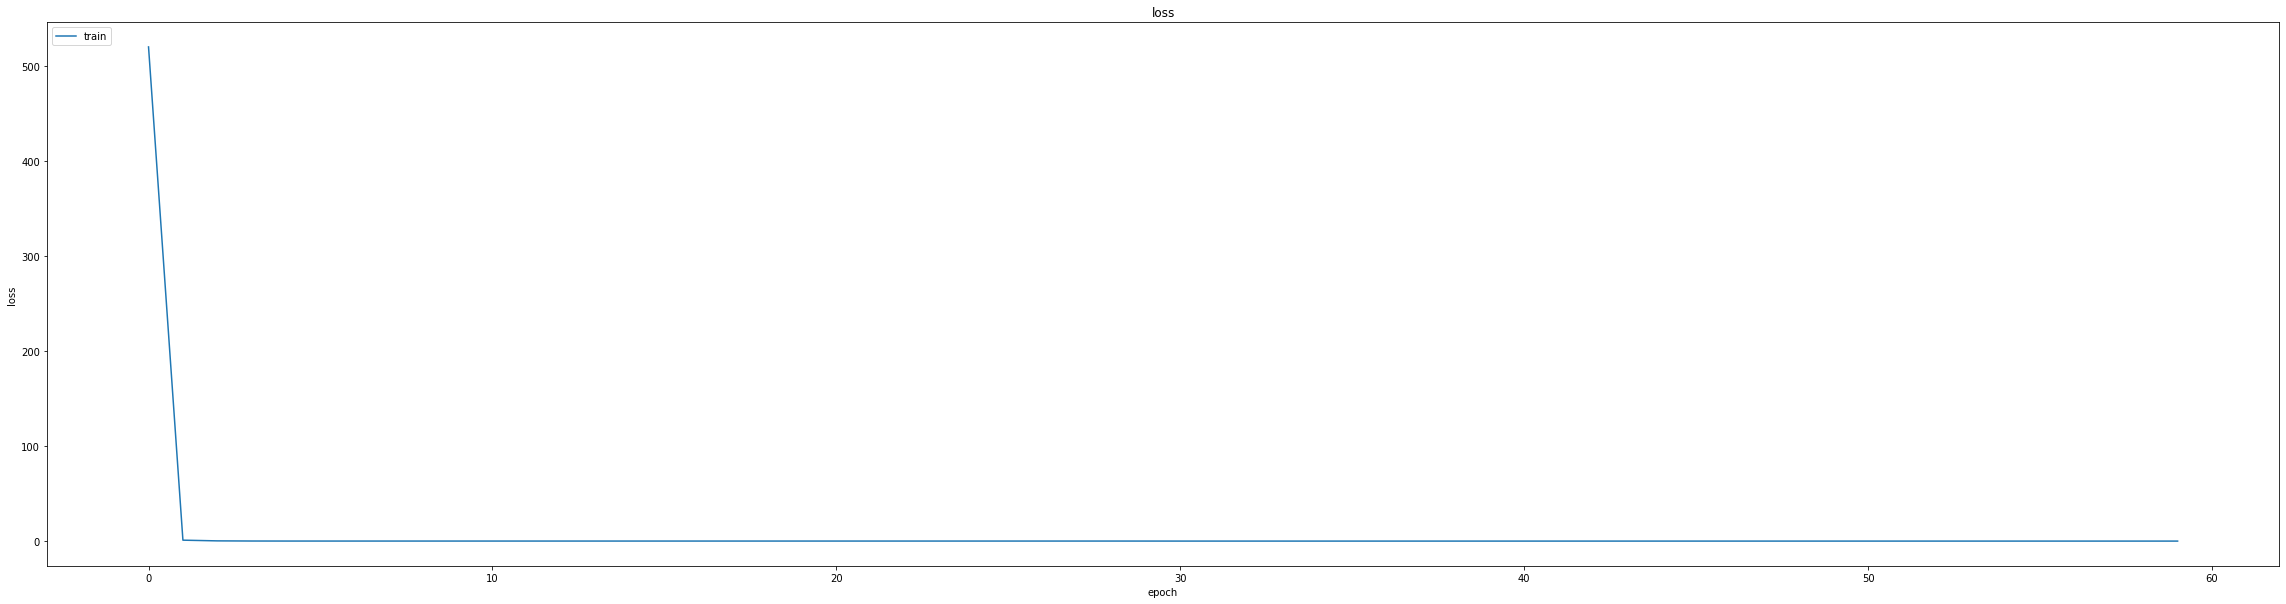

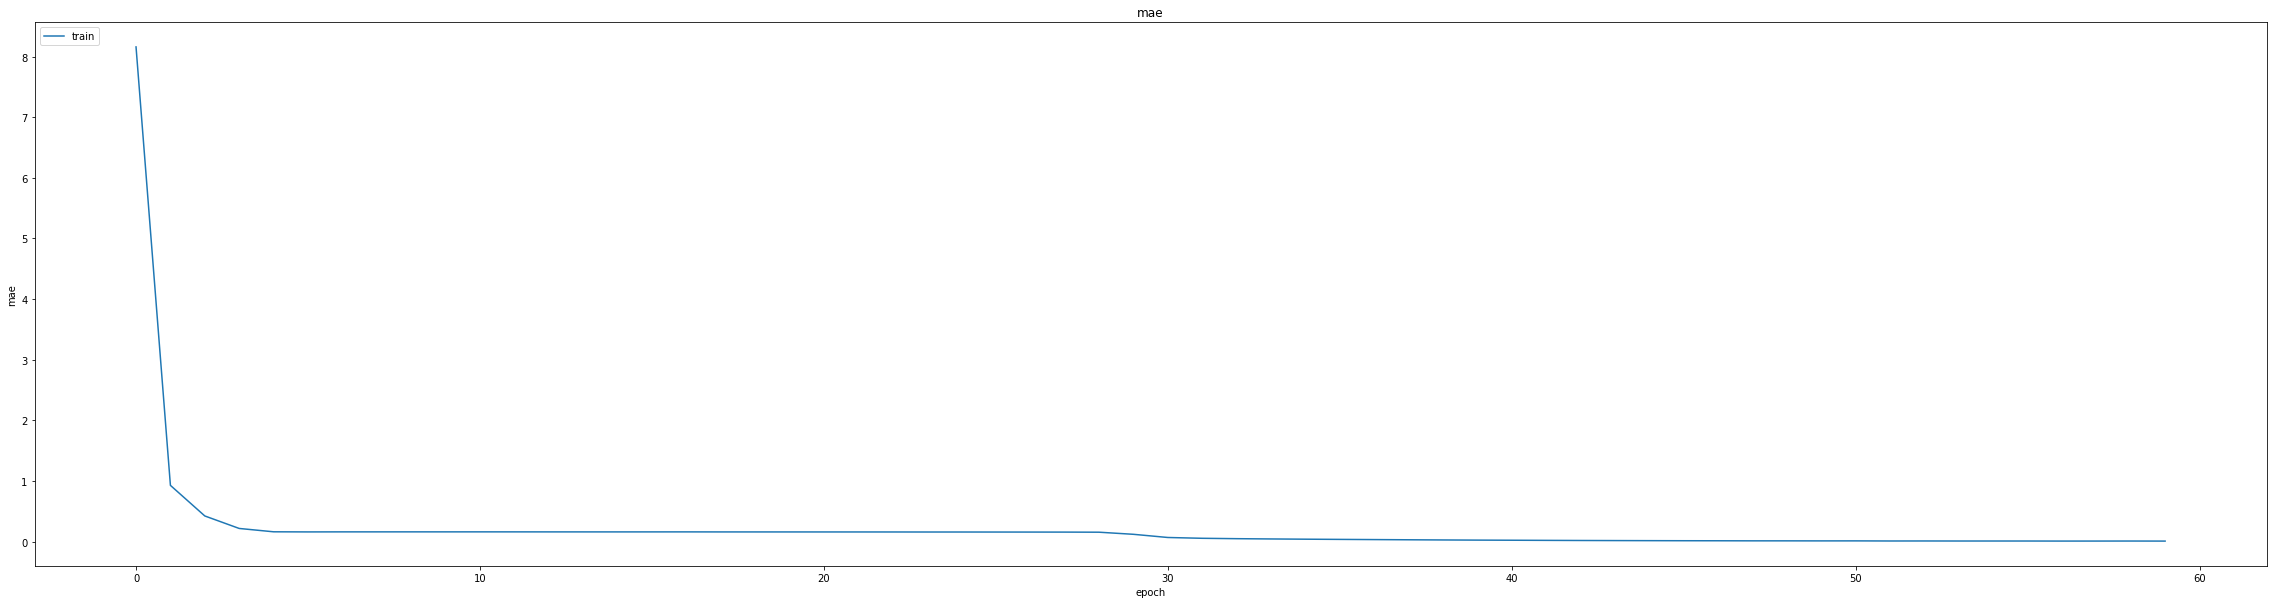

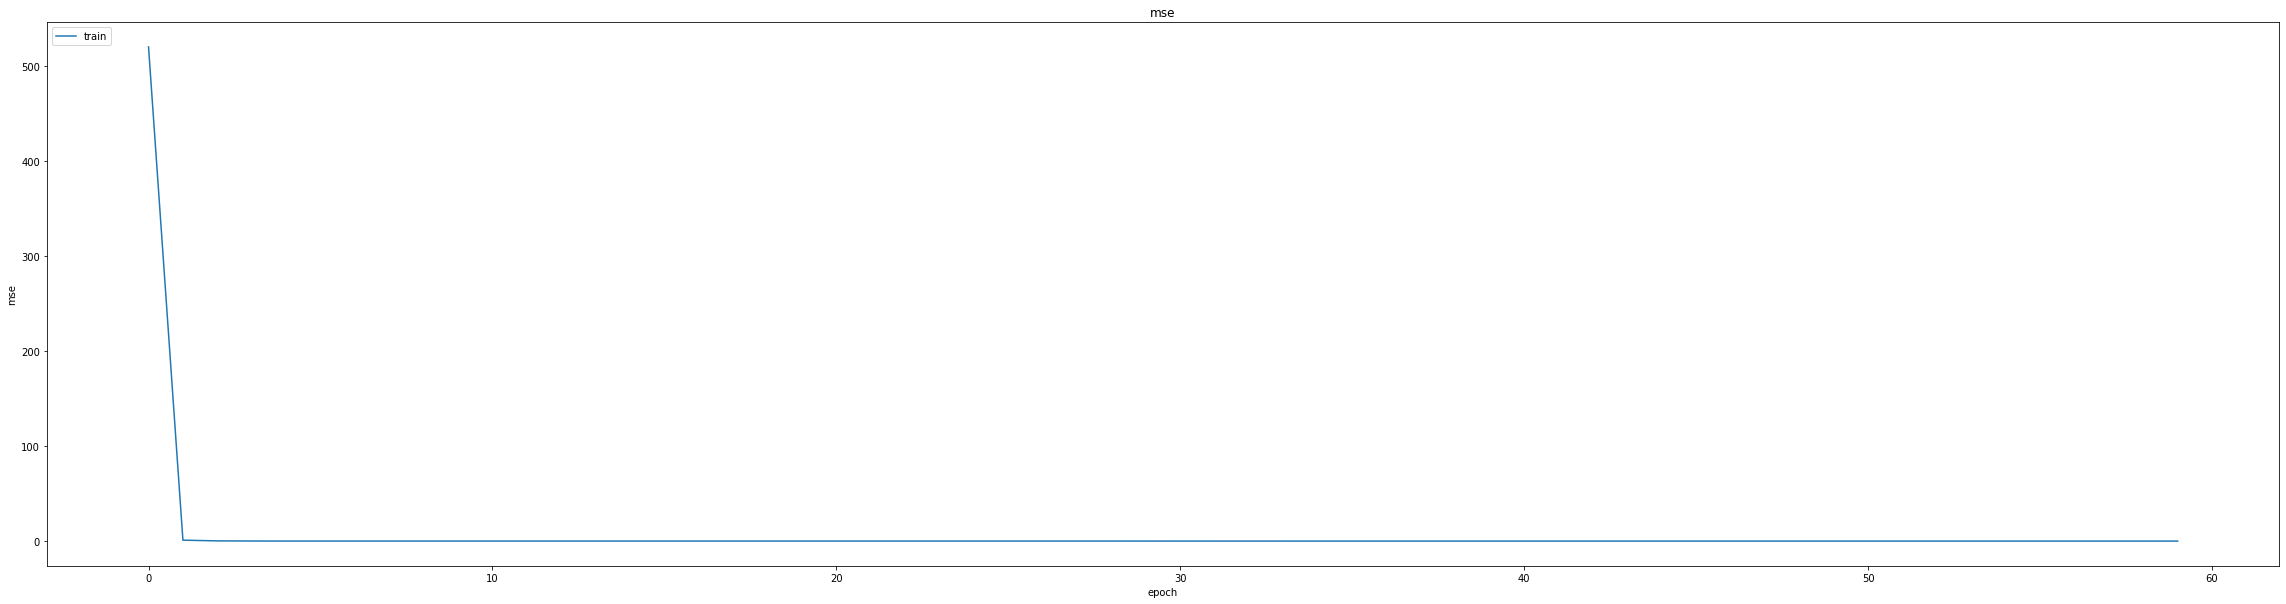

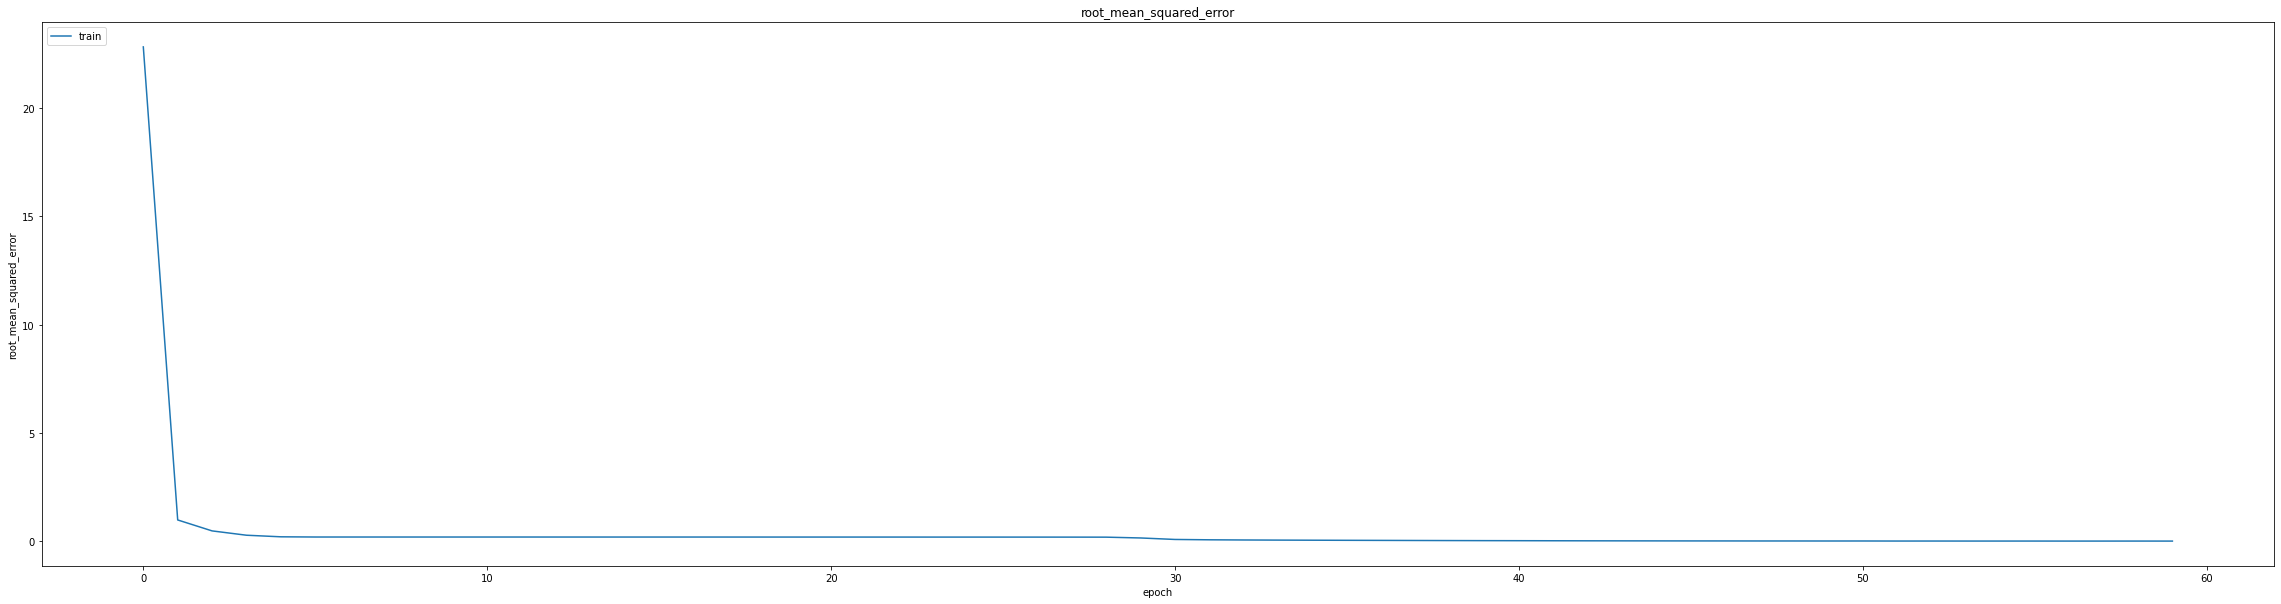

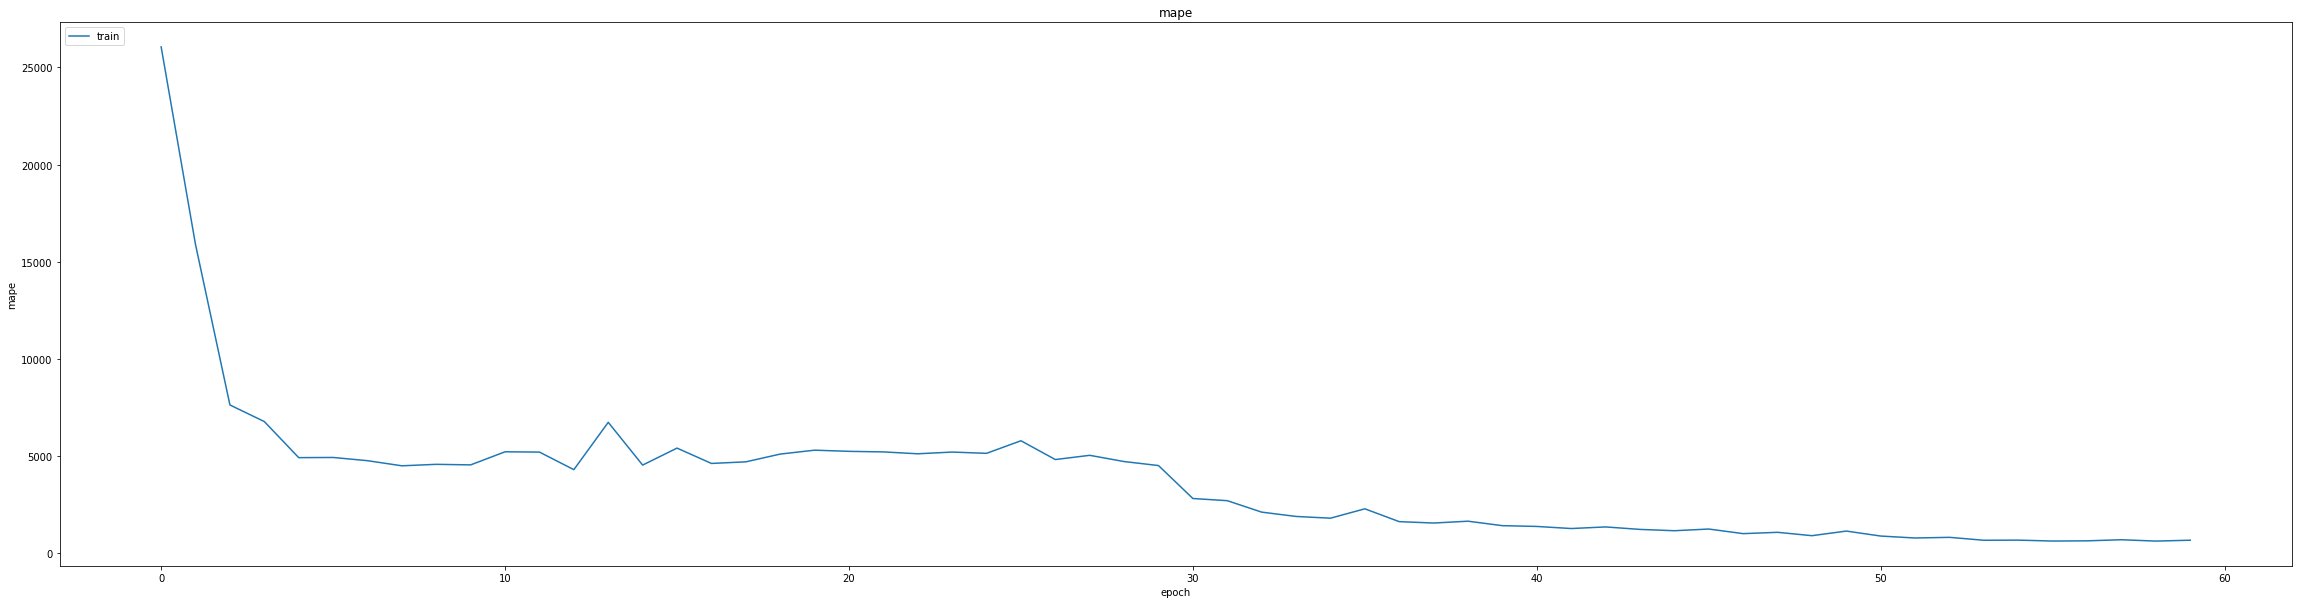

In [96]:
thesis.SummarizeHistory(history)

In [97]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012211522087454796
0.016755493357777596
1392/1392 [==============================] - 6s 4ms/step
0.984450961010179


In [98]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [99]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


345/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0212 - mse: 0.0020 - root_mean_squared_error: 0.0452 - mape: 3184.3574
Epoch 1: val_mse did not improve from 0.00028
347/347 [==============================] - 12s 20ms/step - loss: 0.0020 - mae: 0.0211 - mse: 0.0020 - root_mean_squared_error: 0.0451 - mape: 3166.1580 - val_loss: 4.0546e-04 - val_mae: 0.0158 - val_mse: 4.0546e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2326.4133 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 1.3832e-04 - mae: 0.0091 - mse: 1.3832e-04 - root_mean_squared_error: 0.0118 - mape: 753.5421
Epoch 2: val_mse did not improve from 0.00028
347/347 [==============================] - 6s 17ms/step - loss: 1.3820e-04 - mae: 0.0091 - mse: 1.3820e-04 - root_mean_squared_error: 0.0118 - mape: 751.4081 - val_loss: 3.7567e-04 - val_mae: 0.0154 - val_mse: 3.7567e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 1856.5737 - lr: 0.0010
lr changed to 0.

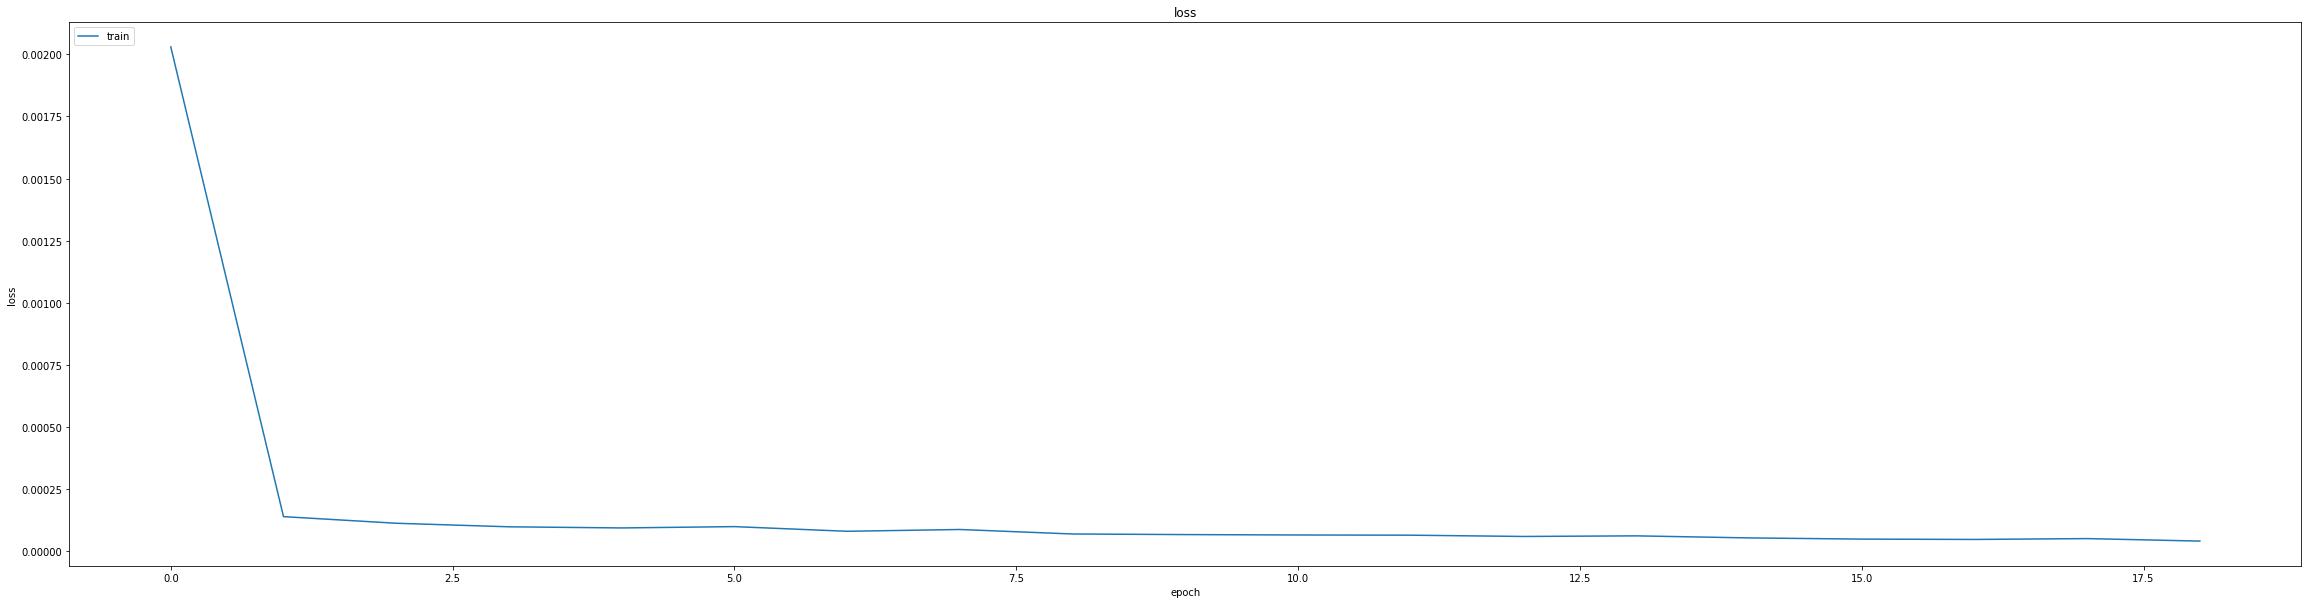

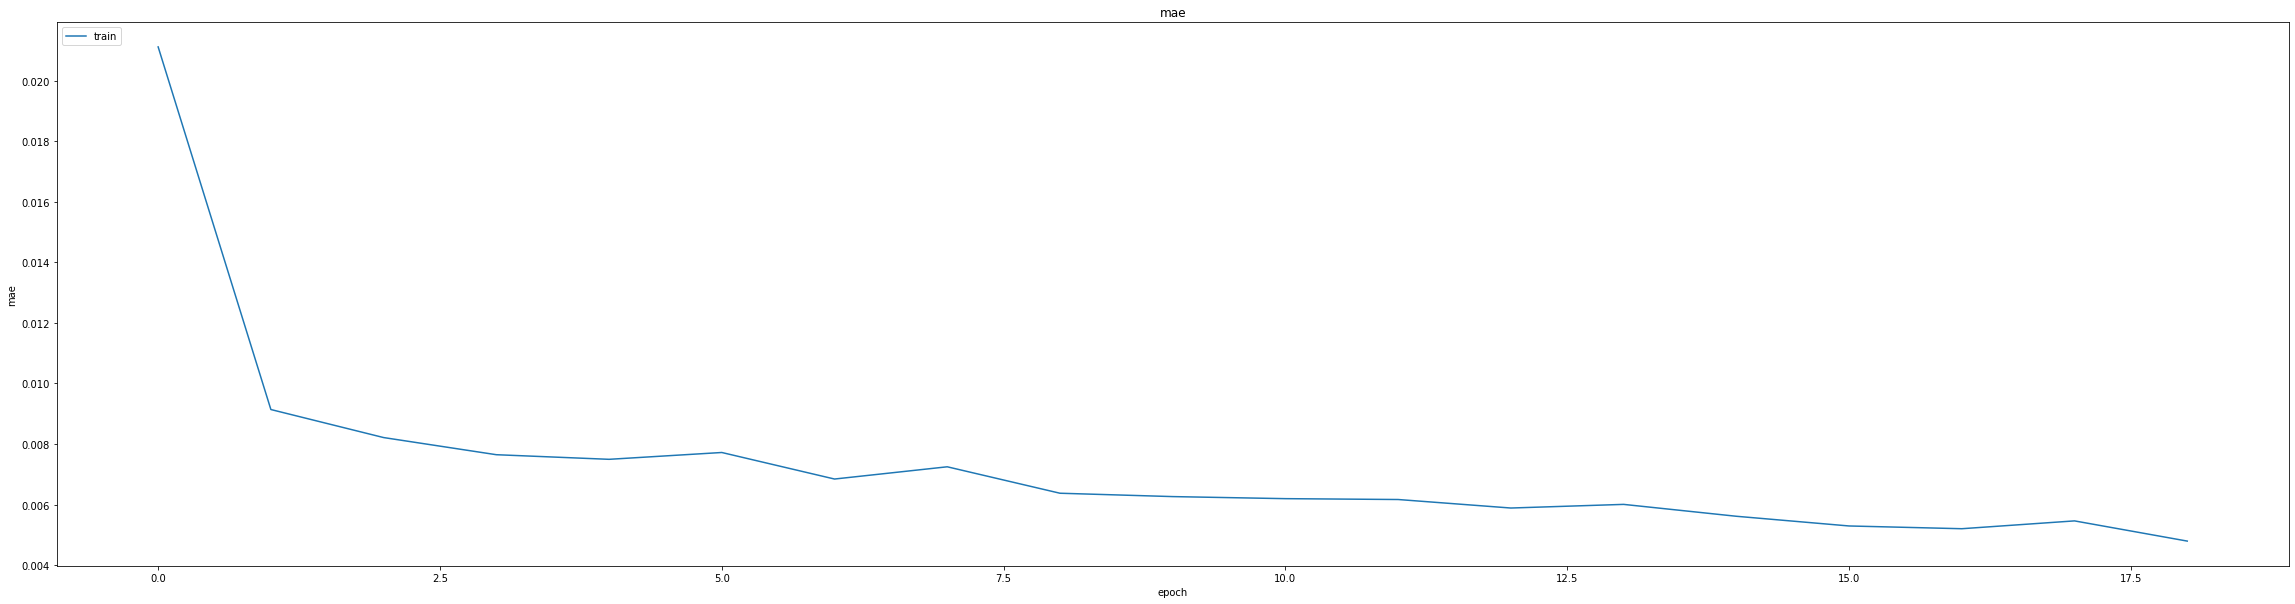

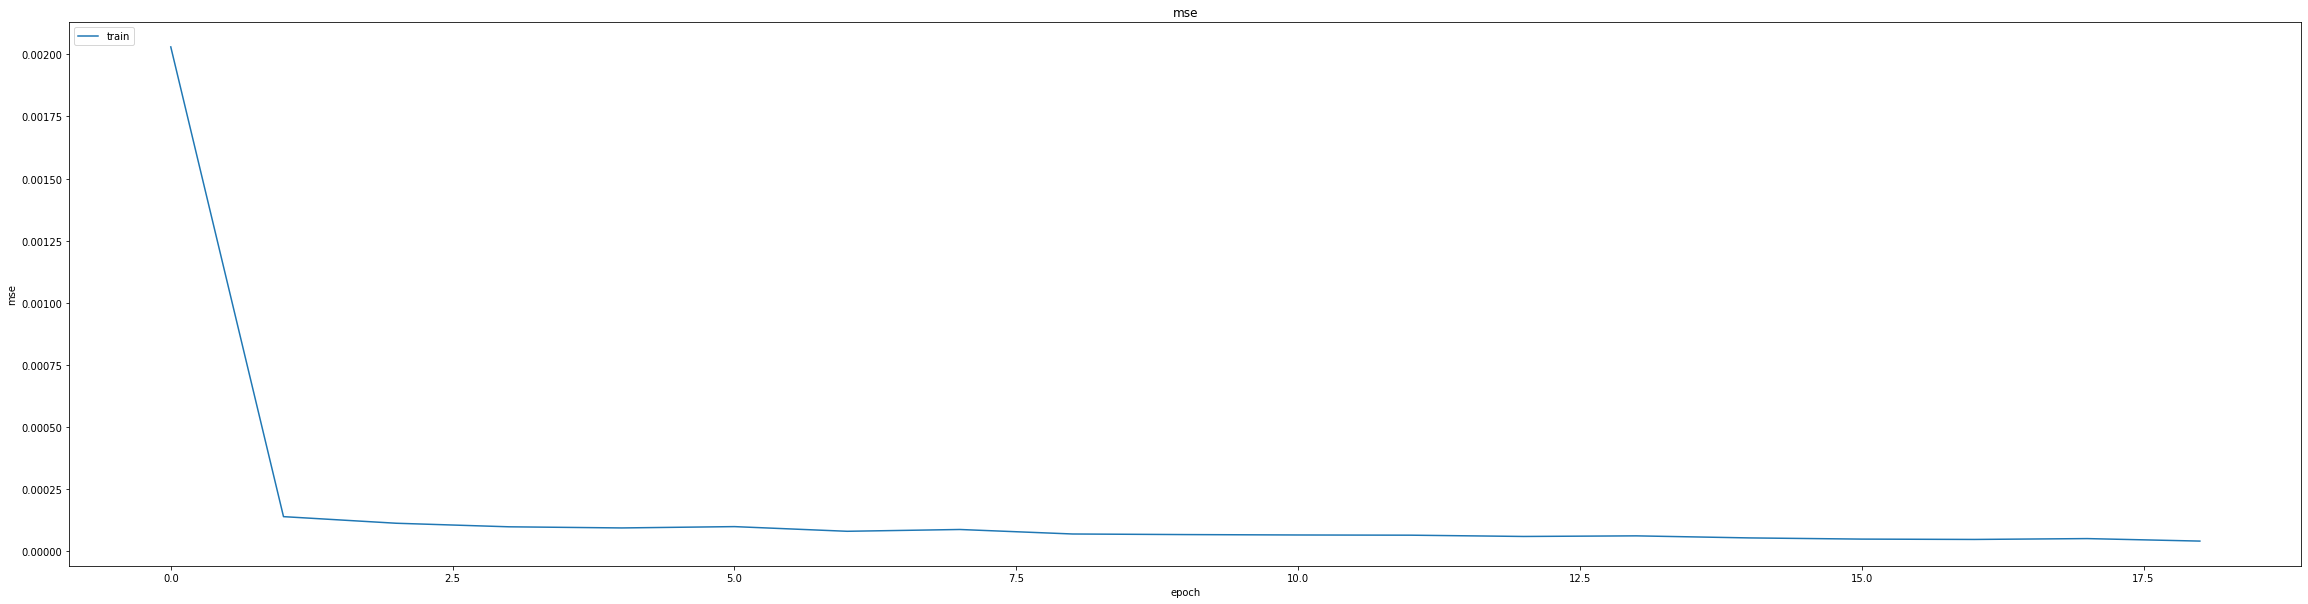

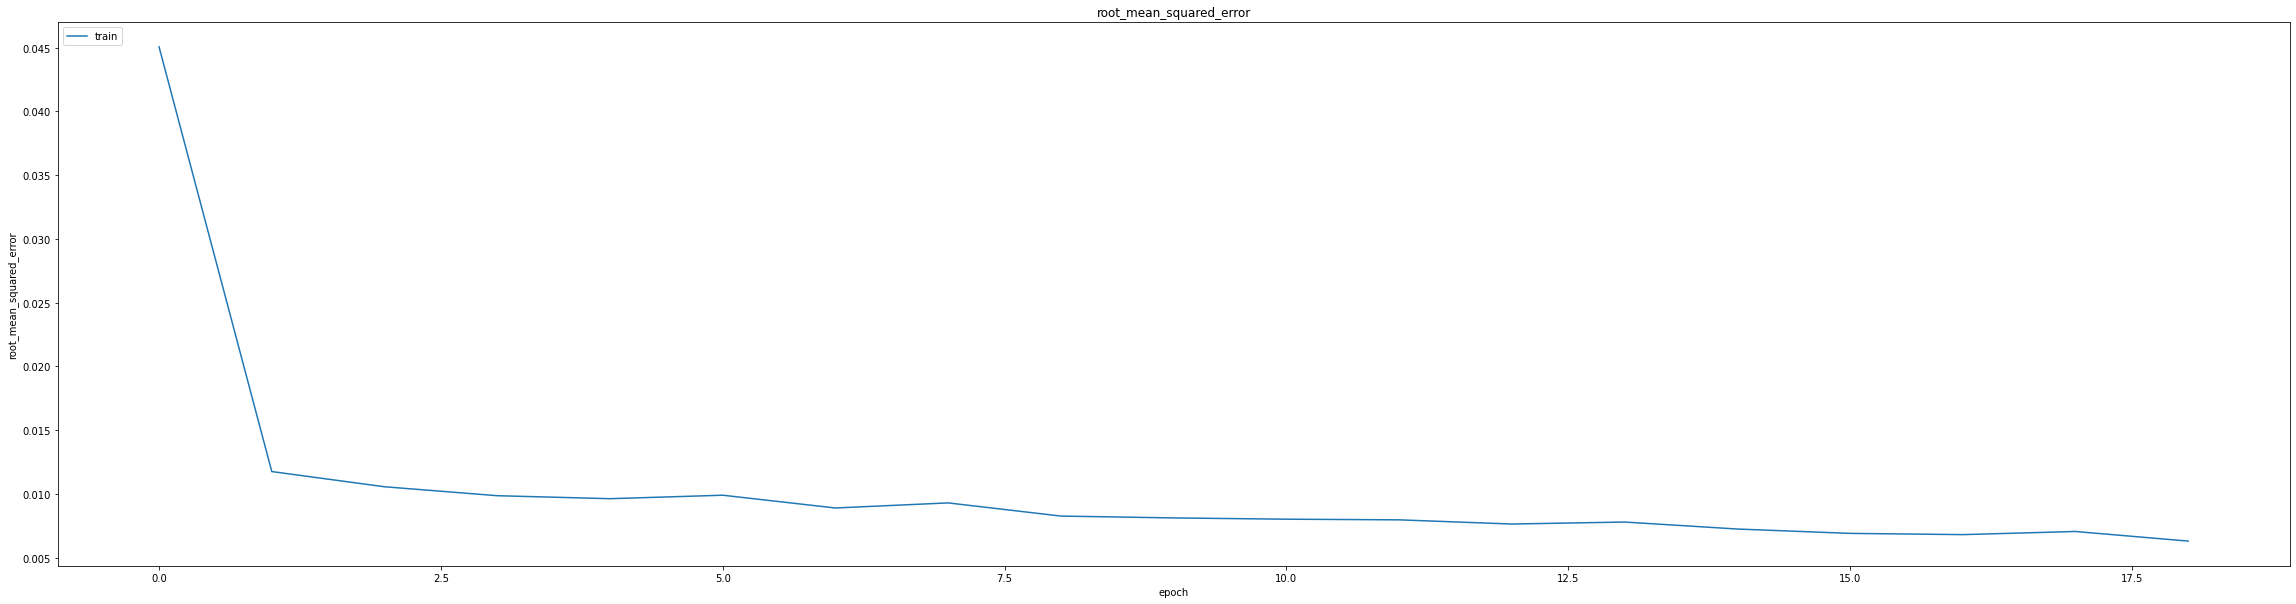

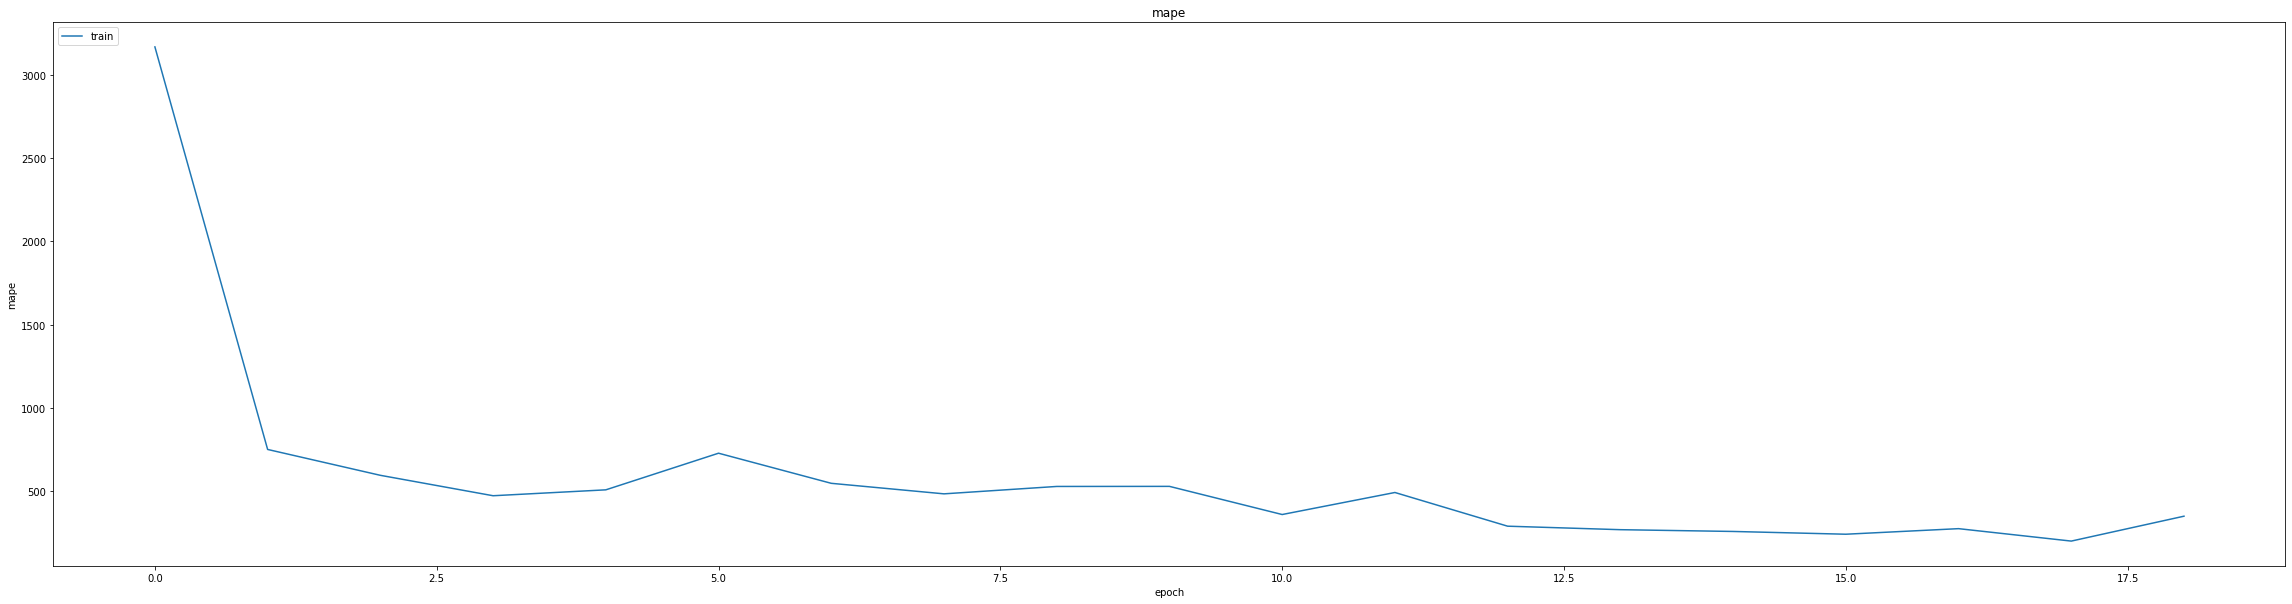

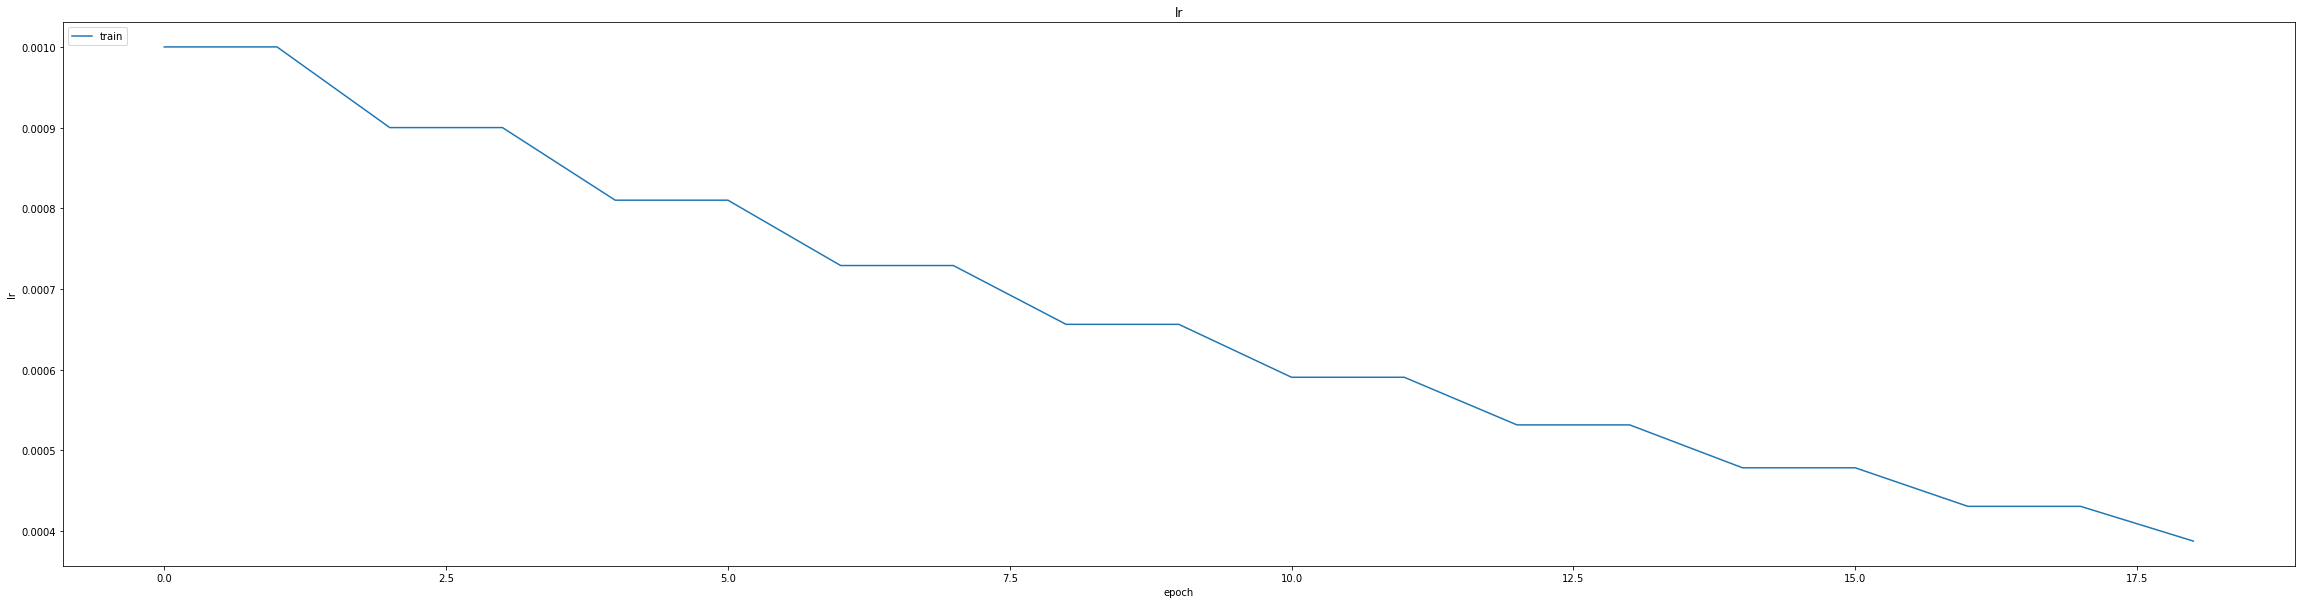

In [100]:
thesis.SummarizeHistory(history)

In [101]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013378567062318325
0.017322994768619537
1392/1392 [==============================] - 6s 4ms/step
0.9848297049115686


1392/1392 [==============================] - 5s 4ms/step


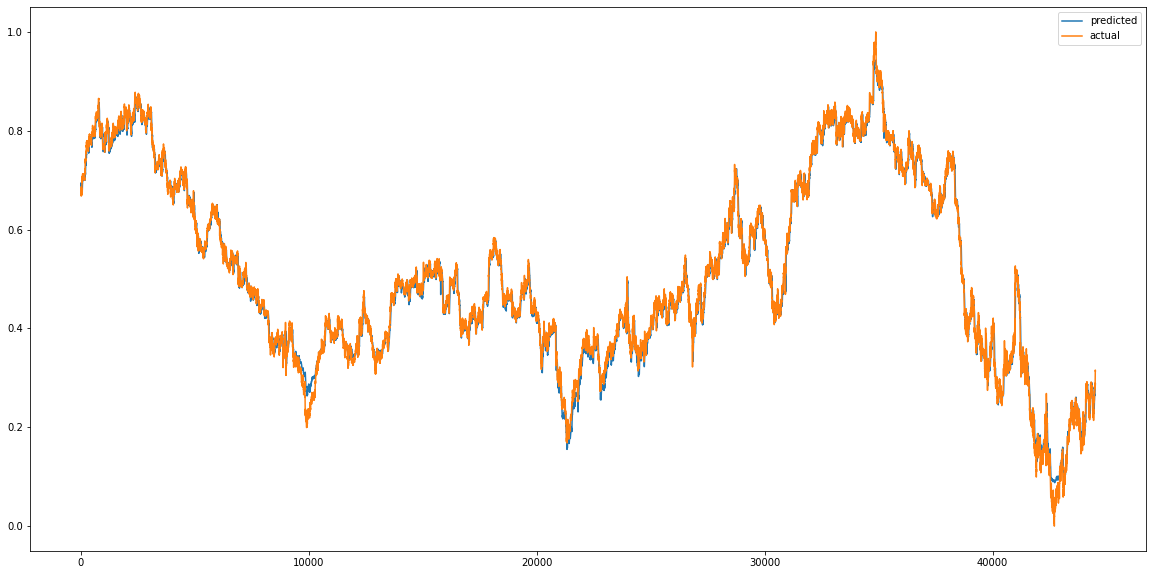

In [102]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


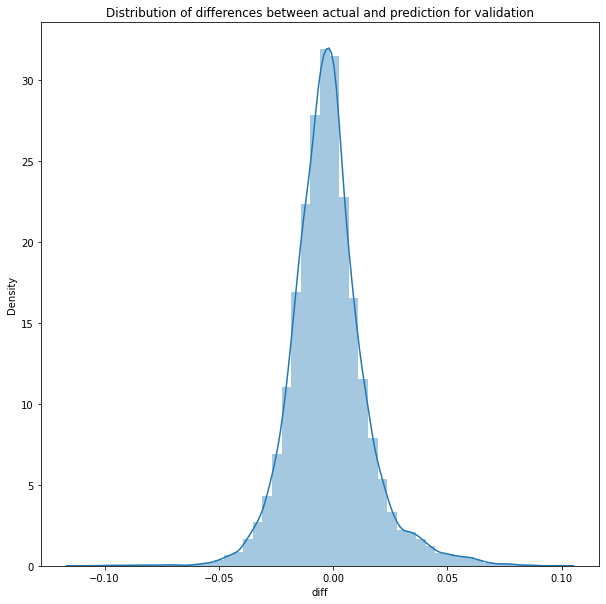

In [103]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


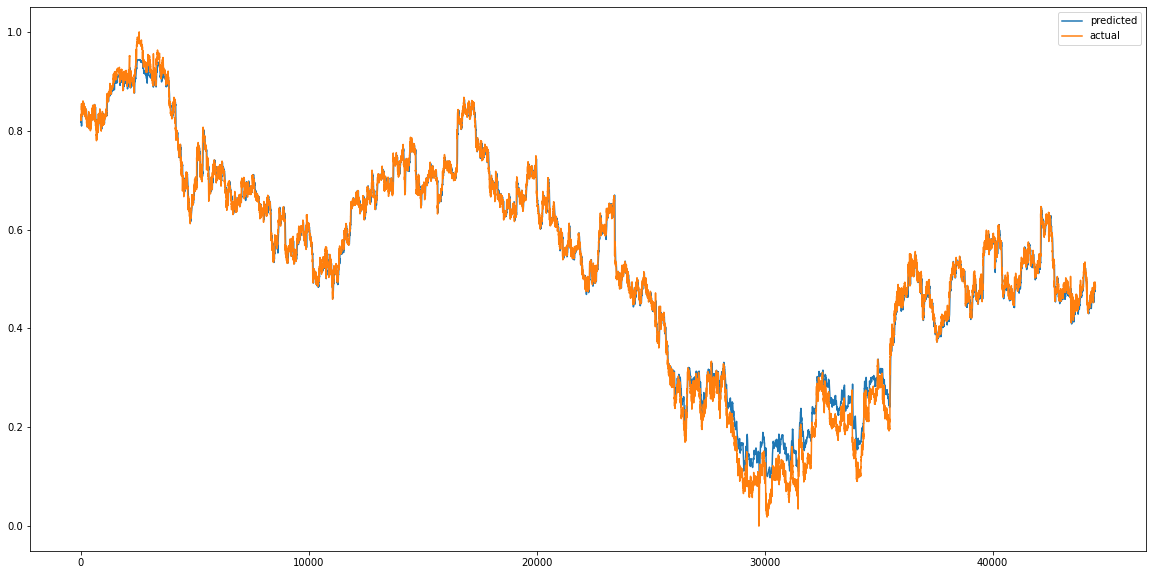

In [104]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


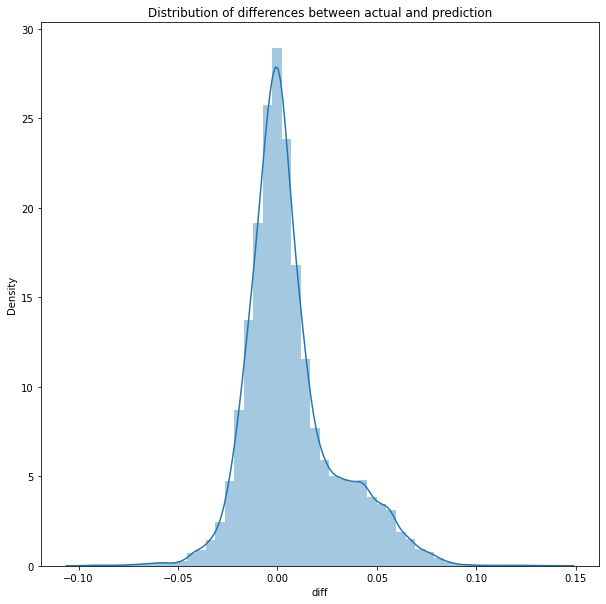

In [105]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005579960505626879
RMSE :  0.02362194002538081
MAE :  0.0164275605537745
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : 0.9886854080113967


count    44513.000000
mean         0.006372
std          0.022747
min         -0.098150
25%         -0.007454
50%          0.001688
75%          0.015107
max          0.140838
Name: diff, dtype: float64

**GRU_MODEL**



In [107]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [108]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [109]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [110]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 3018.5725 - mae: 32.3041 - mse: 3018.5725 - root_mean_squared_error: 54.9415 - mape: 211379.1875
Epoch 1: val_mse improved from inf to 38.62277, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 19s 45ms/step - loss: 3010.1162 - mae: 32.2300 - mse: 3010.1162 - root_mean_squared_error: 54.8645 - mape: 210782.9688 - val_loss: 38.6228 - val_mae: 6.2118 - val_mse: 38.6228 - val_root_mean_squared_error: 6.2147 - val_mape: 152645.2344
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 17.7500 - mae: 4.1033 - mse: 17.7500 - root_mean_squared_error: 4.2131 - mape: 28362.0879
Epoch 2: val_mse improved from 38.62277 to 8.54659, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 17.7220 - mae: 4.0996 - mse: 17.7220 - root_mean_squared_error: 4.2098 - mape: 28283.0332 - val_loss: 8.5466 - val_mae: 2.9172 - val_mse: 8.5466 - val_root_mean_squared_error: 2.9235 - val_mape: 77780.5859
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 4.6966 - mae: 2.1322 - mse: 4.6966 - root_mean_squared_error: 2.1672 - mape: 24662.4648
Epoch 3: val_mse improved from 8.54659 to 3.10075, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 4.6966 - mae: 2.1322 - mse: 4.6966 - root_mean_squared_error: 2.1672 - mape: 24662.4648 - val_loss: 3.1007 - val_mae: 1.7504 - val_mse: 3.1007 - val_root_mean_squared_error: 1.7609 - val_mape: 51269.6016
Epoch 4/60
346/347 [============================>.] - ETA: 0s - loss: 1.6999 - mae: 1.2777 - mse: 1.6999 - root_mean_squared_error: 1.3038 - mape: 17459.8516
Epoch 4: val_mse improved from 3.10075 to 1.33805, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 1.6980 - mae: 1.2769 - mse: 1.6980 - root_mean_squared_error: 1.3031 - mape: 17410.8574 - val_loss: 1.3380 - val_mae: 1.1407 - val_mse: 1.3380 - val_root_mean_squared_error: 1.1567 - val_mape: 37416.5000
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.6895 - mae: 0.8017 - mse: 0.6895 - root_mean_squared_error: 0.8304 - mape: 10490.2490
Epoch 5: val_mse improved from 1.33805 to 0.64871, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 0.6881 - mae: 0.8008 - mse: 0.6881 - root_mean_squared_error: 0.8295 - mape: 10430.9834 - val_loss: 0.6487 - val_mae: 0.7823 - val_mse: 0.6487 - val_root_mean_squared_error: 0.8054 - val_mape: 29271.6855
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.3030 - mae: 0.5128 - mse: 0.3030 - root_mean_squared_error: 0.5505 - mape: 9638.2236
Epoch 6: val_mse improved from 0.64871 to 0.34937, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.3030 - mae: 0.5128 - mse: 0.3030 - root_mean_squared_error: 0.5505 - mape: 9638.2236 - val_loss: 0.3494 - val_mae: 0.5591 - val_mse: 0.3494 - val_root_mean_squared_error: 0.5911 - val_mape: 24201.4922
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.1467 - mae: 0.3304 - mse: 0.1467 - root_mean_squared_error: 0.3830 - mape: 7727.6230
Epoch 7: val_mse improved from 0.34937 to 0.20880, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.1465 - mae: 0.3302 - mse: 0.1465 - root_mean_squared_error: 0.3828 - mape: 7705.8638 - val_loss: 0.2088 - val_mae: 0.4150 - val_mse: 0.2088 - val_root_mean_squared_error: 0.4570 - val_mape: 20922.2559
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0808 - mae: 0.2192 - mse: 0.0808 - root_mean_squared_error: 0.2843 - mape: 7325.5186
Epoch 8: val_mse improved from 0.20880 to 0.13866, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0808 - mae: 0.2192 - mse: 0.0808 - root_mean_squared_error: 0.2843 - mape: 7325.5186 - val_loss: 0.1387 - val_mae: 0.3221 - val_mse: 0.1387 - val_root_mean_squared_error: 0.3724 - val_mape: 18751.4277
Epoch 9/60
345/347 [============================>.] - ETA: 0s - loss: 0.0533 - mae: 0.1745 - mse: 0.0533 - root_mean_squared_error: 0.2308 - mape: 5938.6709
Epoch 9: val_mse improved from 0.13866 to 0.10207, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0532 - mae: 0.1744 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 5904.9111 - val_loss: 0.1021 - val_mae: 0.2713 - val_mse: 0.1021 - val_root_mean_squared_error: 0.3195 - val_mape: 17307.1074
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0419 - mae: 0.1561 - mse: 0.0419 - root_mean_squared_error: 0.2048 - mape: 5713.3101
Epoch 10: val_mse improved from 0.10207 to 0.08244, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0419 - mae: 0.1561 - mse: 0.0419 - root_mean_squared_error: 0.2048 - mape: 5697.2114 - val_loss: 0.0824 - val_mae: 0.2435 - val_mse: 0.0824 - val_root_mean_squared_error: 0.2871 - val_mape: 16358.3584
Epoch 11/60
344/347 [============================>.] - ETA: 0s - loss: 0.0377 - mae: 0.1500 - mse: 0.0377 - root_mean_squared_error: 0.1942 - mape: 5428.3633
Epoch 11: val_mse improved from 0.08244 to 0.07180, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 0.0377 - mae: 0.1499 - mse: 0.0377 - root_mean_squared_error: 0.1941 - mape: 5381.9580 - val_loss: 0.0718 - val_mae: 0.2279 - val_mse: 0.0718 - val_root_mean_squared_error: 0.2679 - val_mape: 15757.0820
Epoch 12/60
346/347 [============================>.] - ETA: 0s - loss: 0.0362 - mae: 0.1495 - mse: 0.0362 - root_mean_squared_error: 0.1904 - mape: 5334.6387
Epoch 12: val_mse improved from 0.07180 to 0.06611, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0362 - mae: 0.1495 - mse: 0.0362 - root_mean_squared_error: 0.1904 - mape: 5319.6035 - val_loss: 0.0661 - val_mae: 0.2193 - val_mse: 0.0661 - val_root_mean_squared_error: 0.2571 - val_mape: 15397.7559
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1504 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5338.5547
Epoch 13: val_mse improved from 0.06611 to 0.06322, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0358 - mae: 0.1504 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 5292.9170 - val_loss: 0.0632 - val_mae: 0.2149 - val_mse: 0.0632 - val_root_mean_squared_error: 0.2514 - val_mape: 15201.5781
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1512 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 5143.7148
Epoch 14: val_mse improved from 0.06322 to 0.06192, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0357 - mae: 0.1512 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 5129.2061 - val_loss: 0.0619 - val_mae: 0.2129 - val_mse: 0.0619 - val_root_mean_squared_error: 0.2488 - val_mape: 15110.2988
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1515 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5135.1470
Epoch 15: val_mse improved from 0.06192 to 0.06133, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0357 - mae: 0.1515 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5120.6533 - val_loss: 0.0613 - val_mae: 0.2120 - val_mse: 0.0613 - val_root_mean_squared_error: 0.2477 - val_mape: 15067.8896
Epoch 16/60
344/347 [============================>.] - ETA: 0s - loss: 0.0356 - mae: 0.1516 - mse: 0.0356 - root_mean_squared_error: 0.1888 - mape: 5130.0918
Epoch 16: val_mse improved from 0.06133 to 0.06130, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5086.3008 - val_loss: 0.0613 - val_mae: 0.2120 - val_mse: 0.0613 - val_root_mean_squared_error: 0.2476 - val_mape: 15065.5059
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5133.5908
Epoch 17: val_mse did not improve from 0.06130
347/347 [==============================] - 5s 15ms/step - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5119.1099 - val_loss: 0.0613 - val_mae: 0.2120 - val_mse: 0.0613 - val_root_mean_squared_error: 0.2476 - val_mape: 15067.3672
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5043.0386
Epoch 18: val_mse improved from 0.06130 to 0.06121, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 14s 42ms/step - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5043.0386 - val_loss: 0.0612 - val_mae: 0.2118 - val_mse: 0.0612 - val_root_mean_squared_error: 0.2474 - val_mape: 15058.9170
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1888 - mape: 5072.1274
Epoch 19: val_mse improved from 0.06121 to 0.06110, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1888 - mape: 5057.8516 - val_loss: 0.0611 - val_mae: 0.2117 - val_mse: 0.0611 - val_root_mean_squared_error: 0.2472 - val_mape: 15050.7334
Epoch 20/60
345/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1518 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5081.9980
Epoch 20: val_mse did not improve from 0.06110
347/347 [==============================] - 5s 15ms/step - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1889 - mape: 5053.1104 - val_loss: 0.0612 - val_mae: 0.2118 - val_mse: 0.0612 - val_root_mean_squared_error: 0.2473 - val_mape: 15055.1143
Epoch 21/60
344/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1517 - mse: 0.0357 - root_mean_squared_error: 0.1888 - mape: 5133.6357
Epoch 21: val_mse did not improve from 0.06110
347/347 [==============================] - 5s 15ms/step

347/347 [==============================] - 15s 43ms/step - loss: 0.0356 - mae: 0.1516 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 5089.8022 - val_loss: 0.0611 - val_mae: 0.2116 - val_mse: 0.0611 - val_root_mean_squared_error: 0.2472 - val_mape: 15046.1885
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 0.0356 - mae: 0.1516 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 5135.4014
Epoch 29: val_mse did not improve from 0.06109
347/347 [==============================] - 5s 15ms/step - loss: 0.0356 - mae: 0.1516 - mse: 0.0356 - root_mean_squared_error: 0.1887 - mape: 5106.2197 - val_loss: 0.0617 - val_mae: 0.2126 - val_mse: 0.0617 - val_root_mean_squared_error: 0.2484 - val_mape: 15088.1357
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 0.0356 - mae: 0.1515 - mse: 0.0356 - root_mean_squared_error: 0.1886 - mape: 5087.4424
Epoch 30: val_mse did not improve from 0.06109
347/347 [==============================] - 5s 15ms/step

347/347 [==============================] - 15s 43ms/step - loss: 0.0355 - mae: 0.1513 - mse: 0.0355 - root_mean_squared_error: 0.1883 - mape: 5105.9336 - val_loss: 0.0604 - val_mae: 0.2105 - val_mse: 0.0604 - val_root_mean_squared_error: 0.2457 - val_mape: 14987.1240
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 0.0259 - mae: 0.1220 - mse: 0.0259 - root_mean_squared_error: 0.1610 - mape: 4062.7053
Epoch 34: val_mse improved from 0.06039 to 0.01328, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0259 - mae: 0.1218 - mse: 0.0259 - root_mean_squared_error: 0.1608 - mape: 4051.2236 - val_loss: 0.0133 - val_mae: 0.0817 - val_mse: 0.0133 - val_root_mean_squared_error: 0.1152 - val_mape: 10555.2910
Epoch 35/60
345/347 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0357 - mse: 0.0033 - root_mean_squared_error: 0.0571 - mape: 2980.5823
Epoch 35: val_mse improved from 0.01328 to 0.00475, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0033 - mae: 0.0357 - mse: 0.0033 - root_mean_squared_error: 0.0571 - mape: 2963.5796 - val_loss: 0.0048 - val_mae: 0.0415 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0689 - val_mape: 8513.1592
Epoch 36/60
346/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0273 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 2566.4062
Epoch 36: val_mse improved from 0.00475 to 0.00253, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0018 - mae: 0.0273 - mse: 0.0018 - root_mean_squared_error: 0.0429 - mape: 2559.1455 - val_loss: 0.0025 - val_mae: 0.0266 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 7326.7974
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0223 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 2329.5110
Epoch 37: val_mse improved from 0.00253 to 0.00174, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 0.0011 - mae: 0.0222 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 2322.9136 - val_loss: 0.0017 - val_mae: 0.0250 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 6399.0977
Epoch 38/60
344/347 [============================>.] - ETA: 0s - loss: 8.0975e-04 - mae: 0.0195 - mse: 8.0975e-04 - root_mean_squared_error: 0.0285 - mape: 1980.8453
Epoch 38: val_mse improved from 0.00174 to 0.00135, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 8.0889e-04 - mae: 0.0195 - mse: 8.0889e-04 - root_mean_squared_error: 0.0284 - mape: 1963.8495 - val_loss: 0.0014 - val_mae: 0.0225 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 5828.3418
Epoch 39/60
345/347 [============================>.] - ETA: 0s - loss: 6.3778e-04 - mae: 0.0177 - mse: 6.3778e-04 - root_mean_squared_error: 0.0253 - mape: 1861.7909
Epoch 39: val_mse improved from 0.00135 to 0.00104, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 6.3810e-04 - mae: 0.0177 - mse: 6.3810e-04 - root_mean_squared_error: 0.0253 - mape: 1851.1696 - val_loss: 0.0010 - val_mae: 0.0197 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 5400.1650
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 5.2381e-04 - mae: 0.0162 - mse: 5.2381e-04 - root_mean_squared_error: 0.0229 - mape: 1838.4507
Epoch 40: val_mse improved from 0.00104 to 0.00091, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 5.2377e-04 - mae: 0.0162 - mse: 5.2377e-04 - root_mean_squared_error: 0.0229 - mape: 1833.2490 - val_loss: 9.0994e-04 - val_mae: 0.0189 - val_mse: 9.0994e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 5085.6328
Epoch 41/60
346/347 [============================>.] - ETA: 0s - loss: 4.4901e-04 - mae: 0.0152 - mse: 4.4901e-04 - root_mean_squared_error: 0.0212 - mape: 1619.5367
Epoch 41: val_mse improved from 0.00091 to 0.00083, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 4.4879e-04 - mae: 0.0152 - mse: 4.4879e-04 - root_mean_squared_error: 0.0212 - mape: 1614.9501 - val_loss: 8.3037e-04 - val_mae: 0.0183 - val_mse: 8.3037e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 4836.9849
Epoch 42/60
345/347 [============================>.] - ETA: 0s - loss: 3.9040e-04 - mae: 0.0143 - mse: 3.9040e-04 - root_mean_squared_error: 0.0198 - mape: 1597.7886
Epoch 42: val_mse improved from 0.00083 to 0.00072, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 3.9062e-04 - mae: 0.0143 - mse: 3.9062e-04 - root_mean_squared_error: 0.0198 - mape: 1588.6707 - val_loss: 7.1849e-04 - val_mae: 0.0169 - val_mse: 7.1849e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 4626.3169
Epoch 43/60
345/347 [============================>.] - ETA: 0s - loss: 3.4405e-04 - mae: 0.0134 - mse: 3.4405e-04 - root_mean_squared_error: 0.0185 - mape: 1551.2797
Epoch 43: val_mse improved from 0.00072 to 0.00066, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 3.4370e-04 - mae: 0.0134 - mse: 3.4370e-04 - root_mean_squared_error: 0.0185 - mape: 1542.4208 - val_loss: 6.5519e-04 - val_mae: 0.0165 - val_mse: 6.5519e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 4448.3125
Epoch 44/60
347/347 [==============================] - ETA: 0s - loss: 3.0846e-04 - mae: 0.0128 - mse: 3.0846e-04 - root_mean_squared_error: 0.0176 - mape: 1505.0934
Epoch 44: val_mse improved from 0.00066 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 45ms/step - loss: 3.0846e-04 - mae: 0.0128 - mse: 3.0846e-04 - root_mean_squared_error: 0.0176 - mape: 1505.0934 - val_loss: 5.8014e-04 - val_mae: 0.0154 - val_mse: 5.8014e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 4300.4971
Epoch 45/60
346/347 [============================>.] - ETA: 0s - loss: 2.7674e-04 - mae: 0.0121 - mse: 2.7674e-04 - root_mean_squared_error: 0.0166 - mape: 1390.4708
Epoch 45: val_mse improved from 0.00058 to 0.00053, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 2.7664e-04 - mae: 0.0121 - mse: 2.7664e-04 - root_mean_squared_error: 0.0166 - mape: 1386.5322 - val_loss: 5.3102e-04 - val_mae: 0.0150 - val_mse: 5.3102e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 4155.0854
Epoch 46/60
344/347 [============================>.] - ETA: 0s - loss: 2.5823e-04 - mae: 0.0118 - mse: 2.5823e-04 - root_mean_squared_error: 0.0161 - mape: 1425.7841
Epoch 46: val_mse improved from 0.00053 to 0.00051, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 2.5814e-04 - mae: 0.0118 - mse: 2.5814e-04 - root_mean_squared_error: 0.0161 - mape: 1413.5425 - val_loss: 5.1255e-04 - val_mae: 0.0152 - val_mse: 5.1255e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 4032.2634
Epoch 47/60
345/347 [============================>.] - ETA: 0s - loss: 2.3686e-04 - mae: 0.0113 - mse: 2.3686e-04 - root_mean_squared_error: 0.0154 - mape: 1389.0631
Epoch 47: val_mse did not improve from 0.00051
347/347 [==============================] - 5s 16ms/step - loss: 2.3714e-04 - mae: 0.0113 - mse: 2.3714e-04 - root_mean_squared_error: 0.0154 - mape: 1381.1331 - val_loss: 5.4737e-04 - val_mae: 0.0167 - val_mse: 5.4737e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 3899.5776
Epoch 48/60
344/347 [============================>.] - ETA: 0s - loss: 2.2002e-04 - mae: 0.0109 - mse: 2.2002e-04 - root_mean_squared_error: 0.0148 - mape: 1312.6636
Epoch 48: val_mse improved from 0.00051 to 0.00047, savi

347/347 [==============================] - 15s 43ms/step - loss: 2.1999e-04 - mae: 0.0109 - mse: 2.1999e-04 - root_mean_squared_error: 0.0148 - mape: 1301.3933 - val_loss: 4.7438e-04 - val_mae: 0.0147 - val_mse: 4.7438e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 3823.8638
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 2.0747e-04 - mae: 0.0106 - mse: 2.0747e-04 - root_mean_squared_error: 0.0144 - mape: 1254.9199
Epoch 49: val_mse improved from 0.00047 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 42ms/step - loss: 2.0747e-04 - mae: 0.0106 - mse: 2.0747e-04 - root_mean_squared_error: 0.0144 - mape: 1254.9199 - val_loss: 4.4828e-04 - val_mae: 0.0147 - val_mse: 4.4828e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 3731.6929
Epoch 50/60
344/347 [============================>.] - ETA: 0s - loss: 1.9114e-04 - mae: 0.0102 - mse: 1.9114e-04 - root_mean_squared_error: 0.0138 - mape: 1230.3984
Epoch 50: val_mse improved from 0.00045 to 0.00041, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 44ms/step - loss: 1.9100e-04 - mae: 0.0102 - mse: 1.9100e-04 - root_mean_squared_error: 0.0138 - mape: 1219.8335 - val_loss: 4.0826e-04 - val_mae: 0.0137 - val_mse: 4.0826e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 3623.1951
Epoch 51/60
345/347 [============================>.] - ETA: 0s - loss: 1.7993e-04 - mae: 0.0100 - mse: 1.7993e-04 - root_mean_squared_error: 0.0134 - mape: 1214.8700
Epoch 51: val_mse improved from 0.00041 to 0.00038, saving model to /content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 1.7995e-04 - mae: 0.0100 - mse: 1.7995e-04 - root_mean_squared_error: 0.0134 - mape: 1207.9358 - val_loss: 3.7693e-04 - val_mae: 0.0130 - val_mse: 3.7693e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 3559.6208
Epoch 52/60
344/347 [============================>.] - ETA: 0s - loss: 1.6616e-04 - mae: 0.0096 - mse: 1.6616e-04 - root_mean_squared_error: 0.0129 - mape: 1214.6125
Epoch 52: val_mse did not improve from 0.00038
347/347 [==============================] - 5s 16ms/step - loss: 1.6605e-04 - mae: 0.0096 - mse: 1.6605e-04 - root_mean_squared_error: 0.0129 - mape: 1204.1841 - val_loss: 4.0673e-04 - val_mae: 0.0142 - val_mse: 4.0673e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 3475.0742
Epoch 53/60
344/347 [============================>.] - ETA: 0s - loss: 1.5854e-04 - mae: 0.0094 - mse: 1.5854e-04 - root_mean_squared_error: 0.0126 - mape: 1164.7490
Epoch 53: val_mse did not improve from 0.00038
347/347 [

347/347 [==============================] - 15s 43ms/step - loss: 1.4668e-04 - mae: 0.0090 - mse: 1.4668e-04 - root_mean_squared_error: 0.0121 - mape: 1177.5116 - val_loss: 3.5320e-04 - val_mae: 0.0131 - val_mse: 3.5320e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 3309.1619
Epoch 55/60
346/347 [============================>.] - ETA: 0s - loss: 1.4349e-04 - mae: 0.0090 - mse: 1.4349e-04 - root_mean_squared_error: 0.0120 - mape: 1110.0300
Epoch 55: val_mse did not improve from 0.00035
347/347 [==============================] - 6s 17ms/step - loss: 1.4336e-04 - mae: 0.0090 - mse: 1.4336e-04 - root_mean_squared_error: 0.0120 - mape: 1106.8849 - val_loss: 3.5322e-04 - val_mae: 0.0130 - val_mse: 3.5322e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 3247.9011
Epoch 56/60
344/347 [============================>.] - ETA: 0s - loss: 1.3573e-04 - mae: 0.0088 - mse: 1.3573e-04 - root_mean_squared_error: 0.0117 - mape: 1096.2451
Epoch 56: val_mse improved from 0.00035 to 0.00035, savi

347/347 [==============================] - 15s 43ms/step - loss: 1.3561e-04 - mae: 0.0088 - mse: 1.3561e-04 - root_mean_squared_error: 0.0116 - mape: 1086.8323 - val_loss: 3.4654e-04 - val_mae: 0.0130 - val_mse: 3.4654e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 3175.4617
Epoch 57/60
344/347 [============================>.] - ETA: 0s - loss: 1.2378e-04 - mae: 0.0084 - mse: 1.2378e-04 - root_mean_squared_error: 0.0111 - mape: 1056.9493
Epoch 57: val_mse did not improve from 0.00035
347/347 [==============================] - 5s 15ms/step - loss: 1.2356e-04 - mae: 0.0083 - mse: 1.2356e-04 - root_mean_squared_error: 0.0111 - mape: 1047.8711 - val_loss: 4.3736e-04 - val_mae: 0.0162 - val_mse: 4.3736e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 3077.3101
Epoch 58/60
345/347 [============================>.] - ETA: 0s - loss: 1.2077e-04 - mae: 0.0083 - mse: 1.2077e-04 - root_mean_squared_error: 0.0110 - mape: 1048.5312
Epoch 58: val_mse did not improve from 0.00035
347/347 [

347/347 [==============================] - 15s 43ms/step - loss: 1.1728e-04 - mae: 0.0082 - mse: 1.1728e-04 - root_mean_squared_error: 0.0108 - mape: 985.4366 - val_loss: 3.0002e-04 - val_mae: 0.0122 - val_mse: 3.0002e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2915.4031


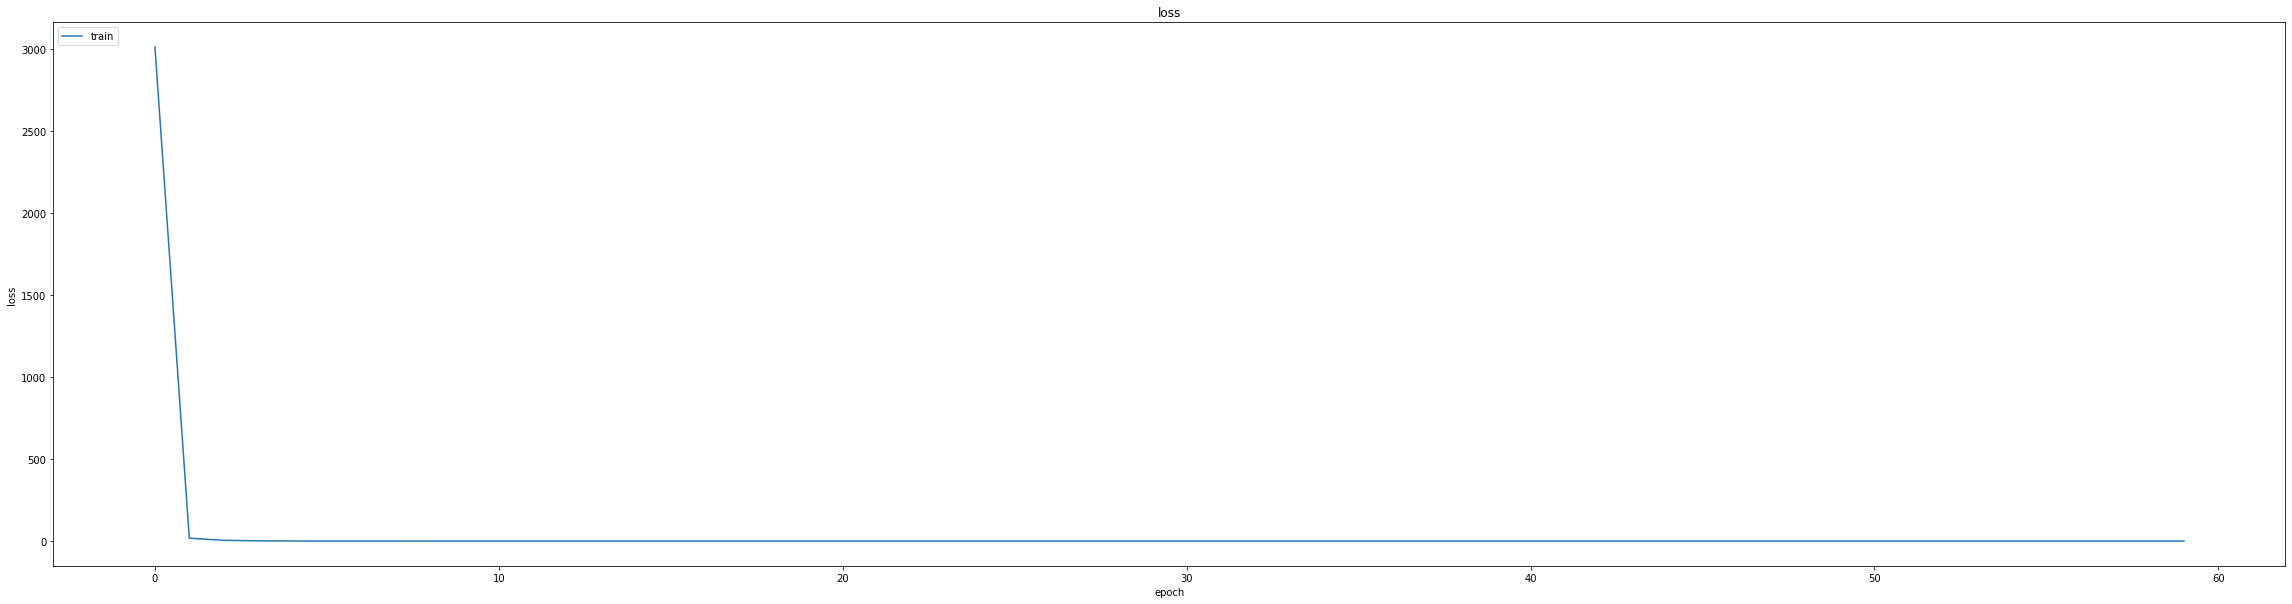

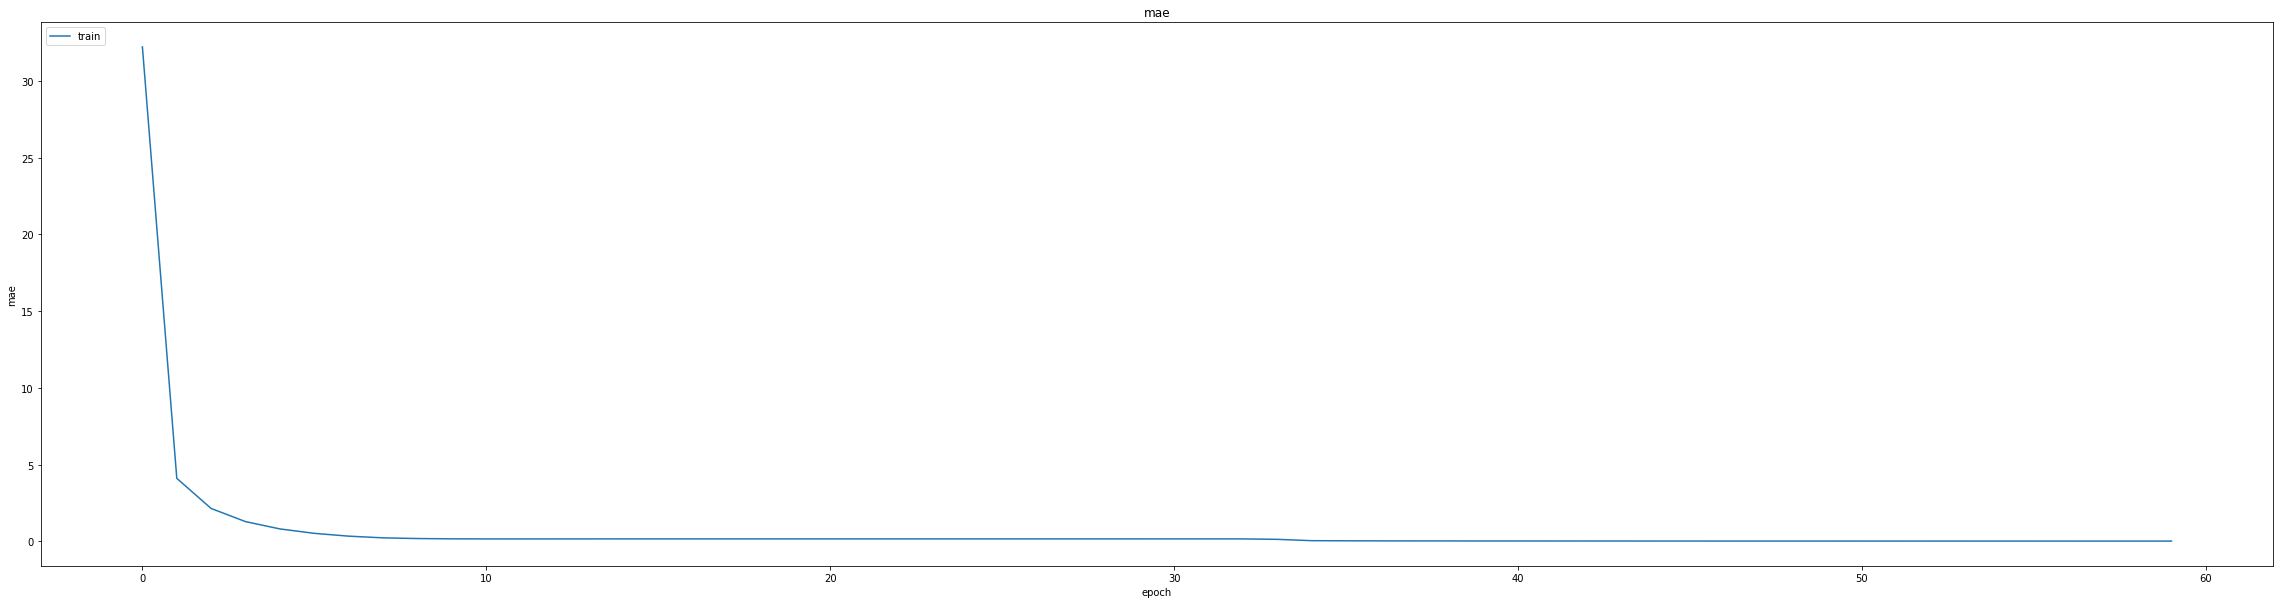

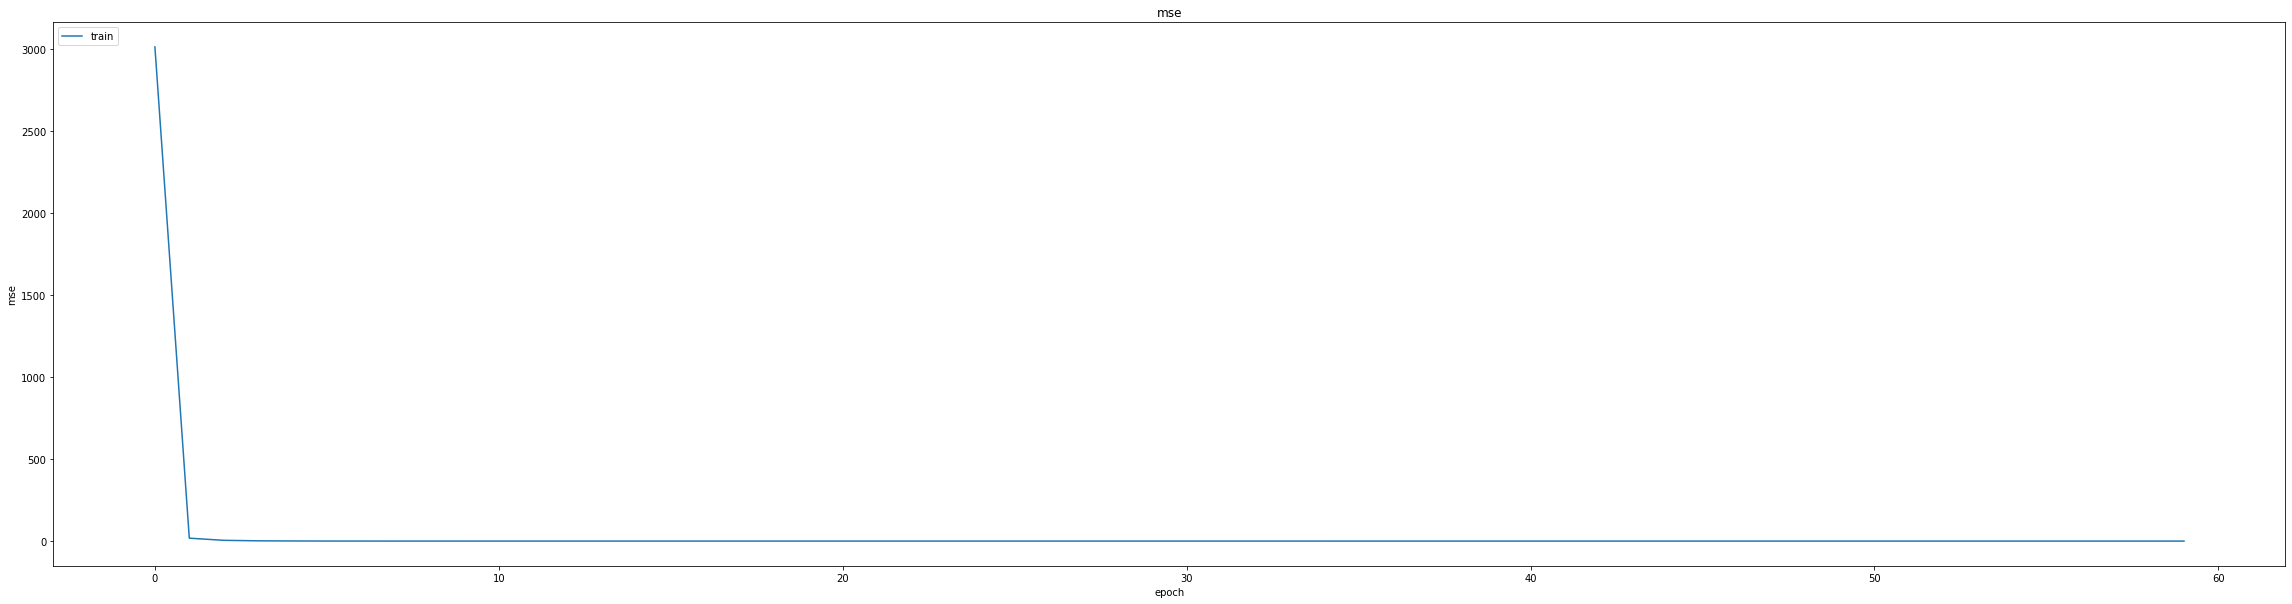

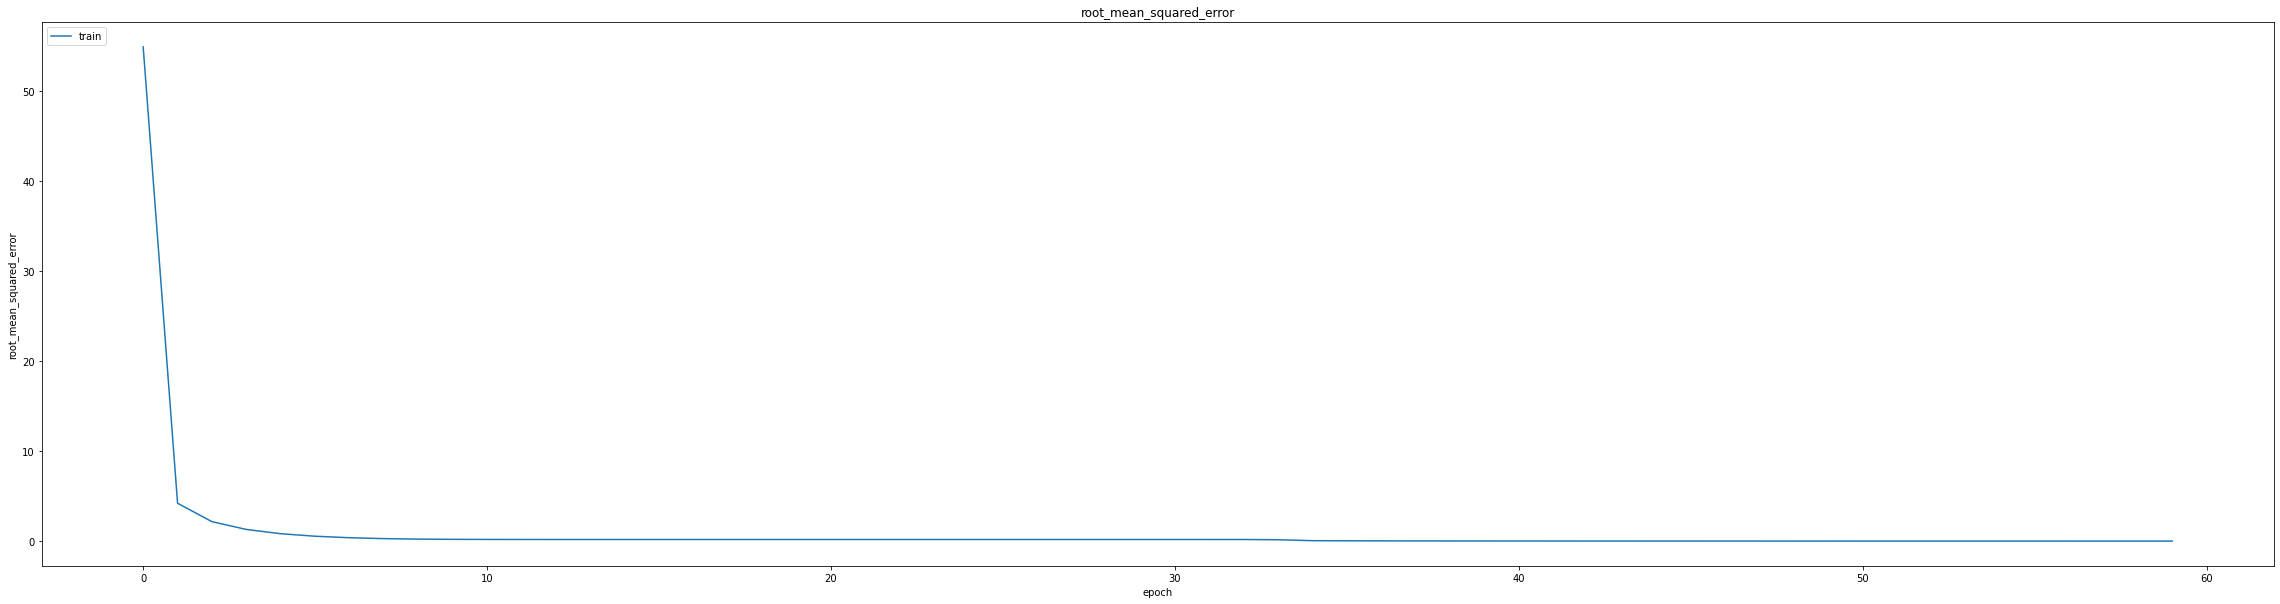

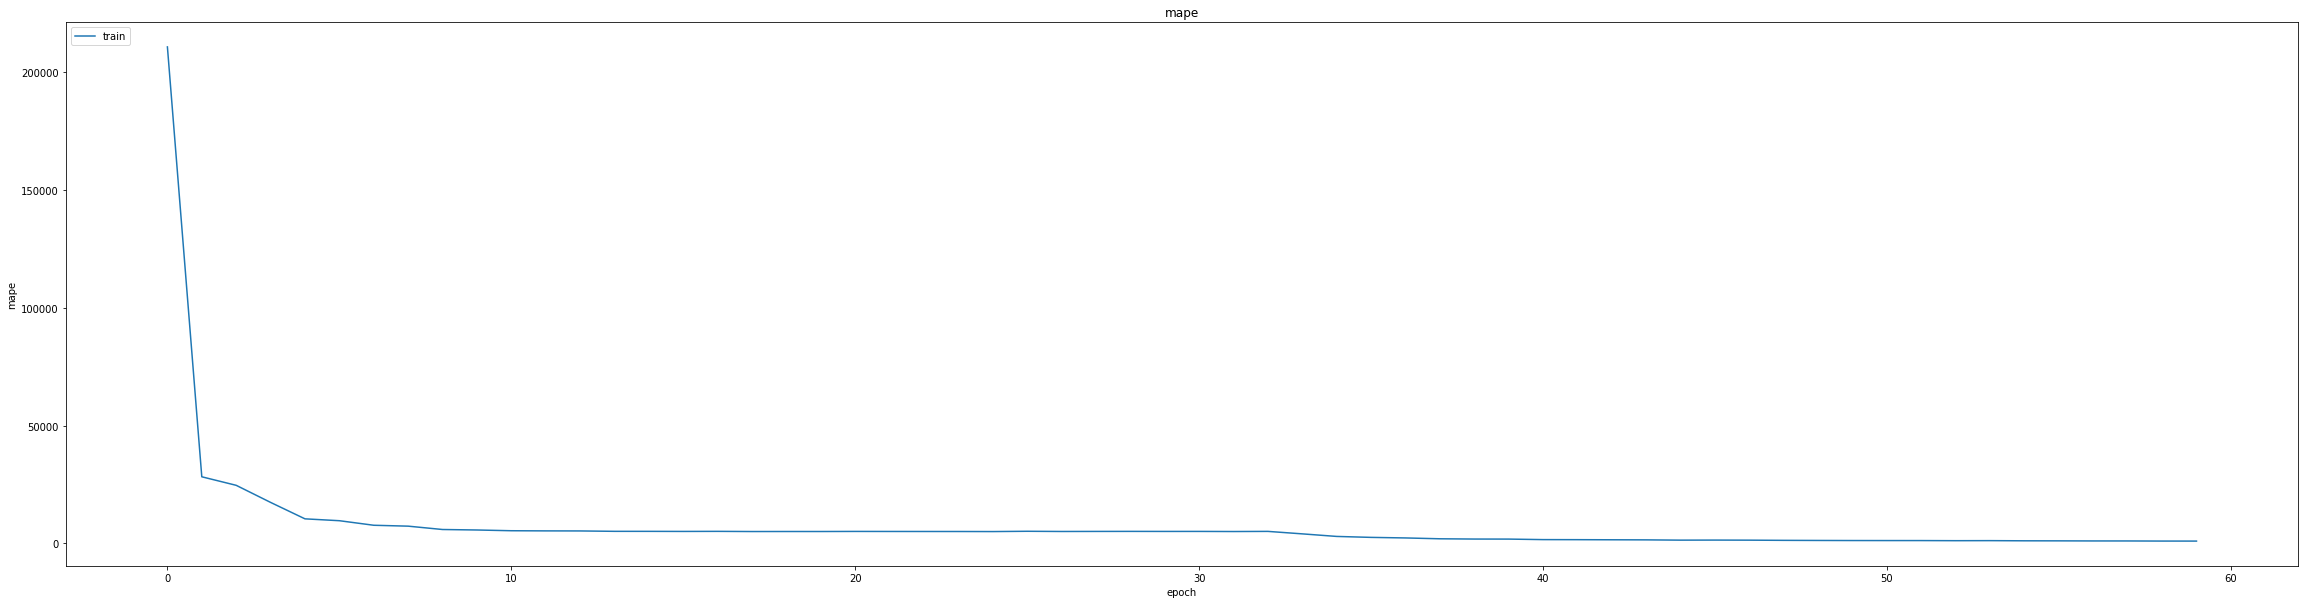

In [111]:
thesis.SummarizeHistory(history)

In [112]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.012210859917104244
0.012210859917104244
0.01732122339308262
1392/1392 [==============================] - 6s 4ms/step
0.9918260242337786


In [113]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [114]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
344/347 [============================>.] - ETA: 0s - loss: 9.1566e-04 - mae: 0.0140 - mse: 9.1566e-04 - root_mean_squared_error: 0.0303 - mape: 985.1612
Epoch 1: val_mse did not improve from 0.00030
347/347 [==============================] - 10s 18ms/step - loss: 9.0858e-04 - mae: 0.0139 - mse: 9.0858e-04 - root_mean_squared_error: 0.0301 - mape: 976.7056 - val_loss: 3.7776e-04 - val_mae: 0.0147 - val_mse: 3.7776e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2887.2646 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 8.3691e-05 - mae: 0.0068 - mse: 8.3691e-05 - root_mean_squared_error: 0.0091 - mape: 948.8594
Epoch 2: val_mse did not improve from 0.00030
347/347 [==============================] - 5s 16ms/step - loss: 8.3738e-05 - mae: 0.0068 - mse: 8.3738e-05 - root_mean_squared_error: 0.0092 - mape: 946.1728 - val_loss: 3.9157e-04 - val_mae: 0.0152 - val_mse: 3.9157e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 2729.1189 - lr

347/347 [==============================] - 16s 45ms/step - loss: 8.2121e-05 - mae: 0.0069 - mse: 8.2121e-05 - root_mean_squared_error: 0.0091 - mape: 808.0704 - val_loss: 2.9928e-04 - val_mae: 0.0130 - val_mse: 2.9928e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2407.4385 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
344/347 [============================>.] - ETA: 0s - loss: 7.7030e-05 - mae: 0.0067 - mse: 7.7030e-05 - root_mean_squared_error: 0.0088 - mape: 814.4056
Epoch 7: val_mse did not improve from 0.00030
347/347 [==============================] - 5s 15ms/step - loss: 7.6907e-05 - mae: 0.0067 - mse: 7.6907e-05 - root_mean_squared_error: 0.0088 - mape: 807.4111 - val_loss: 3.2025e-04 - val_mae: 0.0137 - val_mse: 3.2025e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 2357.8145 - lr: 7.2900e-04
Epoch 8/20
346/347 [============================>.] - ETA: 0s - loss: 7.7756e-05 - mae: 0.0067 - mse: 7.7756e-05 - root_mean_squared_error: 0.0088 - mape: 77

347/347 [==============================] - 15s 44ms/step - loss: 7.7717e-05 - mae: 0.0067 - mse: 7.7717e-05 - root_mean_squared_error: 0.0088 - mape: 776.4821 - val_loss: 2.7801e-04 - val_mae: 0.0123 - val_mse: 2.7801e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 2326.2559 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
345/347 [============================>.] - ETA: 0s - loss: 6.7703e-05 - mae: 0.0062 - mse: 6.7703e-05 - root_mean_squared_error: 0.0082 - mape: 778.4296
Epoch 9: val_mse did not improve from 0.00028
347/347 [==============================] - 5s 15ms/step - loss: 6.7608e-05 - mae: 0.0062 - mse: 6.7608e-05 - root_mean_squared_error: 0.0082 - mape: 773.9836 - val_loss: 2.7899e-04 - val_mae: 0.0124 - val_mse: 2.7899e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 2269.6428 - lr: 6.5610e-04
Epoch 10/20
346/347 [============================>.] - ETA: 0s - loss: 7.3704e-05 - mae: 0.0066 - mse: 7.3704e-05 - root_mean_squared_error: 0.0086 - mape: 7

347/347 [==============================] - 15s 44ms/step - loss: 6.3455e-05 - mae: 0.0061 - mse: 6.3455e-05 - root_mean_squared_error: 0.0080 - mape: 738.6398 - val_loss: 2.6181e-04 - val_mae: 0.0120 - val_mse: 2.6181e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 2172.5320 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
345/347 [============================>.] - ETA: 0s - loss: 6.6993e-05 - mae: 0.0062 - mse: 6.6993e-05 - root_mean_squared_error: 0.0082 - mape: 722.8398
Epoch 13: val_mse did not improve from 0.00026
347/347 [==============================] - 5s 15ms/step - loss: 6.6910e-05 - mae: 0.0062 - mse: 6.6910e-05 - root_mean_squared_error: 0.0082 - mape: 718.7115 - val_loss: 3.4433e-04 - val_mae: 0.0147 - val_mse: 3.4433e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2135.5190 - lr: 5.3144e-04
Epoch 14/20
346/347 [============================>.] - ETA: 0s - loss: 5.4240e-05 - mae: 0.0056 - mse: 5.4240e-05 - root_mean_squared_error: 0.0074 - mape:

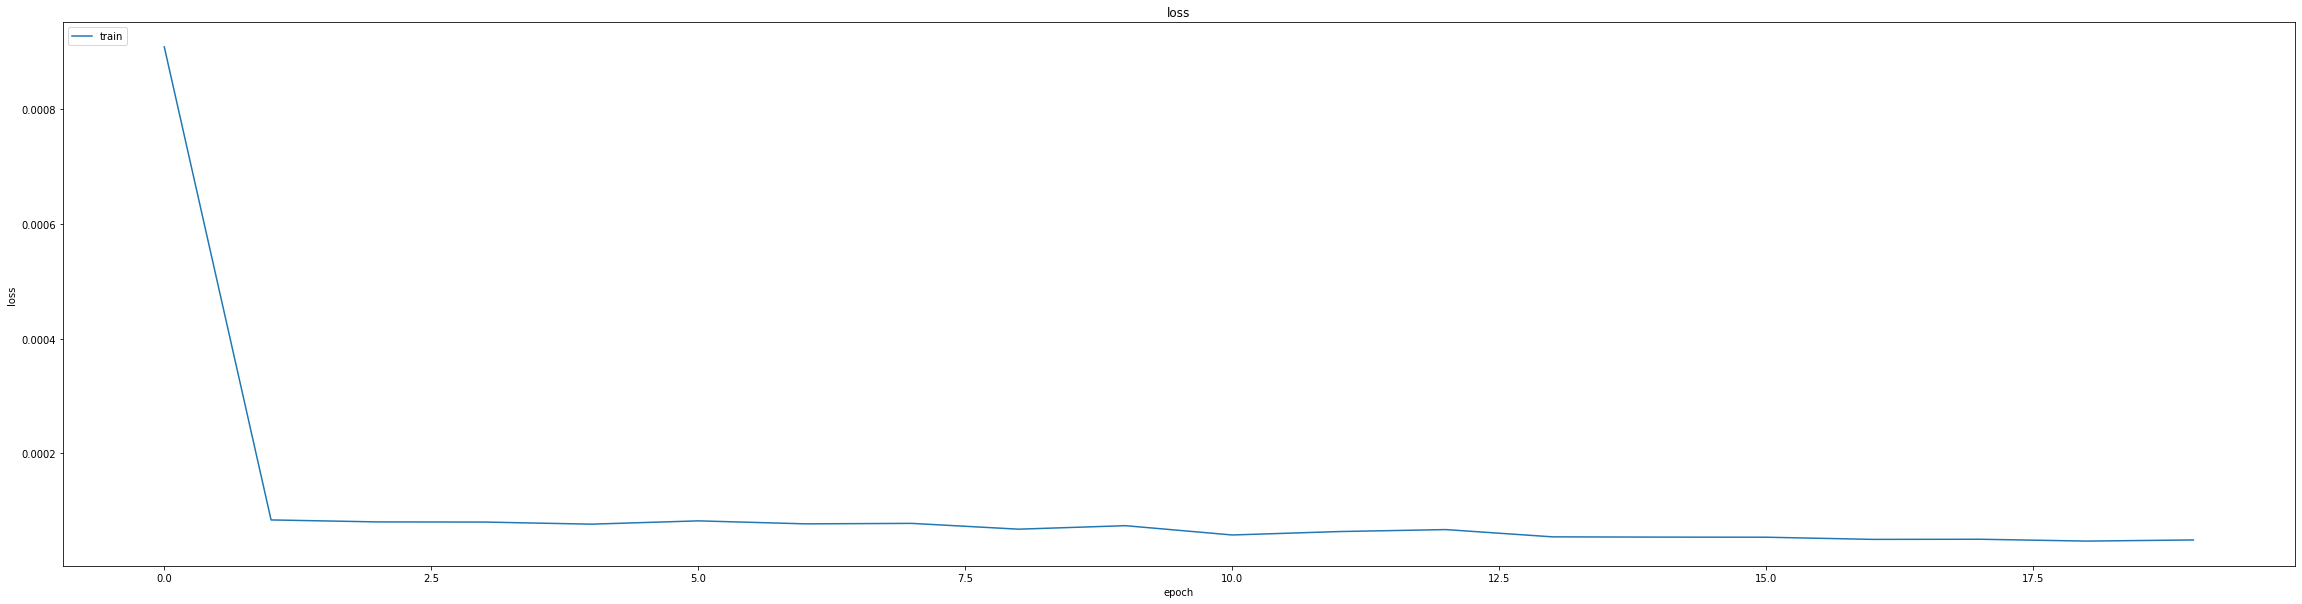

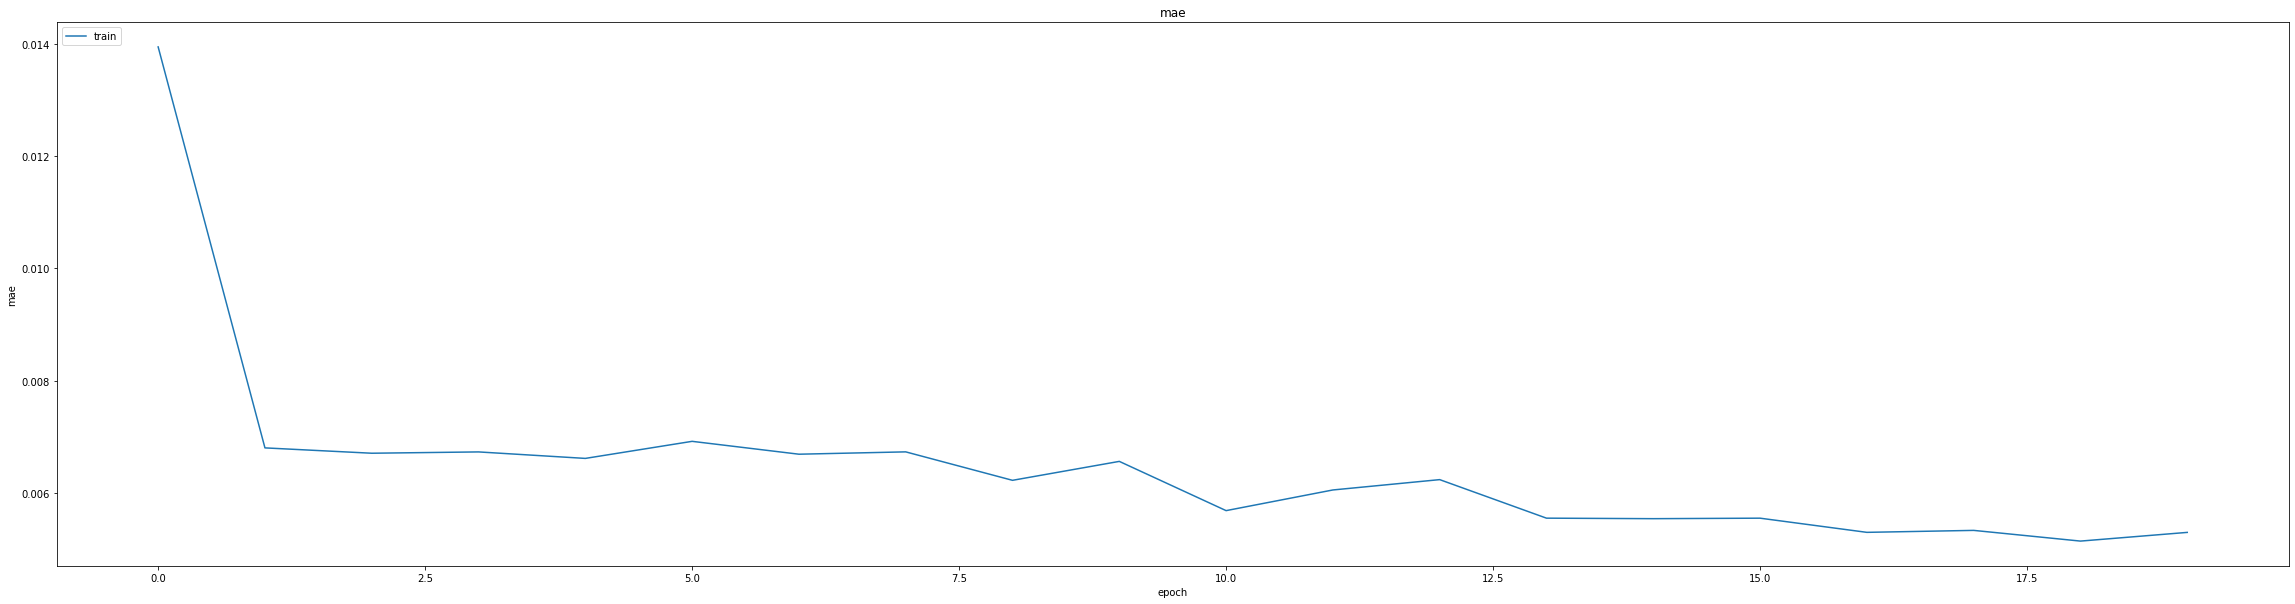

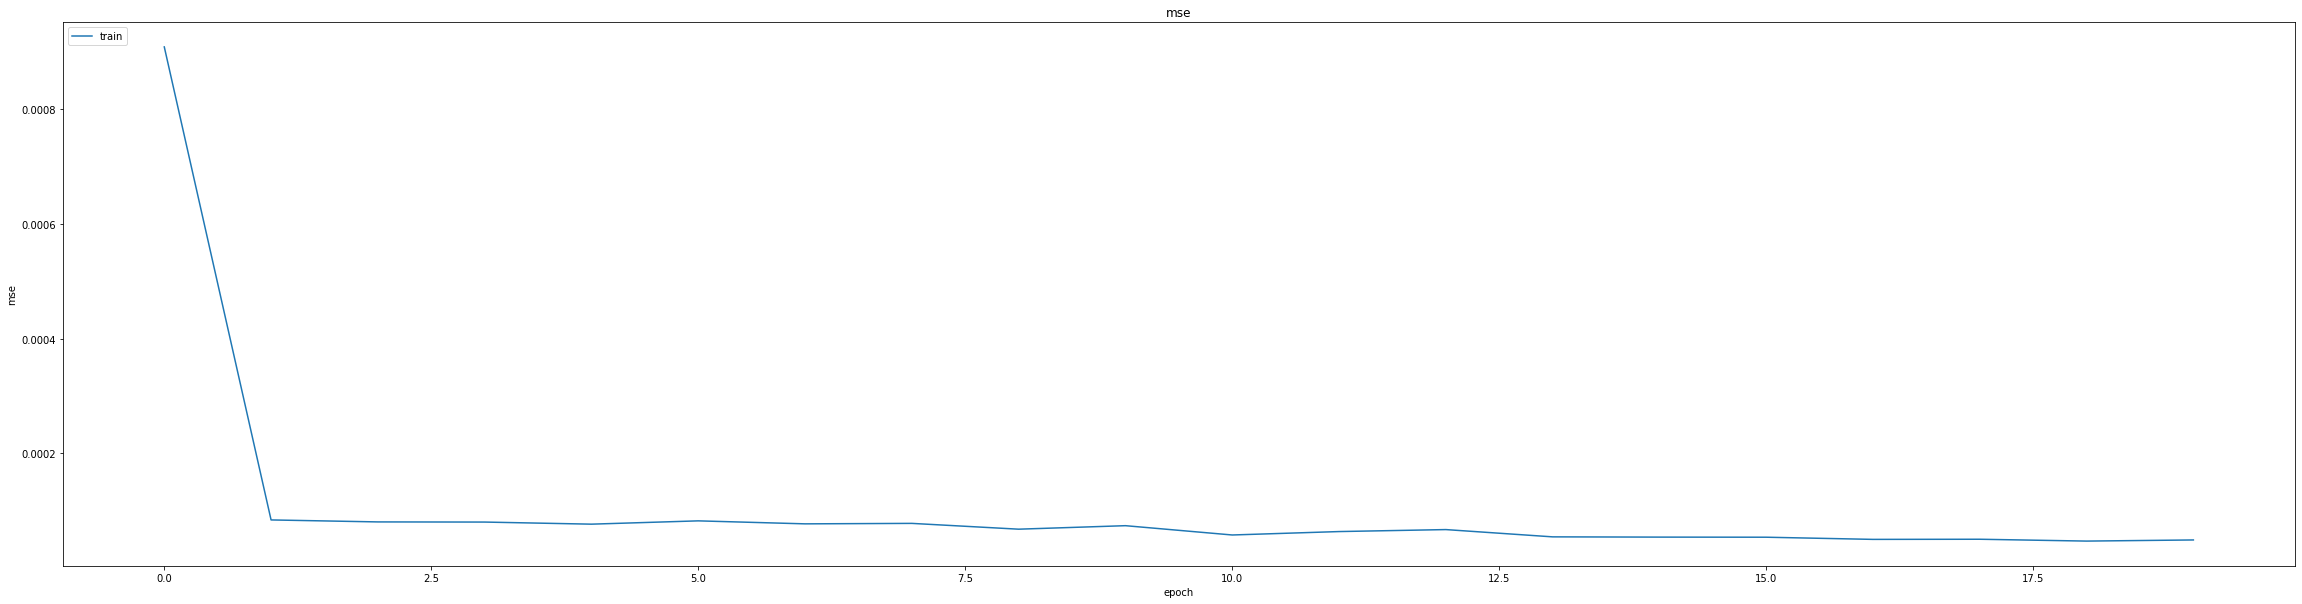

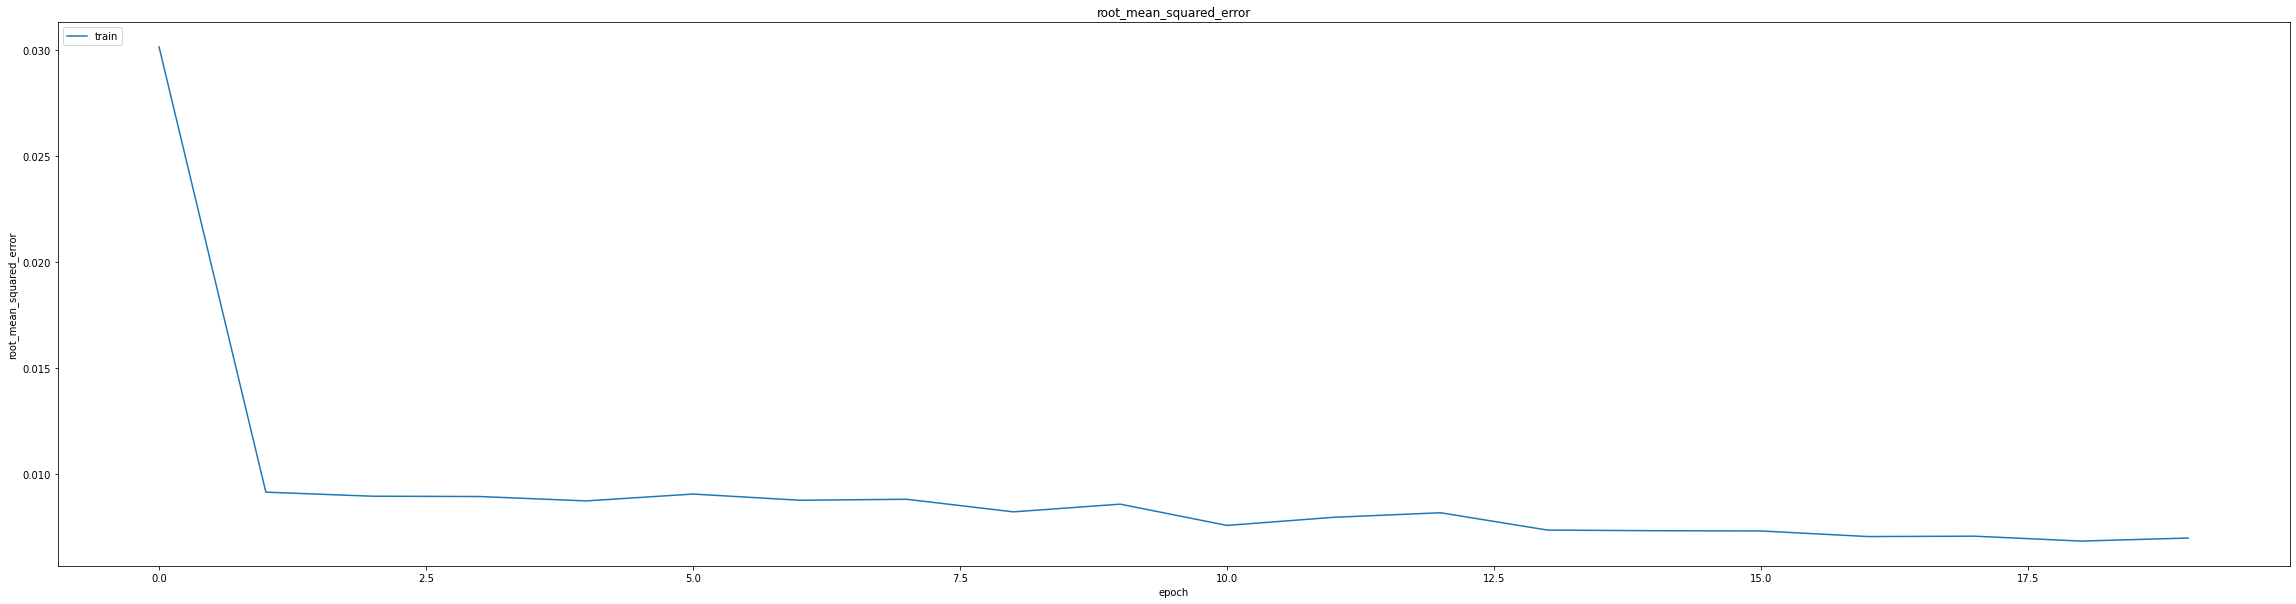

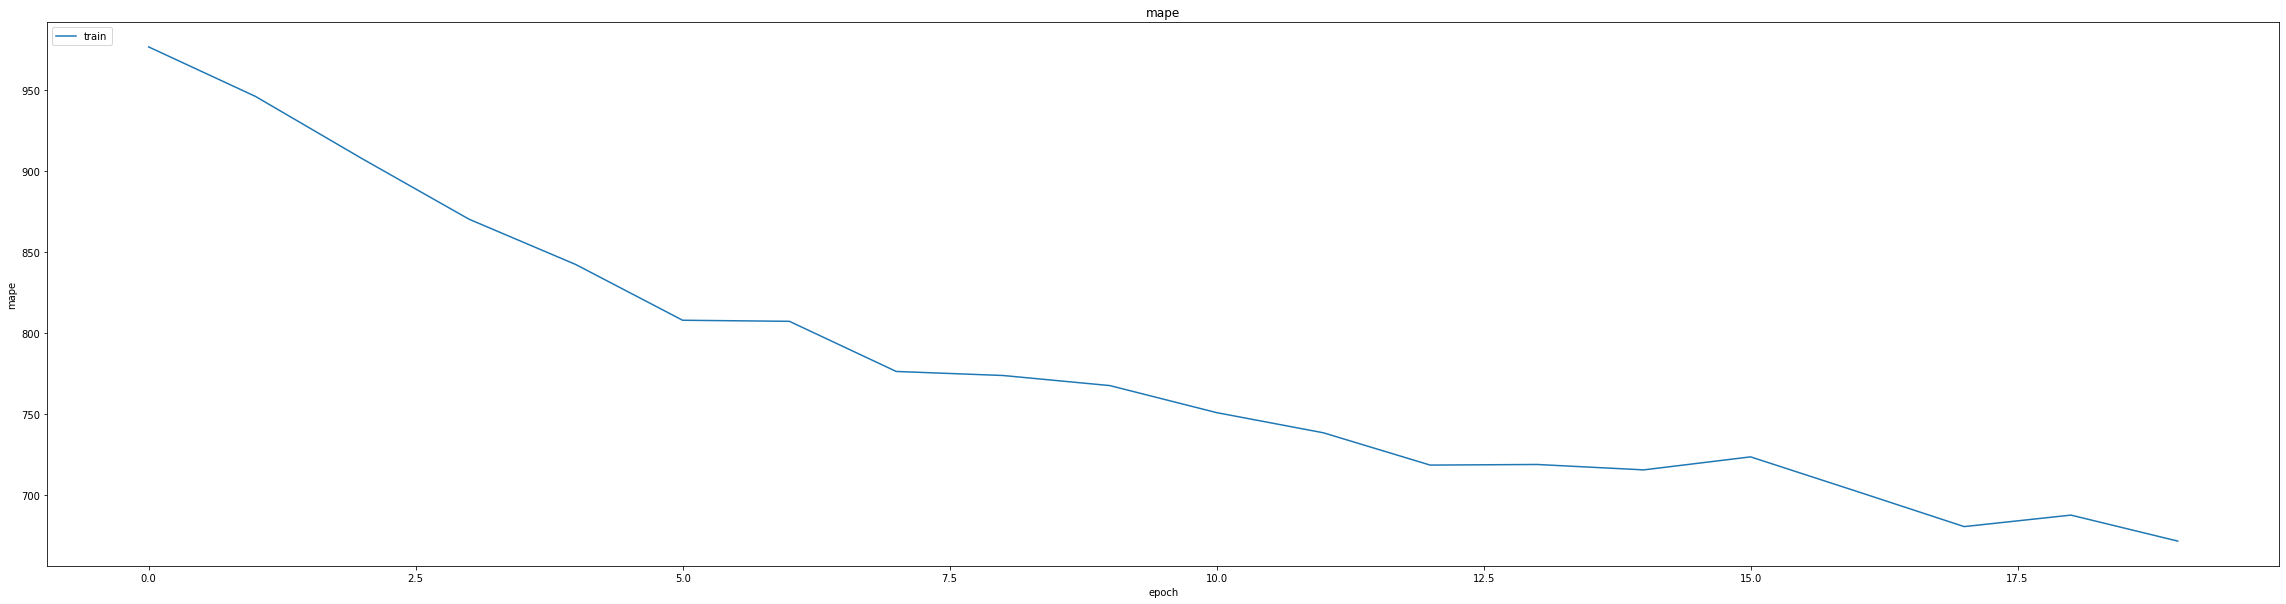

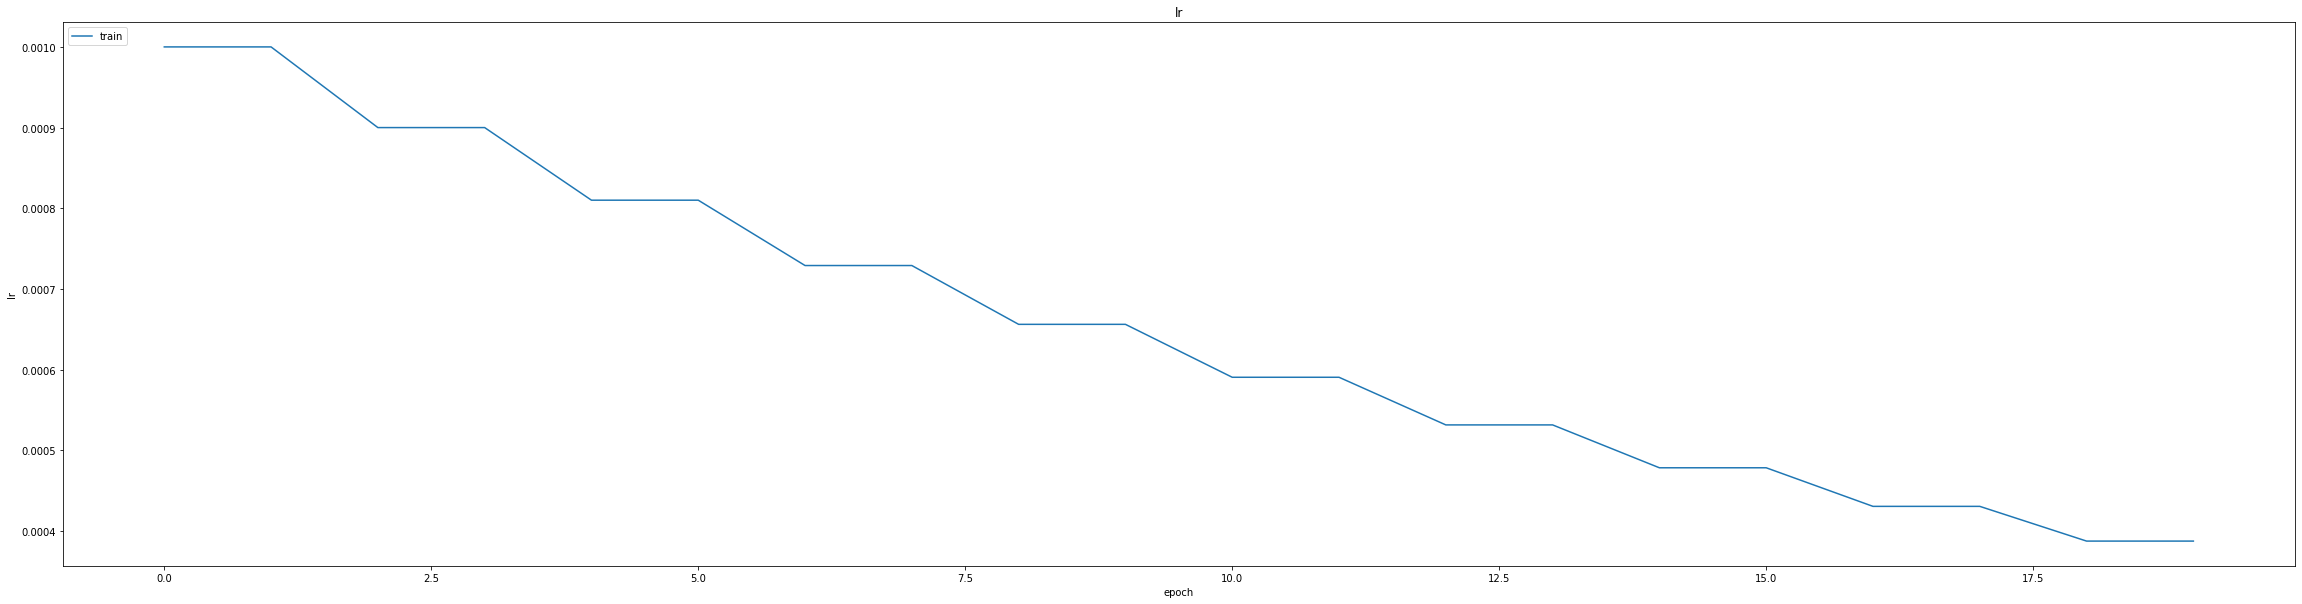

In [115]:
thesis.SummarizeHistory(history)

In [116]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011986001394689083
0.011986001394689083
0.01618046872317791
1392/1392 [==============================] - 6s 4ms/step
0.9923927594701749


In [117]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_5min_GRU(60-40)")

1392/1392 [==============================] - 5s 4ms/step


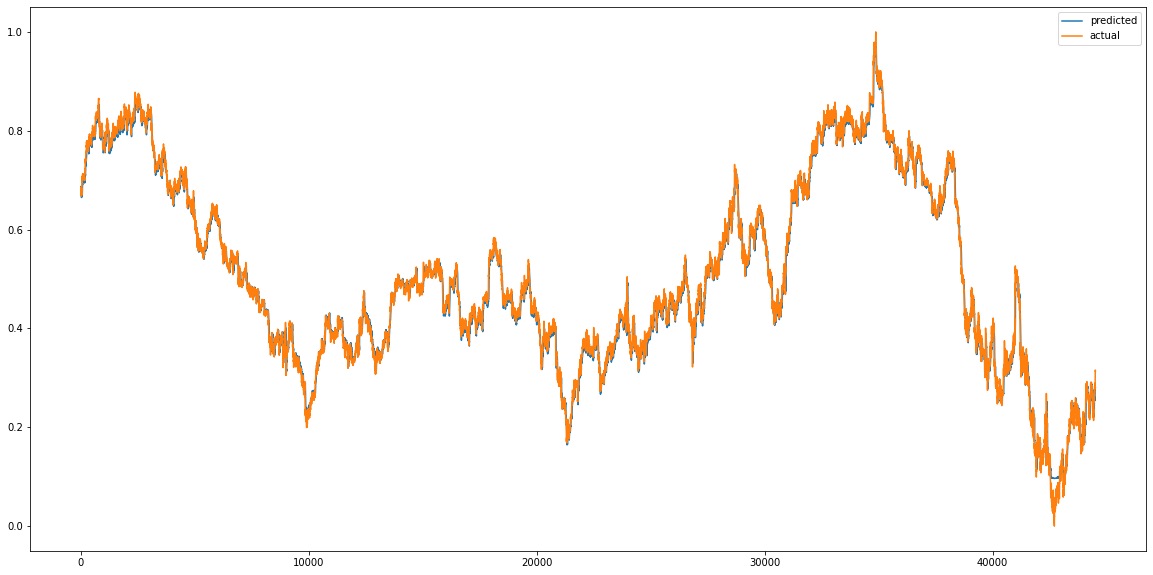

In [118]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


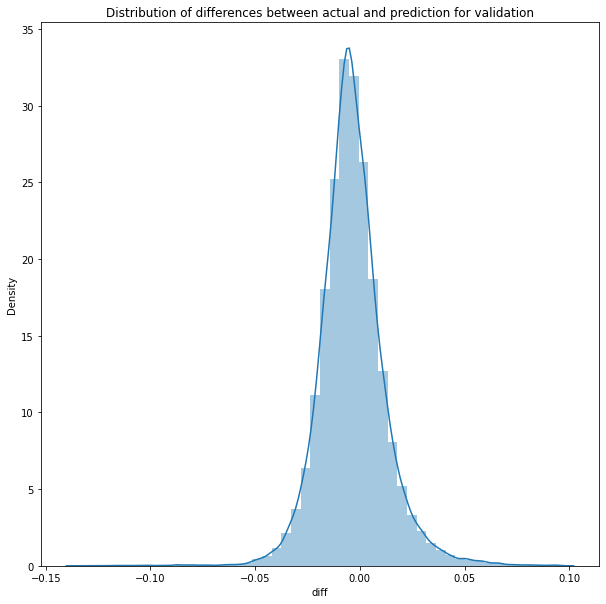

In [119]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


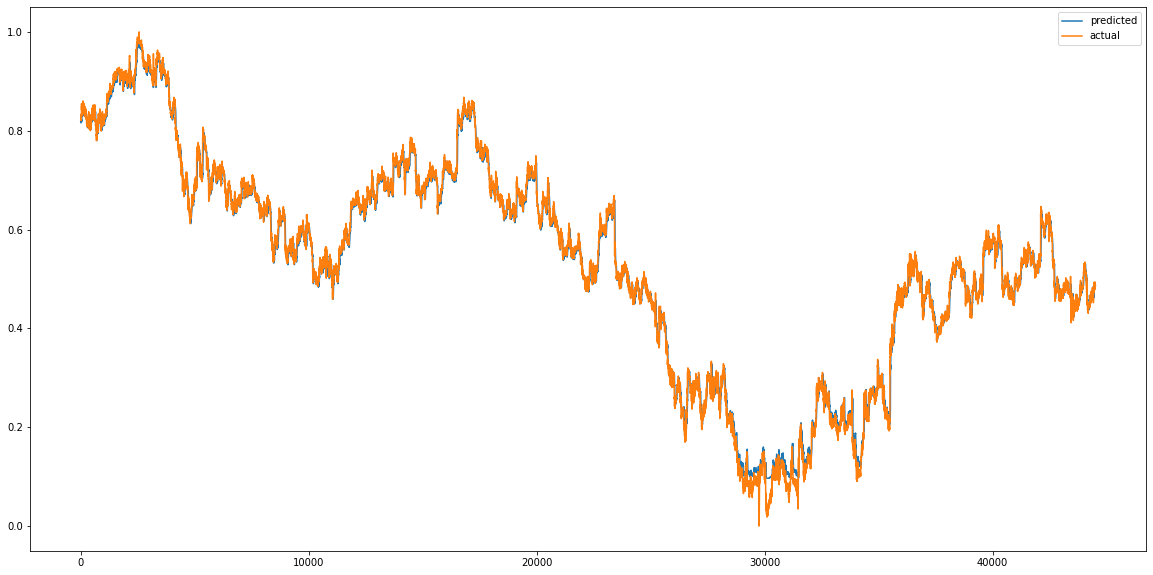

In [120]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


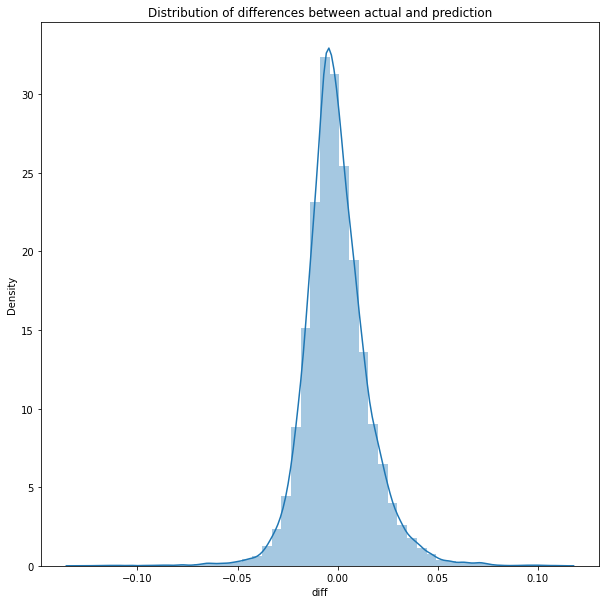

In [121]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002628183028508478
RMSE :  0.016211671809250514
MAE :  0.011805898539734185
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : 0.9946707833149475


count    44513.000000
mean        -0.000609
std          0.016200
min         -0.129802
25%         -0.009867
50%         -0.001955
75%          0.007671
max          0.112140
Name: diff, dtype: float64